In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import TOFPET_cal_lib as TPcal
import build_data_df_mine as bd

%matplotlib nbagg
%load_ext autoreload
%autoreload 2

In [149]:
run = 11090
asic = 0
path      = "/home/vherrero/CALIBRATION_FILES/"
path_data = "/analysis/" + str(run) + "/hdf5/data/"
#path_data = "/home/vherrero/CALIBRATION_FILES/"


In [150]:
data_raw = []
file_numbers = range(12)
data_aux=[]

for i in file_numbers:    
    file_data = '/analysis/' + str(run) + '/hdf5/data/run_' + str(run) +\
                 '_'+ str(i).zfill(4) + '_trigger1_waveforms.h5'
    print(file_data)
    with pd.HDFStore(file_data,'r',complib="zlib",complevel=4) as storage:
        pre_window = pd.read_hdf(file_data,'/data')
        bd.compute_integration_window_size(pre_window)
    data_aux.append(pre_window)
                
data_raw = pd.concat(data_aux).reset_index()
            

/analysis/11090/hdf5/data/run_11090_0000_trigger1_waveforms.h5
/analysis/11090/hdf5/data/run_11090_0001_trigger1_waveforms.h5
/analysis/11090/hdf5/data/run_11090_0002_trigger1_waveforms.h5
/analysis/11090/hdf5/data/run_11090_0003_trigger1_waveforms.h5
/analysis/11090/hdf5/data/run_11090_0004_trigger1_waveforms.h5
/analysis/11090/hdf5/data/run_11090_0005_trigger1_waveforms.h5
/analysis/11090/hdf5/data/run_11090_0006_trigger1_waveforms.h5
/analysis/11090/hdf5/data/run_11090_0007_trigger1_waveforms.h5
/analysis/11090/hdf5/data/run_11090_0008_trigger1_waveforms.h5
/analysis/11090/hdf5/data/run_11090_0009_trigger1_waveforms.h5
/analysis/11090/hdf5/data/run_11090_0010_trigger1_waveforms.h5
/analysis/11090/hdf5/data/run_11090_0011_trigger1_waveforms.h5


<IPython.core.display.Javascript object>


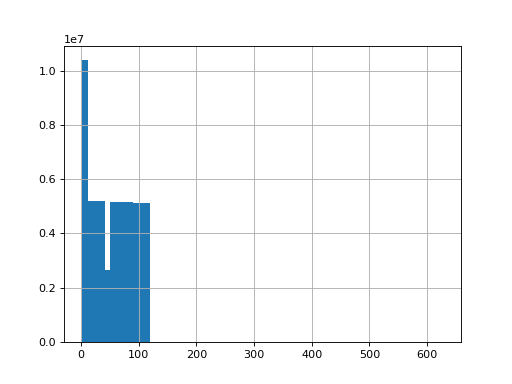

<AxesSubplot:>

In [151]:
plt.figure()
#data_b = data_raw[(data_raw['channel_id']==0)]
#data_b['intg_w'].hist(bins=1024)
data_raw['intg_w'].hist(bins=64)

channel = 0
tac     = 0

data = data_raw[(data_raw['channel_id']==channel) & (data_raw['tac_id']==tac)]
phases   = np.unique(data['intg_w'])
data = data[data['intg_w']==phases[10]]
data = np.mod(data['efine'] - 1024 + 14, 1024)
fig = plt.figure()
axis = fig.add_subplot(111)

coeff_err = [1000,1000,1000]
chisq_r = 10000
bins = 1
while ((np.abs(coeff_err[1]) > 1) & (bins < 30)) :
    axis.cla()
    bins = bins + 1 
    coeff,coeff_err,chisq_r=TPcal.gauss_fit(data,bins,True,axis,'Gauss Fit','','',[0.65,0.5,"left"])
    print(bins,coeff_err[1])

#coeff,coeff_err,chisq_r=TPcal.gauss_fit(data,7,True,axis,'Gauss Fit','','',[0.65,0.5,"left"])

print(channel,tac,phase,coeff[1],coeff_err[1]) 
print(coeff)

In [152]:
channels = range(64)
tacs = range(0,4)

res=[]
for ch in channels:
    data_ch = data_raw[data_raw['channel_id']==ch]
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        phases   = np.unique(data_tc['intg_w'])
        phases = phases[phases<180]
        for i in phases:
            data_fit = data_tc[data_tc['intg_w']==i]
            data_fit = np.mod(data_fit['efine'] - 1024 + 14, 1024)
            # PETSYS Magic 
            
            coeff_err = [1000,1000,1000]
            bins = 1
            while ((np.abs(coeff_err[1]) > 1) & (bins < 30)) :
                bins = bins + 1 
                coeff,coeff_err,chisq_r=TPcal.gauss_fit(data_fit,bins,False) #True,axis,'Gauss Fit','','',[0.65,0.5,"left"])
                #print(ch,tc,i,bins,chisq_r)
                
            print(ch,tc,i,coeff[1],coeff_err[1])

            res.append([asic,ch,tc,i,coeff[1],np.abs(coeff[2])])

df_efine = pd.DataFrame(res,columns=['tofpet_id','channel_id','tac_id','intg_w','mu','sigma'])

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
0 0 3 0.0 0.0
Fitting Problems
0 0 6 0.0 0.0
Fitting Problems
0 0 11 0.0 0.0
Fitting Problems
0 0 16 0.0005681818181818182 0.0005681818181818182
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 0 21 18.944875969945233 0.0013613670238275398
Fitting Problems
0 0 26 70.67479655520766 0.0061112483090585154
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 0 31 152.45884260710002 0.15024476301211503
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 0 36 215.54382418075713 0.27731628940368813
Fitting Problems
Fitting Problems
0 0 41 273.2143669113032 0.27219587060562034
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Pro

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py

0 0 56 437.67312323799683 0.008328142190408994
Fitting Problems
Fitting Problems
0 0 61 488.1530868276405 0.22335435626685046
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 0 66 534.7012388143787 0.42659391682651054
Fitting Problems
Fitting Problems
0 0 71 584.6748145153362 0.1648946658232751
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 0 76 623.5475486225262 0.08441197408275247
Fitting Problems
Fitting Problems
Fitting Problems
0 0 81 655.7973783036743 0.04912379964615579
Fitting Problems
0 0 86 675.1086516045249 0.00948200896077851
Fitting Problems
0 0 91 682.9375224509965 0.0012968227651915184
Fitting Problems
0 0 96 685.8924626813027 0.04349380122230719
Fitting Problems
0 0 101 686.6156254322239 

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: div

0.01666324308409826
Fitting Problems
0 0 106 687.2897808919039 0.26479625124356315
Fitting Problems
0 0 111 686.8333702225596 0.003844182971987128
Fitting Problems
0 0 116 686.7894622760325 0.04287530903805759
Fitting Problems
0 1 3 0.0 0.0
Fitting Problems
0 1 6 0.0 0.0
Fitting Problems
0 1 11 0.0 0.0
Fitting Problems
0 1 16 0.013776452208493111 0.013776452208493111
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 1 21 18.371632629054215 0.031004966805729058
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 1 26 68.97468268988327 0.4441606354865454
Fitting Problems
Fitting Problems
0 1 31 154.5190288081689 0.05496785076068835
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 1 36 216.57702371478197 0.0223601961275836
Fitting Problems
0 1 41 272.7976127612761 0.010277935168542215
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 1 46 325.5844929687113 0.48511118899452466
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 1 51 380.4578155991109 0.5907971601905243
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 1 56 430.6275670076972 0.9999848232291124
Fitting Problems
Fitting Problems
0 1 61 483.1640298692749 0.9400748850354544
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 1 66 533.9239585126386 0.6651620084676352
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 1 71 582.9681183303089 0.38002330528064693
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/minico

Fitting Problems
0 1 76 619.4331235467814 0.9780275830971334
Fitting Problems
0 1 81 655.3206605275017 0.008571994288474083
Fitting Problems
Fitting Problems
0 1 86 674.5453648340018 0.07192571992648125
Fitting Problems
0 1 91 682.5664408338527 0.003551388042035048
Fitting Problems
0 1 96 685.3824255557508 0.2728200405180666
Fitting Problems
0 1 101 686.3927138904519 0.04438051106902537
Fitting Problems
0 1 106 686.739466948076 0.0014402398804944966
Fitting Problems
0 1 111 687.0813375437681 0.03542505466733842
Fitting Problems
0 1 116 686.568212738278 0.05090358639681343
Fitting Problems
0 2 3 0.0 0.0
Fitting Problems
0 2 6 0.0 0.0
Fitting Problems
0 2 11 0.0 0.0
Fitting Problems
0 2 16 0.0012782275244993609 0.0012782275244993609
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 2 21 18.281216650556566 0.022200643540451523
Fitting Problems
0 2 26 69.93644634313077 0.002959486185660191
Fitting Problems
0 2 31 153.97555063325737 0.004722636502659891


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
Fitting Problems
0 2 41 270.9954157155788 0.09633685425437472
Fitting Problems
Fitting Problems
Fitting Problems
0 2 46 326.86646798229356 0.10238795516002407
Fitting Problems
Fitting Problems
0 2 51 382.53774296609714 0.03156072734399474
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 2 56 433.02371480250343 0.17199924673517972
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 2 61 484.12627097001626 0.5526435495865352
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 2 66 534.2358237889365 0.08035603702719671
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 2 71 582.8749039610464 0.19090836024728355
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 2 76 623.6049786671994 0.05973770942009102
Fitting Problems
Fitting Problems
0 2 81 655.3609577869388 0.09441766997723251
Fitting Problems
0 2 86 670.598865427751 0.5507943921913713
Fitting Problems
0 2 91 682.5213735998443 0.000982747023118588
Fitting Problems
0 2 96 685.3938660513011 0.2977717569942338
Fitting Problems
0 2 101 686.407661599839 0.030166963859600243
Fitting Problems
0 2 106 686.5987258907857 0.011212824420525486
Fitting Problems
0 2 111 687.0665290608322 0.025352833212904366
Fitting Problems
0 2 116 686.6448625559652 0.06805907668187106
Fitting Problems
0 3 3 0.0 0.0
Fitting Problems
0 3 6 0.0 0.0
Fitting Problems
0 3 11 0.0 0.0
Fitting Problems
0 3 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 3 21 17.625173640390155 0.013167333802118495
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PET

Fitting Problems
Fitting Problems
0 3 26 66.95046968403074 66.95046968403074
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 3 31 149.52423366685068 0.1717120601455882
Fitting Problems
Fitting Problems
Fitting Problems
0 3 36 212.32451207272752 0.42202417807835035
Fitting Problems
Fitting Problems
Fitting Problems
0 3 41 269.5486465417248 0.03422955557865468
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 3 46 320.61236226356493 0.9361966597822203
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 3 51 378.2719735567881 0.37198295516666463
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vher

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 3 56 427.2666635490941 0.773604031143952
Fitting Problems
Fitting Problems
0 3 61 484.4713052784502 0.006173180831383961
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
0 3 66 530.8762111288145 0.8482762327894627
Fitting Problems
Fitting Problems
0 3 71 579.9940958461646 0.0111143467221105
Fitting Problems
Fitting Problems
Fitting Problems
0 3 76 620.3034443451015 0.08964005575201749
Fitting Problems
0 3 81 652.6118794501075 0.013052736997948643
Fitting Problems
0 3 86 672.7992154948156 0.003438098217042435
Fitting Problems
0 3 91 681.5214175704197 0.002628544002166575
Fitting Problems
0 3 96 684.7703703502069 0.01035195655882178
Fitting Problems
0 3 101 686.5262588590783 0.13058341572179225
Fitting Problems
0 3 106 687.2954703166428 0.353419755620881
Fitting Problems
0 3 111 686.6075281916173 0.030774064459822


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
0 3 116 686.6212038911727 0.05342984661869697
Fitting Problems
1 0 3 0.0 0.0
Fitting Problems
1 0 6 0.0 0.0
Fitting Problems
1 0 11 0.0 0.0
Fitting Problems
1 0 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
1 0 21 1.911408288790857 0.002772844821140481
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
1 0 26 30.367500710833095 30.367500710833095
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
1 0 31 99.35833057666746 0.08568839717362484
Fitting Problems
Fitting Problems
1 0 36 181.26794948114147 0.023290413169380013
Fitting Problems
Fitting Problems
Fitting Problems
1 0 41 239.56106765065175 0.006253759711405222
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by

Fitting Problems
Fitting Problems
Fitting Problems
1 0 46 290.10780545739624 0.17272435163580782
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
1 0 51 343.98286125820204 0.07480439193493298
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
1 0 56 393.38592541816456 0.2727995430551942
Fitting Problems
Fitting Problems
1 0 61 448.898778262844 0.18040559440042267
Fitting Problems
1 0 66 501.98809349669585 0.008330393929104712
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

1 0 71 548.4904555362019 0.18244277034482462
Fitting Problems
Fitting Problems
1 0 76 594.8502607654998 0.00372868258728491
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
1 0 81 633.7756557200626 0.08941885396694038
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
1 0 86 663.8109040560187 0.9147659985194226
Fitting Problems
Fitting Problems
1 0 91 688.7013584714855 0.08480564823536967
Fitting Problems
1 0 96 702.2174007006083 0.012797195035968963
Fitting Problems
1 0 101 707.0728874218767 0.00019806856703094078
Fitting Problems
1 0 106 710.4134069893992 0.053628182082213385
Fitting Problems
1 0 111 710.3793269173152 0.008232409896320235
Fitting Problems
1 0 116 711.1659662430939 0.014835454836498344
Fitting Problems
1 1 3 0.0 0.0
Fitting Problems
1 1 6 0.0 0.0
Fitting Problems
1 1 11 0.0 0.0
Fitting Problems
1 1 16 0.0 0.0
Fitting Problems
Fitting Problems
1 1 21 1.8492777503782127 0.0027781021848459313
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
Fitting Problems
1 1 26 27.007202735559538 0.6334805137086811
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
1 1 31 100.30689241102847 0.2530200736761391
Fitting Problems
Fitting Problems
1 1 36 181.38493017202822 0.13855634752915527
Fitting Problems
Fitting Problems
1 1 41 238.16987429396917 0.17941733392762282
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
1 1 46 293.4953305824436 0.11608831987828952
Fitting Problems
1 1 51 345.5500978843961 0.060781425485526994
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
1 1 56 394.2437500284474 0.8649354749053167
Fitting Problems
Fitting Problems
Fitting Problems
Fit

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/se

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
1 1 66 496.42358385555576 0.491037100273172
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
1 1 71 547.5098168986533 0.13359202115956162
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: div

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
1 1 76 590.6557516001583 0.563934603445682
Fitting Problems
Fitting Problems
1 1 81 634.0680605401461 0.06300033207396913
Fitting Problems
1 1 86 667.2118322222625 0.1944101239527188
Fitting Problems
Fitting Problems
1 1 91 689.7086928678834 0.22778029212226655
Fitting Problems
Fitting Problems
1 1 96 701.4695546609314 0.051421910414958895
Fitting Problems
1 1 101 707.0045574651627 0.00659452950153326
Fitting Problems
1 1 106 709.8625211419975 0.020883164489388192
Fitting Problems
1 1 111 710.7282048835605 0.005851309265515328
Fitting Problems
1 1 116 710.9830648689122 0.010385549292562466
Fitting Problems
1 2 3 0.0 0.0
Fitting Problems
1 2 6 0.0 0.0
Fitting Problems
1 2 11 0.0 0.0
Fitting Problems
1 2 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
1 2 21 0.838777594579351 0.029719854109109354
Fitting Problems
Fitting Problems
Fitting Problems
1 2 26 28.89488697111118 0.17167451128631772
Fitting Problems

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
1 2 31 97.59361796475072 0.5299181980613857
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
1 2 36 178.91313666319812 0.07044232412668287
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
1 2 41 237.79587756723845 0.03410887186010262
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
1 2 46 288.71019555066897 0.5101730088368827
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
1 2 51 344.45035983955233 0.027678338667682486
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:

Fitting Problems
Fitting Problems
Fitting Problems
1 2 56 397.70875366117286 0.25805771878634853
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
1 2 61 449.00858718610243 0.056866381170540374
Fitting Problems
1 2 66 501.0290719723355 0.0009984925357326478
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
1 2 71 548.3695337289473 0.023716715871849342
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
1 2 76 592.5672932852812 0.12296202474644957
Fitting Problems
Fitting Problems
1 2 81 632.5427640155094 0.08226242001350746
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
1 2 86 666.5578258637672 0.06719241709168607
Fitting Problems
1 2 91 689.9149364262096 0.15831781602977565
Fitting Problems
1 2 96 701.3414132041034 0.007687475503793165
Fitting Problems
1 2 101 706.723404355485 0.0006615449983134173
Fitting Problems
1 2 106 709.7071721149313 0.09934205048489389
Fitting Problems
1 2 111 710.2017817983998 0.002737124950483284
Fitting Problems
1 2 116 711.0059864300849 0.005077918734765949
Fitting Problems
1 3 3 0.0 0.0
Fitting Problems
1 3 6 0.0 0.0
Fitting Problems
1 3 11 0.0 0.0
Fitting Problems
1 3 16 0.0 0.0
Fitting Problems
1 3 21 0.7480259447264523 0.7480259447264523
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
1 3 26 27.82560516603191 0.11944108734409774
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
1 3 31 92.534901093

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/soft

Fitting Problems
Fitting Problems
Fitting Problems
1 3 41 229.37026161971608 0.9578983033072096
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
1 3 46 286.88335689055396 0.10389427622987192
Fitting Problems
Fitting Problems
1 3 51 341.68735399023865 0.045656885903082596
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
1 3 56 394.91343151838566 0.02443474259183552
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: Ru

Fitting Problems
1 3 61 445.2847457621671 0.14551191552129852
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
1 3 66 495.6904911798323 0.8964822198423681
Fitting Problems
Fitting Problems
1 3 71 544.6720485583813 0.05703749232811731
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
1 3 76 584.8642033588998 0.2606075055720146
Fitting Problems
Fitting Problems
1 3 81 630.7562734042795 0.015503820531376273
Fitting Problems
Fitting Problems
1 3 86 661.9584148501183 0.37705147358395685
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
1 3 91 684.8928074241672 0.8294956505115655
Fitting Problems
1 3 96 701.1437431091791 0.0009640282254995664
Fitting Problems
1 3 101 706.6193101722656 0.0027208986204737794
Fitting Problems
1 3 106 709.8190590488931 0.006708644839206994
Fitting Problems
1 3 111 710.3274336297177 0.010683617959202635
Fitting Problems
1 3 116 711.1000396238898 0.023947788056848274
Fitting Problems
2 0 3 0.0 0.0
Fitting Problems
2 0 6 0.0 0.0
Fitting Problems
2 0 11 0.0 0.0
Fitting Problems
2 0 16 0.0 0.0
Fitting Problems
2 0 21 3.5017544224010844 0.010967612299318797
Fitting Problems
Fitting Problems
2 0 26 44.423569535765246 0.28347392282222167
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
2 0 31 119.43391509730169 0.3074570491063999
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
2 0 36 194.714695151085 0.9232007137400788
Fitting Problems
Fitting Problems
Fitting Problems
2 0 41 258.85946636205705 0.08048076615431979
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
2 0 46 316.60215206003113 316.60215206003113
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
2 0 51 371.4602877103904 0.2981788339694235
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
2 0 56 423.53500420681905 0.9663740534230875
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
2 0 61 480.88857754094 0.20034593935181869
Fitting Problems
Fitting Problems
2 0 66 536.014589857

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
2 0 71 586.7620389572248 0.14175990509313074
Fitting Problems
Fitting Problems
Fitting Problems
2 0 76 633.9534548469567 0.143594056982852
Fitting Problems
2 0 81 675.1116173737158 0.04299411949363864
Fitting Problems
Fitting Problems
2 0 86 708.0693484830682 0.18021342672087406
Fitting Problems
Fitting Problems
Fitting Problems
2 0 91 729.4164810363599 0.06372058867461854
Fitting Problems
2 0 96 739.5038955336679 0.019665848487148974
Fitting Problems
2 0 101 743.6482961787422 0.01891597536776802
Fitting Problems
2 0 106 745.6877491643075 0.003245382975097325
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

2 0 111 746.2779407343419 0.014562784886467468
Fitting Problems
2 0 116 746.0374342672279 0.039202590268421655
Fitting Problems
2 1 3 0.0 0.0
Fitting Problems
2 1 6 0.0 0.0
Fitting Problems
2 1 11 0.0 0.0
Fitting Problems
2 1 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
2 1 21 4.05116746814274 0.0383309184678849
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
2 1 26 44.380892349720234 0.0252528511097072
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
2 1 31 121.42770341956378 0.0665780532274504
Fitting Problems
2 1 36 200.53449003037386 0.013670579584896037
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
Fitting Problems
2 1 41 260.29481447411877 0.06703880312461442
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
2 1 46 316.2839304536412 0.1513092743798235
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
2 1 51 372.10221332793435 0.08387560361207039
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
2 1 56 425.36313234809575 0.20956852384365882
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
2 1 61 472.3717144554208 0.9733349608338304
Fitting Problems
Fitting Problems
2 1 66 534.6973102127239 0.08946671452275741
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
2 1 71 580.1235115064727 0.8488086515376383
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
2 1 76 629.5114269483547 0.5289060530393299
Fitting Problems
Fitting Problems
2 1 81 675.1059543265947 0.1368569104974901
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

2 1 86 709.4726845874166 0.006458996763833825
Fitting Problems
Fitting Problems
2 1 91 729.0252275123304 0.121495116591596
Fitting Problems
2 1 96 739.5716850946296 0.0022406229676388057
Fitting Problems
2 1 101 744.1176769609579 0.0670960279773051
Fitting Problems
2 1 106 744.9284440981139 0.0066289143002059535
Fitting Problems
2 1 111 745.5893147038785 0.031667652805510316
Fitting Problems
2 1 116 746.1951712036575 0.07183417662727211
Fitting Problems
2 2 3 0.0 0.0
Fitting Problems
2 2 6 0.0 0.0
Fitting Problems
2 2 11 0.0 0.0
Fitting Problems
2 2 16 0.0 0.0
Fitting Problems
Fitting Problems
2 2 21 4.279722485735224 0.01617732126684218
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
2 2 26 44.47201249371412 0.09116764190667699
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
2 2 31 116.84492416112113 0.45642698926242203
Fitting Problems
Fitting Problems
2 2 36 198.26143228100787 0.12275757005908809
Fitting Problems
Fitting Probl

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
2 2 41 257.84224393055433 0.21943713109853902
Fitting Problems
2 2 46 316.68070920488327 0.009377057303803735
Fitting Problems
Fitting Problems
Fitting Problems
2 2 51 368.7955539910314 0.2986848762293064
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
2 2 56 425.96574456302875 0.07883654004490433
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

Fitting Problems
Fitting Problems
2 2 61 481.33031669651 0.0975350363698262
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
2 2 66 531.4232244544593 0.27509918294211433
Fitting Problems
Fitting Problems
2 2 71 586.0114631784694 0.0623714422960236
Fitting Problems
2 2 76 633.2156992879272 0.051775853032516105
Fitting Problems
Fitting Problems
2 2 81 674.0790334983714 0.21114832508030115
Fitting Problems
2 2 86 708.620670819945 0.008407453180979185
Fitting Problems
Fitting Problems
2 2 91 728.849468105048 0.4104303733083074
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

2 2 96 739.1471858366097 0.0034240869504952548
Fitting Problems
2 2 101 744.3530404388933 0.03687047655001657
Fitting Problems
2 2 106 745.3845392712476 0.0036987817396243457
Fitting Problems
2 2 111 745.7765819648022 0.05294162267289303
Fitting Problems
2 2 116 746.1801722236796 0.02590602116832154
Fitting Problems
2 3 3 0.0 0.0
Fitting Problems
2 3 6 0.0 0.0
Fitting Problems
2 3 11 0.0 0.0
Fitting Problems
2 3 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
2 3 21 2.2841166391275585 0.04217796723405981
Fitting Problems
Fitting Problems
2 3 26 41.72727139868355 0.29344409204439015
Fitting Problems
2 3 31 117.50636740185232 0.009098462369318635
Fitting Problems
Fitting Problems
Fitting Problems
2 3 36 193.09013401924045 0.2669110631071849
Fitting Problems
Fitting Problems
2 3 41 255.21337211982944 0.2976294683019792
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
2 3 46 312.6995965590834 0.023842885224

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-s

Fitting Problems
Fitting Problems
Fitting Problems
2 3 71 582.5534199666006 0.009554901515884883
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
2 3 76 628.5266877426691 0.09466778905882353
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
2 3 81 664.9905581433982 0.5735151168340965
Fitting Problems
Fitting Problems
2 3 86 705.8446451010069 0.0024180197797341353
Fitting Problems
2 3 91 728.2535322533311 0.006098507496238662
Fitting Problems
2 3 96 739.202618543664 0.20758708573458712
Fitting Problems
2 3 101 743.9331847944391 0.09604383496898314
Fitting Problems
2 3 106 745.494269683688 0.0038384740196645496
Fitting Problems
2 3 111 746.1861148240907 0.0485457102892349
Fitting Problems
2 3 116 746.3131346053492 0.11008310322617372


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scala

Fitting Problems
3 0 3 0.0 0.0
Fitting Problems
3 0 6 0.0 0.0
Fitting Problems
3 0 11 0.0 0.0
Fitting Problems
3 0 16 0.0 0.0
Fitting Problems
3 0 21 0.8457931034482759 0.8457931034482759
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
3 0 26 33.68246688344367 0.161065840763794
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
3 0 31 93.33436402490535 0.5230999349581229
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
3 0 36 176.57838281585268 0.40125325261932865
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
3 0 41 247.26848299310817 0.08602575172106412
Fitting Problems
Fitting Problems
Fitting Problems
3 0 46 300.82502857341933 0.12380733044086172
Fitting Problems
Fitting Problems
Fitting P

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
3 0 61 460.93909455623526 0.43832374295557447
Fitting Problems
Fitting Problems
Fitting Problems
3 0 66 515.2047383889854 0.08558902691330808
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
3 0 71 559.225489255483 0.8907125972557824
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
3 0 76 611.7137578997006 0.24752529907447782
Fitting Problems
Fitting Problems
3 0 81 657.9078171243949 0.08123736654285427
Fitting Problems
3 0 86 695.2002804177599 0.008318467209182383
Fitting Problems
3 0 91 723.9082412495412 0.00751525537573533
Fitting Problems
3 0 96 740.489922279221 0.004036635649438619
Fitting Problems
3 0 101 748.5477504114239 0.0008343128717689111
Fitting Problems
3 0 106 752.5837510083654 0.014247094954599289
Fitting Problems
3 0 111 753.8866488240227 0.022752956066706968
Fitting Problems
3 0 116 753.9622399907731 0.008262655766155851
Fitting Problems
3 1 3 0.0 0.0
Fitting Problems
3 1 6 0.0 0.0
Fitting Problems
3 1 11 0.0 0.0


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
3 1 26 33.92676826898917 0.12285576996800246
Fitting Problems
Fitting Problems
3 1 31 95.30528727248854 0.04735701194915359
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
3 1 36 182.53469920374755 0.1019784554583805
Fitting Problems
3 1 41 248.3585243950963 0.008339204244563468
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
3 1 46 302.2077841509748 0.0934485110212534
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
3 1 51 356.1608361796376 0.11774034086230761
Fitting Problems
Fitting Problems
3 1 56 410.21767649232635 0.1282738146767723
Fitting Problems
3 1 61 463.8436249285306 nan
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
3 1 66 516.534416160412 0.017371558886558537
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
3 1 71 565.556087307954 0.3393475471926645
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
3 1 76 609.40500758075 0.09397103216877623
Fitting Problems
Fitting Problems
3 1 81 657.289155462312 0.07720374070616771
Fitting Problems
Fitting Problems
3 1 86 693.6382337981171 0.13926036928055574
Fitting Problems
Fitting Problems
Fitting Problems
3 1 91 723.8541683526896 0.04836817594461407
Fitting Problems
3 1 96 740.071891010324 0.00948780115552643
Fitting Problems
3 1 101 749.1224982661638 0.00655108213913239
Fitting Problems
3 1 106 753.0062401267103 0.054675461122403395
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

3 1 111 753.8281683672622 0.020059339312220457
Fitting Problems
3 1 116 754.2992076307071 0.008902323955548816
Fitting Problems
3 2 3 0.0 0.0
Fitting Problems
3 2 6 0.0 0.0
Fitting Problems
3 2 11 0.0 0.0
Fitting Problems
3 2 16 0.0 0.0
Fitting Problems
3 2 21 0.6510826092952696 0.6510826092952696
Fitting Problems
Fitting Problems
3 2 26 33.996442892220315 0.020161347494315647
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
3 2 31 89.27088342593781 0.38773307907226967
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance

Fitting Problems
Fitting Problems
Fitting Problems
3 2 36 173.78430052299896 0.4353932115999931
Fitting Problems
Fitting Problems
Fitting Problems
3 2 41 241.55780882168452 0.9921252559475022
Fitting Problems
3 2 46 302.6604448865905 0.00217369596498642
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
3 2 51 348.05996370127275 0.42496895147145525
Fitting Problems
Fitting Problems
3 2 56 408.7477132047123 0.45353200286441575
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
3 2 61 460.13058692228634 0.24875195739896128
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
3 2 66 514.9457721014412 0.020969665485059186
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
3 2 71 565.8037424664531 0.025874897152114093
Fitting Problems
Fitting Problems
Fitting Problems
3 2 76 612.5593026966995 0.059481893772117454
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
3 2 81 655.6265167475658 0.2132519564737186
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
3 2 86 692.0250580866241 0.9797600628075013
Fitting Problems
3 2 91 722.4091739893857 0.27311513051729513
Fitting Problems
3 2 96 740.3929184064664 0.002760237053600295
Fitting Problems
3 2 101 748.9715111371953 0.01655380875975207
Fitting Problems
3 2 106 752.6781662346681 0.00132071203178955
Fitting Problems
3 2 111 754.0571261886562 0.00709225895077444
Fitting Problems
3 2 116 754.4927968409744 0.01890916851910279
Fitting Problems
3 3 3 0.0 0.0


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
3 3 6 0.0 0.0
Fitting Problems
3 3 11 0.0 0.0
Fitting Problems
3 3 16 0.0 0.0
Fitting Problems
3 3 21 0.1442559646945249 0.1442559646945249
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
3 3 26 32.50453012684257 0.08710950605868721
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
3 3 31 82.04118928782184 0.9868346928695507
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
3 3 36 176.65779073752879 0.2387029458345447
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
3 3 41 240.94370300908176 0.3305000565070067


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py

Fitting Problems
Fitting Problems
3 3 46 297.9950907810222 0.13183061119448525
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
3 3 51 351.570774489088 0.17953442750846932
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
3 3 56 406.97478263472453 0.1788052039689735
Fitting Problems
Fitting Problems
3 3 61 457.0212698858293 0.1760340752904758
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
3 3 66 502.11666119841874 0.7644978621763634
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
3 3 71 559.8030421420149 0.17842590779293907
Fitting Problems
3 3 76 608.7331676900533 0.0006656941698830782
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
3 3 81 650.59089120006 0.2033606904025735
Fitting Problems
3 3 86 691.0971842468431 0.00905169717436436
Fitting Problems
3 3 91 721.0421381688254 0.01654640307685181
Fitting Problems
Fitting Problems
3 3 96 739.150066608957 0.06807989107765915
Fitting Problems
3 3 101 748.3583298110384 0.0012896803210494512
Fitting Problems
3 3 106 753.0518119636405 0.0764199470852254
Fitting Problems
3 3 111 754.0620026227914 0.014138026999975673
Fitting Problems
3 3 116 754.518106384056 0.018915512847746414


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
4 0 3 0.0 0.0
Fitting Problems
4 0 6 0.0 0.0
Fitting Problems
4 0 11 0.0 0.0
Fitting Problems
4 0 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 0 21 7.8096388967870345 7.8096388967870345
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 0 26 55.61174773637898 0.008696515838408638
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 0 31 131.23417517313985 0.16879907009713646
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 0 36 200.3983845631401 0.10047948582839236
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 0 41 260.9095671436908 0.13118502369074647
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
F

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
4 0 51 372.5225356366094 0.35254432014503384
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 0 56 435.0132720074415 0.15149777135857215
Fitting Problems
Fitting Problems
Fitting Problems
4 0 61 487.18494263601576 0.4091133380216972
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 0 66 546.1357166133332 0.08198788707901503
Fitting Problems
Fitting Problems
Fitting Problems
4 0 71 601.5398218896657 0.06634372800529915
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

Fitting Problems
Fitting Problems
4 0 76 650.227959477137 0.08931551436255707
Fitting Problems
Fitting Problems
Fitting Problems
4 0 81 690.4445995098961 0.529411936454171
Fitting Problems
Fitting Problems
Fitting Problems
4 0 86 727.6306202749133 0.7200680116189863
Fitting Problems
Fitting Problems
4 0 91 755.6564231116391 0.09483696799161669
Fitting Problems
4 0 96 767.9848676046208 0.21999057952032292
Fitting Problems
4 0 101 772.9582508993553 0.061275846727436085
Fitting Problems
4 0 106 774.211845467585 0.012484351711308241
Fitting Problems
4 0 111 775.0862426111771 0.008870177556925946
Fitting Problems
4 0 116 775.3178159258192 0.06149212760210024
Fitting Problems
4 1 3 0.0 0.0
Fitting Problems
4 1 6 0.0 0.0
Fitting Problems
4 1 11 0.0 0.0
Fitting Problems
4 1 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 1 21 7.985673996353804 0.006156631999289984
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 1 26 53.51301742582421 0.34831845895345326
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 1 31 130.4951823536705 0.4389958206511323
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 1 36 199.36921869979662 0.27923933492314534
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 1 41 261.68864635249986 0.0005428315384475453
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: Runtime

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 1 46 320.017738030461 0.12216561183211491
Fitting Problems
Fitting Problems
4 1 51 377.63548944302096 0.4686445297717777
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 1 56 435.16281267250963 0.12541444500263807
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawda

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 1 61 489.2047739523387 0.22564949595799233
Fitting Problems
4 1 66 546.9396443089096 0.3246711594974535
Fitting Problems
Fitting Problems
Fitting Problems
4 1 71 597.7639457661754 0.39346555601191885
Fitting Problems
Fitting Problems
Fitting Problems
4 1 76 650.4522430255261 0.18070524851196998
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 1 81 695.1760329135076 0.13057978034083906
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 1 86 730.4192341536083 0.09473832561579026
Fitting Problems
4 1 91 756.1368450194035 0.008275353326871607
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

4 1 96 767.5713824893382 0.0010140296398394577
Fitting Problems
4 1 101 772.462442348576 0.0006432084640101045
Fitting Problems
4 1 106 773.4823380967468 0.01112231692488782
Fitting Problems
4 1 111 775.1420902103134 0.007834090967755022
Fitting Problems
4 1 116 775.337217983745 0.05084156905414342
Fitting Problems
4 2 3 0.0 0.0
Fitting Problems
4 2 6 0.0 0.0
Fitting Problems
4 2 11 0.0 0.0
Fitting Problems
4 2 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 2 21 7.4484705602262515 0.030541380707839124
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 2 26 53.87121291028681 0.03141820458603633
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 2 31 132.7041797043017 0.01822778634790675
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: ove

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 2 36 198.352051664632 0.07827598710196888
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 2 41 260.03767022351786 0.18724645013676247
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 2 46 318.7043692450807 0.05230072045950757
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 2 51 376.6794828440729 0.043524782478571666
Fitting Problems
Fitting Problems
Fitting Problems
4 2 56 435.04134215787644 0.026993537952759522
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 2 61 490.83582340276865 0.10260112719413081
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 2 66 545.2849369304446 0.1177899745002203
Fitting Problems
Fitting Problems
Fitting Problems
4 2 71 600.3240721743631 0.053959306432332585
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 2 76 649.0520572958742 0.15094623908037677
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 2 81 688.2593039939162 0.27789588393111614
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
4 2 86 731.1525540715139 0.017731318038808137
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 2 91 754.2863585354502 0.17586649774641785
Fitting Problems
4 2 96 766.7046595521434 0.0058458829556661965
Fitting Problems
4 2 101 772.3878803355236 0.08316000438844728
Fitting Problems
4 2 106 773.646301654177 0.0010462442470651665
Fitting Problems
4 2 111 774.569697046442 0.01917342635169395
Fitting Problems
4 2 116 774.9690377624456 0.274378615183728
Fitting Problems
4 3 3 0.0 0.0
Fitting Problems
4 3 6 0.0 0.0
Fitting Problems
4 3 11 0.0 0.0
Fitting Problems
4 3 16 0.0 0.0
Fitting Problems
Fitting Problems
4 3 21 6.835673992070212 0.014552620482675662
Fitting Problems
Fitting Problems
Fitting Problems
4 3 26 51.973868683068595 0.031588911825942666
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fi

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 3 46 316.2881211949597 316.2881211949597
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covarianc

Fitting Problems
4 3 51 370.7781845885079 0.22450742789748057
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 3 56 429.31959621021053 0.08551000091177992
Fitting Problems
4 3 61 487.76890413510193 0.013754244854391428
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/hom

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 3 66 538.1675197085685 0.5215914977592536
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 3 71 595.0809895207734 0.10708506525927988
Fitting Problems
4 3 76 645.6222840890396 0.0083375516601456
Fitting Problems
Fitting Problems
4 3 81 690.0676915618259 0.23781699913629467
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
4 3 86 727.2316959403996 0.4294936780949504
Fitting Problems
Fitting Problems
4 3 91 752.8754214364094 0.22514252336657994
Fitting Problems
4 3 96 766.427027461162 0.07122553223273237
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

4 3 101 772.2505829499638 0.002682882282824416
Fitting Problems
4 3 106 773.5035906172138 0.008153580290027567
Fitting Problems
4 3 111 774.7425078295179 0.041261573965865425
Fitting Problems
4 3 116 775.3093260520112 0.2042897595106001
Fitting Problems
5 0 3 0.0 0.0
Fitting Problems
5 0 6 0.0 0.0
Fitting Problems
5 0 11 0.0 0.0
Fitting Problems
5 0 16 0.00014194464158978 0.00014194464158978
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 0 21 5.193483968745201 0.14463370027790937
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 0 26 33.20719830628087 33.20719830628087
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 0 31 95.47510604202219 0.47097475332635585
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 0 36 178.00

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 0 41 240.0765193229698 0.01873795092750116
Fitting Problems
Fitting Problems
5 0 46 292.3382617078336 0.14060071921649114
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 0 51 344.1125315868236 0.21637264489196273
Fitting Problems
Fitting Problems
Fitting Problems
5 0 56 401.12629824694767 0.006119901608994389
Fitting Problems
Fitting Problems
5 0 61 447.7035912349077 0.5955474868160735
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
5 0 66 503.6899234277012 0.09043283639995305
Fitting Problems
Fitting Problems
5 0 71 550.1923561955641 0.24207354658177765
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 0 76 596.2478674194947 0.6730685919580213
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 0 81 638.1465211819553 0.3720888723523757
Fitting Problems
Fitting Problems
Fitting Problems
5 0 86 678.0771717015662 0.020026183558442427
Fitting Problems
5 0 91 702.3691833154086 0.9020356477700069
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

5 0 96 721.412569925754 0.008118400842018422
Fitting Problems
5 0 101 728.4997781226572 0.007930065097522353
Fitting Problems
5 0 106 731.6151074957577 0.04210545062183049
Fitting Problems
5 0 111 732.3636241562815 0.16015582294749256
Fitting Problems
5 0 116 732.5584389662785 0.004521023950494677
Fitting Problems
5 1 3 0.0 0.0
Fitting Problems
5 1 6 0.0 0.0
Fitting Problems
5 1 11 0.0 0.0
Fitting Problems
5 1 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
5 1 21 4.853803193461821 0.10736424699652117
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 1 26 33.11417792277251 0.03619418013504439
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs

Fitting Problems
5 1 31 95.04806545283283 0.21576436697645054
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 1 36 177.38034479110752 0.05887531817409792
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 1 41 239.92120590775815 0.019860971238999565
Fitting Problems
Fitting Problems
5 1 46 293.50683993886685 0.01738772686149114
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 1 51 345.34175767639005 0.7256586310831533
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 1 56 400.4822363765039 400.4822363765039
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 1 61 445.83692605246364 0.9151432582244234
Fitting Problems
Fitting Problems
Fitting Problems
5 1 66 502.97940999927056 0.050643554153064325
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 1 71 550.1004354366966 0.15773307523905516
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 1 76 588.6076342518717 0.8251323003847137
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hi

Fitting Problems
Fitting Problems
5 1 81 636.5337221326909 0.655745670301777
Fitting Problems
5 1 86 677.7365322159412 0.015536355376936534
Fitting Problems
Fitting Problems
5 1 91 704.4585109031276 0.07414768685976159
Fitting Problems
Fitting Problems
5 1 96 721.2349738581675 0.014414543426574309
Fitting Problems
5 1 101 728.4522728335443 0.000228152285630488
Fitting Problems
5 1 106 731.7944569516119 0.0744563719166397
Fitting Problems
5 1 111 731.8451110025474 0.0020056564079040645
Fitting Problems
5 1 116 732.1125292972271 0.005802164458942217
Fitting Problems
5 2 3 0.0 0.0
Fitting Problems
5 2 6 0.0 0.0
Fitting Problems
5 2 11 0.0 0.0
Fitting Problems
5 2 16 0.0 0.0
Fitting Problems
5 2 21 4.48238477346952 0.0015407544449601897
Fitting Problems
Fitting Problems
Fitting Problems
5 2 26 32.91024924205885 0.0031648704995040937
Fitting Problems
5 2 31 95.82965521304234 0.04403278844049998
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Prob

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

5 2 36 175.67469708816427 0.32200195760864264
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 2 41 238.46801897379171 0.449376723030173
Fitting Problems
Fitting Problems
5 2 46 289.4482218511168 0.5015078650987943
Fitting Problems
Fitting Problems
Fitting Problems
5 2 51 345.59092945138894 0.06504393691109482
Fitting Problems
Fitting Problems
Fitting Problems
5 2 56 397.96298141283387 0.23294089994450642
Fitting Problems
Fitting Problems
5 2 61 450.9412112849262 0.003839882240078466
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

5 2 66 501.36194215330653 0.1262529762918186
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 2 71 546.5623189894194 0.353566614606718
Fitting Problems
5 2 76 597.6837416738346 0.030480630391087105
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 2 81 635.1415598288187 0.4492781849914297
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 2 86 673.6314062725393 0.7090290364214203
Fitting Problems
Fitting Problems
5 2 91 703.838402133592 0.21748215928394132
Fitting Problems
5 2 96 720.48583962828 0.008310595897189153
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.

5 2 101 728.0399362103585 0.004891019316727092
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 2 106 731.0833579241066 0.00987645179354091
Fitting Problems
5 2 111 731.6378655774371 0.002197656350784785
Fitting Problems
5 2 116 732.2165351521566 0.00176606223151129
Fitting Problems
5 3 3 0.0 0.0
Fitting Problems
5 3 6 0.0 0.0
Fitting Problems
5 3 11 0.0 0.0
Fitting Problems
5 3 16 0.00198722498225692 0.00198722498225692
Fitting Problems
5 3 21 4.105554648172179 0.0125392383491361
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 3 26 31.982477686016438 0.00020108302343999388
Fitting Problems
Fitting Problems
Fitting Problems
5 3 31 94.09067631144679 0.03501883698655092
Fitting Problems
5 3 36 176.0731796800024 

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true

Fitting Problems
5 3 56 396.6964989466537 0.00386637582361748
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 3 61 440.0653071045228 0.6081191568946057
Fitting Problems
Fitting Problems
5 3 66 498.90337206336534 0.12299638924547096
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 3 71 544.6277035860359 0.20669287056764832
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
5 3 76 592.6773518106247 0.11879288849494046
Fitting Problems
Fitting Problems
Fitting Problems
5 3 81 636.2727996540256 0.11121139790484863
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
5 3 86 667.750393514648 0.9662357273064608
Fitting Problems
5 3 91 701.9522071832098 0.04874889425138759
Fitting Problems
5 3 96 719.3315616066969 0.0012836852214514088
Fitting Problems
5 3 101 728.2163384390246 0.004393320202712818
Fitting Problems
5 3 106 731.0375945257512 0.04181228505232853
Fitting Problems
5 3 111 731.8269393023362 0.001084428005876403
Fitting Problems
5 3 116 732.4082970402377 0.0006125378161114684
Fitting Problems
6 0 3 0.0 0.0
Fitting Problems
6 0 6 0.0 0.0
Fitting Problems
6 0 11 0.0 0.0
Fitting Problems
6 0 16 0.0 0.0
Fitting Problems
6 0 21 0.15140744953085017 0.15140744953085017
Fitting Problems
Fitting Problems
Fitting Problems
6 0 26 33.12149249532768 0.012457825164007081
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 0 31 99.3718286957844 0.03877914263218967
Fitting Problems
Fitting Problems
Fitting Problems
6 0 36 172.48293950341798 0.5259073286120968
Fitting Problems
Fitting Problems
Fitting Problems
6 0 41 233.63452564399682 0.11663986993581832
Fitting Problems
Fitting Problems
6 0 46 282.19508769291554 0.5144417391162365
Fitting Problems
Fitting Problems
6 0 51 339.1744122701892 0.04329706449091708
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

6 0 56 389.79425170060006 0.04090319832071556
Fitting Problems
Fitting Problems
Fitting Problems
6 0 61 438.71570052542864 0.41883582009459125
Fitting Problems
Fitting Problems
6 0 66 490.42471284631364 0.14840659473336723
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 0 71 535.4772308505361 0.1511058148475358
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 0 76 580.6433485379648 0.23279124201052667
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 0 81 621.1059818442831 0.3191011323358442


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 0 86 655.3679642447115 0.07138186767349614
Fitting Problems
Fitting Problems
6 0 91 679.3925347757979 0.042121147390593444
Fitting Problems
6 0 96 692.1886787111871 0.012081491563406174
Fitting Problems
6 0 101 697.0156540121116 0.010192824707501541
Fitting Problems
6 0 106 698.3427848587509 0.2324512752396392
Fitting Problems
6 0 111 699.8418452937098 0.08750505457505535
Fitting Problems
6 0 116 699.4237600696841 0.13113332559495808
Fitting Problems
6 1 3 0.0 0.0
Fitting Problems
6 1 6 0.0 0.0
Fitting Problems
6 1 11 0.0 0.0
Fitting Problems
6 1 16 0.0 0.0
Fitting Problems
6 1 21 0.05728500355366027 0.05728500355366027
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
6 1 26 32.10937585344219 0.024480081468219422
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 1 31 96.87816879158714 0.1588225030007694
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 1 36 175.99941838097706 0.015083035359159638
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not b

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 1 41 234.09693513898787 234.09693513898787
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 1 46 284.3019593552422 0.2870140605081453
Fitting Problems
Fitting Problems
Fitting Problems
6 1 51 336.18385644548397 0.3189754231278959
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 1 56 387.268175227027 0.5092844032377327
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 1 61 439.5258100312949 0.06482976099610165
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
6 1 66 489.4771071217084 0.1506502602835748
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 1 71 535.5774573644735 0.07401688541978568
Fitting Problems
Fitting Problems
Fitting Problems
6 1 76 581.1869555186325 0.4661052403673633
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 1 81 620.7218772027077 0.11533814041097805
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 1 86 653.7066102810466 0.13952886705871503
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
Fitting Problems
6 1 91 678.0051934059003 0.04094009213243738
Fitting Problems
6 1 96 691.2423275994778 0.00026583695837347984
Fitting Problems
6 1 101 696.3999585769312 0.001007255378111956
Fitting Problems
6 1 106 698.2097244931182 0.01523169767545792
Fitting Problems
6 1 111 699.495065759431 0.24269482135827622
Fitting Problems
6 1 116 699.292146797085 0.1335159700438572
Fitting Problems
6 2 3 0.0 0.0
Fitting Problems
6 2 6 0.0 0.0
Fitting Problems
6 2 11 0.0 0.0
Fitting Problems
6 2 16 0.0 0.0
Fitting Problems
6 2 21 0.022601279317697228 0.022601279317697228
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 2 26 32.44104796262018 0.016349957387043795
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
6 2 31 92.6333902132472 0.723019573974705
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 2 36 175.0791832187654 0.053229393107259854
Fitting Problems
Fitting Problems
6 2 41 232.61700149416748 0.2318072375072185
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 2 46 285.87426280725373 0.04247998202145748
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
Fitting Problems
6 2 51 337.55848760369037 0.02642618227048798
Fitting Problems
6 2 56 389.2208016548129 0.0021562250750655023
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 2 61 437.83299273865197 0.7273469749618724
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 2 66 488.7195317644119 0.06230982574168341
Fitting Problems
Fitting Problems
Fitting Problems
6 2 71 536.0777820414278 0.2281946280794462
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 2 76 577.5593592520103 0.5139818626746046
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 2 81 618.4318969465922 0.24729909530536529
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 2 86 654.473327210247 0.01822649246094599
Fitting Problems
6 2 91 678.2907718111554 0.05499765965990904
Fitting Problems
6 2 96 691.3722220116797 0.0015821996879328306
Fitting Problems
6 2 101 696.8240906507247 0.006376417075595851
Fitting Problems
6 2 106 697.5765657294876 0.013663703716817585
Fitting Problems
6 2 111 699.4663722467418 0.26488894528755996
Fitting Problems
6 2 116 699.7633513182121 0.16417129430113092
Fitting Problems
6 3 3 0.0 0.0
Fitting Problems
6 3 6 0.0 0.0
Fitting Problems
6 3 11 0.0 0.0
Fitting Problems
6 3 16 0.0 0.0
Fitting Problems
6 3 21 0.0018481660506113164 0.0018481660506113164
Fitting Problems
6 3 26 30.80329967287726 nan
Fitting Problems
Fitting Problems
Fitting Problems
6 3 31 94.523526273

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrer

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 3 36 164.62263443821965 0.5190716974783295
Fitting Problems
Fitting Problems
Fitting Problems
6 3 41 230.22423280736496 0.03884018266482831
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 3 46 282.05872540833906 0.06650704397719091
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by

Fitting Problems
Fitting Problems
Fitting Problems
6 3 51 334.4960384331214 0.04125850459927964
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 3 56 382.6841934592506 0.3573754190531857
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 3 61 433.984171057137 0.2722202370270292
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 3 66 482.27446208663565 0.43702170358505094
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py

Fitting Problems
Fitting Problems
Fitting Problems
6 3 71 530.2598748703518 0.4607060565653492
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
6 3 76 576.362445046096 0.32023550582349114
Fitting Problems
Fitting Problems
6 3 81 618.4342967240575 0.015431639411544074
Fitting Problems
Fitting Problems
Fitting Problems
6 3 86 649.9516767855846 0.563068094194272
Fitting Problems
Fitting Problems
Fitting Problems
6 3 91 674.9847027261338 0.3125083264099026
Fitting Problems
6 3 96 690.688943547901 0.006198830193908605
Fitting Problems
6 3 101 696.7387274592286 0.004858866279769661
Fitting Problems
6 3 106 697.5816916691457 0.021981466715286474
Fitting Problems
6 3 111 699.3090148958573 0.07022329640123656
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrer

6 3 116 699.4069287610639 0.14465136655080355
Fitting Problems
7 0 3 0.0 0.0
Fitting Problems
7 0 6 0.0 0.0
Fitting Problems
7 0 11 0.0 0.0
Fitting Problems
7 0 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 0 21 2.8776480489750758 0.17130646781357786
Fitting Problems
Fitting Problems
Fitting Problems
7 0 26 41.59377819722828 0.09021665640052169
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
7 0 31 111.88306351823344 0.11296095919067649
Fitting Problems
Fitting Problems
Fitting Problems
7 0 36 183.68653111880172 0.0629139767151236
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 0 41 238.89975039695287 0.08121339725084571
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 0 46 288.30057974046144 0.05490496260077873
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 0 51 341.56021689497715 341.56021689497715
Fitting Problems
Fitting Problems
Fitting Problems
7 0 56 392.80138471156005 0.0027575388979596887
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 0 61 433.2333517885654 0.8264270095074097
Fitting Problems
Fitting Problems
7 0 66 485.46384671412386 0.8396308991729486
Fitting Problems
Fitting Problems
Fitting Problems
7 0 71 537.8961538071295 0.08230306191732305
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 0 76 581.8102953261209 0.12140207768846593
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 0 81 622.1997724297617 0.13439505958959141
Fitting Problems
Fitting Problems
Fitting Problems
Fit

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/

7 0 86 649.6826214818947 0.348241511053521
Fitting Problems
7 0 91 678.9573538359863 0.007328300804823928
Fitting Problems
7 0 96 691.8789524703562 0.0031295632699849785
Fitting Problems
7 0 101 697.8320293069733 0.025524118684173612
Fitting Problems
7 0 106 700.286525640268 0.03895585932638912
Fitting Problems
7 0 111 701.2437604349392 0.020716591561739682
Fitting Problems
7 0 116 701.2960036202116 0.019731663892010483
Fitting Problems
7 1 3 0.0 0.0
Fitting Problems
7 1 6 0.0 0.0
Fitting Problems
7 1 11 0.0 0.0
Fitting Problems
7 1 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 1 21 3.831226026424208 3.831226026424208
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 1 26 41.406627791210354 41.406627791210354
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 1 31 107.65476160552608 0.567725551290654
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 1 36 181.7132817779241 0.24570045224506928
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
7 1 41 237.0110842260193 0.06414497029762309
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 1 46 290.315832849391 0.02872276057440807
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 1 51 338.70475973079533 0.20116839379774645
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covarianc

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 1 56 387.5953990113212 0.24289294250813281
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 1 61 439.17982692731164 0.18932275815026636
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherre

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 1 66 489.0512132716913 0.08677767298187328
Fitting Problems
Fitting Problems
Fitting Problems
7 1 71 535.0758181884862 0.3654267179307923
Fitting Problems
Fitting Problems
Fitting Problems
7 1 76 581.722400956829 0.06919608230935889
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 1 81 620.5329500633794 0.23173622829163806
Fitting Problems
7 1 86 654.1399151227974 0.20285320540070642
Fitting Problems
7 1 91 678.584801397683 0.003451479299031935
Fitting Problems
7 1 96 691.4981560025034 0.004914115193719857
Fitting Problems
7 1 101 697.8954681785501 0.02137680871548032
Fitting Problems
7 1 106 699.6787090455003 0.06384887679384255
Fitting Problems
7 1 111 701.0735731609349 0.02219450106506669
Fitting Problems
7 1 116 701.0895238081188 0.02345940749703325


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
7 2 3 0.0 0.0
Fitting Problems
7 2 6 0.0 0.0
Fitting Problems
7 2 11 0.0 0.0
Fitting Problems
7 2 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 2 21 3.938531790829303 0.0005966500122030363
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 2 26 40.919219263509135 0.008949401591556893
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
7 2 31 108.08705472510232 0.6933926567636141
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 2 36 182.93096420162829 0.02023063220005572
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 2 41 237.9767579291858 0.013274268838270766
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 2 46 287.73599736181376 0.07715808370192957
Fitting Problems
Fitting Problems
Fitting Problems
7 2 51 338.703701147311 0.16396828842541786
Fitting Problems
7 2 56 391.32143876677134 nan
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 2 61 440.9679091659859 0.10732317108887952
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 2 66 482.8241012698043 0.91488112

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
7 2 81 615.6074011121117 0.8484852685485447
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 2 86 650.1104457961335 0.9507480903718095
Fitting Problems
Fitting Problems
7 2 91 678.8360049826213 0.010798748903304806
Fitting Problems
7 2 96 691.4156751995198 0.0026869932254568176
Fitting Problems
7 2 101 697.2866687616201 0.011691956009667315
Fitting Problems
7 2 106 700.1832720576481 0.05431036821007561
Fitting Problems
7 2 111 701.1159054953305 0.019943356458691452
Fitting Problems
7 2 116 701.1649790024377 0.03286199041436264
Fitting Problems
7 3 3 0.0 0.0
Fitting Problems
7 3 6 0.0 0.0
Fitting Problems
7 3 11 0.0 0.0
Fitting Problems
7 3 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
7 3 21 2.8254511680221404 0.01157102441513499
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 3 26 39.544665718349925 39.544665718349925
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 3 31 104.31359303346612 0.33767201850182593
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not b

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 3 36 175.10953197257538 0.8402780312805473
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 3 41 233.59142149310318 0.2960505788469209
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 3 46 286.6235280141938 0.04634056910643019
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 3 51 337.1181628947136 0.1989223809194653
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: inv

Fitting Problems
Fitting Problems
Fitting Problems
7 3 56 385.30767469608895 0.32363368176981416
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 3 61 438.106008583691 438.106008583691
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 3 66 483.85237510467067 0.13557531570613843


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherre

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 3 71 525.9650325444806 0.7242538536007339
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 3 76 574.2606513239905 0.6862413941818523
Fitting Problems
Fitting Problems
7 3 81 618.7042738983349 0.05077482865313949
Fitting Problems
Fitting Problems
Fitting Problems
7 3 86 649.7275335338281 0.25059468735172724
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
7 3 91 675.4888866056267 0.08730962404316425
Fitting Problems
7 3 96 690.613616132128 0.006361019271270571
Fitting Problems
7 3 101 697.532869478309 0.03344929166301887
Fitting Problems
7 3 106 699.6406751494204 0.054821952923834606
Fitting Problems
7 3 111 701.1319045149412 0.023352039841533074
Fitting Problems
7 3 116 701.2143004417348 0.02547601558688441
Fitting Problems
8 0 3 0.0 0.0
Fitting Problems
8 0 6 0.0 0.0
Fitting Problems
8 0 11 0.0 0.0
Fitting Problems
8 0 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
8 0 21 22.32943095108464 0.02169798911604012
Fitting Problems
Fitting Problems
8 0 26 83.82251512519602 0.008928955038540076
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scala

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
8 0 31 172.46735868916835 0.8053466747477803
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
8 0 36 241.41874991255978 0.2925656322079574
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
8 0 41 298.5338160315474 0.22646728325747842
Fitting Problems
8 0 46 357.99838456568347 0.007411754979875966
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
8 0 51 413.3582172930352 0.10908825649781127
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PET

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
8 0 56 469.1568326023164 0.12527239020610595
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
8 0 61 521.5141731045633 0.1177407217298973
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
8 0 66 571.9317720451459 0.16861836507774583
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
8 0 71 613.2688732489212 0.2604207133335798
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
8 0 76 650.2711343809931 0.10044667388632217
Fitting Problems
8 0 81 671.1185133309868 0.01845597828362968
Fitting Problems
8 0 86 681.660372921298 0.0028098662683747897
Fitting Problems
8 0 91 685.253534023144 0.03089267457753827
Fitting Problems
8 0 96 686.9257206925514 0.06088920023346694
Fitting Problems
8 0 101 687.0337616493676 0.08674306360331406
Fitting Problems
8 0 106 686.6725408510621 0.0522041299152361
Fitting Problems
8 0 111 687.2234671816711 0.0029650339245009044
Fitting Problems
8 0 116 687.2295395386215 0.10797589119514915
Fitting Problems
8 1 3 0.0 0.0
Fitting Problems
8 1 6 0.0 0.0
Fitting Problems
8 1 11 0.0 0.0
Fitting Problems
8 1 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
8 1 21 21.184910073990746 0.2448270114844072
F

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
8 1 41 293.9494923745917 0.5541579301126007
Fitting Problems
Fitting Problems
8 1 46 356.81610796487064 0.2361035722104479
Fitting Problems
Fitting Problems
8 1 51 412.22154063323967 0.24478520903041667
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages

Fitting Problems
Fitting Problems
8 1 56 469.9159292035398 469.9159292035398
Fitting Problems
Fitting Problems
8 1 61 522.1053685324888 0.02358964647167227
Fitting Problems
Fitting Problems
Fitting Problems
8 1 66 570.8869574401558 0.24295086671856106
Fitting Problems
Fitting Problems
8 1 71 614.8259367919517 0.09236370987978798
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
8 1 76 649.5434750375366 0.19699938232671657
Fitting Problems
8 1 81 670.8397846165141 0.008215586748643717
Fitting Problems
8 1 86 681.8172975317792 0.03728844220464483
Fitting Problems
8 1 91 684.8642409073323 0.022228163822581717
Fitting Problems
8 1 96 686.1960352169241 0.05037804273937319
Fitting Problems
8 1 101 687.2467387054767 0.04446659721940125
Fitting Problems
8 1 106 686.541364476521 0.10091722860557945
Fitting Problems
8 1 111 686.5571910748024 0.012866162770923879
Fitting Problems
8 1 116 686.9552709882084 0.06176367208933614
Fitting Problems
8 2

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
8 2 21 21.15568923854113 0.02571279524674057
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
8 2 26 81.49530469701025 0.014270909667915659
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
8 2 31 174.19471258027983 0.37795410664591517
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
8 2 36 236.70139428630222 0.2111287044459847
Fitting Problems
Fitting Problems
8 2 41 299.10473379937434 0.07950235520512425
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
8 2 46 356.2377144474926 0.14571277145200337
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
8 2 51 411.6129359041087 0.07951328091702992
Fitting Problems
8 2 56 469.0591417502774 0.008189796844527237
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
8 2 61 519.9219816537512 0.2744790390490604
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py

Fitting Problems
8 2 66 570.6386930042095 0.39986411766005386
Fitting Problems
Fitting Problems
8 2 71 613.2296926083426 0.1911872512512065
Fitting Problems
Fitting Problems
Fitting Problems
8 2 76 648.433598289551 0.07378376638156986
Fitting Problems
Fitting Problems
8 2 81 670.9350319260394 0.2557060081615672
Fitting Problems
8 2 86 680.6640686136939 0.0012791822914865838
Fitting Problems
8 2 91 685.4150798345071 0.017141577051863338
Fitting Problems
8 2 96 685.9766181822273 0.016516671892714736
Fitting Problems
8 2 101 686.9299670550555 0.001961704448819099
Fitting Problems
8 2 106 686.5555195612216 0.0784651994094122
Fitting Problems
8 2 111 686.5958346281523 0.020259741793011682
Fitting Problems
8 2 116 687.4282001158214 0.37864315334446014
Fitting Problems
8 3 3 0.0 0.0
Fitting Problems
8 3 6 0.0 0.0
Fitting Problems
8 3 11 0.0 0.0
Fitting Problems
8 3 16 0.0001419244961680386 0.0001419244961680386
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
8 3 21 20.12775643761559 20.12775643761559
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
8 3 26 75.60717054398965 0.2954065710519455
Fitting Problems
Fitting Problems
8 3 31 171.81340251668385 0.12251906187203461
Fitting Problems
Fitting Problems
8 3 36 238.23526352493263 0.25666856837725954
Fitting Problems
Fitting Problems
Fitting Problems
8 3 41 294.7094195796843 0.1025945862987501
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
8 3 46 353.0307221198352 0.08783881074878372
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
8 3 51 408.6899221637218 0.19030404261568548
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

Fitting Problems
8 3 56 459.0902973793236 0.7612400974186954
Fitting Problems
Fitting Problems
Fitting Problems
8 3 61 516.8660606331437 0.1665717726937379
Fitting Problems
Fitting Problems
Fitting Problems
8 3 66 567.6319051000767 0.035207368958086536
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
8 3 71 611.7149992323466 0.11827533517541224
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
8 3 76 646.3551022492525 0.10187124844862873
Fitting Problems
8 3 81 669.5547835989369 0.0009087120193470802
Fitting Problems
8 3 86 681.0338927637185 0.03001267551898104
Fitting Problems
8 3 91 685.4013389996618 0.005858564605316336
Fitting Problems
8 3 96 686.3070502860887 0.0468480969410838
Fitting Problems
8 3 101 686.8381492145721 0.08081491618911972
Fitting Problems
8 3 106 686.6734933123033 0.06913302355926577
Fitting Problems
8 3 111 686.7916718935695 0.022627835024319892
Fitting Problems
8 3 116 687.6739490516137 0.09249593215677111


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
9 0 3 0.0 0.0
Fitting Problems
9 0 6 0.0 0.0
Fitting Problems
9 0 11 0.0 0.0
Fitting Problems
9 0 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
9 0 21 11.018701057954535 0.9505717655132069
Fitting Problems
Fitting Problems
Fitting Problems
9 0 26 73.7522900323012 0.11883029778115166
Fitting Problems
Fitting Problems
9 0 31 150.46164399770475 0.7888625163423196
Fitting Problems
Fitting Problems
9 0 36 218.06213849951317 0.1070733816909778
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
9 0 41 273.50349045068765 0.3870244853745591
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
9 0 46 335.94043324137766 0.23274741861425022
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
9 0 51 389.2418559720374 0.5896070340664796
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs

Fitting Problems
Fitting Problems
9 0 56 450.01076181927306 0.1560867024927076
Fitting Problems
9 0 61 507.52124521998394 0.003578222251963573
Fitting Problems
Fitting Problems
Fitting Problems
9 0 66 561.4876996291445 0.11966956543920843
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
9 0 71 608.5795735870988 0.4393231369900709
Fitting Problems
9 0 76 658.9359148003922 0.011260618607087594
Fitting Problems
Fitting Problems
9 0 81 698.6804364479451 0.25315782910875334
Fitting Problems
Fitting Problems
Fitting Problems
9 0 86 728.5361461074664 0.5669903522624746
Fitting Problems
9 0 91 748.4291712801047 0.0044701560554022786
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828:

9 0 96 756.5391942890349 0.16191886562164606
Fitting Problems
9 0 101 759.5825219304587 0.010553544459023456
Fitting Problems
9 0 106 760.5567457921996 0.04403291789371985
Fitting Problems
9 0 111 761.3905633171877 0.034895780897691436
Fitting Problems
9 0 116 760.8499277079792 0.03729984738395874
Fitting Problems
9 1 3 0.0 0.0
Fitting Problems
9 1 6 0.0 0.0
Fitting Problems
9 1 11 0.0 0.0
Fitting Problems
9 1 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
9 1 21 14.36463887246633 0.4156314640132125
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs

Fitting Problems
Fitting Problems
9 1 26 74.71700776287932 74.71700776287932
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
9 1 31 152.34339895869164 0.03865471557896161
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
9 1 36 216.43046468581187 0.19810080270944241
Fitting Problems
9 1 41 278.16909220798357 0.02013122807111081
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.

Fitting Problems
Fitting Problems
Fitting Problems
9 1 46 336.2311698650085 0.050571650807215096
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
9 1 51 388.56293703257404 0.7762687490035713
Fitting Problems
Fitting Problems
9 1 56 450.45564297603073 0.3290380531741443
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
9 1 61 504.95029387598726 0.4211618464649842
Fitting Problems
Fitting Problems
9 1 66 558.6574040052682 0.563168065530873
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
9 1 71 606.8934248376918 0.3240661492918635
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
9 1 76 655.0451818077119 0.30661261859700556
Fitting Problems
Fitting Problems
Fitting Problems
9 1 81 698.8618661198809 0.26260831579028593
Fitting Problems
9 1 86 730.4932576835918 0.020838231527845447
Fitting Problems
9 1 91 748.3494427499976 0.014208263789176553
Fitting Problems
9 1 96 756.778991991982 0.17354405772808726
Fitting Problems
9 1 101 759.4485041775614 0.0013594227339118773
Fitting Problems
9 1 106 760.4034951827191 0.08051730992160323
Fitting Problems
9 1 111 761.2825195557144 0.06816156532298738
Fitting Problems
9 1 116 761.3118672025516 0.06645944674052869
Fitting Problems
9 2 3 0.0 0.0
Fitting Problems
9 2 6 0.0 0.0
Fitting Problems
9 2 11 0.0 0.0
Fitting Problems
9 2 16 0.0 0.0
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
9 2 21 14.333873273320144 0.0096331966711439
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
9 2 26 66.50340399857596 0.9949688250568348
Fitting Problems
Fitting Problems
Fitting Problems
9 2 31 151.82259619010227 0.1651761692677528
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PET

Fitting Problems
9 2 36 216.95660102394797 0.13925906582584283
Fitting Problems
9 2 41 276.8145138294839 nan
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
9 2 46 335.0447111580058 335.0447111580058
Fitting Problems
Fitting Problems
9 2 51 389.69722300502355 0.5587157921953787
Fitting Problems
Fitting Problems
Fitting Problems
9 2 56 446.72600765072343 0.26764796704114924
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
9 2 61 503.35774112602485 0.21221972307979595
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
9 2 66 550.2631572180893 0.8721

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
9 2 71 608.9797677132116 0.2775518570801931
Fitting Problems
Fitting Problems
9 2 76 655.346278056413 0.13269207041562964
Fitting Problems
9 2 81 699.9129839039944 0.017236360233803167
Fitting Problems
9 2 86 730.2413021584637 0.005881924598514751
Fitting Problems
9 2 91 747.5312023771593 0.0032461321805294847
Fitting Problems
9 2 96 755.8583314073516 0.04856789805558164
Fitting Problems
9 2 101 759.2895052212489 0.010218134264403779
Fitting Problems
9 2 106 760.325582949442 0.07122714804559331
Fitting Problems
9 2 111 761.2102343319153 0.0882296719946966
Fitting Problems
9 2 116 760.7142392611183 0.08064593417829294
Fitting Problems
9 3 3 0.0 0.0
Fitting Problems
9 3 6 0.0 0.0
Fitting Problems
9 3 11 0.0 0.0
Fitting Problems
9 3 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
9 3 21 13.657419878019706 0.004379811259689183
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
9 3 26 64.74021889472962 0.2203930866313031
Fitting Problems
9 3 31 148.73151468424376 0.24849565956894462
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
9 3 36 214.54784570170364 0.04678592424841435
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
9 3 41 272.3731939266498 0.1308226949572703
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
9 3 46 323.87534759401206 0.6539114073186135
Fitting Problems
Fitting Problems
Fitting Problems
9 3 51 387.2854882232031 0.20981865934599842
Fitting Problems
Fitting Problems
9 3 56 446.74414450866533 0.001910298146259428
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
9 3 61 501.2825008650796 0.404036535667379
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
9 3 66 554.8822584307023 0.13393153275748723
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
9 3 71 604.6776047663396 0.3064216045591137
Fitting Problems
Fitting Problems
9 3 76 650.7797730027528 0.5250128053995712
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scala

Fitting Problems
Fitting Problems
9 3 81 694.0248111193126 0.37360669773003785
Fitting Problems
Fitting Problems
9 3 86 728.0594080103093 0.03595030710228468
Fitting Problems
9 3 91 746.9977986777874 0.008372291119240672
Fitting Problems
9 3 96 755.3798964288659 0.0436541713733169
Fitting Problems
9 3 101 759.2982826061167 0.006916671913207767
Fitting Problems
9 3 106 760.401811514755 0.07563234048301014
Fitting Problems
9 3 111 761.290174445672 0.03858212342834632
Fitting Problems
9 3 116 761.3490669049907 0.05247912761255116
Fitting Problems
10 0 3 0.0 0.0
Fitting Problems
10 0 6 0.0 0.0
Fitting Problems
10 0 11 0.0 0.0
Fitting Problems
10 0 16 0.0 0.0
Fitting Problems
10 0 21 0.0031276656241114587 0.0031276656241114587
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
10 0 26 22.033434237885967 0.0640216096982774
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 0 31 85.08287688619156 0.1689696313835492
Fitting Problems
Fitting Problems
Fitting Problems
10 0 36 168.44707890044867 0.053993706704404384
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 0 41 229.64480078823019 0.0657938969938385
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 0 46 285.3117715202413 0.19292692254162697
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: div

Fitting Problems
10 0 51 339.85187250767973 0.03422154269498848
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 0 56 392.0151487106777 0.3609778932262472
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 0 61 446.86762460625386 0.24505115019284657
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
Fitting Problems
10 0 66 497.44561994506273 0.42209432660888263
Fitting Problems
Fitting Problems
Fitting Problems
10 0 71 542.9439815919532 0.9880904237520448
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 0 76 587.3102032608468 0.9429121574250602
Fitting Problems
Fitting Problems
Fitting Problems
10 0 81 636.7897144415094 0.8222767732529083
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 0 86 675.9242074731939 0.8895731505219387
Fitting Problems
Fitting Problems
Fitting Problems
10 0 91 711.8264274474933 0.35274673046514843
Fitting Problems
10 0 96 733.2221925681913 0.0038914546793946295
Fitting Problems
10 0 101 743.0156980412875 0.0009603366694206925


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
10 0 106 747.0842981604693 0.0016941335366416465
Fitting Problems
10 0 111 749.8267439942985 0.21219596571081054
Fitting Problems
10 0 116 749.7075103795074 0.025392864721601405
Fitting Problems
10 1 3 0.0 0.0
Fitting Problems
10 1 6 0.0 0.0
Fitting Problems
10 1 11 0.0 0.0
Fitting Problems
10 1 16 0.0 0.0
Fitting Problems
10 1 21 0.0028433323855558716 0.0028433323855558716
Fitting Problems
Fitting Problems
10 1 26 21.522414009215513 0.016819007177505427
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 1 31 84.62994186992978 0.13051324952008656
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 1 36 168.08838383506608 0.05545080673247187
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 1 41 230.1007847763016 0.038823689428950044
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 1 46 285.4232826549147 0.05724880414426056
Fitting Problems
10 1 51 339.20476204870835 0.06441745831310025
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 1 56 390.8333435564686 0.27169881310526334
Fitting Problems
Fitting Problems
10 1 61 445.7084901950684 0.4288717944537584
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 1 66 495.23084779822034 0.3338857478876534
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting P

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

 81 642.8151632906079 0.00400566674478563
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 1 86 681.1918957902164 0.10530795749849928
Fitting Problems
Fitting Problems
10 1 91 713.4978440862371 0.07108498917915759
Fitting Problems
10 1 96 732.3108836587785 0.18124237242086605
Fitting Problems
10 1 101 743.0784776304082 0.001297620233070901
Fitting Problems
10 1 106 747.5948298663511 0.016482085190620128
Fitting Problems
10 1 111 749.9447159406578 0.1917723541656802
Fitting Problems
10 1 116 750.284658723978 0.013167644441658096
Fitting Problems
10 2 3 0.0 0.0
Fitting Problems
10 2 6 0.0 0.0
Fitting Problems
10 2 11 0.0 0.0
Fitting Problems
10 2 16 0.0 0.0
Fitting Problems
10 2 21 0.0008528784648187633 0.0008528784648187633
Fitting Problems
10 2 26 20.27794750500347 0.45489744350915556
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 2 31 85.80529839054266 85.80529839054266
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 2 36 164.93136660847028 0.4105092110734101
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of t

Fitting Problems
Fitting Problems
Fitting Problems
10 2 41 226.53600281561023 0.5430357753468711
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 2 46 282.3730623171805 0.19377462397120845
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 2 51 336.9203688572353 0.1976494223524005
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 2 56 391.76583494718847 0.10222756731401447
Fitting Problems
Fitting Problems
10 2 61 446.1486979082378 0.2723680707398687
Fitting Problems
Fitting Problems
10 2 66 497.9019154557844 0.20257746247902514
Fitting Problems
Fitting Problems
10 2 71 549.7943999304238 0.1370860209820986
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 2 76 596.4489814270095 0.31984609140793385
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 2 81 636.6340221404059 0.5993361727753757
Fitting Problems
Fitting Problems
10 2 86 678.0167309042025 0.9295392453736384
Fitting Problems
Fitting Problems
Fitting Problems
10 2 91 711.4296609400496 0.13132429283002592
Fitting Problems
10 2 96 732.3632786291747 0.004818472321739092
Fitting Problems
10 2 101 743.0392332933665 0.0009193935036493598
Fitting Problems
10 2 106 747.1906185719084 0.018988402652852225
Fitting Problems
10 2 111 749.3743212095525 0.01502533704151116
Fitting Problems
10 2 116 749.4986195755081 0.06115825754344977
Fitting Problems
10 3 3 0.0 0.0
Fitting Problems
10 3 6 0.0 0.0
Fitting Problems
10 3 11 0.0 0.0
Fitting Problems
10 3 16 0.0 0.0
Fitting Problems
10 3 21 0.003127221037668799 0.003127221037668799
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitt

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 3 36 164.39400635378183 0.04579687986952262
Fitting Problems
Fitting Problems
10 3 41 227.223649255049 0.031520656260526046
Fitting Problems
Fitting Problems
Fitting Problems
10 3 46 276.3889098183584 0.9144535831319347
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 3 51 335.7707011039527 0.082260808252283
Fitting Problems
10 3 56 390.0091776197761 0.0023183100579830408
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by

Fitting Problems
Fitting Problems
Fitting Problems
10 3 61 435.7729686814225 0.31182193195333524
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 3 66 492.31862593727897 0.14836519105022078
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 3 71 539.9394533812213 0.8532576230473392
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 3 76 582.4923166919244 0.6028916466587172
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 3 81 633.7186254378089 0.5391829330103483
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 3 86 675.0096156964837 0.2019398843297079
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
10 3 91 704.0625478011984 0.5688995427705518
Fitting Problems
Fitting Problems
Fitting Problems
10 3 96 730.7198143798403 0.13602419980475278
Fitting Problems
10 3 101 741.9109994830579 0.0006426253691806058
Fitting Problems
10 3 106 747.0109935993464 0.02829313217241157
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

10 3 111 749.2409942875445 0.10293000428237538
Fitting Problems
10 3 116 749.7452183320171 0.0006170941766622764
Fitting Problems
11 0 3 0.0 0.0
Fitting Problems
11 0 6 0.0 0.0
Fitting Problems
11 0 11 0.0 0.0
Fitting Problems
11 0 16 0.0005681818181818182 0.0005681818181818182
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
11 0 21 17.026015687022863 0.0006174437876610817
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
11 0 26 66.2217587496148 0.12284076887857637
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not b

11 0 31 148.8686675353613 0.011084413290426814
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
11 0 36 213.5614239595589 0.025665254093071813
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
11 0 41 268.79233633299094 0.1479489747291449
Fitting Problems
Fitting Problems
Fitting Problems
11 0 46 325.64312753507676 0.14949814205747333
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
11 0 51 383.17974186941774 0.03865738699515843
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
11 0 56 438.2316464995221 0.1366272135920602
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
11 0 61 492.89626041695794 0.2891068972294828
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
11 0 66 544.0807485067032 0.21293332429661146
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

11 0 71 594.9853040087945 0.05201906135229984
Fitting Problems
Fitting Problems
Fitting Problems
11 0 76 635.4842955134429 0.3259247025992516
Fitting Problems
11 0 81 677.4223048903837 0.0023992108379403687
Fitting Problems
Fitting Problems
11 0 86 703.2565028491409 0.11043701901230954
Fitting Problems
Fitting Problems
11 0 91 716.7608178868079 0.06667930880684803
Fitting Problems
11 0 96 722.7955778935938 0.010332412860494349
Fitting Problems
11 0 101 725.6630721836985 0.00977652181198659
Fitting Problems
11 0 106 726.490372562293 0.024926292810341897
Fitting Problems
11 0 111 725.8845155166423 0.010032607431672039
Fitting Problems
11 0 116 726.0969617391459 0.005526907428546712
Fitting Problems
11 1 3 0.0 0.0
Fitting Problems
11 1 6 0.0 0.0
Fitting Problems
11 1 11 0.0 0.0
Fitting Problems
11 1 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Pro

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
11 1 31 148.3601218539192 0.053654520701104325
Fitting Problems
Fitting Problems
11 1 36 212.12546906093138 0.27264094564824704
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
11 1 41 270.45557792672986 0.06047452415436108
Fitting Problems
11 1 46 327.4803442335582 0.005223245997722372
Fitting Problems
11 1 51 383.36493397477506 0.014058634081382049
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
11 1 56 435.94928614483393 0.4368101927635801
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
11 1 61 492.2824499351176 0.7779566324579952
Fitting Problems
11 1 66 545.6640670734523 0.007000237751433612
Fitting Problems
Fitting Problems
Fitting Problems
11 1 71 590.2694043488959 0.8402115708986225
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
11 1 76 638.1513820921048 0.13615952371952872
Fitting Problems
11 1 81 677.3314872343125 0.0007264308889673604
Fitting Problems
11 1 86 702.8987518942515 0.001913838159240639
Fitting Problems
11 1 91 716.4413513353951 0.0033570425519944373
Fitting Problems
11 1 96 723.1319867831296 0.5448451412141792
Fitting Problems
11 1 101 725.4074148299396 0.014278818206388138
Fitting Problems
11 1 106 725.5768501290543 0.14747193974214576
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:22

Fitting Problems
11 1 111 725.0953867415649 0.04819290826045687
Fitting Problems
11 1 116 726.2525096648658 0.12207551096225576
Fitting Problems
11 2 3 0.0 0.0
Fitting Problems
11 2 6 0.0 0.0
Fitting Problems
11 2 11 0.0 0.0
Fitting Problems
11 2 16 0.0014204545454545455 0.0014204545454545455
Fitting Problems
Fitting Problems
11 2 21 15.884801781707225 0.176237747144084
Fitting Problems
Fitting Problems
11 2 26 63.79609911151104 0.19974314722885692
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
11 2 31 147.95928293002217 0.016527904248286766
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
11 2 36 212.23563188992816 0.10744407903009368
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
11 2 41 267.16642155740664 0.8137412607439867
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
11 2 46 324.5575468833315 0.3418

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero en

Fitting Problems
Fitting Problems
11 2 61 488.3361702187605 0.46092141654421737
Fitting Problems
11 2 66 544.4196708349021 0.005832480161602727
Fitting Problems
11 2 71 594.0112895948614 0.0009209524567850382
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
11 2 76 639.044849995736 0.2096840585072747
Fitting Problems
Fitting Problems
11 2 81 675.3418364451275 0.1943714790311658
Fitting Problems
Fitting Problems
11 2 86 702.2739114343779 0.24479958001623456
Fitting Problems
11 2 91 716.3504144608519 0.001984324503408006
Fitting Problems
11 2 96 722.4710638699089 0.008847288226017361
Fitting Problems
11 2 101 725.003631542412 0.015828533207408176
Fitting Problems
11 2 106 725.741314330235 0.07986810496170318
Fitting Problems
11 2 111 725.631646031444 0.025198716716595695
Fitting Problems
11 2 116 726.2557088873242 0.13700732991575088
Fitting Problems
11 3 3 0.0 0.0
Fitting Problems
11 3 6 0.0 0.0
Fitting Problems
11 3 11 0.0 0.0
Fittin

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
11 3 21 16.054796336246394 0.0007514599679803689
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
11 3 26 64.55514367627264 0.005202396080532636
Fitting Problems
Fitting Problems
Fitting Problems
11 3 31 145.13331181425627 0.026433241453292504
Fitting Problems
Fitting Problems
11 3 36 206.18456705289188 0.7725319467998873
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
11 3 41 265.859632097614 0.3587691424085533
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
11 3 46 322.20658107978755 0.08227162205310343
Fitting Problems
Fitting Problems
11 3 51 379.4300689877794 0.013739321370757604
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
11 3 56 433.13432264985636 0.1099700859999615
Fitting Problems
Fitting Problems
Fitting Problems
11 3 61 487.7279701095613 0.08196477738820704
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
11 3 66 539.473089863709 0.29413546915954547
Fitting Problems
11 3 71 589.3049409677235 0.038441552282636696
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
11 3 76 632.0182375736509 0.3326870709150524
Fitting Problems
11 3 81 673.0784037949409 0.16012546005460712
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
11 3 86 699.5016214348049 0.11177585034753969
Fitting Problems
11 3 91 715.609733719437 0.00012231954422941817
Fitting Problems
11 3 96 722.6412003204734 0.017659766589132396
Fitting Problems
11 3 101 725.3524507145793 0.028076477183233715
Fitting Problems
11 3 106 725.6017988465662 0.10668993091961688
Fitting Problems
11 3 111 725.6998664774932 0.09632050295132764
Fitting Problems
11 3 116 725.9318245651074 5.67140649350969e-06


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
12 0 3 0.0 0.0
Fitting Problems
12 0 6 0.0 0.0
Fitting Problems
12 0 11 0.0 0.0
Fitting Problems
12 0 16 0.00014088475626937165 0.00014088475626937165
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 0 21 36.20566984477142 0.02739289975647005
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 0 26 122.48850087800929 0.025391067842767925
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero e

Fitting Problems
Fitting Problems
12 0 31 203.79105069440038 0.1433724815800531
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 0 36 274.83545849651904 0.05427498700626321
Fitting Problems
Fitting Problems
12 0 41 335.98754360922595 0.7648884994343791
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 0 46 404.81268966223564 0.6681260893914424
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 0 51 476.5457161866691 0.11304856246125615
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by

Fitting Problems
Fitting Problems
Fitting Problems
12 0 56 540.7571885116779 0.09978635543848863
Fitting Problems
Fitting Problems
Fitting Problems
12 0 61 600.2139314922406 0.38076664389393483
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 0 66 662.5659876752394 0.0380210215702858
Fitting Problems
Fitting Problems
12 0 71 709.8068952936978 0.3186633188778081
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 0 76 749.0431523042654 0.4103810049696035
Fitting Problems
12 0 81 769.8037816578527 0.15906038559780303
Fitting Problems
12 0 86 777.7441421781915 0.0332109462135532
Fitting Problems
12 0 91 781.0994938065545 0.0008250113727212965
Fitting Problems
12 0 96 782.136917976117 0.0827385650428156
Fitting Problems
12 0 101 782.1236291493866 0.23463604177036307
Fitting Problems
12 0 106 782.2980621896755 0.04384609491355258
Fitting Problems
12 0 111 782.2859921430866 0.009167626153935552


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
12 0 116 782.8097166562052 0.024712953613048004
Fitting Problems
12 1 3 0.0 0.0
Fitting Problems
12 1 6 0.0 0.0
Fitting Problems
12 1 11 0.0 0.0
Fitting Problems
12 1 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
12 1 21 34.94774792828332 0.10319536438306484
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 1 26 121.11128572376415 0.12801228318652944
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 1 31 203.42132501696207 0.27217938150180704
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chis

Fitting Problems
Fitting Problems
12 1 36 273.91424473197407 0.10262768772561781
Fitting Problems
12 1 41 342.64886695508426 0.0032587395589244407
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 1 46 408.2193428054334 0.2649944902351142
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 1 51 475.4446258960015 0.16511214892200704
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 1 56 540.4760180001483 0.2883910725693622
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 1 61 603.8640648064606 0.06976518839187525
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 1 66 661.34715375189 0.1885336552639724
Fitting Problems
Fitting Problems
Fitting Problems
12 1 71 708.2453294461809 0.48237093162838324
Fitting Problems
Fitting Problems
12 1 76 746.8108778351432 0.4558261440637525
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

12 1 81 769.0946534829347 0.006970054866492662
Fitting Problems
12 1 86 777.4513786167211 0.026798727485231853
Fitting Problems
12 1 91 780.7423155134828 1.9729753899072646e-05
Fitting Problems
12 1 96 782.1557174325826 0.0773462305176564
Fitting Problems
12 1 101 782.4859468812965 0.0063415435126782105
Fitting Problems
12 1 106 782.0661371936388 0.046179517573114386
Fitting Problems
12 1 111 782.3316420889837 0.0008764831193089375
Fitting Problems
12 1 116 782.4802111792286 0.0003694124037486407
Fitting Problems
12 2 3 0.0 0.0
Fitting Problems
12 2 6 0.0 0.0
Fitting Problems
12 2 11 0.0 0.0
Fitting Problems
12 2 16 0.0018312438371601634 0.0018312438371601634
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 2 21 34.03901483410999 0.08541624655560585
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encount

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 2 26 114.23333617298545 0.5494207305564716
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 2 31 198.07291410615878 0.47994139234704275
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 2 36 271.1086824316905 0.23532247137296528
Fitting Problems
Fitting Problems
Fitting Problems
12 2 41 341.1654337233249 0.03461239373831013
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not b

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 2 46 399.78347169192426 0.3375376603265689
Fitting Problems
Fitting Problems
Fitting Problems
12 2 51 475.0022590053848 0.14450820529444874
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 2 56 537.1158508456266 0.37600534621828574
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 2 61 602.2529933669168 0.11232923646396474
Fitting Problems
Fitting Problems
12 2 66 661.0629279361765 0.21601415258421353
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 2 71 709.2406795030863 0.11272712330804817
Fitting Problems
12 2 76 748.4674372100549 0.08544342662036267
Fitting Problems
12 2 81 769.032052671578 0.01554123982025766
Fitting Problems
12 2 86 777.5840746527998 0.023164347897812045
Fitting Problems
12 2 91 780.6781630168613

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

 111 782.2757706123078 0.01793543200246736
Fitting Problems
12 2 116 782.443632802465 0.0791391164693043
Fitting Problems
12 3 3 0.0 0.0
Fitting Problems
12 3 6 0.0 0.0
Fitting Problems
12 3 11 0.0 0.0
Fitting Problems
12 3 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 3 21 33.301992732476 0.1427849923409373
Fitting Problems
Fitting Problems
Fitting Problems
12 3 26 118.23003042065105 0.5155154624332913
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
Fitting Problems
Fitting Problems
12 3 31 200.762593981994 0.06802537213633444
Fitting Problems
Fitting Problems
12 3 36 270.37127623085155 0.038412866053890354
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 3 41 331.7130205521021 0.911388419175465
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 3 46 402.30204923809447 0.2735062638048943
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherre

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 3 51 468.3329261172404 0.5679750425028699
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 3 56 534.9320441914043 0.08393541139928601
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 3 61 598.5555843771052 0.03434556465303673
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
12 3 66 652.144057908537 0.7228148593675645
Fitting Problems
Fitting Problems
12 3 71 701.8973911210268 0.7342345199468101
Fitting Problems
Fitting Problems
12 3 76 743.7225631080786 0.5061339910538081
Fitting Problems
12 3 81 767.8222633712509 0.015091348245685421
Fitting Problems
12 3 86 776.8989886418069 0.0764409352650046
Fitting Problems
12 3 91 780.7710506278485 0.0021580304172772397
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

12 3 96 781.8005731766365 0.057820083633804586
Fitting Problems
12 3 101 782.1920051259868 0.033977053123253345
Fitting Problems
12 3 106 782.2383009813171 0.047518502183335184
Fitting Problems
12 3 111 782.2242151664796 0.1482854845846026
Fitting Problems
12 3 116 783.2363151871986 0.07279626237509976
Fitting Problems
13 0 3 0.0 0.0
Fitting Problems
13 0 6 0.0 0.0
Fitting Problems
13 0 11 0.0 0.0
Fitting Problems
13 0 16 0.0 0.0
Fitting Problems
13 0 21 4.591270059701847 0.007755948934157536
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 0 26 39.49978347250816 0.6726135401957395
Fitting Problems
Fitting Problems
13 0 31 140.5978145968213 0.1819607606629657
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 0 36 225.35781248434353 0.31597741108265914
Fitting Problems
13 0 41 292.0220764471358 0.007168260871093111
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/se

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 0 46 355.5530670470756 355.5530670470756
Fitting Problems
Fitting Problems
13 0 51 417.4291282075223 0.055508179122539886
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 0 56 478.77411585907544 0.11975269203215935
Fitting Problems
13 0 61 541.8519710363063 0.01018254220431527
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 0 66 597.1270174337528 0.5467018289531556
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
Fitting Problems
13 0 71 653.159718019939 0.5709061068032218
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 0 76 699.0955027438678 0.7480605895228791
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 0 81 747.928845928861 0.33666804199774925
Fitting Problems
13 0 86 784.5785957184102 0.024245520053992626
Fitting Problems
13 0 91 803.9892163355787 0.1823949008866379
Fitting Problems
13 0 96 811.3046751656763 0.027737070313901022
Fitting Problems
13 0 101 816.0183652010718 0.01677478761481858
Fitting Problems
13 0 106 816.5608470578487 0.2768775914215539
Fitting Problems
13 0 111 818.2610021710157 0.09474971032754204
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

13 0 116 818.4946411246644 0.2932826612253466
Fitting Problems
13 1 3 0.0 0.0
Fitting Problems
13 1 6 0.0 0.0
Fitting Problems
13 1 11 0.0 0.0
Fitting Problems
13 1 16 0.0 0.0
Fitting Problems
Fitting Problems
13 1 21 4.270580307472752 0.05879206489660617
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 1 26 46.30621968755915 0.36691933688784945
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 1 31 141.09154703511635 0.08908356049675602
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 1 36 225.10063215210735 0.09584166125806129
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covaria

Fitting Problems
Fitting Problems
Fitting Problems
13 1 41 291.7850890427406 0.055419583854540315
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 1 46 355.0936335619205 0.04558056028247739
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 1 51 414.2257892887022 0.23962939561457025
Fitting Problems
Fitting Problems
13 1 56 479.00750282289187 0.24110330468974406
Fitting Problems
Fitting Problems
Fitting Problems
13 1 61 539.3432022947661 0.25262697901397635
Fitting Problems
Fitting Problems
13 1 66 597.3452028244952 0.2876248006921603
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-pa

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 1 71 653.7300823351715 0.4087370417707809
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 1 76 700.4770627244962 0.9551165144838725
Fitting Problems
Fitting Problems
Fitting Problems
13 1 81 746.7488700555454 0.3600912798474672
Fitting Problems
Fitting Problems
13 1 86 784.3974932729354 0.07780748239669266
Fitting Problems
Fitting Problems
13 1 91 803.1024101206665 0.03268424507732322
Fitting Problems
13 1 96 811.3532646059099 0.0012228238141821163
Fitting Problems
13 1 101 815.7682967742588 0.009484045131796525
Fitting Problems
13 1 106 816.8792088105756 0.0695870730703851
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
13 1 111 818.0111090140014 0.0007916907138910855
Fitting Problems
13 1 116 818.4563959587541 0.04066859296290512
Fitting Problems
13 2 3 0.0 0.0
Fitting Problems
13 2 6 0.0 0.0
Fitting Problems
13 2 11 0.0 0.0
Fitting Problems
13 2 16 0.011652692908910047 0.011652692908910047
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 2 21 3.838783053738982 3.838783053738982
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 2 26 46.353157599019724 0.0731664653569357
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 2 31 138.74096084283445 0.251960818

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

13 2 41 290.9891645280867 nan
Fitting Problems
Fitting Problems
Fitting Problems
13 2 46 353.3252178546371 0.17253003433139838
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 2 51 413.77786521199016 0.4243667081326467
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 2 56 478.49997855572315 0.3933248476495314
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:

Fitting Problems
13 2 61 540.6588222520903 0.09889618433072483
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 2 66 594.1833904980552 0.6506453630722417
Fitting Problems
Fitting Problems
13 2 71 651.3926103919367 0.49249468457979706
Fitting Problems
Fitting Problems
13 2 76 702.4158650729142 0.09722056756854143
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 2 81 749.3331595542994 0.24845182829714663
Fitting Problems
13 2 86 783.5494213136282 0.00229258210768238
Fitting Problems
13 2 91 802.8586916674293 0.0024363354393111118
Fitting Problems
13 2 96 811.7900047510998 0.000748810983562827
Fitting Problems
13 2 101 815.2796794824642 0.0005467944120438074
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828:

13 2 106 816.6307832281356 0.25697602202281833
Fitting Problems
13 2 111 817.7559909813378 0.0014132757431930406
Fitting Problems
13 2 116 818.6964147148574 0.05956542980890352
Fitting Problems
13 3 3 0.0 0.0
Fitting Problems
13 3 6 0.0 0.0
Fitting Problems
13 3 11 0.0 0.0
Fitting Problems
13 3 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
13 3 21 2.870873401529944 0.0067239853220999735
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 3 26 44.72679579109578 0.11991732396194511
Fitting Problems
13 3 31 136.1661342315026 0.015543570950034887
Fitting Problems
Fitting Problems
13 3 36 222.0150267901766 0.04101614581437634
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

13 3 41 286.0627709432918 0.049040113566526156
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 3 46 345.32899402000095 0.40904149358579994
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 3 51 412.4913604307523 0.08671793635065178
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 3 56 469.9942613172191 0.6831499639583404
Fitting Problems
Fitting Problems
13 3 61 535.383918543882 0.8767137209603311
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/o

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 3 66 593.9467848627329 0.3621547845385224
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 3 71 648.6122924650076 0.08265136332802923
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
13 3 76 698.0141627489165 0.8892520461040225
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimi

13 3 81 746.0446657904814 0.024287109123148146
Fitting Problems
Fitting Problems
Fitting Problems
13 3 86 780.1727636369702 0.3567306724801145
Fitting Problems
13 3 91 802.0293252634056 0.0027201753221190324
Fitting Problems
13 3 96 811.4053225422493 0.0022203529804593835
Fitting Problems
13 3 101 816.0849580774126 0.0038576695276284797
Fitting Problems
13 3 106 817.5099747154691 0.20292588786521495
Fitting Problems
13 3 111 818.5525397483073 0.06531473769557086
Fitting Problems
13 3 116 818.7563798807946 0.1305026154417431
Fitting Problems
14 0 3 0.0 0.0
Fitting Problems
14 0 6 0.0 0.0
Fitting Problems
14 0 11 0.0 0.0
Fitting Problems
14 0 16 0.00099361249112846 0.00099361249112846
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 0 21 10.858765090359203 0.0036983755974943594
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 0 26 45.78285105978341 0.6254310232611812
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 0 31 130.54005827438692 0.29784594589404007
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 0 36 207.15306608992606 0.05550692690275888
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 0 41 260.5139538693178 0.4315280011259425
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 0 46 321.0386160466666 0.10396705173582707
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 0 51 372.59527576378997 0.7626473497227428
Fitting Problems
Fitting Problems
14 0 56 431.33397300741746 0.08156956622061957
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PET

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 0 61 484.7601199920288 0.08786258461335245
Fitting Problems
Fitting Problems
14 0 66 535.86591583487 0.3620423899480355
Fitting Problems
Fitting Problems
14 0 71 585.4378251715411 0.3387586623553089
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 0 76 626.5870402299106 0.913847586344087
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 0 81 672.2379215152005 0.08188154954970397
Fitting Problems
Fitting Problems
14 0 86 701.6907525507327 0.8632379093754452
Fitting Problems
14 0 91 724.4317373227112 0.01120304294987171
Fitting Problems
14 0 96 733.2643549503592 8.891298340858975e-05
Fitting Problems
14 0 101 736.2379914031917 0.11066420644822043
Fitting Problems
14 0 106 737.5121207594755 0.004223772926148361
Fitting Problems
14 0 111 738.1354050074182 0.004191778218615192
Fitting Problems
14 0 116 738.5212839616844 0.0648992829914002
Fitting Problems
14 1 3 0.0 0.0
Fitting Problems
14 1 6 0.0 0.0
Fitting Problems
14 1 11 0.0 0.0
Fitting Problems
14 1 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 1 21 10.528658551888062 0.010492725338466137
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 1 26 52.133642092231376 0.02547112221442959
Fitting Problems
Fitting Pr

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
14 1 41 265.76261762189904 265.76261762189904
Fitting Problems
Fitting Problems
Fitting Problems
14 1 46 319.66699333293616 0.21005334607401854
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 1 51 375.0227458594108 0.16490252392614796
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 1 56 430.8069037359407 0.0906403809128369
Fitting Problems
Fitting Problems
Fitting Problems
14 1 61 482.3236836460628 0.4346213758438667
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true

14 1 66 535.7922930778631 0.13213753110022422
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 1 71 584.209327498365 0.20619849885931152
Fitting Problems
Fitting Problems
14 1 76 632.7445272834382 0.04982565593285095
Fitting Problems
Fitting Problems
14 1 81 673.2459530395435 0.051479261246728567
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 1 86 704.269080318397 0.12597449232560068
Fitting Problems
14 1 91 723.5201317883466 0.016950045055584353
Fitting Problems
14 1 96 732.342412773427 0.001989831035996527
Fitting Problems
14 1 101 735.3165690301181 0.23942810124368605
Fitting Problems
14 1 106 737.6657085819003 0.016789058534349637
Fitting Problems
14 1 111 737.7170891077494 0.0013570047386304576
Fitting Problems
14 1 116 738.5160296586832 0.0012516139768459257
Fitting Problems
14 2 3 0.0 0.0
Fitting Problems
14 2 6 0.0 0.0
Fitting Problems
14 2 11 0.0 0.0
Fitting Problems
14 2 16 0.0021291696238466998 0

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

14 2 21 6.871711138493433 0.3728558239161962
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 2 26 48.603478865992 0.42236391601028683
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 2 31 123.67199500450539 0.9991159352273152
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 2 36 206.71707525655646 206.71707525655646
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 2 41 265.14570265983656 0.025640173369636567
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 2 46 320.71996384520935 0.03924015473713488


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.

Fitting Problems
14 2 51 374.57544843359875 0.15635561381282148
Fitting Problems
Fitting Problems
14 2 56 429.59325124027225 0.0733523856283935
Fitting Problems
14 2 61 484.60324630823135 0.024396983989556927
Fitting Problems
Fitting Problems
14 2 66 537.198609470548 0.2323346643212373
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 2 71 583.9284986864567 0.299085831867373
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
14 2 76 630.7939514591297 0.11847116699358248
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 2 81 670.8790548407843 0.1671182578599744
Fitting Problems
Fitting Problems
Fitting Problems
14 2 86 702.4010179470841 0.27832517653366995
Fitting Problems
14 2 91 723.7638858887711 0.0016321476654288776
Fitting Problems
14 2 96 732.422959804543 0.0014978671268139406
Fitting Problems
14 2 101 735.7065372146376 0.09145859603738717
Fitting Problems
14 2 106 737.3359963457164 0.0021667395414429733
Fitting Problems
14 2 111 738.1986045781881 0.0036344698080578823
Fitting Problems
14 2 116 738.1840892902026 0.014506737508021643
Fitting Problems
14 3 3 0.0 0.0
Fitting Problems
14 3 6 0.0 0.0
Fitting Problems
14 3 11 0.0 0.0
Fitting Problems
14 3 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 3 21 8.403311413840191 0.06908000645772436
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: div

Fitting Problems
Fitting Problems
Fitting Problems
14 3 26 48.80763503787633 0.0636171332866524
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 3 31 120.24901121260521 0.6976449068568079
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 3 36 201.29261672562902 0.3345368412639099
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 3 41 260.95289269159014 0.11139437820456044
Fitting Problems
14 3 46 318.3383876060457 0.007924708752283368
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
Fitting Problems
Fitting Problems
14 3 51 371.4226932848311 0.09075308898328786
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 3 56 426.7383161949958 0.3089791311901447
Fitting Problems
Fitting Problems
Fitting Problems
14 3 61 479.98382334225204 0.45574191875973896
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 3 66 526.6827162045578 0.7363840462534881
Fitting Problems
Fitting Problems
Fitting Problems
14 3 71 582.5477394047517 0.06437695816649666
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not b

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
14 3 76 625.1513243545116 0.48216877052698753
Fitting Problems
Fitting Problems
14 3 81 669.574268169487 0.007021589217188806
Fitting Problems
14 3 86 701.4996402203853 0.0070744982447206155
Fitting Problems
14 3 91 722.3814914656498 0.007896730451202658
Fitting Problems
14 3 96 732.4112699925386 0.002101077682446187
Fitting Problems
14 3 101 735.5068935616229 0.003553673176681556
Fitting Problems
Fitting Problems
14 3 106 737.0031109233557 0.008441242623994415
Fitting Problems
14 3 111 737.9778198840639 0.004292395862166904
Fitting Problems
14 3 116 738.4241340341703 0.08177791107657502


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
15 0 3 0.0 0.0
Fitting Problems
15 0 6 0.0 0.0
Fitting Problems
15 0 11 0.0 0.0
Fitting Problems
15 0 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 0 21 21.177481059392722 0.003636570910652109
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 0 26 74.72688779110797 74.72688779110797
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 0 31 145.92966970387243 145.92966970387243


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.h

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 0 36 208.3655519150844 0.6408245870126404
Fitting Problems
Fitting Problems
15 0 41 267.4706664958642 0.05280687075717787
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 0 46 322.66115906064107 0.21482528125347877
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

Fitting Problems
Fitting Problems
Fitting Problems
15 0 51 371.2950119239165 0.7182285850164005
Fitting Problems
Fitting Problems
Fitting Problems
15 0 56 431.57705966247255 0.3882709196325915
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 0 61 483.93920090547357 0.2911285661198039
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 0 66 538.8363056722575 0.14494873924227036
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 0 71 584.3107724239613 0.3557481709918518
Fitting Problems
Fitting Problems
15 0 76 634.6257874946664 0.08552179158535153
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 0 81 674.8089580547032 0.19223068114256697
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
Fitting Problems
15 0 86 709.0747007423083 0.23884359901812807
Fitting Problems
15 0 91 735.2770220421771 0.02671630444937654
Fitting Problems
15 0 96 747.18552657113 0.04691325265619384
Fitting Problems
15 0 101 752.74186211079 0.012738544761257778
Fitting Problems
15 0 106 754.6232280118837 0.02809760895258534
Fitting Problems
15 0 111 755.6193336127618 0.009671877564172171
Fitting Problems
15 0 116 756.4214356119328 0.0074713945375000385
Fitting Problems
15 1 3 0.0 0.0
Fitting Problems
15 1 6 0.0 0.0
Fitting Problems
15 1 11 0.0 0.0
Fitting Problems
15 1 16 0.003948667324777887 0.003948667324777887
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 1 21 19.506117802289644 0.19408352862548042
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.

Fitting Problems
Fitting Problems
15 1 26 74.91116703552966 0.08502760994600779
Fitting Problems
15 1 31 145.6636473323944 0.03292589206131502
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 1 36 201.28734795456404 0.9100722702082134
Fitting Problems
Fitting Problems
15 1 41 267.56989315654073 0.1844948460155712
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 1 46 321.306507017602 0.18478787690487483
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
15 1 51 377.29903025733296 0.20564849797784684
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 1 56 433.4302978697866 0.07088698402087548
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 1 61 485.5362146675224 0.5145624102229964
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 1 66 535.326658038422 0.19797626504442237
Fitting Problems
Fitting Problems
15 1 71 588.1900108037396 0.18350432737454195
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 1 76 632.487523015864 0.13381795301730148
Fitting Problems
Fitting Problems
Fitting Problems
15 1 81 675.6228483114073 0.094680267344583
Fitting Problems
Fitting Problems
Fitting Problems
15 1 86 710.0391095655663 0.48030036233826173
Fitting Problems
15 1 91 734.1302587270532 0.005154327786623679
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

15 1 96 746.9637301490366 0.006114207891810273
Fitting Problems
15 1 101 753.0035959030331 0.09746888447716563
Fitting Problems
15 1 106 755.1834509022028 0.015548369506984612
Fitting Problems
15 1 111 755.321683004811 0.04040436816836556
Fitting Problems
15 1 116 755.6772627271054 0.07526763702005447
Fitting Problems
15 2 3 0.0 0.0
Fitting Problems
15 2 6 0.0 0.0
Fitting Problems
15 2 11 0.0 0.0
Fitting Problems
15 2 16 0.00211446292641669 0.00211446292641669
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 2 21 20.14612592511177 20485.1097122689
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 2 26 73.58446737918767 0.07575591301291956
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 2 31 143.89513807322763 0.04657780008475389
Fitting Problems
Fitting Problems
15 2 36 210.1480793740501

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: inv

Fitting Problems
15 2 41 261.9119591293266 0.41222716182137215
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 2 46 320.99047735017353 0.1588794303178862
Fitting Problems
15 2 51 377.92928921531296 0.0041683774264165245
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 2 56 430.37354693674996 0.4684859173303167
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 2 61 485.4008637279085 0.3491881691810953
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 2 66 535.9779417353267 0.21120038807811917
Fitting Problems
Fitting Problems
Fitting Problems
15 2 71 586.562171352512 0.3211215215904442
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 2 76 625.7347307358905 0.5622957445079133
Fitting Problems
Fitting Problems
15 2 81 673.5842502750265 0.7184946983687921
Fitting Problems
15 2 86 709.9604301420236 0.037396583996108304
Fitting Problems
Fitting Problems
15 2 91 733.3887385029133 0.14548257157411248
Fitting Problems
15 2 96 747.2804316202607 0.001990332171921966
Fitting Problems
15 2 101 752.2694686264168 0.07701663693749965
Fitting Problems
15 2 106 754.565743889264 0.026798129723596062


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/hom

Fitting Problems
15 2 111 755.2021719931787 0.11844877015094485
Fitting Problems
15 2 116 756.4007941342177 0.02027135816135692
Fitting Problems
15 3 3 0.0 0.0
Fitting Problems
15 3 6 0.0 0.0
Fitting Problems
15 3 11 0.0 0.0
Fitting Problems
15 3 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 3 21 18.087319849586308 0.05198044384051344
Fitting Problems
Fitting Problems
15 3 26 71.3814131595093 0.24857628436569976
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 3 31 142.236538849374 0.02609601288125718
Fitting Problems
Fitting Problems
15 3 36 206.5508504762809 0.7420902357763353
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/v

Fitting Problems
Fitting Problems
Fitting Problems
15 3 41 261.4978510550021 0.37224849353272155
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 3 46 318.0337960640241 0.07906071335856586
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 3 51 372.6405415307317 0.25297991051302526
Fitting Problems
Fitting Problems
15 3 56 427.8793179345983 0.1755886074791295
Fitting Problems
Fitting Problems
Fitting Problems
15 3 61 481.13334566111695 0.2813228236441386
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: inv

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 3 66 521.3807125492064 3.566109224672341
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 3 71 577.8947068781138 0.9179527386900371
Fitting Problems
Fitting Problems
Fitting Problems
15 3 76 624.7237778230266 0.5247005553812568
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
15 3 81 668.5862494820682 0.38618319883313523
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.

Fitting Problems
15 3 86 704.5686651207777 0.1918771262964213
Fitting Problems
Fitting Problems
15 3 91 731.5478076738252 0.1166492243283208
Fitting Problems
15 3 96 745.695504496047 0.021962965402737913
Fitting Problems
15 3 101 752.5002831084832 0.11861365764504142
Fitting Problems
15 3 106 755.4690552488591 0.02651956641394793
Fitting Problems
15 3 111 755.2091863011303 0.0007452426771546338
Fitting Problems
15 3 116 756.0602319086297 0.11341361429147193
Fitting Problems
16 0 3 0.0 0.0
Fitting Problems
16 0 6 0.0 0.0
Fitting Problems
16 0 11 0.0 0.0
Fitting Problems
16 0 16 0.0 0.0
Fitting Problems
16 0 21 9.44947429557255 0.001462015965808265
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 0 26 34.18002897619193 0.503326225434711
Fitting Problems
16 0 31 98.95760725808206 0.00947871886139826
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 0 36 176.6873933112189 0.3259593622750654
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 0 41 234.0929209357869 0.9393599807555194
Fitting Problems
Fitting Problems
16 0 46 290.825726565362 0.9800202927339597
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by

Fitting Problems
16 0 51 344.9471904317091 0.6859444162384051
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 0 56 394.359582801628 0.8841795061706933
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 0 61 449.6406055699611 0.1751550558716547
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 0 66 497.03728850296903 0.430729486991637
Fitting Problems
Fitting Problems
16 0 71 554.1413329627633 0.048542768445632024


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true

Fitting Problems
Fitting Problems
16 0 76 599.701912629192 0.6065247311683083
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 0 81 644.1078478406337 0.19758114922398495
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 0 86 685.9776924928984 0.22145977982006584
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 0 91 719.5769628378948 0.13389826024942303
Fitting Problems
16 0 96 742.2751298067391 0.005778437701339674
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

16 0 101 753.8699014101859 0.0035387877058321556
Fitting Problems
16 0 106 759.5977129784305 0.002236857328966004
Fitting Problems
16 0 111 762.3677009349485 0.05053433234096584
Fitting Problems
16 0 116 761.3032981472426 0.030558186353731982
Fitting Problems
16 1 3 0.0 0.0
Fitting Problems
16 1 6 0.0 0.0
Fitting Problems
16 1 11 0.0 0.0
Fitting Problems
16 1 16 0.0007101264024996449 0.0007101264024996449
Fitting Problems
16 1 21 9.626183192121514 0.025487113821536334
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 1 26 36.91708264165072 0.0008342621147947364
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 1 31 99.35068021199366 0.022874939766940466
Fitting Problems
Fitting Problems
Fitting Problems
16 1 36 175.616552244171

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.p

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 1 46 289.1516032001416 0.5786546891443961
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 1 51 345.0145466612882 0.1848067759809909
Fitting Problems
Fitting Problems
Fitting Problems
16 1 56 394.61912201204245 0.9081411225409026
Fitting Problems
Fitting Problems
16 1 61 451.19291521220896 0.10526058090644776
Fitting Problems
Fitting Problems
16 1 66 504.41439033699015 0.02696744443495589
Fitting Problems
Fitting Problems
Fitting Problems
16 1 71 553.6738350232025 0.041853069773369764
Fitting Problems
Fitting Problems
16 1 76 600.1652207119233 0.6615231631939481


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 1 81 639.3275190353816 0.8552075463216787
Fitting Problems
Fitting Problems
Fitting Problems
16 1 86 683.2599675589466 0.09947692771232755
Fitting Problems
Fitting Problems
16 1 91 717.9236270594262 0.4254930745937697
Fitting Problems
Fitting Problems
16 1 96 741.4951705867188 0.0665155203020593
Fitting Problems
16 1 101 753.6567700067978 0.0036175074824861737
Fitting Problems
16 1 106 759.0606901283935 0.03597442848183606
Fitting Problems
16 1 111 761.2648202309737 0.024366543810875364
Fitting Problems
16 1 116 761.3520120815269 0.0002757453851813941
Fitting Problems
16 2 3 0.0 0.0
Fitting Problems
16 2 6 0.0 0.0
Fitting Problems
16 2 11 0.0 0.0
Fitting Problems
16 2 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 2 21 8.288119975890861 0.30247907895768644
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 2 26 32.47124811354163 0.3600042386365033
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 2 31 96.10398028484711 0.06290324986259609
Fitting Problems
Fitting Problems
16 2 36 174.53442420393358 0.3914152784367588
Fitting Problems
Fitting Problems
16 2 41 239.56513731522753 0.017416962725922205
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 2 46 290.87799123148926 0.7579363058603659
Fitting Problems
16 2 51 346.29784353669737 0.008039018458365146
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 2 56 389.6229037087147 0.9104425957308142
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 2 61 442.73988015297834 0.5976000985041809
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 2 66 500.3240514252137 0.3718998449254911
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherre

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 2 71 550.9657782894336 0.41437319791348093
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 2 76 595.804227571317 0.16608174054091937
Fitting Problems
Fitting Problems
16 2 81 644.2522950198786 0.18678677377531736
Fitting Problems
Fitting Problems
16 2 86 685.2274744195219 0.16451666264058504
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 2 91 719.141214255596 0.03514517903201354
Fitting Problems
Fitting Problems
16 2 96 741.8575615562023 0.011835196884528772
Fitting Problems
16 2 101 754.3889134127415 0.19202878241363608
Fitting Problems
16 2 106 759.9844039037486 0.08186913996212203


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
16 2 111 762.008058642609 0.036167500362351446
Fitting Problems
16 2 116 761.2307300111752 0.007930748387552889
Fitting Problems
16 3 3 0.0 0.0
Fitting Problems
16 3 6 0.0 0.0
Fitting Problems
16 3 11 0.0 0.0
Fitting Problems
16 3 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 3 21 7.441802673229916 13465.090285776394
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 3 26 35.33967553899302 163159.32762838653
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 3 31 90.52614131747764 0.3627349151599027
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
16 3 36 174.7591184881159 0.02929105894063491
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 3 41 236.25317177476836 236.25317177476836
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
16 3 46 289.5433180352817 0.039162699041941
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 3 51 342.08481483919456 0.602413706621907
Fitting Problems
Fitting Problems
Fitting Problems
16 3 56 392.58651880168 0.34452615091846217
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 3 61 442.7124514917589 0.3758895853632325
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 3 66 492.14474173105566 0.41916852129612214
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 3 71 548.3741580715745 0.12649024124258926
Fitting Problems
Fitting Problems
16 3 76 596.0746898876978 0.11399634826048247
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
16 3 81 639.8922278610474 0.19341194562627192
Fitting Problems
Fitting Problems
Fitting Problems
16 3 86 680.4583746369026 0.04734770552743825
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
16 3 91 713.4710938388388 0.49489804943059906
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
16 3 96 739.013291837957 0.7320419845960039
Fitting Problems
16 3 101 752.8951045314776 0.0007326476142102352
Fitting Problems
16 3 106 759.1065777633748 0.06358811715033186
Fitting Problems
16 3 111 761.904755644511 0.03426954319218029
Fitting Problems
16 3 116 761.2047225359519 0.005915358644972626


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
17 0 3 0.0 0.0
Fitting Problems
17 0 6 0.0 0.0
Fitting Problems
17 0 11 0.0 0.0
Fitting Problems
17 0 16 0.0 0.0
Fitting Problems
17 0 21 0.00014214641080312722 0.00014214641080312722
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
17 0 26 29.809182810340243 0.0005975647807636886
Fitting Problems
Fitting Problems
17 0 31 88.53883487172777 0.9263701030271159
Fitting Problems
Fitting Problems
17 0 36 172.87284094016147 0.10275867613625622
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
17 0 41 237.45576447577537 0.059392570699927864
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
17 0 46 292.3778505213087 0.3351937859990534
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
17 0 51 349.93221127178117 0.3494212169894467
Fitting Problems
Fitting Problems
Fitting Problems
17 0 56 404.73300251164324 0.33009990487913016
Fitting Problems
Fitting Problems
17 0 61 459.37697945776006 0.8820444522408946
Fitting Problems
Fitting Problems
Fitting Problems
17 0 66 511.46867081670615 0.6541875101595723
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divid

Fitting Problems
Fitting Problems
17 0 71 567.4591696754787 0.15647422743085213
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
17 0 76 613.1748289048502 0.44499216556588894
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
17 0 81 662.1018009807216 0.4919783104981323
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
17 0 86 706.9609336720586 0.16423849431309062
Fitting Problems
Fitting Problems
17 0 91 747.2757947441883 0.06770115273850454
Fitting Problems
Fitting Problems
Fitting Problems
17 0 96 777.687721216769 0.0853322506578705
Fitting Problems
17 0 101 794.933271028307 0.011012271443513388
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

17 0 106 804.5402651463792 0.03183269818400195
Fitting Problems
17 0 111 807.6959255747421 0.15668033700053074
Fitting Problems
17 0 116 809.4492337634987 0.00148970594724798
Fitting Problems
17 1 3 0.0 0.0
Fitting Problems
17 1 6 0.0 0.0
Fitting Problems
17 1 11 0.0 0.0
Fitting Problems
17 1 16 0.0 0.0
Fitting Problems
17 1 21 0.0001421262080727686 0.0001421262080727686
Fitting Problems
Fitting Problems
17 1 26 29.887077443210604 0.0012130679051875158
Fitting Problems
Fitting Problems
17 1 31 90.92270998825907 0.0023958420013711337
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
17 1 36 173.97434435575826 173.97434435575826
Fitting Problems
Fitting Problems
Fitting Problems
17 1 41 238.8051824481385 0.14398414916040897
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
17 1 46 292.3455864776922 0.2922141165438354
Fitting Problems
Fitting Problems
Fitting Problems
17 1 51 348.74048666300723 0.20238839850680848
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
17 1 56 404.6734544760022 0.3141873001629699
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
17 1 61 454.47136469844037 0.5973162346803158
Fitting Problems
Fitting Problems
17 1 66 511.8670780907266 0.3575684914586148
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
17 1 71 567.2486969997292 0.19532582781687252
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
17 1 76 612.6301714007632 0.9556570746107951
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
17 1 81 664.4575393166391 0.0005816722101505975
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
17 1 86 706.9004965038939 0.3587883919081217
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
17 1 91 747.081347782528 0.14735415403990756
Fitting Problems
17 1 96 777.70555642816 0.0016907360811370669
Fitting Problems
17 1 101 794.8708763850342 0.07026723233823476
Fitting Problems
17 1 106 803.568078529209 0.02725962607850104
Fitting Problems
17 1 111 806.7557421677603 0.0008056027269808906
Fitting Problems
17 1 116 809.4615726709457 0.08352595460849539
Fitting Problems
17 2 3 0.0 0.0
Fitting Problems
17 2 6 0.0 0.0
Fitting Problems
17 2 11 0.0 0.0
Fitting Problems
17 2 16 0.0 0.0
Fitting Problems
17 2 21 0.00611229566453447 0.00611229566453447
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
17 2 26 29.505614529796926 0.007327723140390883
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
17 2 31 84.69940233638712 0.9332305300917655
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
17 2 36 172.10129653584306 0.18105810355473903
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
17 2 41 234.14111763170973 0.37115359478788235
Fitting Problems
Fitting Problems
Fitting Problems
17 2 46 294.17317575015267 0.04957980104376021
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
17 2 51 345.1767988847858 0.489437902569632
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
17 2 56 400.58541022467557 0.3627436241589774
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrer

17 2 61 459.2809850618274 0.11922025764419585
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
17 2 66 511.71305143315635 0.2250397381675589
Fitting Problems
Fitting Problems
Fitting Problems
17 2 71 565.7147408859869 0.13540233662779766
Fitting Problems
Fitting Problems
17 2 76 616.2679123438047 0.19025557999417436
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
17 2 81 660.6660406299346 0.2712636186389172
Fitting Problems
17 2 86 709.3322987263596 0.008694764039054316
Fitting Problems
Fitting Problems
Fitting Problems
17 2 91 742.8009703497254 0.566889946461684
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
17 2 96 777.0738358652364 0.4704866481487096
Fitting Problems
17 2 101 794.8144210087925 0.007744772947128062
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

17 2 106 803.7721381875284 0.029663419204486268
Fitting Problems
17 2 111 807.1945900289537 0.15991003784160138
Fitting Problems
17 2 116 810.2026314780968 0.05793770281960423
Fitting Problems
17 3 3 0.0 0.0
Fitting Problems
17 3 6 0.0 0.0
Fitting Problems
17 3 11 0.0 0.0
Fitting Problems
17 3 16 0.0 0.0
Fitting Problems
17 3 21 0.0007107320540156361 0.0007107320540156361
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
17 3 26 26.378334307852352 0.3087456929698641
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


17 3 31 86.11814420560785 0.012714620635473092
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
17 3 36 169.59664033605708 0.10628147789610512
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
17 3 41 230.8853131468001 0.7384295132158684
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
17 3 46 290.7382919755325 0.08053335720887934
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
17 3 51 345.68139197434954 0.14114699212284298
Fitting Problems
17 3 56 401.2346732841692 0.03396988111192299
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: 

Fitting Problems
Fitting Problems
Fitting Problems
17 3 61 453.5038175842357 0.5727021030197899
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
17 3 66 508.13898862575826 0.25230739264740704
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
17 3 71 557.003059487326 0.6981148077714274
Fitting Problems
Fitting Problems
17 3 76 611.9528584432069 0.3743739093426958
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home

Fitting Problems
17 3 81 658.9993301044141 0.0694073691329096
Fitting Problems
Fitting Problems
17 3 86 704.497446627546 0.0975838016551963
Fitting Problems
17 3 91 744.1763853225481 0.019507613789805422
Fitting Problems
Fitting Problems
Fitting Problems
17 3 96 773.165780464877 0.09317835819707375
Fitting Problems
Fitting Problems
17 3 101 792.8117047937147 0.055337910675249825
Fitting Problems
17 3 106 802.4345888002241 0.08462610761765117
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

17 3 111 806.9265623393187 0.23575317309526928
Fitting Problems
17 3 116 809.4273641816638 0.07879735248536175
Fitting Problems
18 0 3 0.0 0.0
Fitting Problems
18 0 6 0.0 0.0
Fitting Problems
18 0 11 0.0 0.0


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
18 0 16 0.00028196813760045117 0.00028196813760045117
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 0 21 11.046266933118423 9521.568714070825
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
18 0 26 47.38031716004712 0.21816496509658925
Fitting Problems
Fitting Problems
Fitting Problems
18 0 31 127.83930718016173 0.004468992288493152
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 0 36 207.37919585164622 0.058631221562383075
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 0 41 268.55563169249564 0.07848981422197394
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 0 46 328.67603156130735 0.022141314023392335
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
18 0 51 386.1055207738632 0.04452874444520339
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 0 56 439.73956647189715 0.8649093756241015
Fitting Problems
Fitting Problems
18 0 61 496.88937350012054 0.37084568249325317
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by

Fitting Problems
18 0 66 549.4486491437381 0.8797888234145435
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 0 71 602.9335516496141 0.5464253658803403
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 0 76 658.5694559381286 0.18609316330824638
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 0 81 701.595922278921 0.4954007718994631
Fitting Problems
Fitting Problems
18 0 86 741.3708838852637 0.728059455029811
Fitting Problems
Fitting Problems
18 0 91 767.9626405178975 0.14289079975324126
Fitting Problems
18 0 96 781.6020010339498 0.03986130927625833
Fitting Problems
18 0 101 786.8921428506104 0.006668965614107
Fitting Problems
18 0 106 789.3424958936487 0.02442581342768159
Fitting Problems
18 0 111 790.4712305117662 0.08002215108743506
Fitting Problems
18 0 116 790.1503110604867 0.021365568392769086


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
18 1 3 0.0 0.0
Fitting Problems
18 1 6 0.0 0.0
Fitting Problems
18 1 11 0.0 0.0
Fitting Problems
18 1 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 1 21 12.270331046338258 0.007389161604859854
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 1 26 45.40074905782906 0.6685082644599503
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 1 31 125.6601183128626 0.1825586538389961
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 1 36 206.27408680528742 0.027025160037812464
Fitting Problems
Fitting Problems
18 1 41 270.0389873424086 0.04219403844448941
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 1 46 328.37067650799685 0.3722488254352319
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 1 51 386.33537803138375 386.33537803138375
Fitting Problems
18 1 56 444.5214858488997 0.0207505947889112
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 1 61 499.6493664353383 0.07148307523698966
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 1 66 554.8999396670779 0.22393963474297784
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
18 1 71 606.7680561382264 0.3316721008665757
Fitting Problems
Fitting Problems
Fitting Problems
18 1 76 659.4913026127592 0.9491907782007619
Fitting Problems
Fitting Problems
Fitting Problems
18 1 81 704.9930995372943 0.10652255607186037
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 1 86 740.0909134120619 0.2880854954572758
Fitting Problems
18 1 91 767.4517329879333 0.03178940892127804
Fitting Problems
18 1 96 780.9334408179928 0.004477294509893992
Fitting Problems
18 1 101 786.8445291669449 0.08796158958619459
Fitting Problems
18 1 106 788.5830618823669 0.06269349337383882
Fitting Problems
18 1 111 789.5495933026281 0.09443560967794008
Fitting Problems
18 1 116 789.5205052689763 0.01514827181510816


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
18 2 3 0.0 0.0
Fitting Problems
18 2 6 0.0 0.0
Fitting Problems
18 2 11 0.0 0.0
Fitting Problems
18 2 16 0.0 0.0
Fitting Problems
Fitting Problems
18 2 21 11.942191288671532 0.009930006806560634
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


18 2 26 48.527740627043144 0.0054854485289988885
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 2 31 118.12860205536467 0.5668047246185771
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 2 36 203.51061988565743 0.3807876711090219
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 2 41 262.2043340008161 0.5399935286804848
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
18 2 46 323.24471698845286 0.6809219368003607
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 2 51 385.9410841654779 385.9410841654779
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 2 56 435.69282315646535 0.599182531636819
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 2 61 495.972987253947 0.6243067007055697
Fitting Problems
Fitting Problems
Fitting Problems
18 2 66 549.8233545082145 0.5510490724649161
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not 

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 2 71 597.8229029652674 0.584385250429029
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 2 76 657.3205709649471 0.19008568265224526
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 2 81 703.9964070740483 0.06908315917029151
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 2 86 741.4384006502288 0.32153389134157045
Fitting Problems
Fitting Problems
Fitting Problems
18 2 91 768.1010195605883 0.07486699664986618
Fitting Problems
18 2 96 781.3654401627205 0.0008508867949004987
Fitting Problems
18 2 101 786.3301119629572 0.05540750000827889
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

18 2 106 788.969568667881 0.006790472267527259
Fitting Problems
18 2 111 790.2572185767868 0.047474414051941596
Fitting Problems
18 2 116 789.7322968214074 0.0017817558460489287
Fitting Problems
18 3 3 0.0 0.0
Fitting Problems
18 3 6 0.0 0.0
Fitting Problems
18 3 11 0.0 0.0
Fitting Problems
18 3 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrer

Fitting Problems
Fitting Problems
18 3 21 11.318858999697557 0.0013826506719358527
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
18 3 26 43.46109726461084 0.5160877985732671
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 3 31 121.30250092296517 0.1871311096721542
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
18 3 36 200.25889809629388 0.22687695096477042
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 3 41 266.3315644693232 0.052663963991286276
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
18 3 46 321.9853586680516 0.651506094054523
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 3 51 381.99925235086727 0.08744787151761954
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the pa

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 3 56 436.49212080818285 0.6024862499229408
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 3 61 493.719989572727 0.11664497737498336
Fitting Problems
Fitting Problems
Fitting Problems
18 3 66 551.2894978202588 0.08503549492806244
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 3 71 603.7429513007014 0.08139511993582248
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
18 3 76 650.8420370955754 0.20971416060931145
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
18 3 81 696.7943138288321 0.852719792353446
Fitting Problems
Fitting Problems
18 3 86 735.4245294833947 0.2905567332408692
Fitting Problems
18 3 91 765.904431377402 0.0034053417065732436
Fitting Problems
18 3 96 780.4468746752381 0.011785104804749395
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

18 3 101 786.675527334314 0.011514238809647324
Fitting Problems
18 3 106 788.7790469330552 0.047715561677811234
Fitting Problems
18 3 111 789.8270124853098 0.023476745552171354
Fitting Problems
18 3 116 790.2211632649538 0.0710833625409742


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
19 0 3 0.0 0.0
Fitting Problems
19 0 6 0.0 0.0
Fitting Problems
19 0 11 0.0 0.0
Fitting Problems
19 0 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 0 21 3.0049468261773584 0.01901753876162036
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 0 26 39.35785778424869 0.11726299351509156
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 0 31 104.4406540145659 0.4434994139912826


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
19 0 36 194.01393464481174 0.4988429407012777
Fitting Problems
Fitting Problems
Fitting Problems
19 0 41 254.6560941660984 0.8948280285461208
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 0 46 315.18641928269284 0.4320278935609078


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 0 51 370.3880208388465 0.12691312268182237
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 0 56 424.87755718881635 0.39892678494074907
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
19 0 61 474.9742838663505 0.8010850160284217
Fitting Problems
Fitting Problems
Fitting Problems
19 0 66 531.8386856024434 0.16846416628921812
Fitting Problems
19 0 71 583.421714884012 0.005124673034936622
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/se

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 0 76 626.3229631471169 0.6160881877590119
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 0 81 672.0837389517436 0.20715418246698566


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
Fitting Problems
19 0 86 703.8833659484796 0.9418212108722569
Fitting Problems
19 0 91 735.2451376967515 0.013562356870569841
Fitting Problems
19 0 96 749.7317086961228 0.01876181474312878
Fitting Problems
19 0 101 756.0959126852727 0.008421881325096272
Fitting Problems
19 0 106 758.8419472462532 0.02370474732170502
Fitting Problems
19 0 111 759.0611289646582 0.0026568736624366057
Fitting Problems
19 0 116 759.7954557355763 0.0028676606904737027
Fitting Problems
19 1 3 0.0 0.0
Fitting Problems
19 1 6 0.0 0.0
Fitting Problems
19 1 11 0.0 0.0
Fitting Problems
19 1 16 0.0 0.0
Fitting Problems
19 1 21 3.314768659638936 0.011951312951584466
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 1 26 40.06101550277343 40.06101550277343
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 1 31 104.91925216815955 0.31923642694946625
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 1 36 194.50403758442732 0.2504741900454196
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 1 41 256.06093041031073 0.3867175253529384
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 1 46 311.6081281592829 0.7527690399808287
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 1 51 362.07911047959163 0.9993752479550468
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 1 56 425.98558378532687 425.98558378532687
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
19 1 61 475.93758994417027 0.8885877831248966
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 1 66 532.3312429436508 0.20450162024644838
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 1 71 582.2254005896616 0.12121306471807163
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 1 76 628.3415945328127 0.21135979676261887
Fitting Problems
Fitting Problems
19 1 81 672.8379845017151 0.06333228049065677
Fitting Problems
Fitting Problems
Fitting Problems
19 1 86 704.7714686876362 0.5927974829905903
Fitting Problems
Fitting Problems
19 1 91 732.2017445930229 0.28810693942897725
Fitting Problems
19 1 96 750.0909637320481 0.004075496133894925
Fitting Problems
19 1 101 755.8761071117198 0.025053992714505965
Fitting Problems
19 1 106 758.911492093264 0.1984074657174674
Fitting Problems
19 1 111 759.2747618488146 0.020984292649583073
Fitting Problem

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

19 2 26 39.86013659212329 0.0002583399937577076
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 2 31 105.32716158341854 0.07175739060713114
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PET

Fitting Problems
Fitting Problems
19 2 36 193.50913088406202 0.08174717894659397
Fitting Problems
Fitting Problems
Fitting Problems
19 2 41 258.1758106620315 0.1810493992015935
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 2 46 315.39967435339037 0.0906194058136506
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 2 51 370.81729945760776 370.81729945760776
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covarianc

Fitting Problems
Fitting Problems
19 2 56 424.4364520253567 0.10988307570575487
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 2 61 476.3382243735328 0.22773420975137337
Fitting Problems
Fitting Problems
19 2 66 531.3546497811317 0.10592051943517257
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/se

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 2 71 577.8492482968298 0.640648168909236
Fitting Problems
Fitting Problems
Fitting Problems
19 2 76 629.7559176728874 0.14417735706347584
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.p

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 2 81 672.4912500671065 0.10933419044196918
Fitting Problems
Fitting Problems
Fitting Problems
19 2 86 706.9715576125848 0.026652549527207657
Fitting Problems
Fitting Problems
Fitting Problems
19 2 91 735.0451551764465 0.0054826981661661505
Fitting Problems
19 2 96 749.4491321526968 0.0008963921750796819
Fitting Problems
19 2 101 755.1412914111055 0.007243916001194842
Fitting Problems
19 2 106 758.5980134069063 0.3524102855481233
Fitting Problems
19 2 111 759.6906791604821 0.009328756652287164
Fitting Problems
19 2 116 759.2411570764006 0.0010395886500467286


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrer

Fitting Problems
19 3 3 0.0 0.0
Fitting Problems
19 3 6 0.0 0.0
Fitting Problems
19 3 11 0.0 0.0
Fitting Problems
19 3 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 3 21 2.282045697587697 0.01363752145727607
Fitting Problems
Fitting Problems
19 3 26 37.808241819609165 0.06784524803661371
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 3 31 97.80588859726642 0.3684576864258632
Fitting Problems
Fitting Problems
19 3 36 186.67822660172249 0.4237894571780784
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 3 41 255.88777958201027 0.11466532614215592
Fitting Problems
19 3 46 311.75362108153803 0.000860535380249087
Fitting Problems
19 3 51 367.89016460262303 0.010714899613782103
Fitting Problems
19 3 56 420.4481866091864 0.21882301355815573
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 3 61 472.93372886287375 0.22850896035768753
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrer

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 3 66 527.6575036730172 0.0477150714981158
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 3 71 574.0750541941461 0.3577571212224658
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 3 76 619.3961050057038 0.9153948145066496
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
Fitting Problems
19 3 81 662.2834215894766 0.38367827887175077
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
19 3 86 703.9101666832543 0.17133089816515537
Fitting Problems
Fitting Problems
Fitting Problems
19 3 91 732.9638527325612 0.0018475348810557534
Fitting Problems
Fitting Problems
Fitting Problems
19 3 96 748.6850907460145 0.004019399382266409
Fitting Problems
19 3 101 755.0609632637575 0.041727010755077114
Fitting Problems
19 3 106 758.7548743643763 0.2759735724498647
Fitting Problems
19 3 111 759.1962724942002 0.019564626701661775
Fitting Problems
19 3 116 759.7209954197979 0.009903389154021136


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO

Fitting Problems
20 0 3 0.0 0.0
Fitting Problems
20 0 6 0.0 0.0
Fitting Problems
20 0 11 0.0 0.0
Fitting Problems
20 0 16 0.0 0.0
Fitting Problems
20 0 21 0.03298265567244811 0.03298265567244811
Fitting Problems
Fitting Problems
20 0 26 40.14368329887138 0.015144374167978595
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 0 31 98.761683107053 0.08889002053351357
Fitting Problems
Fitting Problems
Fitting Problems
20 0 36 160.08996591049322 0.8928915225777682
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide


Fitting Problems
20 0 41 217.92620297177717 0.03816563633499893
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 0 46 266.0747368463094 0.02972783996907801
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 0 51 311.67491126177015 0.3324593749630331
Fitting Problems
Fitting Problems
20 0 56 359.71661123552536 0.6076493954788506
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 0 61 408.1104120509832 0.20268496168904723
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vher

20 0 66 456.26771316823755 0.13039595128301235
Fitting Problems
Fitting Problems
Fitting Problems
20 0 71 502.1280594796727 0.2204123358135408
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 0 76 543.0664629140844 0.2538236633695663
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covarianc

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 0 81 585.0643245545526 0.2848682561711387
Fitting Problems
Fitting Problems
20 0 86 623.6989300075087 0.14658102972379655
Fitting Problems
Fitting Problems
Fitting Problems
20 0 91 652.6411542692402 0.24403886290969246
Fitting Problems
20 0 96 674.659141309201 0.007740107845650095
Fitting Problems
20 0 101 685.2804827802522 0.00584988583713711
Fitting Problems
20 0 106 690.4073434748757 0.23373632481605028
Fitting Problems
20 0 111 692.514617750342 0.07990515639237923
Fitting Problems
20 0 116 694.6415085727346 0.02486915186136594
Fitting Problems
20 1 3 0.0 0.0
Fitting Problems
20 1 6 0.0 0.0
Fitting Problems
20 1 11 0.0 0.0
Fitting Problems
20 1 16 0.0 0.0
Fitting Problems
20 1 21 0.0032693674484719263 0.0032693674484719263
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 1 26 40.49210982593882 0.004402721457305298
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
20 1 31 99.84938519464718 0.0031593274506994742
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 1 36 164.7631862831292 0.06430668163457331
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 1 41 217.03859778080215 0.05085811461369286
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 1 46 265.6615479670845 0.18073607296920224
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 1 51 314.9626034827291 314.9626034827291
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 1 56 362.67983244067614 0.044215457065366844
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 1 61 410.98720381506376 0.004695117094727008
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 1 66 455.2100426633104 0.8612156006260205
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 1 71 501.15671872097414 0.4711286553799717
Fitting Problems
Fitting Problems
20 1 76 544.9961394562281 0.2627850483557644
Fitting Problems
Fitting Problems
Fitting Problems
20 1 81 587.191652048861 0.03569187196378055
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
Fitting Problems
20 1 86 622.2599576302804 0.4307798461515777
Fitting Problems
Fitting Problems
Fitting Problems
20 1 91 650.4803955993657 0.761153825777098
Fitting Problems
Fitting Problems
20 1 96 673.7061840517651 0.04986153537343386
Fitting Problems
20 1 101 685.0256054190636 0.20899670229692066
Fitting Problems
20 1 106 690.0477912068716 0.26858554329443785
Fitting Problems
20 1 111 692.6762544893664 0.09201020787376413
Fitting Problems
20 1 116 693.54630157451 0.008833097851235117
Fitting Problems
20 2 3 0.0 0.0
Fitting Problems
20 2 6 0.0 0.0
Fitting Problems
20 2 11 0.0 0.0
Fitting Problems
20 2 16 0.0 0.0
Fitting Problems
20 2 21 0.0036958066808813078 0.0036958066808813078
Fitting Problems
20 2 26 39.83226199288091 0.004205250561215475
Fitting Problems
20 2 31 98.12770554444113 0.019627728700147354
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 2 36 162.05822260104685 0.1352635972950973
Fitting Problems
Fitting Problems
Fitting Problems

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 2 41 216.0715242934311 0.09812451145989107
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 2 46 264.4024496799701 0.047168489166491245
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 2 51 313.6015802040942 0.03876961109282143
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 2 56 360.59269434182136 0.08556032121596453
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PE

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 2 61 409.6495352505821 0.060195855376625765
Fitting Problems
20 2 66 456.5458058975093 nan
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 2 71 500.6583742034775 0.17596596638254677
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 2 76 544.2620789381593 0.04988127123723054
Fitting Problems
Fitting Problems
20 2 81 585.6621305390366 0.07928519860469886
Fitting Problems
20 2 86 622.9273608918033 0.006907746076920967
Fitting Problems
Fitting Problems
20 2 91 652.215147847395 0.03303839676605761
Fitting Problems
20 2 96 673.5000985549618 0.02251558240361426
Fitting Problems
20 2 101 684.9943155458916 0.0594975674109376
Fitting Problems
20 2 106 689.9233031953803 0.42756743694694205
Fitting Problems
20 2 111 692.6969282416866 

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

20 3 41 214.39805126885557 0.004317346831276988
Fitting Problems
20 3 46 263.29211239480816 nan
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 3 51 308.83489320793404 0.4140337523238419
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 3 56 357.6296839751074 0.2509691469850801
Fitting Problems
Fitting Problems
20 3 61 405.0336942511595 0.17016630652156337
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/hom

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 3 66 452.5904857382939 0.07164888146297611
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 3 71 496.9695497521097 0.2171405193139812
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 3 76 539.6200671615627 0.47472954787971905
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
20 3 81 579.8207041778692 0.5148895268910789
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
20 3 86 617.873927896819 0.32063719444526134
Fitting Problems
Fitting Problems
20 3 91 650.1977702882122 0.2935143616447348
Fitting Problems
Fitting Problems
20 3 96 671.6703050096736 0.11415363328823197
Fitting Problems
20 3 101 683.5344186054582 0.041917656840955116
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

20 3 106 689.9435005224283 0.2677228011910336
Fitting Problems
20 3 111 692.81222017163 0.083395208477695
Fitting Problems
20 3 116 693.8676086661208 0.0058418529444486085
Fitting Problems
21 0 3 0.0 0.0
Fitting Problems
21 0 6 0.0 0.0
Fitting Problems
21 0 11 0.0 0.0
Fitting Problems
21 0 16 0.0 0.0


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
Fitting Problems
Fitting Problems
21 0 21 7.040743919757821 0.3190653928952485
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
21 0 26 65.23298723247834 23692.43908859594
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
21 0 31 148.42504901428327 0.35594055340493574
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
21 0 36 225.9776374363967 0.06893576967921825
Fitting Problems
21 0 41 287.652682278145 0.003379411110100239
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
21 0 46 344.67987484312016 0.03393772715446598
Fitting Problems
Fitting Problems
Fitting Problems
21 0 51 401.51253918122825 0.0885541217298279
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
21 0 56 457.29355819801714 0.5572858949841556
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
21 0 61 511.77109616833906 0.09753623679422944
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
21 0 66 565.8042982278799 0.1551932695977243
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
21 0 71 611.6574534700427 0.9817289219585954
Fitting Problems
Fitting Problems
21 0 76 662.4432163328681 0.07310944086575086
Fitting Problems
Fitting Problems
21 0 81 700.6217565883949 0.5290305962367076
Fitting Problems
21 0 86 729.4393057956728 0.0035419780224971316
Fitting Problems
21 0 91 745.0326010309855 0.053324501777916415
Fitting Problems
21 0 96 751.2361493706585 0.0007498983357041701
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

21 0 101 753.8906656247668 0.09447248625285559
Fitting Problems
21 0 106 755.2422264312443 0.16624359209333645
Fitting Problems
21 0 111 755.1181427671295 0.2588890406765537
Fitting Problems
21 0 116 754.3104274915397 0.3061082611302105
Fitting Problems
21 1 3 0.0 0.0
Fitting Problems
21 1 6 0.0 0.0
Fitting Problems
21 1 11 0.0 0.0
Fitting Problems
21 1 16 0.0 0.0
Fitting Problems
Fitting Problems
21 1 21 7.152860610020742 0.3214829098848648
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
21 1 26 65.61074857467942 131390.74663561888
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covarianc

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
21 1 31 145.55937379150478 0.6314808548073283
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
21 1 36 225.4761538664879 0.026075578947676002
Fitting Problems
Fitting Problems
21 1 41 282.164743678098 0.8331492573599126
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
21 1 46 344.4959182783972 0.03544276030637966


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
21 1 51 400.7033869770509 0.44811855807811407
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
21 1 56 455.9680488825726 0.395043542236692
Fitting Problems
Fitting Problems
21 1 61 514.2939577939208 0.018918991183920167
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
21 1 66 563.1622122403135 0.5162011455067059
Fitting Problems
Fitting Problems
Fitting Problems
21 1 71 616.602214824341 0.09859997004214362
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages

Fitting Problems
21 1 76 661.1048958110632 0.157259170934187
Fitting Problems
21 1 81 700.7777557900567 0.02105612657092129
Fitting Problems
Fitting Problems
21 1 86 729.0722427121603 0.22940884216246496
Fitting Problems
21 1 91 743.7579643458129 0.0021845095496522055
Fitting Problems
21 1 96 751.285301474729 0.060142152269229934
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
21 1 101 753.3634973850264 0.0020060290962273008
Fitting Problems
21 1 106 754.2894833640876 0.01859877949129829
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

21 1 111 754.6437401511029 0.3291214485907758
Fitting Problems
21 1 116 754.2474094934274 0.06328092550751165
Fitting Problems
21 2 3 0.0 0.0
Fitting Problems
21 2 6 0.0 0.0
Fitting Problems
21 2 11 0.0 0.0
Fitting Problems
21 2 16 0.0 0.0
Fitting Problems
Fitting Problems
21 2 21 7.633424565418764 0.054008462253913175
Fitting Problems
Fitting Problems
21 2 26 63.22967153926376 0.13427506976827244
Fitting Problems
Fitting Problems
Fitting Problems
21 2 31 146.70918427833797 0.8780576217604729
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
21 2 36 222.99340605242617 0.1170125771912351
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
21 2 41 286.2934581360019 0.08063333233888616
Fitting Problems
21 2 46 344.6156322451977 0.006619349893601704
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/se

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
21 2 51 396.1461932012866 0.5321845471551767
Fitting Problems
Fitting Problems
Fitting Problems
21 2 56 456.50462877360246 0.3408260482117001
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py

Fitting Problems
Fitting Problems
21 2 61 512.9267818175679 0.010624116697275346
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
21 2 66 563.6266740727675 0.5159540365211882
Fitting Problems
Fitting Problems
21 2 71 616.3428130761091 0.31406396477577936
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
21 2 76 659.6889307646251 0.22251897779360316
Fitting Problems
Fitting Problems
21 2 81 700.6202108140669 0.23153756433080253
Fitting Problems
Fitting Problems
21 2 86 729.9855056288784 0.001492399220267032
Fitting Problems
21 2 91 744.0995104429554 0.31178240620937964
Fitting Problems
21 2 96 750.84523005815 0.0499960687388229
Fitting Problems
21 2 101 753.3474971260874 0.0011623481919781707
Fitting Problems
21 2 106 754.4939987485793 0.1237694816428558


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
21 2 111 754.3234335381687 0.2357153782433411
Fitting Problems
21 2 116 754.2210640336496 0.00012031851270930566
Fitting Problems
21 3 3 0.0 0.0
Fitting Problems
21 3 6 0.0 0.0
Fitting Problems
21 3 11 0.0 0.0
Fitting Problems
21 3 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
21 3 21 6.596279139233757 0.01070022188194778
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
21 3 26 57.91111155201972 0.4362798964906711
Fitting Problems
Fitting Problems
21 3 31 144.66286365568138 0.2707706964408482
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
21 3 36 221.92759430699164 0.12165040689123738
Fitting Problems
Fitting Problems
21 3 41 284.0713237907085 0.17804833553008226
Fitting Problems
Fitting Problems
21 3 46 337.5475061167043 0.46897776026341315
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
21 3 51 398.23820940927226 0.03526381537807466
Fitting Problems
Fitting Problems
21 3 56 453.25946658429433 0.1345770197274245
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
21 3 61 501.68821323621665 0.5856353694918276
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
21 3 66 560.4533208318093 0.35198036085443013
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
21 3 71 608.9336907994345 0.4519680005405105
Fitting Problems
Fitting Problems
21 3 76 656.3895565551865 0.6625021261726972
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
21 3 81 696.6087175995294 0.1955871972392558
Fitting Problems
Fitting Problems
21 3 86 726.1736758574297 0.18207326438753602
Fitting Problems
21 3 91 742.7047473907434 0.0031953169172458723
Fitting Problems
21 3 96 750.8381554028925 0.01929423200052937
Fitting Problems
21 3 101 753.823333457947 0.43055384089346604


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
21 3 106 754.3567117950429 0.0013061825124588101
Fitting Problems
21 3 111 754.4950097815292 0.07726802179850951
Fitting Problems
21 3 116 754.2854710851343 0.038267788444390355


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
22 0 3 0.0 0.0
Fitting Problems
22 0 6 0.0 0.0
Fitting Problems
22 0 11 0.0 0.0
Fitting Problems
22 0 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 0 21 1.9067244645188177 0.04455797314869205
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 0 26 55.53802416488983 55.53802416488983
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828:

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 0 31 131.24331884164866 0.32093500194305286
Fitting Problems
22 0 36 204.48065180006463 0.12673637316331926
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 0 41 264.90814178416827 0.12820367624291643
Fitting Problems
22 0 46 326.2344925496513 0.004375760772628125
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 0 51 381.60857104320775 0.24182447461864456
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero en

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 0 56 442.3714663495165 0.05026031390411141
Fitting Problems
Fitting Problems
Fitting Problems
22 0 61 500.056264148619 0.03387945512625698
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 0 66 555.4396049913096 0.5485443038759856
Fitting Problems
Fitting Problems
22 0 71 608.7598054618106 0.019941629944533166
Fitting Problems
Fitting Problems
22 0 76 656.3781292371067 0.20889379126521884
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 0 81 704.7074880294557 0.25024955495732665
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 0 86 739.7091526988067 0.36444400484812695
Fitting Problems
22 0 91 766.3378388141264 0.0032674681644222284
Fitting Problems
22 0 96 780.2788183824503 0.13355060846623096
Fitting Problems
22 0 101 785.4745721264982 0.05936372380076531
Fitting Problems
22 0 106 786.9047578779044 0.019391830938587984
Fitting Problems
22 0 111 788.0286026969518 0.07094856912373465
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

22 0 116 788.1553497511267 0.24366457348971346
Fitting Problems
22 1 3 0.0 0.0
Fitting Problems
22 1 6 0.0 0.0
Fitting Problems
22 1 11 0.0 0.0
Fitting Problems
22 1 16 0.0 0.0
Fitting Problems
Fitting Problems
22 1 21 1.2303438091382772 0.20335188211430338
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 1 26 52.7457572805963 0.5888838912512039
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 1 31 122.96837832889413 0.4985138926442538
Fitting Problems
Fitting Problems
Fitting Problems
22 1 36 202.78869557604284 0.31161102818848324
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 1 41 262.165300743134 0.6968903000390153
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 1 46 325.17873774476146 0.6029214512095458
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: Optimi

Fitting Problems
Fitting Problems
Fitting Problems
22 1 51 380.1667428943974 0.6083591492459386
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 1 56 439.94503867120045 0.1390344388336718
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
22 1 61 499.69180159056975 0.008039281526975228
Fitting Problems
Fitting Problems
22 1 66 555.0187624040929 0.1546987275653541
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 1 71 604.9197410954675 0.2810178770174798
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 1 76 655.75422677737 0.3410628952146338
Fitting Problems
Fitting Problems
Fitting Problems
22 1 81 703.9578630787431 0.18195884270575538
Fitting Problems
Fitting Problems
Fitting Problems
22 1 86 740.7258081409627 0.09628961214143454
Fitting Problems
22 1 91 765.6731413377237 0.0064116953307833
Fitting Problems
22 1 96 779.8384169262422 0.015970657911261257
Fitting Problems
22 1 101 784.3322711383817 0.0038249570083750016
Fitting Problems
22 1 106 786.7088432893681 0.06245886500189148


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
22 1 111 787.4265410782812 0.026015369710053336
Fitting Problems
22 1 116 787.5283595498195 0.1527493478922031
Fitting Problems
22 2 3 0.0 0.0
Fitting Problems
22 2 6 0.0 0.0
Fitting Problems
22 2 11 0.0 0.0
Fitting Problems
22 2 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
22 2 21 1.1465864310559366 0.1001200020805031
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO

Fitting Problems
Fitting Problems
22 2 26 51.43742501359688 0.16665013784146573
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
22 2 31 126.55328998500366 0.30545020980731963
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 2 36 198.95527064830597 0.9101478278825439
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
22 2 41 264.52597896888915 0.16297318635198793
Fitting Problems
Fitting Problems
22 2 46 324.1663214410505 0.08687122962142761
Fitting Problems
22 2 51 383.4029991944028 0.00838567733762017
Fitting Problems
22 2 56 442.16690302254284 0.002715457780134151
Fitting Problems
Fitting Problems
22 2 61 497.8182270256711 0.6535371283374259
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 2 66 550.3192964851569 0.3836784370631376
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
22 2 71 600.6702216355662 0.5433524971667074
Fitting Problems
Fitting Problems
22 2 76 657.2455937568044 0.433262896724833
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 2 81 702.3156817329884 0.45713977179657994
Fitting Problems
Fitting Problems
22 2 86 739.6063848827505 0.7569346690729244
Fitting Problems
22 2 91 765.6318028150256 0.005424222602320812
Fitting Problems
22 2 96 780.2647872820522 1.741300399622366e-05
Fitting Problems
22 2 101 785.7037994025604 0.01611436078326302
Fitting Problems
22 2 106 787.6357953102565 0.04080494315925118
Fitting Problems
22 2 111 788.1905053382067 0.04295120629449729
Fitting Problems
22 2 116 789.1333534179402 0.3031222731108217
Fitting Problems
22 3 3 0.0 0.0
Fitting Problems
22 3 6 0.0 0.0
Fitting Problems
22 3 11 0.0 0.0
Fitting Problems
22 3 16 0.0 0.0
Fitting Problems
22 3 21 0.43994314143567875 0.43994314143567875
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
Fitting Problems
Fitting Problems
22 3 26 52.35325725342239 0.05040931787636338
Fitting Problems
Fitting Problems
Fitting Problems
22 3 31 122.91505727362917 0.7138071014634683
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 3 36 199.52796035546822 0.142445102038796
Fitting Problems
22 3 41 262.2108301303111 0.0019804572257110862
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:822: RuntimeWarning: overflow encountered in multiply
  pcov = pcov * s_sq
/volumedisk0/home

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 3 46 317.6921779970483 0.43350574180202445
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
22 3 51 376.55861362799686 0.44873724603131937
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 3 56 430.7520531717137 0.44580366384022097
Fitting Problems
Fitting Problems
22 3 61 494.76489628491436 0.06962315005925482
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
Fitting Problems
Fitting Problems
22 3 66 549.9169352398706 0.23510736923489264
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 3 71 603.5329977837056 0.023971363673210785
Fitting Problems
22 3 76 653.8200016590614 0.0030192793660260534
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 3 81 700.0435689755782 0.18037692449873394
Fitting Problems
Fitting Problems
22 3 86 737.738172830884 0.04140060985173065
Fitting Problems
22 3 91 764.0188176681957 0.009371955798387633
Fitting Problems
22 3 96 779.2162950887946 0.010555178776039858
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

22 3 101 785.0290911728972 0.0002881102841022769
Fitting Problems
22 3 106 788.0798488015938 0.09503795534275293
Fitting Problems
22 3 111 787.8737669689018 0.05259661255094811
Fitting Problems
22 3 116 788.6480403181637 0.14794429465967346


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
23 0 3 0.0 0.0
Fitting Problems
23 0 6 0.0 0.0
Fitting Problems
23 0 11 0.0 0.0
Fitting Problems
23 0 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
23 0 21 16.908801858112657 0.00029254585966902765
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
23 0 26 61.97622490358522 0.4391627856601766
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
23 0 31 140.83821538883006 0.27186218805549356
Fitting Problems
23 0 36 213.2602899917773 0.0023985472081087477
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/se

Fitting Problems
Fitting Problems
Fitting Problems
23 0 41 270.6355093357713 0.048594081840268685
Fitting Problems
Fitting Problems
23 0 46 324.8791429971902 0.2953564174134461
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
23 0 51 381.7966123057667 0.16907886632331812
Fitting Problems
23 0 56 437.28553312913584 0.018256433487792646
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
23 0 61 490.3847492841049 0.11533811456123776
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
23 0 66 541.4966544973269 0.2547208440227641
Fitting Problems
23 0 71 592.988906282304 0.0028815910969024437
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
23 0 76 636.6619611574478 0.054166273320255406
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
23 0 81 671.5107296440992 0.3981022842038112
Fitting Problems
23 0 86 701.5172392651234 0.004335213181848596
Fitting Problems
23 0 91 714.4102643597867 0.0005744511563101488


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages

Fitting Problems
23 0 96 720.7807540111424 0.07430114317032245
Fitting Problems
23 0 101 723.6615345965205 0.035145486846320996
Fitting Problems
23 0 106 724.2104169418345 0.02501686713946215
Fitting Problems
23 0 111 724.5326214567821 0.017215560862673427
Fitting Problems
23 0 116 725.3152087192002 0.020104000394902073
Fitting Problems
23 1 3 0.0 0.0
Fitting Problems
23 1 6 0.0 0.0
Fitting Problems
23 1 11 0.0 0.0
Fitting Problems
23 1 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
23 1 21 16.842890882844966 0.0014608020388991363
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
23 1 26 62.45767011835285 0.06236870204897612
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


23 1 31 142.4712317483711 0.17194552525318665
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
23 1 36 211.80934806806457 27171.286819279503
Fitting Problems
Fitting Problems
Fitting Problems
23 1 41 270.8717896069726 0.09545702164211733
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.p

23 1 46 327.4149455432364 0.0011739073057007525
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
23 1 51 381.28563320132565 0.1351664840349984
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
23 1 56 434.290181766615 0.19669483049511813
Fitting Problems
Fitting Problems
23 1 61 490.0712587956912 0.2172657254984489
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

23 1 66 539.2774890800262 0.39191840465943206
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
23 1 71 590.8547489984817 0.13515610796266878
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
23 1 76 635.6855340975669 0.19059840811361906
Fitting Problems
Fitting Problems
Fitting Problems
23 1 81 674.0353030014076 0.055554805022743195
Fitting Problems
23 1 86 700.5834871228587 0.002547658329824309
Fitting Problems
23 1 91 714.0181524523746 0.0019185923717607634
Fitting Problems
23 1 96 720.9909830618645 0.021447729229290818
Fitting Problems
23 1 101 722.8763759819577 0.022754522128526345
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
23 1 106 723.9848707740302 0.02824949155686613
Fitting Problems
23 1 111 724.6697289516787 0.006273107836320261
Fitting Problems
23 1 116 725.0848733719075 0.00792434318017509
Fitting Problems
23 2 3 0.0 0.0
Fitting Problems
23 2 6 0.0 0.0
Fitting Problems
23 2 11 0.0 0.0
Fitting Problems
23 2 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
23 2 21 15.321223232737538 0.09704779054998539
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
23 2 26 61.354757569179675 0.0420502312572278
Fitting Problems
Fitting Problems
Fitting Problems
23 2 31 141.47071732815672 0.022226819431957985
Fitting Problems
Fitting Problems
Fitting Problems
23 2 36 211.39297355632732 0.6993996133017024
Fitting Problems
Fitting Problems
23 2 41 268.1586181289364 0.31935214348591906
Fitting Problems
Fi

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

23 2 61 488.5850255014753 0.2687702721071332
Fitting Problems
Fitting Problems
23 2 66 540.6913172205496 0.3040330408971592
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
23 2 71 591.3475451795057 0.07481067635278577
Fitting Problems
Fitting Problems
23 2 76 635.8939275355972 0.011905974590332397
Fitting Problems
23 2 81 673.7336704883014 0.0045431553430140105
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
23 2 86 700.8420581062875 0.000519339792859447
Fitting Problems
23 2 91 714.2758131943771 0.0209333704673438
Fitting Problems
23 2 96 720.6099022028807 0.0057530256009884215
Fitting Problems
23 2 101 723.4737265165978 0.03442422757530774
Fitting Problems
23 2 106 724.4529860958725 0.004486024766215822
Fitting Problems
23 2 111 724.8854885583293 0.0094753435499182
Fitting Problems
23 2 116 724.6835253873825 0.008791857587379832


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
23 3 3 0.0 0.0
Fitting Problems
23 3 6 0.0 0.0
Fitting Problems
23 3 11 0.0 0.0
Fitting Problems
23 3 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
23 3 21 14.786607904464033 14.786607904464033
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
23 3 26 59.40627776110213 0.1471371608156959


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
23 3 31 131.74411994699153 0.9565961635870921
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
23 3 36 209.44950789908827 0.03120489153548445
Fitting Problems
23 3 41 267.5849744432162 0.007013384411977543
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
23 3 46 316.00779216912457 0.5194160998457489
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
Fitting Problems
23 3 51 373.88389001492584 0.5173556092514675
Fitting Problems
Fitting Problems
23 3 56 430.7385841868959 0.23137028509461485
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
23 3 61 485.4609202024122 0.10789956150455833
Fitting Problems
Fitting Problems
Fitting Problems
23 3 66 538.0047930717815 0.03850651852244063
Fitting Problems
23 3 71 587.0281801627128 0.003507420170122005
Fitting Problems
Fitting Problems
Fitting Problems
23 3 76 631.1767868111831 0.03883869398981114
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
23 3 81 667.9194430251174 0.6999619125550619
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
23 3 86 698.5999199314103 0.008338630051641436
Fitting Problems
23 3 91 713.5123710733734 0.00024267397356737564
Fitting Problems
23 3 96 720.2684413150265 0.0010974415758503678
Fitting Problems
23 3 101 723.4549941575648 0.014425717628685436
Fitting Problems
23 3 106 724.0927658313304 0.00750504663226148
Fitting Problems
23 3 111 724.4455869091381 0.03249109871112573
Fitting Problems
23 3 116 724.7663471441921 0.00886531909775827
Fitting Problems
24 0 3 0.0 0.0
Fitting Problems
24 0 6 0.0 0.0
Fitting Problems
24 0 11 0.0 0.0
Fitting Problems
24 0 16 0.00014214641080312722 0.00014214641080312722
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/pyt

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
24 0 21 19.050042649985784 19.050042649985784
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py

Fitting Problems
Fitting Problems
Fitting Problems
24 0 26 66.28971175460735 0.032280705138731026
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
24 0 31 146.5986823237889 0.5705221581877354
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
24 0 36 223.28249055226848 0.021902427996191718
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
24 0 41 281.5315082712963 0.0821031284186614
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
24 0 46 331.7869687264647 0.2934257127607968
Fitting Problems
Fitting Problems
24 0 51 394.3357605874015 0.628935601297571
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
24 0 56 452.85867852773737 0.1721683465393319
Fitting Problems
Fitting Problems
24 0 61 506.01791224818237 0.40238522240746394
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
24 0 66 553.5361200734657 0.27074859480632685
Fitting Problems
Fitting Problems
24 0 71 611.9855579499407 0.0013191484995937696
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
24 0 76 652.1583669006768 0.3070211415058765
Fitting Problems
Fitting Problems

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PET

Fitting Problems
24 0 81 689.0586795972683 0.4194870030386267
Fitting Problems
Fitting Problems
24 0 86 719.8978276222063 0.08887265461167475
Fitting Problems
24 0 91 733.9743446653071 0.004688684006149962
Fitting Problems
24 0 96 740.1351396859601 0.11969436913842164
Fitting Problems
24 0 101 743.1636112663883 0.08947179071226077
Fitting Problems
24 0 106 744.0505998046302 0.018564835516542377
Fitting Problems
24 0 111 744.2205536962653 0.029359342480113137
Fitting Problems
24 0 116 743.4684246638233 0.052114252351229025
Fitting Problems
24 1 3 0.0 0.0
Fitting Problems
24 1 6 0.0 0.0
Fitting Problems
24 1 11 0.0 0.0
Fitting Problems
24 1 16 0.0 0.0
Fitting Problems
24 1 21 18.73614751883861 0.0010748071657074058
Fitting Problems
Fitting Problems
24 1 26 66.64992305828973 0.2315947802941909
Fitting Problems
Fitting Problems
Fitting Problems
24 1 31 151.7289958909767 0.04933463971627398
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
Fitting Problems
24 1 36 219.14592522468186 0.873569181904991
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
24 1 41 281.8476468588489 0.16011452991970374
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
24 1 46 333.21034103741243 0.7844107551047795
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
24 1 51 394.00111271322163 0.1204835445187138
Fitting Problems
Fitting Problems
Fitting Problems
24 1 56 450.75321839347936 0.4503051401353515
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by

Fitting Problems
Fitting Problems
24 1 61 501.0816385230068 0.9849535795430628
Fitting Problems
Fitting Problems
24 1 66 561.6815861573428 0.023315587303070713
Fitting Problems
24 1 71 611.8263873228599 0.010565871675527068
Fitting Problems
Fitting Problems
Fitting Problems
24 1 76 648.38981289206 0.5508845663257214
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
24 1 81 692.5753239047237 0.0944493394768347
Fitting Problems
24 1 86 719.3642221304127 0.0022717964922773924
Fitting Problems
24 1 91 733.7685274911346 2.7582418541345335e-06
Fitting Problems
24 1 96 739.8802219513668 0.03919582494177514
Fitting Problems
24 1 101 742.6594319671724 0.0330195839113255
Fitting Problems
24 1 106 743.7886020399775 0.10586532471144447
Fitting Problems
24 1 111 743.3255737891725 0.07558472919209688
Fitting Problems
24 1 116 743.3601497925673 0.04725767554619517
Fitting Problems
24 2 3 0.0 0.0
Fitting Problems
24 2 6 0.0 0.0
Fitting Problems
24 2 11 0.0 0.0
Fitting Problems
24 2 1

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
24 2 21 19.13219089984178 0.005628870273735433
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
24 2 26 66.12627966136938 0.029581300486405965
Fitting Problems
24 2 31 150.94646924829158 nan
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
24 2 36 220.40706308320253 0.5103452445127051
Fitting Problems
Fitting Problems
Fitting Problems
24 2 41 281.5488692708195 0.027859286476867015
Fitting Problems
Fitting Problems
Fitting Problems
24 2 46 335.82486393699133 0.7116389861067568
Fitting Problems
Fitting Problems
Fitting Problems
24 2 51 394.6057680279433 0.6995961540671729
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
24 2 56 451.05482333963727 0.1261363577972021
Fitting Problems
Fitting Problems
Fitting Problems
24 2 61 507.1547280223588 0.06947585812835906
Fitting Problems
24 2 66 558.7835448405389 0.015433603246988918
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
24 2 71 604.6812447739479 0.7588169465794997
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
24 2 76 654.0813559148328 0.13447770414651405
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/se

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
24 2 81 692.2938566736483 0.18361010410344605
Fitting Problems
Fitting Problems
24 2 86 719.298325042652 0.019172124227796326
Fitting Problems
24 2 91 733.593216617645 0.0003402337462916202
Fitting Problems
24 2 96 739.4044076374345 0.038002339425795825
Fitting Problems
24 2 101 742.3452067677724 0.15421535657844265
Fitting Problems
24 2 106 743.3067883544417 0.0843456473124312
Fitting Problems
24 2 111 743.5159897360537 0.05846046955204086
Fitting Problems
24 2 116 742.826127727767 0.007402181133037409
Fitting Problems
24 3 3 0.0 0.0
Fitting Problems
24 3 6 0.0 0.0
Fitting Problems
24 3 11 0.0 0.0
Fitting Problems
24 3 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
24 3 21 18.101467524718128 0.0032082414549049715
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
24 3 26 63.15317910889576 9599.18247596023
Fitting Problems
Fitting Problems
24 3 31 147.22450238375342 0.3753490581292517
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: div

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
24 3 36 219.40751272150766 0.04205828235599142
Fitting Problems
Fitting Problems
24 3 41 279.1305446903537 0.07668615143422601
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
24 3 46 333.7595715425463 0.2395555863064318
Fitting Problems
Fitting Problems
24 3 51 389.2273493341521 0.6913083628012723
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
24 3 56

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

 446.6590786600629 0.41675514360258936
Fitting Problems
24 3 61 504.8115472271388 0.011526480209773373
Fitting Problems
Fitting Problems
Fitting Problems
24 3 66 556.1686000738908 0.09220734054285967
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
24 3 71 602.3936890112302 0.2957509015296177
Fitting Problems
Fitting Problems
24 3 76 650.0907623234843 0.0976605350815912
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
24 3 81 688.1867284612166 0.5540091797790073
Fitting Problems
Fitting Problems
24 3 86 716.591072413945 0.08763528197721172
Fitting Problems
24 3 91 732.6717780300978 0.005732607678564951
Fitting Problems
24 3 96 739.5878247651341 0.12000587298801765
Fitting Problems
24 3 101 742.397630750859 0.18839933335411066
Fitting Problems
24 3 106 743.2110414388543 0.0029641480562742676
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

24 3 111 743.5619430876425 0.03905274148227642
Fitting Problems
24 3 116 743.3605317215362 0.0706413798741486
Fitting Problems
25 0 3 0.0 0.0
Fitting Problems
25 0 6 0.0 0.0
Fitting Problems
25 0 11 0.0 0.0
Fitting Problems
25 0 16 0.0 0.0
Fitting Problems
25 0 21 0.0 0.0
Fitting Problems
Fitting Problems
25 0 26 10.163014290181884 0.21217133246516726
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 0 31 54.72061943491391 0.3643346471365969
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 0 36 127.87483029912332 0.213064565865347
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 0 41 202.95040289495037 0.09306202218145332
Fitting Problems
Fitting Problems
25 0 46 260.40482477087875 0.03243526603149419
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 0 51 305.35639821816545 0.6691725506080823
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 0 56 364.24024228265773 0.06365597390757545
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 0 61 416.06925533756316 0.09913268460098287
Fitting Problems
Fitting Problems
Fitting Problems
25 0 66 467.60380220491146 0.011212445582

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PET

25 0 71 508.06796379005823 0.777367063597201
Fitting Problems
Fitting Problems
Fitting Problems
25 0 76 565.0414479536549 0.255988050507466
Fitting Problems
25 0 81 612.262428738193 0.0029357986162589418
Fitting Problems
Fitting Problems
25 0 86 656.7593935755891 0.054558377791502674
Fitting Problems
Fitting Problems
25 0 91 694.3831612631886 0.44918862667741305
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 0 96 728.9883497787188 0.2315125250733771
Fitting Problems
Fitting Problems
Fitting Problems
25 0 101 754.7356110845045 0.005303847892927823
Fitting Problems
25 0 106 768.7234055165654 0.012625856882155628
Fitting Problems
25 0 111 775.3859319955274 7.81682953711295e-05
Fitting Problems
25 0 116 778.6447921426408 0.01853034746067325
Fitting Problems
25 1 3 0.0 0.0
Fitting Problems
25 1 6 0.0 0.0
Fitting Problems
25 1 11 0.0 0.0
Fitting Problems
25 1 16 0.0 0.0
Fitting Problems
25 1 21 0.0 0.0
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 1 26 9.00307254079551 0.2025513697363761
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 1 31 56.39644036486483 0.011690823107346
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 1 36 124.2686696881108 0.7007100683160342
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide


Fitting Problems
Fitting Problems
25 1 41 202.6478587013109 0.06507326319263704
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 1 46 251.32523170966132 0.502459299067235
Fitting Problems
Fitting Problems
Fitting Problems
25 1 51 311.8843510744082 0.14946966169417353
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 1 56 362.9435265131967 0.04971700037301275
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 1 61 415.8917492523617 0.09036953696302241
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 1 66 465.8698151987938 0.079751834088129
Fitting Problems
Fitting Problems
25 1 71 514.971654117967 0.24493410175906877
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq

Fitting Problems
25 1 76 564.6154938342587 0.10362346231958565
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 1 81 609.4031635153276 0.17778949645498338
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 1 86 653.9884884364213 0.2979277707670016
Fitting Problems
Fitting Problems
Fitting Problems
25 1 91 696.0341597769412 0.030137633955858383
Fitting Problems
Fitting Problems
Fitting Problems
25 1 96 728.4417502445106 0.2921590315569207
Fitting Problems
25 1 101 754.1060900245672 0.006311182393349167
Fitting Problems
Fitting Problems
25 1 106 769.1365222662168 0.003969955820803266
Fitting Problems
25 1 111 775.410364975214 0.003481706143782289
Fitting Problems
25 1 116 778.2704961366667 0.012947455858509692
Fitting Problems
25 2 3 0.0 0.0
Fitting Problems
25 2 6 0.0 0.0
Fitting Problems
25 2 11 0.0 0.0
Fitting Problems
25 2 16 0.0 0.0
Fitting Problems
25 2 21 0.0 0.0
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 2 26 10.693681964468487 0.0022203608940233573
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 2 31 55.685631299286634 0.08896495201612799
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 2 36 127.55280267057844 0.13231216301905563
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  sel

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 2 41 195.82302448155676 0.8860868855518883
Fitting Problems
Fitting Problems
25 2 46 258.22179114140755 0.3777156781820506
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 2 51 307.91333162602194 0.18379091238766426
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
Fitting Problems
25 2 56 363.8270273085704 0.060833088769426974
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 2 61 412.3689616507954 0.3619177039058768
Fitting Problems
Fitting Problems
25 2 66 465.82181172046467 0.06064637765454652
Fitting Problems
Fitting Problems
25 2 71 512.9755564787102 0.29945919082008043
Fitting Problems
Fitting Problems
25 2 76 561.8831375082625 0.43778666034317515
Fitting Problems
Fitting Problems
Fitting Problems
25 2 81 608.49961696204 0.285539958481049
Fitting Problems
Fitting Problems
Fitting Problems
25 2 86 656.1263974805199 0.09027174759354319
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 2 91 692.484844501799 0.7942594758468814
Fitting Problems
25 2 96 730.0945204623823 0.014640841571436755
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

25 2 101 754.0803683816548 0.01008912653754375
Fitting Problems
25 2 106 769.004569589911 0.0002449935781751134
Fitting Problems
25 2 111 775.0622993687829 0.0036944326698551337
Fitting Problems
25 2 116 778.6775255723724 0.026070922249570132
Fitting Problems
25 3 3 0.0 0.0
Fitting Problems
25 3 6 0.0 0.0
Fitting Problems
25 3 11 0.0 0.0
Fitting Problems
25 3 16 0.0 0.0
Fitting Problems
25 3 21 0.008245663918112028 0.008245663918112028
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 3 26 9.278007742672747 0.17511142173557043
Fitting Problems
Fitting Problems
Fitting Problems
25 3 31 51.7539855780349 0.20252155745073275
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 3 36 126.25004297866879 0.0397521973813543
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 3 41 202.36625775372545 31104

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 3 66 460.90079632645376 0.36362464081760937
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
25 3 71 508.81164178861684 0.22978978544188516
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
25 3 76 558.4587305552836 0.28174604239596485
Fitting Problems
Fitting Problems
25 3 81 600.1136620266327 0.9871222582397764
Fitting Problems
Fitting Problems
25 3 86 651.771352318838 0.2081042088414727
Fitting Problems
Fitting Problems
25 3 91 691.4858910988565 0.09807604710048223
Fitting Problems
Fitting Problems
25 3 96 726.0233484433699 0.04526411725046784
Fitting Problems
25 3 101 751.6731388385165 0.007136397206167108
Fitting Problems
25 3 106 767.9402296071225 0.008121743008981186
Fitting Problems
25 3 111 774.8772953508924 0.0027264233308786244
Fitting Problems
25 3 116 778.0855848962439 0.033850019084490396


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
26 0 3 0.0 0.0
Fitting Problems
26 0 6 0.0 0.0
Fitting Problems
26 0 11 0.0 0.0
Fitting Problems
26 0 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
26 0 21 7.341490793573691 0.030704013742509462
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
26 0 26 50.76120039823638 50.76120039823638
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
26 0 31 122.60533089799705 0.1457276793375732
Fitting Problems
26 0 36 194.8826465868551 0.01527709412759983
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
26 0 41 247.55372290220265 0.11261185179584013
Fitting Problems
Fitting Problems
Fitting Problems
26 0 46 300.31576598973834 0.17624231945723998
Fitting Problems
Fitting Problems
Fitting Problem

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
26 0 61 458.096497498213 458.096497498213
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covarianc

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
26 0 66 503.83516230608166 0.296860336545105
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
26 0 71 553.6066446829543 0.0927609023649832
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
26 0 76 596.5139735930086 0.10630550781951742
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
26 0 81 637.2597655913872 0.045248691927438106
Fitting Problems
Fitting Problems
26 0 86 667.4156795997145 0.5513812041470554
Fitting Problems
26 0 91 686.7067250438868 0.2488443074265432
Fitting Problems
26 0 96 697.4900697732824 0.006619176229853048
Fitting Problems
26 0 101 700.3587166805164 0.02740266709024741
Fitting Problems
26 0 106 702.9826515806853 0.013747779251937695
Fitting Problems
26 0 111 703.0713183867448 0.0008780801329969969
Fitting Problems
26 0 116 703.4156348577054 0.17600436184969478
Fitting Problems
26 1 3 0.0 0.0
Fitting Problems
26 1 6 0.0 0.0
Fitting Problems
26 1 11 0.0 0.0
Fitting Problems
26 1 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
26 1 21 6.8241783971693275 0.07506151435751031
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrer

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
26 1 26 50.54650170648464 50.54650170648464
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
26 1 31 125.76183703174789 0.03232154049962931
Fitting Problems
Fitting Problems
26 1 36 194.95462754791433 0.0010940963459855407
Fitting Problems
Fitting Problems
26 1 41 247.2711484579705 0.3154106452536904
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be est

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
26 1 46 302.21740219718737 0.11862919738466784
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
26 1 51 355.0668094218415 355.0668094218415
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not b

Fitting Problems
Fitting Problems
Fitting Problems
26 1 56 400.97470569707 0.4330178973602085
Fitting Problems
Fitting Problems
Fitting Problems
26 1 61 457.4403349259463 0.49263263828661186
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
26 1 66 505.93133155742413 0.08104782361689286
Fitting Problems
Fitting Problems
Fitting Problems
26 1 71 554.3272754009836 0.046239431124303634
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
26 1 76 593.2230561841538 0.5511673119399935
Fitting Problems
26 1 81 636.6293712339562 0.014348057550023347
Fitting Problems
26 1 86 667.0853282729672 0.01622987976804943
Fitting Problems
26 1 91 687.3138232261696 0.005485910418649282
Fitting Problems
26 1 96 696.6428333495379 0.0012410900406260549
Fittin

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

26 2 26 49.59720762124031 0.001708942841136633
Fitting Problems
Fitting Problems
Fitting Problems
26 2 31 123.49775791273004 0.2849002967546953
Fitting Problems
Fitting Problems
Fitting Problems
26 2 36 191.70275652770044 0.21749851529309666
Fitting Problems
Fitting Problems
Fitting Problems
26 2 41 246.1735900020417 0.31411493014409986
Fitting Problems
Fitting Problems
Fitting Problems
26 2 46 298.93628128613346 0.127902954843893
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
26 2 51 352.246711921428 0.2743597962236254
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
26 2 56 405.5738196756122 0.1462875649762189
Fitting Problems
Fitting Problems
26 2 61 452.2105562517917 0.7678879371917643
Fitting Problems
Fitting Problems
26 2 66 504.2503530537691 0.22196875400040114
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
26 2 71 551.6032321902478 0.1288592862929099
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: inv

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
26 2 76 595.8441486006928 0.2530344404586526
Fitting Problems
Fitting Problems
Fitting Problems
26 2 81 635.8966998430972 0.22011216669548303
Fitting Problems
26 2 86 667.2417230079669 0.004645707150138508
Fitting Problems
26 2 91 687.4862426008862 0.0028148747962485226
Fitting Problems
26 2 96 696.9472628020399 0.0008669588359147189
Fitting Problems
26 2 101 700.7663606225727 0.009602956641063507
Fitting Problems
26 2 106 702.4396462538381 0.010059971707344264
Fitting Problems
26 2 111 702.5550786118604 0.0036532981025295015
Fitting Problems
26 2 116 703.4166258877327 0.1831826795176241
Fitting Problems
26 3 3 0.0 0.0
Fitting Problems
26 3 6 0.0 0.0
Fitting Problems
26 3 11 0.0 0.0
Fitting Problems
26 3 16 0.00014206563432305724 0.00014206563432305724
Fitting Problems
Fitting Problems
26 3 21 5.442835046211754 0.0013699769267947178
Fitting Problems
Fitting Problems
Fi

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
26 3 26 47.721518987341774 47.721518987341774
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PET

Fitting Problems
26 3 31 120.21543666674557 0.10313685950762688
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
26 3 36 191.14932476108316 0.05136160954514068
Fitting Problems
Fitting Problems
Fitting Problems
26 3 41 245.6852417367136 0.07296015959624057
Fitting Problems
26 3 46 298.86427194178196 0.0039464989704506796
Fitting Problems
Fitting Problems
26 3 51 351.12379695078135 0.0881730615612714
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
26 3 56 401.1660320048797 0.21994784268881554
Fitting Problems
26 3 61 452.7996700484046 0.002577582781456739
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/hom

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
26 3 66 498.2585448012039 0.403241553576357
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
26 3 71 549.4484943670979 0.021837592115655113
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

26 3 76 592.405911438873 0.15677363716728143
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
26 3 81 629.6709941650377 0.12611672051701603
Fitting Problems
26 3 86 664.0109445145533 0.01797130859282688
Fitting Problems
Fitting Problems
26 3 91 685.1653071377309 0.7585720346495967
Fitting Problems
26 3 96 696.6584102195751 0.0021399799092867763
Fitting Problems
26 3 101 700.7788167881127 0.026549206174110346
Fitting Problems
26 3 106 702.4064152670844 0.011159292820805524
Fitting Problems
26 3 111 702.5575667505552 0.06681659326903637
Fitting Problems
26 3 116 703.3274496442625 0.002494699506749164
Fitting Problems
27 0 3 0.0 0.0
Fitting Problems
27 0 6 0.0 0.0
Fitting Problems
27 0 11 0.0 0.0
Fitting Problems
27 0 16 0.0 0.0
Fitting Problems
27 0 21 8.569012506163714 0.00083818695669194
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

27 0 26 49.48205770588117 0.0084672018995449
Fitting Problems
Fitting Problems
27 0 31 131.65608614116877 0.02193654264096414
Fitting Problems
Fitting Problems
Fitting Problems
27 0 36 203.85085201207215 0.019196973262855892
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
27 0 41 260.71190192579223 0.44454385742676794
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
27 0 46 320.7363394386208 0.1922383539755086
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
27 0 51 379.17688241177314 379.17688241177314
Fitting Problems
27 0 56 435.8878123030718 0.01710117957464198
Fitting Problems
Fitting Problems
Fitting Problems
27 0 61 491.5794933993368 0.14320733577984965
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
F

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
27 0 71 593.5042084275566 0.28770787611946497
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
27 0 76 639.9421366298152 0.312474245620163
Fitting Problems
27 0 81 682.735280258088 0.020309148200932117
Fitting Problems
Fitting Problems
Fitting Problems
27 0 86 711.8174839849759 0.27982818518746794
Fitting Problems
Fitting Problems
27 0 91 727.6974957933871 0.0030755625024560394
Fitting Problems
27 0 96 735.2319458352068 0.013698320880665131
Fitting Problems
27 0 101 738.503724709557 0.07172137779851973
Fitting Problems
27 0 106 739.9056862794903 0.019391355222136572
Fitting Problems
27 0 111 740.4137845220605 0.03126450732146875
Fitting Problems
27 0 116 740.1073856888609 0.010029866210989653


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not b

Fitting Problems
27 1 3 0.0 0.0
Fitting Problems
27 1 6 0.0 0.0
Fitting Problems
27 1 11 0.0 0.0
Fitting Problems
27 1 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
27 1 21 9.00626318132274 0.00025821230069936554
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
27 1 26 49.194855031267764 49.194855031267764
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
27 1 31 122.63824828799265 0.48689622986112024
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
27 1 36 203.67511921289469 0.01910664227000248
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
27 1 41 263.28960423937593 0.07607845033577061
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true

Fitting Problems
27 1 46 319.98076418194677 0.17411905415062615
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
27 1 51 374.893352342391 0.4343873244689797
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
27 1 56 433.00892805901185 0.23235878798273718
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
27 1 61 487.7676842931948 0.5530819628658278
Fitting Problems
Fitting Problems
27 1 66 534.4275740243692 0.9731911669853166
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
Fitting Problems
Fitting Problems
27 1 71 593.83894175355 0.018171815652997074
Fitting Problems
Fitting Problems
27 1 76 640.9792569396234 0.21507837960272547
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
27 1 81 679.119275527692 0.43744871162272614
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
27 1 86 711.3625281664174 0.04513237737273899
Fitting Problems
27 1 91 727.9301576062581 9.905990636931418e-06
Fitting Problems
27 1 96 734.6495244470269 0.01205723374908236
Fitting Problems
27 1 101 738.2893752020268 0.005079615903178388
Fitting Problems
27 1 106 739.4667610624932 0.04189756887837632
Fitting Problems
Fitting Problems
27 1 111 739.6529018285265 0.07876176241459049
Fitting Problems
27 1 116 739.2802752025926 0.04038281917328759
Fitting Problems
27 2 3 0.0 0.0
Fitting Problems
27 2 6 0.0 0.0
Fitting Problems
27 2 11 0.0 0.0
Fitting Problems
27 2 16 0.0 0.0
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
27 2 21 8.445080962446744 0.07641262137828057
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
27 2 26 47.202999175284404 0.19304866194455453
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
27 2 31 125.08563361178877 0.8677225778844968
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PET

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
27 2 36 201.01812775848737 0.24116689547208287
Fitting Problems
Fitting Problems
27 2 41 259.311505786498 0.9130576666884767
Fitting Problems
Fitting Problems
27 2 46 319.58729919092906 0.18107819566456998
Fitting Problems
Fitting Problems
Fitting Problems
27 2 51 374.41352727389443 0.5254745100732464
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
27 2 56 432.6692913415475 0.15843858492727264
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
27 2 61 489.4128650785826 0.09350065341249517
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

Fitting Problems
Fitting Problems
27 2 66 537.9706652285689 0.7844364439708624
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
27 2 71 590.5614545714527 0.28775463221731445
Fitting Problems
Fitting Problems
Fitting Problems
27 2 76 641.4689280643275 0.34096017857951577
Fitting Problems
27 2 81 681.8145090534464 0.09296653990326402
Fitting Problems
Fitting Problems
27 2 86 711.0138093876014 0.20973617573607434
Fitting Problems
27 2 91 727.1471504551524 0.0016029750950825945
Fitting Problems
27 2 96 734.8655552592705 0.02457335339927234
Fitting Problems
27 2 101 738.3771397676242 0.07349543315991997
Fitting Problems
27 2 106

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

 739.7898099956075 0.03346027471454981
Fitting Problems
27 2 111 740.3255194165332 0.03416756559968131
Fitting Problems
27 2 116 740.0161722480789 0.007952937831550743
Fitting Problems
27 3 3 0.0 0.0
Fitting Problems
27 3 6 0.0 0.0
Fitting Problems
27 3 11 0.0 0.0
Fitting Problems
27 3 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
27 3 21 7.569541128001137 7.569541128001137
Fitting Problems
27 3 26 46.01246583993069 0.004501197157116322
Fitting Problems
Fitting Problems
Fitting Problems
27 3 31 126.87932750817562 0.19684548747258385
Fitting Problems
Fitting Problems
27 3 36 200.82456204099145 0.007784487256779925
Fitting Problems
Fittin

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
27 3 51 374.3202189817541 0.13878889879786524
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
27 3 56 426.89617227794054 0.5509684737546787
Fitting Problems
Fitting Problems
27 3 61 487.0259451168335 0.032122540647791784
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
27 3 66 536.105258267962 0.26278782617060514
Fitting Problems
Fitting Problems
27 3 71 589.1891809040308 0.06424266629489526
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
27 3 76 633.1225044036905 0.5764445881100403
Fitting Problems
27 3 81 679.1589038633425 0.006508456110020316
Fitting Problems
27 3 86 708.6981141676462 0.03029191322915494
Fitting Problems
27 3 91 726.084424543702 0.0033026951196054215
Fitting Problems
27 3 96 733.740871138098 0.0021333503567913265
Fitting Problems
27 3 101 738.2184300913426 0.02100870228869204
Fitting Problems
27 3 106 739.128810851415 0.036365187985757996
Fitting Problems
27 3 111 740.2538298418307 0.08460763407224961
Fitting Problems
27 3 116 739.4219940417868 0.02698147810871261


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
28 0 3 0.0 0.0
Fitting Problems
28 0 6 0.0 0.0
Fitting Problems
28 0 11 0.00014113227013689831 0.00014113227013689831
Fitting Problems
28 0 16 0.003051039107887862 0.003051039107887862
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 0 21 5.727876777343941 5.727876777343941
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 0 26 48.89946147067463 48.89946147067463
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))

Fitting Problems
Fitting Problems
Fitting Problems
28 0 31 127.37247085885758 0.15711501509536496
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
28 0 36 206.96980322634357 206.96980322634357
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 0 41 269.0944150367406 269.0944150367406
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covarianc

Fitting Problems
28 0 46 329.0972106516647 329.0972106516647
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 0 51 388.6408671314937 388.6408671314937
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 0 56 430.72520329655526 1.044756258913664
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 0 61 499.2582934190244 0.26490049819011013
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 0 66 550.4200318798504 0.6462064706069105
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 0 71 612.5016611640838 0.219562529254517


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 0 76 661.4122156566456 0.4744075662190496
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 0 81 708.5924828169889 0.38048562089326243


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 0 86 746.6578069528398 0.25098967846626197
Fitting Problems
Fitting Problems
28 0 91 774.1194953761814 0.10231301118833634
Fitting Problems
28 0 96 787.0673373252175 0.0018860932839458856
Fitting Problems
28 0 101 793.0035733854625 0.010348394288443325
Fitting Problems
28 0 106 795.1672663678459 0.0022433772210048324
Fitting Problems
28 0 111 795.6053159101875 0.0018808534689995285
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

28 0 116 796.0027104991743 9.209824104304096e-06


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
28 1 3 0.0 0.0
Fitting Problems
28 1 6 0.0 0.0
Fitting Problems
28 1 11 0.0 0.0
Fitting Problems
28 1 16 0.001608210646354479 0.001608210646354479
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 1 21 5.763324233618066 5.763324233618066
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 1 26 49.00603571498502 49.00603571498502
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 1 31 133.08305262900583 133.08305262900583
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))

Fitting Problems
Fitting Problems
Fitting Problems
28 1 36 207.1181860027814 207.1181860027814
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Fitting Problems
Fitting Problems
28 1 41 270.0490681640746 1311775.218233381
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 1 46 329.2521057402553 329.2521057402553
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 1 51 386.10404508139214 0.10405306606382592
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 1 56 447.9886932144558 447.9886932144558
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 1 61 502.12462120948936 0.2026524258366779
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 1 66 553.704317880703 0.43620788252394865
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 1 71 603.9662065490812 0.8726331656006987
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
28 1 76 662.0546151365481 0.3965040412704031
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 1 81 709.1162056787525 0.2554500834707085
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 1 86 746.8880623576262 0.1958072880068759
Fitting Problems
Fitting Problems
28 1 91 774.2661974757865 0.12457873169633181
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

28 1 96 787.0452252587305 0.0015005809210094797
Fitting Problems
Fitting Problems
Fitting Problems
28 1 101 792.7300811730953 0.0001281276234277274
Fitting Problems
28 1 106 795.5756758344419 0.012981599912507046
Fitting Problems
Fitting Problems
28 1 111 796.2202535651119 0.0015735445323499524
Fitting Problems
28 1 116 796.7415609411004 0.027477500792527473


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
28 2 3 0.0 0.0
Fitting Problems
28 2 6 0.0 0.0
Fitting Problems
28 2 11 4.866464221755041e-06 4.866464221755041e-06
Fitting Problems
28 2 16 0.0005360989541196768 0.0005360989541196768
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 2 21 5.282033719189409 5.282033719189409
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 2 26 47.96333845717027 47.96333845717027
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 2 31 124.54659124727709 0.2874417860198398
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 2 36 205.88140233003432 205.88140233003432
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 2 41 268.0201399080325 268.0201399080325
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 2 46 324.7163402104677 0.10979963844824935
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 2 51 387.39376246083737 387.39376246083737
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 2 56 446.4306272954023 446.4306272954023
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 2 61 494.0490091171344 0.4921705433024574
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 2 66 556.5562065385708 0.17876830286643236
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covarianc

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 2 71 608.5357957195714 0.3376119969457309
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 2 76 655.1702643609756 0.8365640182950435
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 2 81 709.7316622900714 0.08253228412883791
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 2 86 745.1785681324856 0.3583629330306996
Fitting Problems
Fitting Problems
28 2 91 771.7894043111331 0.22638557556113492


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the pa

Fitting Problems
28 2 96 787.1390502032527 0.0009505833301218422
Fitting Problems
28 2 101 792.5518907994998 0.00034288704760930365
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 2 106 794.8891170183621 9.675960630305531e-05
Fitting Problems
28 2 111 795.8484779656341 0.00016816273345753372
Fitting Problems
28 2 116 796.7583492884394 0.19877908138417136


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
28 3 3 0.0 0.0
Fitting Problems
28 3 6 0.0 0.0
Fitting Problems
28 3 11 2.9199211621286226e-05 2.9199211621286226e-05
Fitting Problems
28 3 16 0.00042888961453545893 0.00042888961453545893
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 3 21 4.472662155616551 4.472662155616551
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))

Fitting Problems
Fitting Problems
28 3 26 45.891912797841975 45.891912797841975
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 3 31 115.80716378933919 0.4774949520970834
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))

Fitting Problems
Fitting Problems
Fitting Problems
28 3 36 200.6592242951468 0.09201656853875291
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 3 41 265.17165737991223 265.17165737991223
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
28 3 46 324.8576573839497 324.8576573839497
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
28 3 51 371.10862898826895 0.7407420004118849
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 3 56 442.8144814378315 442.8144814378315
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covarianc

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 3 61 491.35618534804564 0.4633430696610554
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 3 66 552.0891816148028 0.1942972729917711
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))

28 3 71 603.3873544407259 0.4079415980069701
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 3 76 650.8030645094382 0.8162143394282821
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encount

28 3 81 706.6501547306916 0.0591472063571984
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
28 3 86 742.4861337822967 0.2965662191851226
Fitting Problems
Fitting Problems
28 3 91 772.0125350966049 0.03220693713372608
Fitting Problems
28 3 96 786.1231695665408 0.0019089850944604147
Fitting Problems
28 3 101 792.4681456689642 0.0028294905761387296
Fitting Problems
28 3 106 795.1604538579222 0.11248431701173667
Fitting Problems
28 3 111 795.6366048151908 0.01458084249476271


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
28 3 116 796.0307692610435 0.0026822568569700393
Fitting Problems
29 0 3 0.0 0.0
Fitting Problems
29 0 6 0.0 0.0
Fitting Problems
29 0 11 0.0 0.0
Fitting Problems
29 0 16 0.0 0.0
Fitting Problems
29 0 21 0.013221495592834802 0.013221495592834802
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
29 0 26 23.15095171950454 0.11628903973408172
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
29 0 31 85.75953329538987 85.75953329538987
Fitting Problems
Fitting Problems
Fitting Problems
29 0 36 168.54061226264255 0.0929383864450084
Fitting Problems
Fitting Problems
29 0 41 231.7215219211194 0.0035286276750663265
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
29 0 46 284.5356026773191 0.16847142696219722
Fitting Problems
29 0 51 337.6728254690627 0.0020936152356200127
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py

Fitting Problems
Fitting Problems
29 0 56 388.11438565117413 0.0634938421588969
Fitting Problems
Fitting Problems
Fitting Problems
29 0 61 439.1733371967942 0.869165124401686
Fitting Problems
29 0 66 491.75117370459947 0.026305602800675322
Fitting Problems
Fitting Problems
Fitting Problems
29 0 71 534.4819828515482 0.5015633364949205
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
29 0 76 585.0060782156203 0.09184554987851387
Fitting Problems
Fitting Problems
29 0 81 627.9394116381791 0.7997530375052639
Fitting Problems
Fitting Problems
Fitting Problems
29 0 86 663.9577248978148 0.4786528333822386
Fitting Problems
29 0 91 691.4795139381397 0.0020184862714290753
Fitting Problems
29 0 96 707.3984167333574 0.012520116314218946
Fitting Problems
29 0 101 713.2071009537357 0.00028476047228584265
Fitting Problems
29 0 106 716.2261612419169 0.00373934395827188
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

29 0 111 717.4888164747954 0.014145941520648079
Fitting Problems
29 0 116 717.5611585552623 0.12447916348116898
Fitting Problems
29 1 3 0.0 0.0
Fitting Problems
29 1 6 0.0 0.0
Fitting Problems
29 1 11 0.0 0.0
Fitting Problems
29 1 16 0.0 0.0
Fitting Problems
29 1 21 0.022316986496090974 0.022316986496090974
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
29 1 26 23.54038552079021 0.042572278122543765
Fitting Problems
Fitting Problems
Fitting Problems
29 1 31 86.29145126713806 0.032575196805613826
Fitting Problems
29 1 36 169.78062410280796 0.0024957926771355878
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/se

Fitting Problems
Fitting Problems
Fitting Problems
29 1 41 232.57566825163784 568706.61894854
Fitting Problems
Fitting Problems
Fitting Problems
29 1 46 284.40280583960913 0.16701596985789838
Fitting Problems
Fitting Problems
Fitting Problems
29 1 51 336.4058983611984 0.0716243244289802
Fitting Problems
Fitting Problems
Fitting Problems
29 1 56 384.26132615473614 0.81488437235273
Fitting Problems
29 1 61 441.3548540544762 0.004578974985209941
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
29 1 66 491.17757652424865 0.23652733850565597
Fitting Problems
29 1 71 539.3805995605558 0.007924481478727891
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
29 1 76 585.7660452524149 0.12478494932330268
Fitting Problems
Fitting Problems
Fitting Problems
29 1 81 625.8186200253685 0.714549768982574
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
29 1 86 664.438587557029 0.3910814578163348
Fitting Problems
29 1 91 691.6286910153724 0.0025995879688504786
Fitting Problems
29 1 96 707.3408715051996 0.006342322821935568
Fitting Problems
29 1 101 712.8525575984279 0.00034923859628513496
Fitting Problems
29 1 106 715.5519139481355 0.002142120220048985
Fitting Problems
29 1 111 717.8201686602317 0.023443419424228097
Fitting Problems
29 1 116 717.5559314730948 0.24406872129892132
Fitting Problems
29 2 3 0.0 0.0
Fitting Problems
29 2 6 0.0 0.0
Fitting Problems
29 2 11 0.0 0.0
Fitting Problems
29 2 16 0.0 0.0
Fitting Problems
29 2 21 0.005260164913278362 0.005260164913278362
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
29 2 26 23.37174562526675 23.37174562526675
Fitting Problems
29 2 31 84.2069067520446 0.0006791124740036539
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
29 2 36 168.09033037660814 0.05316827253765168
Fitting Problems
Fitting Problems
29 2 41 231.2107910678929 0.4858638183922065
Fitting Problems
Fitting Problems
Fitting Problems
29 2 46 283.72820990517334 0.10243468878025848
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
29 2 51 330.2943885354841 0.8911948635788824
Fitting Problems
Fitting Problems
Fitting Problems
29 2 56 388.9975049102247 0.028675526896387818
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
29 2 61 440.6226225118983 0.04580859709902883
Fitting Problems
Fitting Problems
Fitting Problems
29 2 66 491.10927381163447 0.018340242040551853
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
29 2 71 537.052094719424 0.35432491790211174
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
29 2 76 582.406382373668 0.12793330706749811
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
29 2 81 624.5038886108871 0.6566225908954115
Fitting Problems
Fitting Problems
Fitting Problems
29 2 86 660.9265774940933 0.8248251408008155
Fitting Problems
29 2 91 690.5352793886269 0.009522879981089338
Fitting Problems
29 2 96 707.1428424410027 0.003900470522206642
Fitting Problems
29 2 101 713.3451909356116 0.004445836619218789
Fitting Problems
29 2 106 716.6014897789966 0.04517408664962689
Fitting Problems
29 2 111 717.8912133463973 0.018708572260355556
Fitting Problems
29 2 116 717.8586832119265 0.10544886933071237
Fitting Problems
29 3 3 0.0 0.0
Fitting Problems
29 3 6 0.0 0.0
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

29 3 11 0.0 0.0
Fitting Problems
29 3 16 0.0 0.0
Fitting Problems
29 3 21 0.0012794995735001423 0.0012794995735001423
Fitting Problems
Fitting Problems
Fitting Problems
29 3 26 22.314148413104355 0.018160346384074044
Fitting Problems
29 3 31 81.42401821286283 nan
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
29 3 36 165.5967098732923 0.020008387516421502
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
29 3 41 226.0972945549545 0.14158391398700812
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
29 3 46 280.840476222358 0.12374031582447095
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
29 3 51 333.3616179563292 0.12285998342062569
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
29 3 56 385.3661398418739 0.04977966598544056
Fitting Problems
Fitting Problems
29 3 61 437.4256895662323 0.015556810230535196
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
29 3 66 485.05476159693205 0.36218050260249973
Fitting Problems
Fitting Problems
29 3 71 533.5388988253065 0.15556787465923672
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
29 3 76 578.155879033084 0.3308639106657713
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
29 3 81 618.436109058626 0.6043227870649363
Fittin

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
30 0 3 0.0 0.0
Fitting Problems
30 0 6 0.0 0.0
Fitting Problems
30 0 11 0.0 0.0
Fitting Problems
30 0 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
30 0 21 5.192178932566616 0.017906222375538686
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 0 26 42.730904760872285 0.040297480009165665
Fitting Problems
Fitting Problems
30 0 31 115.25216387518431 0.8934942619969475
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 0 36 187.50610941867 0.09771975854842296
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 0 41 243.1709759871099 0.22315291280604135
Fitting Problems
Fitting Problems
Fitting Pr

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
30 0 56 405.38121374938254 0.228653989986459
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 0 61 457.6012883011908 0.12025621866826565
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 0 66 507.1235042283537 0.5109155424018615
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PET

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 0 71 547.2364916551483 0.9461173063887428
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 0 76 603.6817444253442 0.056368766676196114
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 0 81 642.2499588172035 0.6011810140642565
Fitting Problems
Fitting Problems
Fitting Problems
30 0 86 676.647893905676 0.0010373146933577088
Fitting Problems
30 0 91 696.7687446202476 0.02095931279428813
Fitting Problems
30 0 96 707.6881188608908 0.008448677053005855
Fitting Problems
30 0 101 712.3037896747073 0.26949226630945566
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: div

30 0 106 713.983446217728 0.44985604900549786
Fitting Problems
30 0 111 714.3642592555683 0.12017281523882282
Fitting Problems
30 0 116 714.4463286629039 0.03795585881830528
Fitting Problems
30 1 3 0.0 0.0
Fitting Problems
30 1 6 0.0 0.0
Fitting Problems
30 1 11 0.0 0.0
Fitting Problems
30 1 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 1 21 5.071757710495199 0.0015875380880375437
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 1 26 42.36383516016918 0.04969256357327543
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


30 1 31 117.7661485541771 0.07203530546996358
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 1 36 186.4760406722568 0.04658815255067321
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 1 41 243.09691204876327 0.19747112674106615
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covarianc

Fitting Problems
30 1 46 296.8736505396244 0.27363850523185146
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 1 51 351.1484656432746 0.08374312026257348
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 1 56 404.94029927005323 0.13622650535194708
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


30 1 61 457.15462651581663 0.06478921252012568
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 1 66 499.5283585352144 0.8934416624706477
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 1 71 555.645109589514 0.11306441302965088
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 1 76 602.9305347984651 0.08737835738622997
Fitting Problems
30 1 81 643.7875102263171 0.5261162271817376
Fitting Problems
Fitting Problems
Fitting Problems
30 1 86 672.7028606776013 0.6162631964673744
Fitting Problems
30 1 91 696.8160128153809 0.0022866015823578617
Fitting Problems
30 1 96 708.017433160375 0.013309777289335778
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

30 1 101 712.0930654063441 0.011121974074975442
Fitting Problems
30 1 106 713.3420349114429 0.0032543390686702233
Fitting Problems
30 1 111 714.1845350377961 0.0027573551903051006
Fitting Problems
30 1 116 713.9239222191444 0.0014343279273557608
Fitting Problems
30 2 3 0.0 0.0
Fitting Problems
30 2 6 0.0 0.0
Fitting Problems
30 2 11 0.0 0.0
Fitting Problems
30 2 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
30 2 21 4.221294571892112 0.026038410038229726
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 2 26 42.35413749577504 0.019416758044857752
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrer

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 2 31 116.27424307660077 0.10889949225210702
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 2 36 186.6607771595919 0.04146193786903918
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/

30 2 41 242.33080039092255 0.08518855160547373
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 2 46 295.89173908323187 0.3053774884685019
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 2 51 351.1424185772355 0.06048152215479867
Fitting Problems
Fitting Problems
Fitting Problems
30 2 56 402.6839777577473 0.12683311185051724
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 2 61 455.3599429296904 0.09407780140823419
Fitting Problems
Fitting Problems
30 2 66 499.4346453687594 0.8772091750547273
Fitting Problems
30 2 71 557.068475134397 0.010667738591483572
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 2 76 601.9967119918091 0.2649243001144422
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
30 2 81 637.5038883449288 0.6902391052843048
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 2 86 674.4249131458541 0.07545523785221975
Fitting Problems
Fitting Problems
30 2 91 695.3620978144361 0.629130693248392
Fitting Problems
30 2 96 707.0264351683228 0.0037877109398307446
Fitting Problems
30 2 101 711.5323922600799 0.012121882264469589
Fitting Problems
30 2 106 713.2617472917866 0.006591938828324883
Fitting Problems
30 2 111 713.65288542279 0.004581794687671184
Fitting Problems
30 2 116 714.2302596881763 0.03241885815160495
Fitting Problems
30 3 3 0.0 0.0
Fitting Problems
30 3 6 0.0 0.0
Fitting Problems
30 3 11 0.0 0.0
Fitting Problems
30 3 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 3 21 3.6617803893806062 0.005089336199484405
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 3 26 40.791848841074895 0.005587461486996865
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 3 31 113.59832312064685 0.20766120522590598
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 3 36 182.43621794414528 0.1870680303694737
Fitting Problems
30 3 41 242.07464141224327 0.005316247328498999
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/hom

Fitting Problems
Fitting Problems
Fitting Problems
30 3 46 295.5348074179743 295.5348074179743
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 3 51 348.465019988578 348.465019988578
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 3 56 396.39458049549233 0.35100673228175194
Fitting Problems
Fitting Problems
Fitting Problems
30 3 61 452.7551871379956 0.07836653440950042
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 3 66 504.74256292906176 504.74256292906176
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 3 71 552.8967304765678 0.10067898665799227
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
30 3 76 592.3284530818318 0.953286504992745
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by

Fitting Problems
Fitting Problems
Fitting Problems
30 3 81 639.2902420840942 0.11083112791090718
Fitting Problems
30 3 86 673.2096415771607 0.008486240020448503
Fitting Problems
30 3 91 695.4618259945403 0.023255593533635113
Fitting Problems
30 3 96 707.2189068685433 0.0189012719577431
Fitting Problems
30 3 101 711.6352910276721 0.0029894856290077028
Fitting Problems
Fitting Problems
30 3 106 714.0079620774243 0.42915077588362577
Fitting Problems
30 3 111 714.1843494473559 0.09574086710212969
Fitting Problems
30 3 116 714.5439953733585 0.021167487646631844
Fitting Problems
31 0 3 0.0 0.0
Fitting Problems
31 0 6 0.0 0.0
Fitting Problems
31 0 11 0.0 0.0
Fitting Problems
31 0 16 0.0001419244961680386 0.0001419244961680386
Fitting Problems
Fitting Problems
31 0 21 7.502084028468143 0.11376872635025195
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 0 26 61.51252035320286 0.010019847109725906
Fitting Problems
Fitting Problems
31 0 31 140.6862607322252 0.09805899906535952
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 0 36 210.49563158858518 0.05485635656510907
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherre

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 0 41 265.54122122754467 0.2626539555590996
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 0 46 321.9996825658083 0.05528834845812619
Fitting Problems
Fitting Problems
Fitting Problems
31 0 51 377.87830896870366 0.19272541489736716
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 0 56 434.3523782295855 0.05370151081525183
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: inv

Fitting Problems
Fitting Problems
Fitting Problems
31 0 61 484.63126861021607 0.23602560193354297
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 0 66 530.6164781735914 0.9057055333907934
Fitting Problems
31 0 71 588.2258511869295 0.009307285089649973
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 0 76 632.4617193017117 0.1271407187096414
Fitting Problems
31 0 81 672.3246384307508 0.035247475405516045
Fitting Problems
31 0 86 698.7926102893992 0.0008972672910542657
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

31 0 91 714.3135328728366 0.0006138341289585355
Fitting Problems
31 0 96 720.4357464090681 0.014660969032378176
Fitting Problems
31 0 101 722.9452533656089 0.010127744202972612
Fitting Problems
31 0 106 723.6143447460191 0.0017345106774964143
Fitting Problems
31 0 111 724.7089763411143 0.03732422190977666
Fitting Problems
31 0 116 724.2608989491415 0.045959533351550744
Fitting Problems
31 1 3 0.0 0.0
Fitting Problems
31 1 6 0.0 0.0
Fitting Problems
31 1 11 0.0 0.0
Fitting Problems
31 1 16 0.0019869429463525404 0.0019869429463525404
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 1 21 7.821520976904373 0.02687066190235597
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 1 26 59.462501318605234 0.020928509673621528
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 1 31 139.33449325610366 0.16064180732098357
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 1 36 209.66662820335918 0.1234517413143689
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

31 1 41 268.5501947042968 0.08950276824255107
Fitting Problems
Fitting Problems
31 1 46 322.80808076042825 0.48306321934174706
Fitting Problems
31 1 51 378.96263449834515 0.008248062453282155
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 1 56 433.0363093738935 0.11026092870388643
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 1 61 484.76380736361904 0.47912180041422364
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 1 66 538.2817436238697 0.03596360019037528
Fitting Problems
Fitting Problems
Fitting Problems
31 1 71 585.6195382897648 0.4180025576769524


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covaria

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 1 76 629.7862654527934 0.5973382904991538
Fitting Problems
Fitting Problems
Fitting Problems
31 1 81 669.8441208161789 0.07221522908613871
Fitting Problems
Fitting Problems
31 1 86 698.6306090909188 0.007015035946198057
Fitting Problems
31 1 91 713.9030163209796 0.09975797665510466
Fitting Problems
31 1 96 719.6194129578134 0.10758407735436587
Fitting Problems
31 1 101 722.5097690883244 0.01829805611350612
Fitting Problems
31 1 106 723.3153834082647 0.04661625689881266
Fitting Problems
31 1 111 724.3078697254407 0.0030749894803571627
Fitting Problems
31 1 116 724.0724948294529 0.058902677858909305
Fitting Problems
31 2 3 0.0 0.0
Fitting Problems
31 2 6 0.0 0.0
Fitting Problems
31 2 11 0.0 0.0
Fitting Problems
31 2 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
31 2 21 2.6799832555879335 0.8513238977597231
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
Fitting Problems
Fitting Problems
31 2 26 56.96813489171956 0.5990883577158703
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 2 31 139.42641272486887 0.029756707657896612
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 2 36 210.12874561653402 0.04520554819814776
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 2 41 267.02607296102263 0.21913080125251336
Fitting Problems
31 2 46 322.122143087128 0.007043552704096619
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 2 51 376.60213770817006 0.11169614401826265
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 2 56 426.9539256593381 0.6002699651699932
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Prob

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.p

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 2 61 479.4530527134585 0.3241507943745056
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 2 66 536.9780748323848 0.2317186371404656
Fitting Problems
Fitting Problems
31 2 71 587.4964268592913 0.07324863428354172
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 2 76 631.1546463895043 0.1579570294309554


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
Fitting Problems
31 2 81 667.8557244127061 0.35629957653242517
Fitting Problems
Fitting Problems
Fitting Problems
31 2 86 698.5612756701815 0.010270903773175903
Fitting Problems
31 2 91 713.8560435876731 0.022358073732426702
Fitting Problems
31 2 96 719.7242947694137 0.00028047298126505644
Fitting Problems
31 2 101 722.3620080506148 0.004753472778929374
Fitting Problems
31 2 106 724.0711523596431 0.020457408919506103
Fitting Problems
31 2 111 724.7924613023152 0.4041127460986024
Fitting Problems
31 2 116 723.9935713691108 0.4143694031953927
Fitting Problems
31 3 3 0.0 0.0
Fitting Problems
31 3 6 0.0 0.0
Fitting Problems
31 3 11 0.0 0.0
Fitting Problems
31 3 16 0.0 0.0
Fitting Problems
Fitting Problems
31 3 21 4.865702819744243 0.31938648830161515
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 3 26 52.13826524874786 0.507966351351001
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysi

Fitting Problems
Fitting Problems
31 3 31 136.55851366742596 136.55851366742596
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 3 36 204.80530768722195 0.08966419358030794
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vher

31 3 41 263.7710600482215 0.13926108619293795
Fitting Problems
Fitting Problems
31 3 46 320.3648183287449 0.14584708623931616
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 3 51 372.12938082297103 0.8857955154610834
Fitting Problems
Fitting Problems
Fitting Problems
31 3 56 425.25980818280163 0.3313387479663652
Fitting Problems
Fitting Problems
Fitting Problems
31 3 61 482.82147404842027 0.0034496856647533445
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 3 66 532.1278573316507 0.1752295693689264
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
31 3 71 579.0480471506868 0.9017502704158319
Fitting Problems
Fitting Problems
31 3 76 628.3989361377469 0.012019423884761056
Fitting Problems
31 3 81 667.8827889685089 0.0033457301584450235
Fitting Problems
31 3 86 695.9446098856708 0.0037533268611925704
Fitting Problems
31 3 91

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py

Fitting Problems
32 0 11 0.0 0.0
Fitting Problems
32 0 16 0.0015625 0.0015625
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
32 0 21 16.869294156732284 0.0002614362302189302
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
32 0 26 60.104158167340266 0.09343784582898836
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
32 0 31 142.6399590515636 0.30419600706476535
Fitting Problems
32 0 36 216.21726546062865 0.026373461071270917
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
32 0 41 270.14065442816286 0.05221189451258794
Fitting Problems
Fitting Problems
32 0 46 326.89609440550174 0.13461263281480002
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting P

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: Optimiz

Fitting Problems
Fitting Problems
Fitting Problems
32 0 66 535.6850376162594 0.8059476772246174
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
32 0 71 586.6570121501969 0.45131874911396513
Fitting Problems
Fitting Problems
32 0 76 631.9068606251382 0.1795830373887446
Fitting Problems
32 0 81 671.1668250156566 0.0025253428480803966
Fitting Problems
32 0 86 698.5055375045362 0.057872198501756365
Fitting Problems
32 0 91 713.2412311062809 0.008820107213321684
Fitting Problems
32 0 96 719.6814921611216 0.015773050802637342
Fitting Problems
32 0 101 722.3748421214157 0.0777157969802299
Fitting Problems
32 0 106 723.9215216701299 0.045300918416403234
Fitting Problems
32 0 111 724.1455219774552 0.027748434600985573
Fitting Problems
32 0 116 724.2155869235094 0.031328817545082405
Fitting Problems
32 1 3 0.0 0.0
Fitting Problems
32 1 6 0.0 0.0
Fitting Problems
32 1 11 0.0 0.0
Fitting Problems
32 1 16 0.0 0.0
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py

Fitting Problems
Fitting Problems
32 1 21 16.86877789376731 0.006886254088288869
Fitting Problems
Fitting Problems
32 1 26 60.94705861998402 0.0011432717701190611
Fitting Problems
Fitting Problems
Fitting Problems
32 1 31 143.6082293547843 0.1909837791995448
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
32 1 36 215.64494160506754 0.05994741826744925
Fitting Problems
Fitting Problems
32 1 41 272.5134953891346 0.07943407828799551
Fitting Problems
Fitting Problems
Fitting Problems
32 1 46 326.5298646580638 0.15230530081873112
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be est

Fitting Problems
Fitting Problems
32 1 51 379.89690816073966 0.2508749200924114
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
32 1 56 433.989930095412 0.387051519170061
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
32 1 61 484.8565132839167 0.2274751011475796
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
Fitting Problems
32 1 66 537.1957068936243 0.9024639275554963
Fitting Problems
Fitting Problems
32 1 71 587.6225309178332 0.0725271943991008
Fitting Problems
Fitting Problems
Fitting Problems
32 1 76 631.4694632951057 0.3650025566096182
Fitting Problems
Fitting Problems
32 1 81 669.3795937914343 0.12157837083391959
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
32 1 86 697.5162010593708 0.026300238424572055
Fitting Problems
32 1 91 712.8244404478997 0.001553586066310902
Fitting Problems
32 1 96 719.5926395589629 0.0014491712734758353
Fitting Problems
32 1 101 722.1399331190157 0.07005831678025662
Fitting Problems
32 1 106 723.8889469974333 0.05721495767098385
Fitting Problems
32 1 111 723.5682417555822 0.022283302404995087
Fitting Problems
32 1 116 724.6317635760951 0.0372233959554555
Fitting Problems
32 2 3 0.0 0.0
Fitting Problems
32 2 6 0.0 0.0
Fitting Problems
32 2 11 0.0 0.0
Fitting Problems
32 2 16 0.0 0.0
Fitting Problems
Fitting Problems
32

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

32 2 61 488.5371473469537 0.04537699893976746
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
32 2 66 538.7321927205386 0.048907192369240515
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
32 2 71 587.1408401203349 0.2719332538610281
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
32 2 76 632.214513840394 0.08887410496056641
Fitting Problems
Fitting Problems
32 2 81 669.8273437455241 0.015893569587044794
Fitting Problems
Fitting Problems
Fitting Problems
32 2 86 697.2613193425033 0.03566239249892296
Fitting Problems
32 2 91 712.7272393058107 0.0037728429745115736
Fitting Problems
32 2 96 720.0837119831256 0.0049539105502785855
Fitting Problems
32 2 101 722.2814255060114 0.07514437868319819
Fitting Problems
32 2 106 723.394418113397 0.05348807683883735
Fitting Problems
32 2 111 724.1404801355442 0.038140451627176254
Fitting Problems
32 2 116 724.661455591667 0.

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
32 3 26 58.10334773169224 0.10402043196222065
Fitting Problems
Fitting Problems
Fitting Problems
32 3 31 140.08895631374517 0.1974447009622492
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
32 3 36 212.31643511220344 0.04140637652732459
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
32 3 41 268.2945165859158 

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by z

0.02362772390868233
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
32 3 46 324.84879349652823 654140.8946881294
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/hom

Fitting Problems
32 3 51 376.1023023129242 0.5580110406079399
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
32 3 56 429.83644534098886 0.1369867768109159
Fitting Problems
32 3 61 485.70008229649403 0.007408756751520895
Fitting Problems
Fitting Problems
32 3 66 534.7955226296422 0.10245380631647277
Fitting Problems
32 3 71 584.0690380158597 0.022940441243255446
Fitting Problems
Fitting Problems
32 3 76 629.1762826767223 0.030660908831907172
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
32 3 81 665.2295983655255 0.32397135102708957
Fitting Problems
32 3 86 695.8520947140674 0.020688080129741472
Fitting Problems
32 3 91 712.1338443534428 0.040309743547838804
Fitting Problems
32 3 96 719.4242164365353 0.03003232764590137
Fitting Problems
32 3 101 722.5373249281276 0.00727236436810823
Fitting Problems
32 3 106 724.0595258970686 0.0404900982616626
Fitting Problems
32 3 111 724.2613099055037 0.0056828666551456165
Fitting Problems
32

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO

Fitting Problems
33 0 3 0.0 0.0
Fitting Problems
33 0 6 0.0 0.0
Fitting Problems
33 0 11 0.0 0.0
Fitting Problems
33 0 16 0.0 0.0
Fitting Problems
33 0 21 0.00042619690296917176 0.00042619690296917176
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 0 26 25.389085251289625 0.030421403035206837
Fitting Problems
Fitting Problems
33 0 31 73.91635400560453 0.07670269681638828
Fitting Problems
Fitting Problems
Fitting Problems
33 0 36 154.78438985366682 0.024268836417982793
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 0 41 219.28354649193082 0.17753193496686032
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages

Fitting Problems
Fitting Problems
Fitting Problems
33 0 46 273.06749895476503 0.316645183232486
Fitting Problems
Fitting Problems
Fitting Problems
33 0 51 326.07564249499205 0.11452455444870534
Fitting Problems
33 0 56 379.3749579664791 0.005693452875245976
Fitting Problems
Fitting Problems
33 0 61 430.2976361585143 0.0737325319039968
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 0 66 480.5320427451197 0.5353350711108671
Fitting Problems
Fitting Problems
Fitting Problems
33 0 71 532.6652354934263 0.0023745387566322823
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 0 76 580.6098228961537 0.06296611963793403
Fitting Problems
Fitting Problems
33 0 81 626.045582626645 0.16429948206732856
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 0 86 668.4353623350739 0.1702110721486151
Fitting Problems
Fitting Problems
Fitting Problems
33 0 91 707.9456793165265 0.07081145865328826
Fitting Problems
33 0 96 737.8956566206319 0.014465261047385925
Fitting Problems
33 0 101 756.66113684324 0.0236135057934544
Fitting Problems
33 0 106 766.1463429325618 0.004710218467024614
Fitting Problems
33 0 111 771.038158103111 0.0009187455456983755
Fitting Problems
33 0 116 772.8646752921176 0.10533799506757852
Fitting Problems
33 1 3 0.0 0.0
Fitting Problems
33 1 6 0.0 0.0


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
33 1 11 0.0 0.0
Fitting Problems
33 1 16 0.0 0.0
Fitting Problems
33 1 21 0.0002841312686461145 0.0002841312686461145
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 1 26 25.739242990243817 0.0074131754593166205
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 1 31 75.56460462904448 11990.829328931904
Fitting Problems
33 1 36 154.60004172717592 0.0398036871519788
Fitting Problems
Fitting Problems
Fitting Problems
33 1 41 221.81614285529488 0.03924533963501684
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 1 46 275.12121440177594 0.10481957625102364
Fitting Problems
Fitting Problems
Fitting Problems
33 1 51 326.0055572278955 0.2152661717234632
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 1 56 369.76421994288773 0.8647225731446524
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 1 61 430.9970445006028 0.020632871888230386
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
Fitting Problems
Fitting Problems
33 1 66 479.9217676890316 0.3840417414032725
Fitting Problems
Fitting Problems
33 1 71 530.9383426792737 0.4206295258684727
Fitting Problems
Fitting Problems
Fitting Problems
33 1 76 579.8773978614137 0.6845396901467756
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 1 81 628.0121047182686 0.23562023543062413
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 1 86 670.9224382681359 0.06277790614245538
Fitting Problems
Fitting Problems
Fitting Problems
33 1 91 707.4593683665132 0.08720291406116702
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
33 1 96 732.8314527545433 0.7814239575995497
Fitting Problems
33 1 101 756.607774718804 0.0029075299697800534
Fitting Problems
33 1 106 766.1622535666345 0.17644178778882094
Fitting Problems
33 1 111 770.9229821062369 0.13734105943347008
Fitting Problems
33 1 116 772.7550291645985 0.11652737916982132
Fitting Problems
33 2 3 0.0 0.0
Fitting Problems
33 2 6 0.0 0.0
Fitting Problems
33 2 11 0.0 0.0
Fitting Problems
33 2 16 0.0 0.0
Fitting Problems
33 2 21 0.0002841312686461145 0.0002841312686461145
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 2 26 24.81971337470925 0.04905009003676923
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 2 31 71.21500242998493 0.14358321945127397
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

Fitting Problems
Fitting Problems
33 2 36 151.28019459980763 0.3778669862191927
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 2 41 218.69213350812163 0.82611629744284
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 2 46 271.21146413549104 0.42710633004195614
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 2 51 326.38959535411817 0.13616388036299665
Fitting Problems
Fitting Problems
Fitting Problems
33 2 56 372.80859533143257 0.9513490530973943
Fitting Problems
Fitting Problems
Fitting Problems
33 2 61 430.71228048981925 0.008340491203947803
Fitting Problems
Fitting Problems
33 2 66 477.33674027610505 0.7579658522781878
Fitting Problems
Fitting Problems
Fitting Problems
33 2 71 531.3451950505956 0.6903416372102386
Fitting Problems
Fitting Problems
33 2 76 580.920781677388 0.03026021706990497
Fitting Problems
Fitting Problems
Fitting Problems
33 2 81 627.5882130866939 0.017381993062457173
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home

Fitting Problems
Fitting Problems
33 2 86 667.0577015729417 0.3726506571656658
Fitting Problems
Fitting Problems
Fitting Problems
33 2 91 707.2872590906605 0.15702512843781646
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 2 96 734.8845881754959 0.4141432926554185
Fitting Problems
33 2 101 756.3602910854391 0.005501219383410654
Fitting Problems
33 2 106 766.1986260533396 0.12710764936155533
Fitting Problems
33 2 111 770.9935872059333 0.0027892214631852572
Fitting Problems
33 2 116 772.5782231344763 0.19397823900197458
Fitting Problems
33 3 3 0.0 0.0
Fitting Problems
33 3 6 0.0 0.0
Fitting Problems
33 3 11 0.0 0.0
Fitting Problems
33 3 16 0.0 0.0
Fitting Problems
33 3 21 0.001136525074584458 0.001136525074584458
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 3 26 23.877639115879212 25904.156469638303
Fitting Problems
Fitting Problems
Fitti

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated

Fitting Problems
33 3 41 215.64208899829814 0.4968201318915735
Fitting Problems
Fitting Problems
33 3 46 271.7702164483445 0.018469635046275166
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 3 51 323.1545559728846 0.26704808421346066
Fitting Problems
33 3 56 375.7232178769171 0.020488736655147805
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 3 61 426.64934160223316 0.07840225797125429
Fitting Problems
Fitting Problems
33 3 66 477.7148452907458 0.03592148596797041
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divi

33 3 71 527.5792267021703 0.259806889683555
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 3 76 574.8265502866747 0.2565236655715125
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

Fitting Problems
33 3 81 621.7392099235333 0.11495646130620195
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 3 86 658.1189771654365 0.9599968904537336
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 3 91 701.9780042240842 0.2597565750403756
Fitting Problems
Fitting Problems
33 3 96 734.4824078835104 0.10536397831444154
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
33 3 101 755.0733520192484 0.001857526498234741
Fitting Problems
33 3 106 765.0871254054474 0.0017870999005791832
Fitting Problems
33 3 111 770.4695990144257 0.039233752929521845
Fitting Problems
33 3 116 772.5637576010469 0.17332662893080666


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
34 0 3 0.0 0.0
Fitting Problems
34 0 6 0.0 0.0
Fitting Problems
34 0 11 0.0 0.0
Fitting Problems
34 0 16 0.0 0.0
Fitting Problems
34 0 21 0.0005686664771111743 0.0005686664771111743
Fitting Problems
34 0 26 29.311873231119378 0.0024807133960431616
Fitting Problems
34 0 31 85.96791261379217 0.00026108764514032795
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
34 0 36 162.80812541045708 0.13766587587892085
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
34 0 41 225.03091627436837 0.09053494612398554
Fitting Problems
34 0 46 281.5135089495751 0.005578490618735134
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/se

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
34 0 51 327.50705856918637 0.48260211952256166
Fitting Problems
Fitting Problems
34 0 56 387.37869928366433 0.2999741189096018
Fitting Problems
Fitting Problems
34 0 61 439.887789562228 0.07167650225455281
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
34 0 66 491.1576732409514 0.19259009166949712
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
34 0 71 542.3536108808852 0.15162741746654915
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
34 0 76 585.744189505098 0.24482599337334998
Fitting Problems
34 0 81 635.2237575740771 0.03813930230387517
Fitting Problems
Fitting Problems
Fitting Problems
34 0 86 674.7265880970741 0.05942507778040389
Fitting Problems
Fitting Problems
Fitting Problems
34 0 91 709.4583195659385 0.0025217465364152434
Fitting Problems
34 0 96 734.4133251084337 0.07401356054441348
Fitting Problems
34 0 101 748.5800240719676 0.0053445545605602515
Fitting Problems
34 0 106 753.6924928941957 0.0025828766782216555
Fitting Problems
34 0 111 756.7834862156359 0.0377522035398561
Fitting Problems
34 0 116 757.3733646408601 0.23350393193241506
Fitting Problems
34 1 3 0.0 0.0
Fitting Problems
34 1 6 0.0 0.0
Fitting Problems
34 1 11 0.0 0.0
Fitting Problems
34 1 16 0.0 0.0
Fitting Problems
34 1 21 0.0 0.0
Fitting Problems
34 1 26 29.65623818150453 0.039414505637279586

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
34 1 31 85.22916455663615 0.19324708090954645
Fitting Problems
Fitting Problems
34 1 36 159.80547747636422 0.46035107334268494
Fitting Problems
Fitting Problems
Fitting Problems
34 1 41 224.18998800596393 0.3743680616036122
Fitting Problems
Fitting Problems
Fitting Problems
34 1 46 279.7136870714448 0.5558034136680948
Fitting Problems
34 1 51 334.65537974447847 0.012610182429785866
Fitting Problems
Fitting Problems
34 1 56 385.88435245221535 0.5915804701994701
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
34 1 61 439.47792750694697 0.005914069662222237
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be est

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
34 1 66 489.5368264272561 0.2913305457621226
Fitting Problems
34 1 71 541.6487215868558 0.06702244281353065
Fitting Problems
Fitting Problems
34 1 76 588.3679566788917 0.6297748149633521
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
34 1 81 634.6039814808598 0.01867567645297221
Fitting Problems
Fitting Problems
34 1 86 674.2915239467595 0.1128445489352877
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
34 1 91 707.7131841762582 0.2507134891189949
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

34 1 96 734.3597593460838 0.021135271274792804
Fitting Problems
34 1 101 747.8252273333774 0.010196116652570681
Fitting Problems
34 1 106 753.8163895886435 0.00043136587037527734
Fitting Problems
34 1 111 755.9860625420819 0.037537304466393875
Fitting Problems
34 1 116 757.1739135069814 0.4222736368862353
Fitting Problems
34 2 3 0.0 0.0
Fitting Problems
34 2 6 0.0 0.0
Fitting Problems
34 2 11 0.0 0.0
Fitting Problems
34 2 16 0.0 0.0
Fitting Problems
34 2 21 0.001990049751243781 0.001990049751243781
Fitting Problems
34 2 26 29.36481198678606 0.019223792940524558
Fitting Problems
34 2 31 85.39986591213655 0.005749003395227238
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
34 2 36 162.41258622431985 0.06124080662698882
Fitting Problems
34 2 41 225.0178448739834 0.008590297213296214
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

34 2 46 280.26613362851026 0.007577904906471708
Fitting Problems
Fitting Problems
34 2 51 334.0314668988654 0.0010173020716639995
Fitting Problems
34 2 56 387.11733459512186 0.006998190292770231
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
34 2 61 436.3466175299856 0.25945943778156083
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
34 2 66 489.7875326752173 0.08667965411447952
Fitting Problems
Fitting Problems
Fitting Problems
34 2 71 540.5188787052352 0.0741703403048863
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
34 2 76 584.0709932584322 0.3826999711211933
Fitting Problems
34 2 81 633.8391885713955 0.07420960782229977
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
34 2 86 671.0010075239613 0.6679988529800154
Fitting Problems
34 2 91 709.218340674389 0.009480243335852455
Fitting Problems
34 2 96 734.4035914121388 0.0024170420329204

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home

34 3 31 81.8956694390655 0.045447193215253645
Fitting Problems
34 3 36 159.2676012702124 0.00037121235484649295
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
34 3 41 219.67960925357406 0.20708626106310785
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
34 3 46 274.0084426143298 0.43384695568208725
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
34 3 51 328.8658516192726 0.9954883759829118
Fitting Problems
Fitting Problems
34 3 56 376.32565538816806 0.8105617555714243
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/se

Fitting Problems
34 3 61 432.5740925682366 0.7830188149259768
Fitting Problems
34 3 66 487.4767846200881 0.0019453630457208632
Fitting Problems
Fitting Problems
34 3 71 538.0245103084756 0.004876526221909472
Fitting Problems
Fitting Problems
34 3 76 584.9513468125737 0.0635103116859125
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
34 3 81 629.7560770076842 0.18642650945903805
Fitting Problems
Fitting Problems
34 3 86 669.7913345350762 0.5985528632231609
Fitting Problems
Fitting Problems
Fitting Problems
34 3 91 706.1343262194641 0.03870266917269123
Fitting Problems
Fitting Problems
Fitting Problems
34 3 96 730.7820607607181 0.2642023092290804
Fitting Problems
34 3 101 746.7528473090621 0.014964224510690929
Fitting Problems
34 3 106 753.3418071415294 0.013418671358550193
Fitting Problems
34 3 111 756.1364143595412 0.03293630440561821
Fitting Problems
34 3 116 757.3430957885874 0.23885184391007544


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
35 0 3 0.0 0.0
Fitting Problems
35 0 6 0.0 0.0
Fitting Problems
35 0 11 0.0 0.0
Fitting Problems
35 0 16 0.002556818181818182 0.002556818181818182
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
35 0 21 3.17923248450956 0.0773005048849664
Fitting Problems
Fitting Problems
35 0 26 45.80900726618708 0.17118432586228807
Fitting Problems
Fitting Problems
Fitting Problems
35 0 31 132.869966279808 0.12766291391796544
Fitting Problems
35 0 36 218.3125113566418 0.013136849351171575
Fitting Problems
Fitting Problems
35 0 41 283.54150658882645 0.029357082560833067
Fitting Problems
Fitting Problems
35 0 46 345.2177961820765 0.018660601494810452
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
35 0 51 404.1744590896857 0.7751410332610279
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

35 0 56 467.8041235375454 0.008861633662375834
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
35 0 61 526.7745384605405 0.14055756234021297
Fitting Problems
Fitting Problems
35 0 66 583.4424312661955 0.030448838775897324
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
35 0 71 637.2262166403794 0.18632347182772158
Fitting Problems
35 0 76 686.1434906513193 0.032540519903984114
Fitting Problems
Fitting Problems
35 0 81 724.341174234362 0.3082789845441663
Fitting Problems
Fitting Problems
35 0 86 752.2144858018286 0.10896645446212873
Fitting Problems
35 0 91 765.5996717255633 0.02047592122686068
Fitting Problems
Fitting Problems
35 0 96 771.2125395775982 0.012799526646275981
Fitting Problems
35 0 101 773.453591691933 0.0228029953222833
Fitting Problems
35 0 106 774

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
35 1 26 44.48810190404232 0.1180753110329461
Fitting Problems
35 1 31 135.00674514554566 0.016442298285148114
Fitting Problems
Fitting Problems
35 1 36 216.98849222530126 0.3158259211452717
Fitting Problems
35 1 41 281.79520025352605 0.11111561553145069
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
35 1 46 344.2994613732122 0.06359738836456853
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
35 1 51 404.34457344002885 0.20446720859476336
Fitting Problems
Fitting Problems
35 1 56 465.5492287017034 0.3033945574102821
Fitting Problems
Fitting Problems
35 1 61 523.8853862208277 0.9404927011699459
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
35 1 66 581.776537475752 0.2370839927648142
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
Fitting Problems
35 1 71 633.5699137825331 0.5352361440761483
Fitting Problems
Fitting Problems
Fitting Problems
35 1 76 684.4747775451918 0.1909925908859014
Fitting Problems
Fitting Problems
Fitting Problems
35 1 81 721.9468745867605 0.5402236515120897
Fitting Problems
Fitting Problems
35 1 86 752.0609765939613 0.16430991269941192
Fitting Problems
35 1 91 765.8714088457481 0.2793263403556136
Fitting Problems
35 1 96 770.5800039681939 0.0031411824695231493
Fitting Problems
35 1 101 773.2836648150417 0.0036784521400581673
Fitting Problems
35 1 106 773.4668204235328 8.000316793921783e-05
Fitting Problems
35 1 111 773.2039668944889 0.04782283679537961
Fitting Problems
35 1 116 773.8128820793097 0.075598498082016
Fitting Problems
35 2 3 0.0 0.0
Fitting Problems
35 2 6 0.0 0.0
Fitting Problems
35 2 11 0.0 0.0
Fitting Problems
35 2 16 0.0007102272727272727 0.0007102272727272727
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
35 2 21 3.9662330272306883 9415.296428343425
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
35 2 26 45.639206885758185 0.05796264811551561
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
35 2 31 133.90032433047662 0.32044161237977936
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
35 2 36 210.34824125557378 0.2418064764753287
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
35 2 41 281.15566261984054 0.31169278447868715
Fitting Problems
Fitting Problems
35 2 46 344.6317869833748 0.0331315030709601
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
35 2 51 401.39737095993723 0.8094342707636346
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
35 2 56 462.07880435321596 0.16349597978795685
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
35 2 61 525.9107404031282 0.07587241670202022
Fitting Problems
Fitting Problems
35 2 66 581.8741329262076 0.17254568380402704
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
35 2 71 630.8582519717955 0.885855350850871
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py

35 2 76 684.1825889379032 0.28503042362002795
Fitting Problems
Fitting Problems
35 2 81 725.1053682637322 0.4605814332217564
Fitting Problems
Fitting Problems
35 2 86 751.1416502851852 0.58249348614479
Fitting Problems
35 2 91 765.1785988735412 0.00037104181357787696
Fitting Problems
35 2 96 771.169615766371 0.025239295241956453
Fitting Problems
35 2 101 773.2168949631363 0.001130719549676021
Fitting Problems
35 2 106 773.6963106757561 0.014285960731723082
Fitting Problems
35 2 111 773.0614278763092 0.0010765968387395461
Fitting Problems
35 2 116 774.0071233641272 0.05402170585326704
Fitting Problems
35 3 3 0.0 0.0
Fitting Problems
35 3 6 0.0 0.0
Fitting Problems
35 3 11 0.0 0.0
Fitting Problems
35 3 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
35 3 21 3.602060697796833 0.07002727008449738
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
35 3 26 43.78263604976832 0.0289048749548292
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

35 3 31 131.0565999713804 0.0044838605807533665
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
35 3 36 214.21234812093812 214.21234812093812
Fitting Problems
Fitting Problems
Fitting Problems
35 3 41 278.52458441623514 0.3670675514667111
Fitting Problems
Fitting Problems
Fitting Problems
35 3 46 340.473583119276 0.07103151296537578
Fitting Problems
Fitting Problems
Fitting Problems
35 3 51 401.2038115321202 0.20629874997291447
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
35 3 56 458.2501190785536 0.1541555840990829
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
35 3 61 515.5852659149126 0.4662123935823615
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
35 3 66 578.9727835046964 0.11573961455541462
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py

35 3 71 633.2536826553728 0.009222730399442906
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
35 3 76 680.3072805302409 0.1025567639045342
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
35 3 81 719.2002765628959 0.4137673775767108
Fitting Problems
Fitting Problems
35 3 86 748.1665871762347 0.9958406608737589
Fitting Problems
35 3 91 763.9545730158909 0.0013746590737149617
Fitting Problems
35 3 96 770.735763033415 0.04360235594510168
Fitting Problems
35 3 101 773.3584585440294 0.012016932063118237
Fitting Problems
35 3 106 773.6535281060287 0.012646267248493225
Fitting Problems
35 3 111 773.2003886053877 0.015938633602193903
Fitting Problems
35 3 116 773.1859967546059 0.015624816278373328


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
36 0 3 0.0 0.0
Fitting Problems
36 0 6 0.0 0.0
Fitting Problems
36 0 11 0.0 0.0
Fitting Problems
36 0 16 0.00014204545454545454 0.00014204545454545454
Fitting Problems
36 0 21 16.7315706385501 0.021070807367644512
Fitting Problems
36 0 26 60.16003729906616 0.004398463903883711
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
36 0 31 133.628298438379 0.3693356695791483
Fitting Problems
36 0 36 206.53740981707696 0.0015537946770795784
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
36 0 41 263.0461072356109 0.15047886259322735
Fitting Problems
Fitting Problems
Fitting Problems
36 0 46 319.56741763588224 0.014996125140354756
Fitting Problems
36 0 51 373.50301545564304 0.0028000630291151692
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
36 0 56 424.62607707949775 0.22045417687987479
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
36 0 61 478.94051642840816 0.20917379481434076
Fitting Problems
Fitting Problems
Fitting Problems
36 0 66 532.3369282504951 0.16907442730733901
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
36 0 71 582.156359074116 0.1924557141049524
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
36 0 76 629.009866873954 0.2761309014387988
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
36 0 81 669.7289742571646 0.37001026882999033
Fitting Problems
Fitting Problems
36 0 86 704.9306733963866 0.2549563390083252
Fitting Problems
Fitting Problems
Fitting Problems
36 0 91 729.1200544850598 0.11644870889884774
Fitting Problems
36 0 96 742.1278360884372 0.004114921435022861
Fitting Problems
36 0 101 746.9928875022523 0.0011461246961936566
Fitting Problems
36 0 106 749.7054136470734 0.039775210104185374
Fitting Problems
36 0 111 751.0694855726922 0.11677656094328345
Fitting Problems
36 0 116 751.0288372235233 0.09694687604552607
Fitting Problems
36 1 3 0.0 0.0
Fitting Problems
36 1 6 0.0 0.0
Fitting Problems
36 1 11 0.0 0.0
Fitting Problems
36 1 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
36 1 21 17.58670043440559 0.026751047909052653
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/hom

Fitting Problems
Fitting Problems
36 1 26 58.23089804498889 0.5355818140627486
Fitting Problems
36 1 31 135.44115793361317 0.02833410496204906
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
36 1 36 206.59578707657272 206.59578707657272
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
36 1 41 262.2798502548192 0.3462447069684045
Fitting Problems
Fitting Problems
36 1 46 319.18983765862896 0.04906490009880941
Fitting Problems
Fitting Problems
Fitting Problems
36 1 51 372.6005626372726 0.06965697925155594
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
36 1 56 427.6010569918583 427.6010569918583
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
36 1 61 481.13987143169936 0.0034200692685897732
Fitting Problems
Fitting Problems
Fitting Problems
36 1 66 530.99677814859 0.8104321779656595
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
36 1 71 579.5869944460433 0.36842269427028085
Fitting Problems
Fitting Problems
Fitting Problems
36 1 76

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not b

 627.1851712534057 0.8153671811358844
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
36 1 81 670.9668500800058 0.19379927796173838
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
36 1 86 702.236230845746 0.6818869291429391
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
36 1 91 729.9210212328244 0.014296083500637857
Fitting Problems
36 1 96 741.4471290498857 0.004889105969846438
Fitting Problems
36 1 101 747.2882826698761 0.01724524549816307
Fitting Problems
36 1 106 749.4330688908624 0.2875234839656965
Fitting Problems
36 1 111 750.3308595412059 0.16724893538042948
Fitting Problems
36 1 116 750.657996674573 0.1432330520582086
Fitting Problems
36 2 3 0.0 0.0
Fitting Problems
36 2 6 0.0 0.0
Fitting Problems
36 2 11 0.0 0.0
Fitting Problems
36 2 16 0.00014204545454545454 0.00014204545454545454
Fitting Problems
36 2 21 16.656729954283083 0.0032709264853120045
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

36 2 26 58.27489737927861 0.6872489642423661
Fitting Problems
Fitting Problems
36 2 31 131.0351123286187 0.49177981927339054
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
36 2 36 205.30111083012218 0.2119612977942089
Fitting Problems
36 2 41 263.8464672684548 0.004349014027987414
Fitting Problems
Fitting Problems
36 2 46 315.3827970136554 0.30777553416244724
Fitting Problems
Fitting Problems
36 2 51 372.5109842616806 0.0067242675165106415
Fitting Problems
Fitting Problems
36 2 56 426.0533249225951 0.07524500431813416
Fitting Problems
Fitting Problems
36 2 61 477.91915498914585 0.8007531624841681
Fitting Problems
36 2 66 531.978444476794 0.006579072645272019
Fitting Problems
Fitting Problems
Fitting Problems
36 2 71 581.3232310303044 0.17448095597696642
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
36 2 76 626.2826221101324 0.16857213294112103
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
36 2 81 667.3234465161972 0.9227947715587792
Fitting Problems
Fitting Problems
Fitting Problems
36 2 86 703.8233753706111 0.3647354814871917
Fitting Problems
Fitting Problems
36 2 91 729.3639652621662 0.23809008169826093
Fitting Problems
36 2 96 741.419165447572 0.001183580144034462
Fitting Problems
36 2 101 746.2007024700259 0.0012012489177854189
Fitting Problems
36 2 106 749.1642051229474 0.0013382924147045871
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: div

36 2 111 750.4131233462045 0.024911543603920235
Fitting Problems
36 2 116 749.8865532322387 0.025943802535700073
Fitting Problems
36 3 3 0.0 0.0
Fitting Problems
36 3 6 0.0 0.0
Fitting Problems
36 3 11 0.0 0.0
Fitting Problems
36 3 16 0.00014204545454545454 0.00014204545454545454
Fitting Problems
36 3 21 16.046390648883527 0.008745499956452215
Fitting Problems
Fitting Problems
36 3 26 57.87117716317105 0.04115117951988829
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
36 3 31 125.26432291318875 0.42467570611248134
Fitting Problems
Fitting Problems
Fitting Problems
36 3 36 203.23456949454666 0.08069959144309952
Fitting Problems
36 3 41 261.3418683834539 0.006904893488762633
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
Fitting Problems
Fitting Problems
36 3 46 315.7221898150082 0.045374182258225135
Fitting Problems
Fitting Problems
36 3 51 370.0880679995979 0.19866827449035745
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
36 3 56 421.5705215553902 0.5439084347664539
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
36 3 61 476.7233213754524 0.0021645235388763886
Fitting Problems
Fitting Problems
36 3 66 528.0865341629913 0.20437346377521143
Fitting Problems
36 3 71 578.7818044473837 0.02390139442326874
Fitting Problems
36 3 76 625.3094332530288 0.003429593426321343
Fitting Problems
36 3 81 668.2431761045634 0.00954221383010167
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

36 3 86 704.1093329991511 0.07392468152632703
Fitting Problems
36 3 91 728.0017558879148 0.0021019166798648217
Fitting Problems
36 3 96 741.2858011874434 0.03843564653753248
Fitting Problems
36 3 101 746.911706092723 0.007283861718334461
Fitting Problems
36 3 106 749.340070839478 0.046275723483382325
Fitting Problems
36 3 111 751.1547355743904 0.07621724311509095
Fitting Problems
36 3 116 751.1783129663748 0.0646775256299612
Fitting Problems
37 0 3 0.0 0.0
Fitting Problems
37 0 6 0.0 0.0
Fitting Problems
37 0 11 0.0 0.0
Fitting Problems
37 0 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 0 21 5.210763452863861 0.0027743698042026217
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 0 26 42.00271943220138 0.20801201097899136
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.p

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 0 31 131.14673627657726 0.11019602875042042
Fitting Problems
Fitting Problems
Fitting Problems
37 0 36 218.42428719517335 0.3028795513374535
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 0 41 281.9785773877615 0.04897972067307508
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 0 46 342.4604425498139 0.0738141141224142
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 0 51 404.5739577384352 404.5739577384352
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PET

Fitting Problems
Fitting Problems
37 0 56 463.9867268121967 0.1617906951648814
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 0 61 524.1289676865885 524.1289676865885
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 0 66 574.6466116065985 0.7792482319215219
Fitting Problems
37 0 71 634.8875401948519 0.02702152334088163
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vher

Fitting Problems
Fitting Problems
37 0 76 673.0093921485835 0.9300044781012368
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 0 81 725.6543499082312 0.3058189918153829
Fitting Problems
37 0 86 762.2297973720288 0.004116132436000432
Fitting Problems
37 0 91 780.9188837544057 9.000229484658672e-05
Fitting Problems
37 0 96 789.11666885643 0.07196805694544557
Fitting Problems
37 0 101 792.4770537301121 0.2652054825256125
Fitting Problems
37 0 106 793.3407594424037 0.046334826510369166
Fitting Problems
37 0 111 794.1319823600373 0.1839649334910143
Fitting Problems
37 0 116 793.3991282198613 0.0008432125662685702
Fitting Problems
37 1 3 0.0 0.0
Fitting Problems
37 1 6 0.0 0.0
Fitting Problems
37 1 11 0.0 0.0
Fitting Problems
37 1 16 0.001136202243999432 0.001136202243999432
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 1 21 5.718265813788202 5.718265813788202
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 1 26 42.95946084880894 0.4034280892428586
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 1 31 133.46745888952714 0.25316515061823863
Fitting Problems
Fitting Problems
37 1 36 219.9078257007344 0.024862320823764803


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 1 41 283.16376092841085 0.21761064975461816
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 1 46 338.9273510827846 0.6511838748539848
Fitting Problems
Fitting Problems
37 1 51 403.3762663992384 0.11915179268766045
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 1 56 465.51056099436335 0.3959280381604587
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 1 61 522.2005932542352 0.4757912889881884
Fitting Problems
Fitting Problems
Fitting Problems
37 1 66 579.9443908463851 0.3261465722989887
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 1 71 635.9065059540612 0.17477557970735996
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
37 1 76 681.5394474462446 0.7482178341966426
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 1 81 729.3040247732225 0.18438777491760958
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 1 86 761.782389165544 0.06857210774338234
Fitting Problems
37 1 91 781.0751320231653 0.023049043799937816
Fitting Problems
37 1 96 788.8777083802569 0.05943788420084549
Fitting Problems
37 1 101 792.1902102840321 0.02766387222825259
Fitting Problems
37 1 106 792.5339963284976 0.1431515174876367
Fitting Problems
37 1 111 793.4302691465299 0.024449369398099573
Fitting Problems
37 1 116 793.4628183069302 0.0917495441166999
Fitting Problems
37 2 3 0.0 0.0
Fitting Problems
37 2 6 0.0 0.0
Fitting Problems
37 2 11 0.0 0.0
Fitting Problems
37 2 16 0.0 0.0
Fitting Problems
Fitting Problems
37 2 21 5.713978705690697 0.06097780290776861
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 2 26 39.157109100998426 0.29163581229014823
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 2 31 129.86258735018725 0.3846518326824876
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 2 36 218.32290013426237 0.23857971647843174
Fitting Problems
37 2 41 283.8769345813826 0.003357561909459722


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 2 46 342.94052726944716 0.15609435220618592
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 2 51 403.42436724682153 0.31198754406301665
Fitting Problems
Fitting Problems
37 2 56 464.9701860167754 0.04358370420286336
Fitting Problems
37 2 61 524.5336958551916 0.01418308605254476
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 2 66 576.1552145936857 0.8158713254908044
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 2 71 634.5101321739652 0.4203067991583304


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the pa

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 2 76 681.5072185910395 0.26762517466400737
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 2 81 728.8448783893125 0.04971470629804416
Fitting Problems
Fitting Problems
Fitting Problems
37 2 86 761.3076368014484 0.13983393018523774
Fitting Problems
37 2 91 780.5584182588398 0.000806283951122614
Fitting Problems
Fitting Problems
37 2 96 788.6191109950358 0.08725730832910503
Fitting Problems
37 2 101 791.5039012396467 0.002626195417261949
Fitting Problems
37 2 106 793.2633288839892 0.0975588103990397
Fitting Problems
37 2 111 793.2071141924345 0.0009517320062074654
Fitting Problems
37 2 116 793.4070520430197 0.2223364627640947
Fitting Problems
37 3 3 0.0 0.0
Fitting Problems
37 3 6 0.0 0.0
Fitting Problems
37 3 11 0.001276776847779827 0.001276776847779827
Fitting Problems
37 3 16 0.0026984803294986506 0.0026984803294986506
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scal

Fitting Problems
37 3 21 5.0797755003698155 0.0015140951905641086
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 3 26 38.43870437401236 0.27281322380384615
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 3 31 129.2355602924261 0.04106341041976971
Fitting Problems
Fitting Problems
37 3 36 205.61204484135814 0.8829063310787405
Fitting Problems
Fitting Problems
Fitting Problems
37 3 41 277.61659099549166 0.2901862380341345
Fitting Problems
Fitting Problems
37 3 46 340.44899398945637 0.03616552493976752
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py

Fitting Problems
37 3 51 399.79663050879117 0.5318844042236146
Fitting Problems
Fitting Problems
Fitting Problems
37 3 56 459.70595015791093 0.07123874379788664
Fitting Problems
Fitting Problems
Fitting Problems
37 3 61 520.0621775119175 0.048519923777266924
Fitting Problems
37 3 66 576.6887047200947 0.01699448654392931
Fitting Problems
Fitting Problems
37 3 71 629.4281171414698 0.11961496545438007
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 3 76 680.5191148265366 0.3349501452635014
Fitting Problems
Fitting Problems
37 3 81 725.2680450547658 0.14315263763166083
Fitting Problems
Fitting Problems
37 3 86 757.2621766745336 0.38352444479871445
Fitting Problems
Fitting Problems
Fitting Problems
37 3 91 778.5751145425312 0.2005365216475345
Fitting Problems
37 3 96 788.5094568435028 0.0031431277392784535
Fitting Problems
37 3 101 791.6608522856183 0.013971927167490999
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

37 3 106 793.2444688477077 0.06574896351583788
Fitting Problems
37 3 111 793.5420382444385 0.22356320436427127
Fitting Problems
37 3 116 794.1135124299275 0.2955102532243581
Fitting Problems
38 0 3 0.0 0.0
Fitting Problems
38 0 6 0.0 0.0
Fitting Problems
38 0 11 0.0 0.0
Fitting Problems
38 0 16 0.0009943181818181817 0.0009943181818181817
Fitting Problems
38 0 21 10.346330360677877 0.000668840149846419
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 0 26 39.61090786287942 0.09743720211155611
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 0 31 109.1721352806979 0.15803227040037066
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 0 36 190.07772520690574 0.12598740129749042
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 0 41 251.68393674961513 0.02385986264941188
Fitting Problems
F

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 0 51 362.0913763563678 362.0913763563678
Fitting Problems
Fitting Problems
38 0 56 416.18527164297456 0.06765020733395295
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 0 61 467.7481353584103 0.36248040819049093
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/hom

Fitting Problems
38 0 66 522.1240410774611 0.2756075943933482
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 0 71 571.5908291292899 0.3223982509131859
Fitting Problems
Fitting Problems
38 0 76 621.8412759117368 0.0014790129168549663
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 0 81 665.9983564960454 0.23421016810692136
Fitting Problems
38 0 86 703.1774771760494 0.005155263913529986
Fitting Problems
Fitting Problems
38 0 91 730.780369006168 0.01697981754040347
Fitting Problems
38 0 96 747.3453819327135 0.0037249708734341026
Fitting Problems
38 0 101 754.5266823321618 0.05323456103802778
Fitting Problems
38 0 106 758.3291290474305 0.04309244994392057
Fitting Problems
38 0 111 759.1929011087651 0.03140738652365172
Fitting Problems
38 0 116 759.4012673390532 0.0009320015485041401
Fitting Problems
38 1 3 0.0 0.0
Fitting Problems
38 1 6 0.0 0.0
Fitting Problems
38 1 11 0.0 0.0
Fitting Problems
38 1 16 0.0028405056099985795 0.00284050560999857

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 1 21 9.95102253484434 9.95102253484434
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

Fitting Problems
Fitting Problems
38 1 26 41.96994760018347 464833.933274394
Fitting Problems
Fitting Problems
38 1 31 110.9667852974588 0.0014785155075283233
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 1 36 189.1602165995607 0.44660012344384814
Fitting Problems
38 1 41 251.59278543153505 0.0007765644470232382
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 1 46 305.43070013037686 0.12209434706921869
Fitting Problems
38 1 51 357.6380246329482 0.8667768378567646
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 1 56 415.5998576538099 0.1295240759107273
Fitting Problems
38 1 61 469.89952283096306 0.013588983718317574
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 1 66 517.4634127883152 0.878139922220777
Fitting Problems
38 1 71 572.6511679258555 0.01025903766776839
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 1 76 619.9839978228313 0.1072547912613091
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 1 81 663.6758997404585 0.11728594250846358
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 1 86 700.4730560704456 0.6958236993987258
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 1 91 730.3517207074575 0.05312288400788342
Fitting Problems
38 1 96 747.0408556627726 0.00142337520809531
Fitting Problems
38 1 101 754.7490565158627 0.0907765915226202
Fitting Problems
38 1 106 758.1446843304047 0.002283531756250595
Fitting Problems
38 1 111 758.4390460796112 0.0667385412664832
Fitting Problems
38 1 116 759.1778659806943 0.01427150685134216
Fitting Problems
38 2 3 0.0 0.0
Fitting Problems
38 2 6 0.0 0.0
Fitting Problems
38 2 11 0.0 0.0
Fitting Problems
38 2 16 0.0002840909090909091 0.0002840909090909091
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
38 2 41 251.45049559892385 0.016547657549171004
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 2 46 304.57777543286244 0.27596930137301323
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 2 51 361.2614535348466 0.07443927447225274
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covaria

Fitting Problems
Fitting Problems
38 2 56 414.16712598953933 0.21855392747151695
Fitting Problems
Fitting Problems
38 2 61 469.64778968339186 0.034021701298151734
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 2 66 519.5387409753578 0.4928302038733039
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 2 71 571.8326526089381 0.07896309679030046
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 2 76 620.1070773784849 0.3856728427565931
Fitting Problems
Fitting Problems
38 2 81 665.1136608616329 0.13963818082859134
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 2 86 701.9928049257563 0.041886540474568044
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 2 91 729.7684452822302 0.07139263502318263
Fitting Problems
38 2 96 746.7869120235913 0.0020776137095615092
Fitting Problems
38 2 101 755.0365358622818 0.006043699221777693
Fitting Problems
38 2 106 758.7958675573881 0.036993622685732454
Fitting Problems
38 2 111 759.1460346592489 0.050289998421372516
Fitting Problems
38 2 116 759.3885935090638 0.010303255839213443
Fitting Problems
38 3 3 0.0 0.0
Fitting Problems
38 3 6 0.0 0.0
Fitting Problems
38 3 11 0.0 0.0
Fitting Problems
38 3 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
38 3 21 8.928616666256872 0.10364951969187262
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 3 26 37.11724960737912 0.046535462502421084
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
38 3 31 101.17816267548547 0.6538875525580736
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 3 36 187.17318335154278 0.3395845349175654
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 3 41 246.5615998451828 0.18344207789768435
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 3 46 303.48918203196337 0.039989327136036174
Fitting Problems
Fitting Problems
Fitting Problems
38 3 51 357.9572175455737 0.04667631899788335
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 3 56 410.52458188959565 0.17176995378877039
Fitting Problems
Fitting Problems
38 3 61 466.0992889978065 0.00916875008325837
Fitting Problems
38 3 66 515.0606450122281 0.24271099738317845


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

38 3 81 661.1128910421594 0.00408391480570722
Fitting Problems
Fitting Problems
38 3 86 699.6250383057495 0.028922231852580166
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 3 91 726.8985059265342 0.3017077738526225
Fitting Problems
38 3 96 746.247948811939 0.04540810441113311
Fitting Problems
38 3 101 754.3958944433379 0.013789542157593121
Fitting Problems
38 3 106 758.6160624684218 0.007616186558433027
Fitting Problems
38 3 111 759.2066116000937 0.021680210649568436
Fitting Problems
38 3 116 759.9673455465355 0.012736749860760524
Fitting Problems
39 0 3 0.0 0.0
Fitting Problems
39 0 6 0.0 0.0
Fitting Problems
39 0 11 0.0 0.0
Fitting Problems
39 0 16 0.010503903477643718 0.010503903477643718
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 0 21 13.02208627591184 0.0005120130703818888
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 0 26 70.09277305803589 0.04164546622461253
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 0 31 141.64885751939215 0.8622781432368183
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 0 36 212.48329505659729 0.27288233487943164
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
39 0 41 271.3388910048984 0.2999452076729781
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 0 46 331.33326005449857 0.019265309074893322
Fitting Problems
Fitting Problems
39 0 51 385.9989294551556 0.3588710474835104
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 0 56 437.3501089798659 0.8295640307649753
Fitting Problems
Fitting Problems
Fitting Problems
39 0 61 496.08345034859184 0.2281323715607239
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 0 66 550.4264649066796 0.3206166408715454
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divid

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 0 71 599.3757206715845 0.28923936745218753
Fitting Problems
Fitting Problems
39 0 76 642.5832312913911 0.2901654554971844
Fitting Problems
39 0 81 681.9611919892005 0.007098028433532026
Fitting Problems
39 0 86 705.6022134224415 0.003290013552547796
Fitting Problems
39 0 91 716.8034670229351 0.002957293457534332
Fitting Problems
39 0 96 722.1815947794362 0.06067248758543135
Fitting Problems
39 0 101 722.7010161849478 0.005409572892489736
Fitting Problems
39 0 106 723.3703845957982 0.0020574963537717036
Fitting Problems
39 0 111 723.281472943744 0.009301130760412831
Fitting Problems
39 0 116 723.6785322909494 0.006551306067899419
Fitting Problems
39 1 3 0.0 0.0
Fitting Problems
39 1 6 0.0 0.0
Fitting Problems
39 1 11 0.0 0.0
Fitting Problems
39 1 16 0.0001419244961680386 0.0001419244961680386
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
Fitting Problems
39 1 21 12.598438915408542 0.02850082649325613
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 1 26 70.40501052405592 0.12590038924650457
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 1 31 150.8788483444056 0.028381917572618768
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 1 36 211.88695167726542 0.7999860996177215
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 1 41 270.81970216233793 0.09220390299608619
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 1 46 328.76330706921937 0.6517311586243458
Fitting Problems
Fitting Problems
Fitting Problems
39 1 51 383.5470194775419 0.29526841843754603
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divid

Fitting Problems
39 1 56 441.94399736243395 0.10056783939508475
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 1 61 494.63374825380606 0.5041775764660547
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 1 66 550.6997891102735 0.0414189666441266
Fitting Problems
Fitting Problems
39 1 71 597.5725704437393 0.40459881605789133
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
39 1 76 640.0060560372634 0.2524053430450077
Fitting Problems
Fitting Problems
Fitting Problems
39 1 81 681.36313245467 0.000669874073134259
Fitting Problems
39 1 86 704.5972886335065 0.003039740723184996
Fitting Problems
Fitting Problems
39 1 91 716.7623218958375 0.017397078391946076
Fitting Problems
39 1 96 721.4836480196707 0.12704238640935864
Fitting Problems
39 1 101 722.2449196723143 0.03731238639306977
Fitting Problems
39 1 106 722.9547797359832 0.0002637129774540546
Fitting Problems
39 1 111 723.4394107785736 0.003956501564105765
Fitting Problems
39 1 116 723.3430733049013 0.033319641266045454
Fitting Problems
39 2 3 0.0 0.0
Fitting Problems
39 2 6 0.0 0.0
Fitting Problems
39 2 11 0.0 0.0
Fitting Problems
39 2 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 2 21 12.434631608619

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 2 46 330.27366267243525 0.13115647834588404
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 2 51 385.76113696773274 0.13181753942227586
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 2 56 441.43703166767625 0.1581117064050362
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 2 61 496.63807544426174 0.5540775684809455
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 2 66 550.3010187484773 0.053558665691582075
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PET

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 2 71 600.0139582969907 0.043760834002539856
Fitting Problems
Fitting Problems
Fitting Problems
39 2 76 641.9295095971688 0.11318186126178777
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 2 81 680.1895009140841 0.20981456190384298
Fitting Problems
39 2 86 704.781637842587 0.006477687147653403
Fitting Problems
39 2 91 716.3238974402633 0.03852494610121331
Fitting Problems
39 2 96 720.8770676053002 0.0009330443354932712
Fitting Problems
39 2 101 722.4749810709343 0.015368002343293911
Fitting Problems
39 2 106 723.1067635910156 0.004182194640658676
Fitting Problems
39 2 111 723.4151480789808 0.029272804673247155
Fitting Problems
39 2 116 723.9893231932236 0.036246184447734


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
39 3 3 0.0 0.0
Fitting Problems
39 3 6 0.0 0.0
Fitting Problems
39 3 11 0.0 0.0
Fitting Problems
39 3 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 3 21 11.002932586619279 0.06639866269498647
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 3 26 66.55527168063156 0.16265398002383913
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 3 31 146.29375991347834 0.06410270527240226
Fitting Problems
39 3 36 211.9071362829954 0.025852414084925834
Fitting Problems
39 3 41 270.19247279924275 0.007802182405704966
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home

Fitting Problems
39 3 46 326.15257566104447 0.1357917031727845
Fitting Problems
Fitting Problems
39 3 51 383.8113250607628 0.02494874466288652
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 3 56 438.08302103826577 0.05578418721518325
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 3 61 492.4199502022807 0.5153955818951628
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

39 3 66 545.2542662455982 0.18774412424026304
Fitting Problems
Fitting Problems
39 3 71 595.7441745305338 0.1193424437674443
Fitting Problems
Fitting Problems
Fitting Problems
39 3 76 639.9438035638073 0.04270108990641388
Fitting Problems
39 3 81 678.6653520480747 0.033873443249795444
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
39 3 86 702.7695324010808 0.09009246329443027
Fitting Problems
39 3 91 715.6307377796344 0.0076428919585989335
Fitting Problems
39 3 96 721.3217441507701 0.025122653316751755
Fitting Problems
39 3 101 722.6889881910703 0.018152063060040673
Fitting Problems
39 3 106 722.9857754963673 0.010091192396997108
Fitting Problems
39 3 111 723.3148372513656 0.024551760152737374
Fitting Problems
39 3 116 723.3701747670009 0.025608682626628985


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
40 0 3 0.0 0.0
Fitting Problems
40 0 6 0.0 0.0
Fitting Problems
40 0 11 0.0 0.0
Fitting Problems
40 0 16 0.0 0.0
Fitting Problems
40 0 21 0.0001422677479015507 0.0001422677479015507
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 0 26 34.10876493525262 0.07537553047793462
Fitting Problems
Fitting Problems
40 0 31 93.96963775344253 0.27109995305252016
Fitting Problems
Fitting Problems
40 0 36 149.62470576663839 0.7941786987571412
Fitting Problems
Fitting Problems
Fitting Problems
40 0 41 207.49144088973708 0.16261919067763805
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 0 46 261.48647847418744 0.005740281538484726
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 0 51 308.18515576388637 0.12028442757822062
Fitting Problems
Fitting Problems
40 0 56 358.1277806255085 0.1260051422051186
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hi

Fitting Problems
40 0 61 407.6252752000564 0.06639749289465577
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 0 66 456.54498942967865 0.07959387075852714
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 0 71 503.53342877594844 503.53342877594844
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 0 76 548.0646392700676 0.11463540752975618
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 0 81 589.636065373529 0.1403814404548223
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encount

40 0 86 628.595210761145 0.20895175600871668
Fitting Problems
Fitting Problems
Fitting Problems
40 0 91 659.8065111799554 0.7196275800426953
Fitting Problems
Fitting Problems
40 0 96 687.3329437197174 0.19642514404737615
Fitting Problems
40 0 101 703.3707542972155 0.0028404393943121382
Fitting Problems
40 0 106 710.1997661834313 0.051526780268226755
Fitting Problems
40 0 111 712.554689228453 0.020407136389588753
Fitting Problems
40 0 116 714.1334778396752 0.019060322355954156
Fitting Problems
40 1 3 0.0 0.0
Fitting Problems
40 1 6 0.0 0.0
Fitting Problems
40 1 11 0.0 0.0
Fitting Problems
40 1 16 0.0 0.0
Fitting Problems
40 1 21 0.0 0.0
Fitting Problems
40 1 26 34.01722665148064 nan
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 1 31 94.80325556595815 0.057112181110864434
Fitting Problems
40 1 36 156.98989327921535 0.02015452215820341
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 1 41 208.65998876994476 0.18174076892180188
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 1 46 256.800660852826 0.2888329701659282
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 1 51 308.61809775711663 0.17418017548878212
Fitting Problems
Fitting Problems
40 1 56 358.1342606455437 0.09944244695885572
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 1 61 406.21361961495995 0.1371767123729694
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 1 66 456.7388070376198 456.7388070376198
Fitting Problems
40 1 71 503.4757743993932 0.0012862352380260283
Fitting Problems
Fitting Problems
40 1 76 548.7869353712836 0.20640330863967504
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/minico

Fitting Problems
Fitting Problems
Fitting Problems
40 1 81 582.4941622469979 0.8158756773808804
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 1 86 629.6010575025222 0.37749351819891447
Fitting Problems
Fitting Problems
Fitting Problems
40 1 91 664.7867913252201 0.04339557160590411
Fitting Problems
Fitting Problems
40 1 96 687.015412278047 0.5843951145768046
Fitting Problems
40 1 101 702.6274034066357 0.013914603818257983
Fitting Problems
40 1 106 710.2257606957376 0.06640269585339102
Fitting Problems
40 1 111 713.0273706318491 0.016529168403015673
Fitting Problems
Fitting Problems
40 1 116 713.6123850433556 0.03898529529197562
Fitting Problems
40 2 3 0.0 0.0
Fitting Problems
40 2 6 0.0 0.0
Fitting Problems
40 2 11 0.0 0.0
Fitting Problems
40 2 16 0.0 0.0
Fitting Problems
40 2 21 0.006401137980085348 0.006401137980085348
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 2 26 34.68535287896419 0.1034281286661858
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 2 31 94.17083070179139 0.06970780093115625
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 2 36 154.93233703401708 0.5079812367750719
Fitting Problems
40 2 41 207.74830960602532 0.7775683039331664
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 2 46 261.13737616726263 0.028936904898677063
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 2 51 308.33492392930367 0.09143354159738967
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 2 56 359.26013972166106 0.22971472396433712
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 2 61 407.40266422126103 0.0778693071792498
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_

40 2 66 451.7643927397423 0.8195988450713501
Fitting Problems
Fitting Problems
Fitting Problems
40 2 71 503.0449786538271 0.08549829956841452
Fitting Problems
Fitting Problems
40 2 76 548.6667846003892 0.1716273545243203
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 2 81 590.3114523390934 0.19274368068582512
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 2 86 629.9502488481106 0.04877654659363698
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the pa

Fitting Problems
Fitting Problems
40 2 91 664.8743389632862 0.08228085059085448
Fitting Problems
40 2 96 689.2576016204491 0.01606105795728409
Fitting Problems
40 2 101 703.4249157232989 0.0009625768471740754
Fitting Problems
40 2 106 709.9454885028566 0.05039371557944605
Fitting Problems
40 2 111 713.1904806841634 0.02861120137451685
Fitting Problems
40 2 116 714.2601254366898 0.016634439009475747
Fitting Problems
40 3 3 0.0 0.0
Fitting Problems
40 3 6 0.0 0.0
Fitting Problems
40 3 11 0.0 0.0
Fitting Problems
40 3 16 0.0 0.0
Fitting Problems
40 3 21 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 3 26 32.119332315558395 0.029011685125519295
Fitting Problems
Fitting Problems
40 3 31 89.97134831966835 0.6836959271678748
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 3 36 152.0429463420001 0.5158673221535085
Fitting Problems
40 3 41 207.44619366605608 0.023395060158031247
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 3 46 257.6322277555833 0.0401871595396793
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 3 51 306.1958495167532 0.03869909218196388
Fitting Problems
Fitting Problems
Fitting Problems
40 3 56 355.7253361266835 0.10573102252253673
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
40 3 61 403.3320800221545 0.11721719707496016
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 3 66 452.3481309984968 0.20922994397879524
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
40 3 71 498.1841178382658 0.17310932714231358
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: Optimiz

Fitting Problems
40 3 76 545.1439768142981 0.03055680384828358
Fitting Problems
Fitting Problems
Fitting Problems
40 3 81 587.5675614351885 0.11090630292112308
Fitting Problems
Fitting Problems
40 3 86 623.3534157647313 0.9696560634228649
Fitting Problems
40 3 91 660.8330042407549 0.024559550363800874
Fitting Problems
Fitting Problems
Fitting Problems
40 3 96 686.3275360026029 0.042123111920581206
Fitting Problems
40 3 101 702.0089752114519 0.0072176527012152766
Fitting Problems
40 3 106 709.2572761421234 0.030542035353232615
Fitting Problems
40 3 111 712.2738311036227 0.004764566118895449
Fitting Problems
40 3 116 713.4866302040537 0.04621163241494155
Fitting Problems
41 0 3 0.0 0.0
Fitting Problems
41 0 6 0.0 0.0
Fitting Problems
41 0 11 0.0 0.0
Fitting Problems
41 0 16 0.0 0.0
Fitting Problems
41 0 21 0.021454958795112247 0.021454958795112247
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 0 26 25.680702608220194 0.0033242584259922142
Fitting Problems
Fitting Problems
41 0 31 85.71040383156105 0.06367446564277227
Fitting Problems
Fitting Problems
Fitting Problems
41 0 36 159.76477274180635 0.05365162025590337
Fitting Problems
Fitting Problems
Fitting Problems
41 0 41 216.53512934780832 0.24953253323407862
Fitting Problems
Fitting Problems
Fitting Problems
41 0 46 269.2585464919253 0.1350748915184675
Fitting Problems
Fitting Problems
Fitting Problems
41 0 51 318.98804877119545 0.17154072217670102
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
41 0 56 373.7042161819295 0.11896881772667087
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 0 61 425.43138226919916 0.07450736146512618
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 0 66 474.42696560524445 0.19233255692237328
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 0 71 523.4335186098255 0.08589986135992546
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 0 76 572.5437861335719 0.1310012641953986
Fitting Problems
Fitting Problems
41 0 81 617.4387018921509 0.07496807119315144
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 0 86 657.895060251729 0.1475483794904008
Fitting Problems
Fitting Problems
Fitting Problems
41 0 91 693.9505133219343 0.03307709582302669
Fitting Problems
Fitting Problems
41 0 96 717.7835816513514 0.3757627987129723
Fitting Problems
41 0 101 734.2015196984327 0.0197089534032964
Fitting Problems
41 0 106 739.8174450618113 0.006317339793451534
Fitting Problems
41 0 111 744.1346357502379 0.0024120803315355595
Fitting Problems
41 0 116 745.4307098056585 0.004482682096022731
Fitting Problems
41 1 3 0.0 0.0
Fitting Problems
41 1 6 0.0 0.0
Fitting Problems
41 1 11 0.0 0.0
Fitting Problems
41 1 16 0.0 0.0


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
41 1 21 0.0008523938059383435 0.0008523938059383435
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 1 26 23.791613107131326 0.12017692628078512
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 1 31 83.56131351228848 0.374890584644136
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 1 36 159.2681510463986 0.5581714798987181
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

Fitting Problems
Fitting Problems
41 1 41 217.8386226501875 0.01954143590214309
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 1 46 265.0794568479964 0.46015910114982456
Fitting Problems
41 1 51 322.13967076344045 0.003961942421637591
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 1 56 374.90916200702827 0.14141578113846612
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 1 61 422.18936393380176 0.4545715170538364
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-pa

Fitting Problems
Fitting Problems
Fitting Problems
41 1 66 476.937354681422 0.09714546674582347
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 1 71 525.3845383918585 0.09830653076459947
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 1 76 572.9095480447642 0.04529736370352196
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 1 81 614.899558398183 0.22628175733389783
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 1 86 657.8919428478048 0.045143877660811224
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 1 91 690.4228115788616 0.25806220978375227
Fitting Problems
41 1 96 718.5907900242173 0.00515062333550624
Fitting Problems
Fitting Problems
41 1 101 734.0762931358389 0.012605508739389324
Fitting Problems
41 1 106 740.7745038637191 0.014211341709473049
Fitting Problems
41 1 111 743.9524522254605 0.03329538853160266
Fitting Problems
41 1 116 745.1703505630715 0.01159740374473097
Fitting Problems
41 2 3 0.0 0.0
Fitting Problems
41 2 6 0.0 0.0
Fitting Problems
41 2 11 0.0 0.0
Fitting Problems
41 2 16 0.0 0.0
Fitting Problems
41 2 21 0.0058246910072453474 0.0058246910072453474
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrer

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 2 26 25.87135618600056 0.007734388726732131
Fitting Problems
Fitting Problems
41 2 31 86.72131245000202 0.0988740940010002
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 2 36 155.56518397477126 0.6073026602178327
Fitting Problems
41 2 41 217.38595368849803 0.0056452400985543
Fitting Problems
41 2 46 271.35577036129445 0.006875649827549481
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/se

Fitting Problems
Fitting Problems
Fitting Problems
41 2 51 321.20093899521584 0.12866206132384256
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 2 56 374.59395709017184 0.08793241962978363
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 2 61 422.59588690673974 0.7210919570095882
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 2 66 476.43369889432313 0.33640083196314247
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
41 2 71 524.9780510594844 0.0764805989764559
Fitting Problems
Fitting Problems
Fitting Problems
41 2 76 573.3115230729491 0.034339368269891965
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 2 81 615.0066006094756 0.23338027688830779
Fitting Problems
41 2 86 657.7407487492926 0.5259875110016462
Fitting Problems
Fitting Problems
41 2 91 691.1117289608377 0.5627032421155252
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 2 96 717.4981052458421 0.45984003772865484
Fitting Problems
41 2 101 733.8762883830751 0.0016757273630218078
Fitting Problems
41 2 106 739.5794438349651 0.003956083900029216
Fitting Problems
41 2 111 743.4071855155141 0.02443580914072096
Fitting Problems
41 2 116 745.4076800207968 0.12511777699702992
Fitting Problems
41 3 3 0.0 0.0
Fitting Problems
41 3 6 0.0 0.0
Fitting Problems
41 3 11 0.0 0.0
Fitting Problems
41 3 16 0.004971590909090909 0.0049715909090909

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrer

Fitting Problems
41 3 21 0.0029833783207842022 0.0029833783207842022
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 3 26 23.669363611357245 0.00466683449707866
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 3 31 83.68503582994747 0.02769445224348909
Fitting Problems
Fitting Problems
41 3 36 157.3532333772703 0.07389043133036427
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 3 41 215.07889305899394 0.02906879934730928
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 3 46 262.1763340970189 0.8375336968241338
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fit

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not 

Fitting Problems
Fitting Problems
41 3 51 316.6233597843445 0.17733573890314291
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 3 56 367.08361791708245 0.3020194009690325
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 3 61 417.468052920901 0.2749397971197778
Fitting Problems
Fitting Problems
41 3 66 470.54895920972393 0.23493029504257643
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 3 71 518.8361185936566 0.15909714155587049
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 3 76 567.8921462405192 0.1938293692050789
Fitting Problems
Fitting Problems
Fitting Problems
41 3 81 612.2570369123073 0.4270239189741802
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
41 3 86 653.9804054059412 0.22386217316916607
Fitting Problems
Fitting Problems
41 3 91 689.593807969164 0.5686574469375061
Fitting Problems
Fitting Problems
41 3 96 715.5584661988137 0.04719258961792365
Fitting Problems
41 3 101 732.7950535714181 0.0016925981627692163
Fitting Problems
41 3 106 739.7364291345613 0.005509896029153836


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divi

Fitting Problems
41 3 111 743.6722015451107 0.0840316646271199
Fitting Problems
41 3 116 745.3940263357251 0.14268887632768001
Fitting Problems
42 0 3 0.0 0.0
Fitting Problems
42 0 6 0.0 0.0
Fitting Problems
42 0 11 0.0 0.0
Fitting Problems
42 0 16 0.006254442075337598 0.006254442075337598
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 0 21 58.74533168242503 0.005984363902375354
Fitting Problems
42 0 26 160.25027807273878 0.010784565787247123
Fitting Problems
Fitting Problems
42 0 31 237.38353210769216 0.42553871816492744
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 0 36 303.3476284250368 0.2711409994888373
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 0 41 372.7525924355401 0.03768090465075358
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 0 46 436.91795261323847 0.1888571219218743
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 0 51 503.0806773771083 0.572994796935897
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 0 56 563.5556826950478 0.069904073793509
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: div

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 0 61 617.1523876761951 0.43813151663389005
Fitting Problems
Fitting Problems
42 0 66 665.1503627496758 0.4488466479430869
Fitting Problems
42 0 71 696.8973470241233 0.0018789059391760012
Fitting Problems
Fitting Problems
42 0 76 711.2169599346067 0.06921093811630147
Fitting Problems
42 0 81 716.393306549463 0.3207103198036267
Fitting Problems
42 0 86 718.2351567110486 0.014522216170693967
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 0 91 717.4350668061862 0.002002626072161062
Fitting Problems
42 0 96 718.6652342582706 0.01583246627234352
Fitting Problems
42 0 101 718.5687655533 0.13843582138297325
Fitting Problems
42 0 106 718.4642298879993 0.061025869713189726
Fitting Problems
42 0 111 718.3472189248523 0.14074678279696898
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

42 0 116 718.5853448969159 0.04188485516699178
Fitting Problems
42 1 3 0.0 0.0
Fitting Problems
42 1 6 0.0 0.0
Fitting Problems
42 1 11 0.0 0.0
Fitting Problems
42 1 16 0.0032693674484719263 0.0032693674484719263
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 1 21 56.9756721118819 0.3412383498006695
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 1 26 154.35245336379344 0.27205562413542117
Fitting Problems
Fitting Problems
42 1 31 234.31837739956788 0.9569780206546096
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 1 36 303.7725254826417 0.04896389858791692
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 1 41 370.2333258947822 0.21751483416658723
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 1 46 438.0421269299795 0.10626419290405997
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:822: RuntimeWarning: overflow encountered in multiply
  pcov = pcov * s_sq
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 1 51 497.69385697151296 0.11441515619172192
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 1 56 562.0886762926164 0.27236118398929543
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 1 61 617.7254300299875 0.06732678415566543


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
Fitting Problems
42 1 66 661.8960590588688 0.3708163514743058
Fitting Problems
42 1 71 696.510077922463 0.0021171533087243274
Fitting Problems
42 1 76 710.9380705977629 0.001335405554788455
Fitting Problems
42 1 81 715.8480677112594 0.03626380301995111
Fitting Problems
42 1 86 718.0659915493447 0.02829723417726751
Fitting Problems
42 1 91 717.7158676016136 0.014689030792028665
Fitting Problems
42 1 96 718.5038162371286 0.04263250994056907
Fitting Problems
42 1 101 717.7868458223775 0.056982293000197
Fitting Problems
42 1 106 717.8142760315893 0.06855796640996939
Fitting Problems
42 1 111 718.2697332265047 0.02351111354953164
Fitting Problems
42 1 116 718.4742648736183 0.19427710996878889
Fitting Problems
42 2 3 0.0 0.0
Fitting Problems
42 2 6 0.0 0.0
Fitting Problems
42 2 11 0.0 0.0
Fitting Problems
42 2 16 0.0042643923240938165 0.0042643923240938165
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 2 21 56.36069336926492 0.0305324

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 2 36 302.956234200744 0.04512945734916405
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 2 41 369.892003830565 0.8073826584947226
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 2 46 433.7578441132287 0.5835426065808101
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 2 51 501.8896792843325 0.12775109575614435
Fitting Problems
Fitting Problems
42 2 56 561.2423885946286 0.2504036643971665
Fitting Problems
Fitting Problems
42 2 61 615.9675996973484 0

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scala

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 2 66 664.7085950902704 0.09927730803500967
Fitting Problems
Fitting Problems
42 2 71 696.8234817077158 0.008905623785961016
Fitting Problems
Fitting Problems
42 2 76 710.4273245419874 0.19945024621776983
Fitting Problems
42 2 81 715.6493722359864 0.04433027120103122
Fitting Problems
42 2 86 718.1442485574848 0.02855824291117632
Fitting Problems
42 2 91 717.6056595685128 0.001049390677165771
Fitting Problems
42 2 96 718.5549969027606 0.0320297897768227
Fitting Problems
42 2 101 718.4978707968996 0.0028603117250348225
Fitting Problems
42 2 106 718.3859661243473 0.08529224355991552
Fitting Problems
42 2 111 718.2276568914164 0.13302380801375807
Fitting Problems
42 2 116 718.9726294541778 0.0761886872616645
Fitting Problems
42 3 3 0.0 0.0
Fitting Problems
42 3 6 0.0 0.0
Fitting Problems
42 3 11 0.0 0.0
Fitting Problems
42 3 16 0.001990049751243781 0.001990049751243781
Fitting Problems
Fitting Problems
42 3 21 53.4778363

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
Fitting Problems
Fitting Problems
42 3 26 155.5888573195227 0.04764058413117719
Fitting Problems
Fitting Problems
42 3 31 234.13227871203608 0.015442310256399661
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 3 36 295.2751567618815 0.3526438084547191
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 3 41 368.2475996424587 0.11423968917186979
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 3 46 431.5559124775283 0.8613211760594975


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
Fitting Problems
42 3 51 495.32007971146567 0.6587927435140846
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 3 56 555.6519496829226 0.4075042145384353
Fitting Problems
Fitting Problems
42 3 61 614.9293065968099 0.040387927505580436
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
42 3 66 659.4049010069111 0.7029368647831432
Fitting Problems
42 3 71 694.3781039721555 0.002022693002303057
Fitting Problems
42 3 76 709.9851343410916 0.012279580066947121
Fitting Problems
42 3 81 716.2426391833806 0.46238820697064154
Fitting Problems
42 3 86 718.1285294073579 0.03232429810814344
Fitting Problems
42 3 91 717.9379506150137 0.017449163131944223
Fitting Problems
42 3 96 718.6572534145533 0.01852977132426452
Fitting Problems
42 3 101 718.8202362848972 0.2910340627908201
Fitting Problems
42 3 106 718.484497204719 0.04745282743109021
Fitting Problems
42 3 111 718.3955467165704 0.20324820292001644
Fitting Problems
42 3 116 718.569845266456

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
43 0 3 0.0 0.0
Fitting Problems
43 0 6 0.0 0.0
Fitting Problems
43 0 11 0.0 0.0
Fitting Problems
43 0 16 0.0 0.0
Fitting Problems
43 0 21 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
43 0 26 20.380510027131628 0.0008960999159284238
Fitting Problems
Fitting Problems
43 0 31 66.33317962816916 0.25368664034167976
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
43 0 36 142.76740592558969 0.1543533338832389
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
43 0 41 207.79866522496175 0.6913648915836168
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
43 0 46 263.78031118374645 0.10284786866645848
Fitting Problems
43 0 51 315.69279707284744 0.01026831408161082
Fitting Problems
43 0 56 365.44148547411874 0.01854994017400012
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be esti

Fitting Problems
Fitting Problems
Fitting Problems
43 0 61 409.33456894026995 0.5617788604702598
Fitting Problems
Fitting Problems
43 0 66 460.7946201170202 0.8290861441199678
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
43 0 71 506.4270435780454 0.1510846375905626
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
43 0 76 555.3858548797765 0.13417639858011887
Fitting Problems
43 0 81 600.7854143033798 0.05277359752453971
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrer

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
43 0 86 636.1499401782611 0.9445545638181806
Fitting Problems
Fitting Problems
Fitting Problems
43 0 91 672.6049374936952 0.6508963585260764
Fitting Problems
43 0 96 703.9517813716326 0.001607783425671785
Fitting Problems
43 0 101 720.8052481245991 0.0014515583278677717
Fitting Problems
43 0 106 729.8844544484419 0.002905796775049885
Fitting Problems
43 0 111 733.759908899009 0.08877313226538544
Fitting Problems
43 0 116 735.2979488121706 0.030367897627026186
Fitting Problems
43 1 3 0.0 0.0
Fitting Problems
43 1 6 0.0 0.0
Fitting Problems
43 1 11 0.0 0.0
Fitting Problems
43 1 16 0.0 0.0
Fitting Problems
43 1 21 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
43 1 26 17.162581729754542 0.15327880042094974
Fitting Problems
Fitting Problems
43 1 31 67.35923961274996 0.22897380359110017
Fitting Problems
43 1 36 145.07632511570569 0.08183354489997711
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
43 1 41 208.30067808365206 0.29380350477490946
Fitting Problems
Fitting Problems
Fitting Problems
43 1 46 263.8632184461771 0.12492154969678469
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
43 1 51 310.90102715655786 0.35667267408808084
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
43 1 56 365.30238537351806 365.30238537351806
Fitting Problems
Fitting Problems
43 1 61 413.4444817384418 0.18372897317695605
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs

Fitting Problems
Fitting Problems
Fitting Problems
43 1 66 461.0616383634106 0.19475272692264692
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
43 1 71 507.39571154967615 0.23063339210044737
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
43 1 76 555.4745490892252 0.27138009254533085
Fitting Problems
Fitting Problems
43 1 81 601.0318140252206 0.015687994455462248
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
43 1 86 636.5773773053737 0.4841966686037196
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
43 1 91 675.6651487762979 0.16531296054982805
Fitting Problems
43 1 96 704.1026782793309 0.008114238351149404
Fitting Problems
43 1 101 720.8936454665911 0.0071173953679534736
Fitting Problems
43 1 106 730.0091655804298 0.036893178105673566
Fitting Problems
43 1 111 733.5374591220688 0.012215533744870706
Fitting Problems
43 1 116 734.9452338251652 0.018859246060480832
Fitting Problems
43 2 3 0.0 0.0
Fitting Problems
43 2 6 0.0 0.0
Fitting Problems
43 2 11 0.0 0.0
Fitting Problems
43 2 16 0.0 0.0
Fitting Problems
43 2 21 0.0017059994313335229 0.0017059994313335229
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
43 2 26 19.535988620199145 19.535988620199145
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
43 2 31 53.13530961500735 0.7067260744146558
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq

Fitting Problems
43 2 36 143.0373276350071 0.2048182196808729
Fitting Problems
Fitting Problems
43 2 41 209.96745148407234 0.08086263035601604
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
43 2 46 262.45871231323906 0.041438470151780905
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
43 2 51 311.01193377623764 0.9314907955929815
Fitting Problems
Fitting Problems
43 2 56 364.5018978731448 0.011575911261840202
Fitting Problems
Fitting Problems
43 2 61 412.91291711041936 0.3645083697052956
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
43 2 66 459.6078815508317 0.351953746454957
Fitting Problems
43 2 71 509.62051740787115 0.013597110757552901
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
43 2 76 553.9201165749914 0.06881161560592182
Fitting Problems
Fitting Problems
Fitting Problems
43 2 81 597.8017631334059 0.2836503801306263
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of t

Fitting Problems
Fitting Problems
Fitting Problems
43 2 86 638.1009884770111 0.7715701994233757
Fitting Problems
Fitting Problems
43 2 91 675.9044015123477 0.005805227623253904
Fitting Problems
Fitting Problems
Fitting Problems
43 2 96 701.5575552579916 0.16461058860921138
Fitting Problems
43 2 101 721.1014012669846 0.004616697514880581
Fitting Problems
43 2 106 729.4366532151699 0.005810571772856211
Fitting Problems
43 2 111 733.69356271577 0.007083291886527039
Fitting Problems
43 2 116 735.1704332724103 0.015188597579268461
Fitting Problems
43 3 3 0.0 0.0
Fitting Problems
43 3 6 0.0 0.0
Fitting Problems
43 3 11 0.0 0.0
Fitting Problems
43 3 16 0.0 0.0
Fitting Problems
43 3 21 0.0 0.0
Fitting Problems
Fitting Problems
43 3 26 17.09951379937411 0.6834257810155698
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
43 3 31 61.55066134939015 0.22874597252553985
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  

Fitting Problems
Fitting Problems
43 3 36 139.94746992616473 0.11087349056034734
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
43 3 41 207.44824719495676 0.4236587225603806
Fitting Problems
Fitting Problems
43 3 46 261.2577350630349 0.13558870587411012
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
43 3 51 311.9250117682586 0.029272134019205736
Fitting Problems
Fitting Problems
Fitting Problems
43 3 56 355.8139097868309 0.8303558537995239
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

43 3 61 410.40377295613627 0.002326499817647689
Fitting Problems
Fitting Problems
43 3 66 457.6506481760442 0.26194387259188445
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
43 3 71 502.42950595386156 0.2310241588271052
Fitting Problems
43 3 76 552.6305982856768 0.0072730656909667695
Fitting Problems
Fitting Problems
43 3 81 595.9505007020513 0.7959224684903031
Fitting Problems
Fitting Problems
43 3 86 634.2260996779216 0.2081756809580421
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

43 3 91 672.106403499585 0.01609083026491737
Fitting Problems
Fitting Problems
43 3 96 700.578635690873 0.15485366324112673
Fitting Problems
43 3 101 718.8142969687528 0.03393430755275403
Fitting Problems
43 3 106 728.8929440443461 0.003542624480712898
Fitting Problems
43 3 111 733.2541430733536 0.025894120508848772
Fitting Problems
43 3 116 735.1578953217204 0.005635593887824152


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
44 0 3 0.0 0.0
Fitting Problems
44 0 6 0.0 0.0
Fitting Problems
44 0 11 0.00014196479273140261 0.00014196479273140261
Fitting Problems
44 0 16 0.4356534090909091 0.4356534090909091
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
44 0 21 34.641428607221606 0.19358321583371632
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
44 0 26 112.7507229386938 0.4007382527449389
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

44 0 31 207.93466694141097 0.00505341654769071
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
44 0 36 277.0004293812293 0.2461981162118033
Fitting Problems
Fitting Problems
44 0 41 341.4047353375702 0.7368506958272393
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
44 0 46 407.4169564408717 0.10721361266151731
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
44 0 51 470.7846825851556 0.17057185074321143
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
44 0 56 529.8658258267025 0.8786281054552911
Fitting Problems
Fitting Problems
44 0 61 595.7877754330674 0.14330569869290938
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py

Fitting Problems
Fitting Problems
44 0 66 648.4394559949012 0.34068672123456173
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
44 0 71 700.1376692758921 0.20198602985772954
Fitting Problems
44 0 76 735.0230528102132 0.06255420253552181
Fitting Problems
Fitting Problems
44 0 81 755.3784842805698 0.027937286880632826
Fitting Problems
44 0 86 762.813779954857 0.0019715616672917984
Fitting Problems
44 0 91 766.1434306378411 0.17652143442007545
Fitting Problems
44 0 96 767.4323725218977 0.14300901924399015
Fitting Problems
44 0 101 766.6675023105558 0.10849850457359618
Fitting Problems
44 0 106 768.0071991377919 0.20948651310457048
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrer

44 0 111 767.3294064407628 0.05458747792402031
Fitting Problems
44 0 116 768.3234970898975 0.006010591360811673
Fitting Problems
44 1 3 0.0 0.0
Fitting Problems
44 1 6 0.0 0.0
Fitting Problems
44 1 11 0.0032647267565649395 0.0032647267565649395
Fitting Problems
44 1 16 0.5921033944042039 0.5921033944042039
Fitting Problems
Fitting Problems
Fitting Problems
44 1 21 33.766151340689355 0.08769117881215714
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
44 1 26 115.08531060328043 0.2732471939343862
Fitting Problems
44 1 31 207.19673370456164 0.13185343059332885
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/se

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
44 1 36 277.8471727674121 277.8471727674121
Fitting Problems
44 1 41 343.8282502299757 0.005177159935315694
Fitting Problems
Fitting Problems
44 1 46 409.0191081644294 0.1687216207968826
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
44 1 51 464.244275898169 0.6637673313431836
Fitting Problems
44 1 56 537.2963922778854 0.009707918368162928
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
44 1 61 596.3040616167668 0.056249015359239284
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
44 1 66 649.8311543895873 0.44328774090834416
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
44 1 71 694.9116979184504 0.5507820058087645
Fitting Problems
44 1 76 735.5671013271098 0.07607577301840344
Fitting Problems
44 1 81 754.6471903557842 0.041986124617731393
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

44 1 86 762.8217619420927 0.0038230575318193402
Fitting Problems
44 1 91 766.2066304871423 0.023042132554220385
Fitting Problems
44 1 96 766.2938902463568 0.09821532343559747
Fitting Problems
44 1 101 766.7400594680976 0.11666698361308886
Fitting Problems
44 1 106 767.4749759043276 0.05567956499377668
Fitting Problems
44 1 111 766.9441875475802 0.0368323523384872
Fitting Problems
44 1 116 767.3654855161661 0.0013084311212538224
Fitting Problems
44 2 3 0.0 0.0
Fitting Problems
44 2 6 0.0 0.0
Fitting Problems
44 2 11 0.0 0.0
Fitting Problems
44 2 16 0.30383522727272727 0.30383522727272727
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
44 2 21 35.0289749658193 0.0005054905539190181
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
44 2 26 117.58114592153542 117.58114592153542
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
44 2 31 205.97276424436842 0.24060825764895516
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
Fitting Problems
44 2 36 274.317718579153 0.4886584413017291
Fitting Problems
Fitting Problems
44 2 41 339.88498379692516 0.5047072997010847
Fitting Problems
44 2 46 408.77064336316585 0.004200485004659224
Fitting Problems
Fitting Problems
Fitting Problems
44 2 51 469.8493102440628 0.42171421234356293
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
44 2 56 535.0107298533896 0.12577224539701382
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
44 2 61 587.9271278923611 0.8864654746157555
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

Fitting Problems
44 2 66 643.8077987223805 0.9757745593064829
Fitting Problems
Fitting Problems
Fitting Problems
44 2 71 698.5933532150034 0.24153090984858616
Fitting Problems
Fitting Problems
44 2 76 735.1218346941403 0.002048744797168406
Fitting Problems
44 2 81 755.3507843835831 0.00047443997102321187
Fitting Problems
44 2 86 763.0238195243224 0.018015645963993222
Fitting Problems
44 2 91 766.0375546435114 0.15606946883662084
Fitting Problems
44 2 96 767.3562030879946 0.19055540100729396
Fitting Problems
44 2 101 766.2047524060847 0.0888636310239344


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
44 2 106 767.7089905794943 0.14867771065241456
Fitting Problems
44 2 111 767.6097346647674 0.06721784947076158
Fitting Problems
44 2 116 768.2777070191081 0.2536924426575586
Fitting Problems
44 3 3 0.0 0.0
Fitting Problems
44 3 6 0.0 0.0
Fitting Problems
44 3 11 0.0 0.0
Fitting Problems
44 3 16 0.03224431818181818 0.03224431818181818
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
44 3 21 32.907238982621635 0.07493694597274754
Fitting Problems
Fitting Problems
Fitting Problems
44 3 26 112.97395213869288 0.28468648450200873
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
44 3 31 203.20828302263675 0.07348605672802405
Fitting Problems
Fitting Problems
44 3 36 273.8642743641803 0.3905476435625587
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
44 3 41 338.88539137427136 0.43595380356309366
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
44 3 46 405.39184939998813 0.07664318297829759
Fitting Problems
Fitting Problems
Fitting Problems
44 3 51 468.70642144896794 0.17997352383658627
Fitting Problems
44 3 56 531.8907860358511 0.06438223509154767
Fitting Problems
44 3 61 593.3767999326479 0.006200181392684095
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
44 3 66 642.0969044222159 0.7879540571881174
Fitting Problems
Fitting Problems
Fitting Problems
44 3 71 694.4395921099988 0.7835771077651346
Fitting Problems
Fitting Problems
44 3 76 731.0877156863372 0.21671655261706277
Fitting Problems
Fitting Problems
44 3 81 753.6441791276698 0.0009492509335134449
Fitting Problems
44 3 86 762.9967856447764 0.024847168081894428
Fitting Problems
44 3 91 765.6494826487601 0.16873470481429928
Fitting Problems
44 3 96 766.767878417227 0.1859155744401208
Fitting Problems
44 3 101 766.5484531885027 0.1640558277976168
Fitting Problems
44 3 106 767.5922866252594 0.027991660614381877
Fitting Problems
44 3 111 767.0733377555644 0.042755969965605566
Fitting Problems
44 3 116 768.1899382810103 0.004273495332936486


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrer

Fitting Problems
45 0 3 0.0 0.0
Fitting Problems
45 0 6 0.0 0.0
Fitting Problems
45 0 11 0.0 0.0
Fitting Problems
45 0 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
45 0 21 14.099332190382496 0.17277260933110808
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
45 0 26 62.479361022515064 0.023048812074146652
Fitting Problems
Fitting Problems
Fitting Problems
45 0 31 138.29549602937257 0.08281218250588919
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
45 0 36 210.63337063478528 0.8389916371637783
Fitting Problems
Fitting Problems
45 0 41 276.3048700191035 0.033928744997506866
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
45 0 46 332.2241071373677 0.3572723245779912
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
45 0 51 392.10983534867336 0.07753062827850185
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
45 0 56 450.2822857142857 450.2822857142857
Fitting Problems
Fitting Problems
45 0 61 506.3560155987058 0.08179432721485787
Fitting Problems
45 0 66 562.7756342672126 0.02108033297607715
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.p

45 0 71 611.9265589994156 0.9039647979266127
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
45 0 76 657.4715830308808 0.5191590151826785
Fitting Problems
Fitting Problems
45 0 81 710.2037595749407 0.3143772777160916
Fitting Problems
Fitting Problems
45 0 86 746.1696195544926 0.2591362997969018
Fitting Problems
Fitting Problems
45 0 91 775.017721609618 0.11451979707465043
Fitting Problems
45 0 96 789.5009190275056 0.0005757769199430117
Fitting Problems
45 0 101 796.2538928447769 0.002506642056311544
Fitting Problems
45 0 106 798.4733859368805 0.04505189921473739
Fitting Problems
45 0 111 799.46649722159 0.18970322545750898
Fitting Problems
45 0 116 800.681164252207 0.4408036110747441


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
45 1 3 0.0 0.0
Fitting Problems
45 1 6 0.0 0.0
Fitting Problems
45 1 11 0.0 0.0
Fitting Problems
45 1 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
45 1 21 14.936755259367676 0.060522777425941615
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
45 1 26 58.892805264303036 0.6468332602957441


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/software/miniconda/envs/rawd

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
45 1 31 138.95871298405467 138.95871298405467
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/se

45 1 36 215.45535061411275 0.00972902730993351
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
45 1 41 274.64640305489684 0.1349761373892786
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
45 1 46 334.73111133344753 0.08248539291686495
Fitting Problems
Fitting Problems
45 1 51 394.2094419646225 0.12803421096868942
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
45 1 56 446.8377606381947 0.2722966518056152
Fitting Problems
Fitting Problems
45 1 61 507.2520987041615 0.09911073392410416


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
45 1 66 562.1290663416679 0.41667873700407415
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
45 1 71 615.0872258176983 0.1389503774104169
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
45 1 76 665.8625510448483 0.25104586951538804
Fitting Problems
Fitting Problems
45 1 81 711.2158127176523 0.027927782594250595
Fitting Problems
45 1 86 748.8629851017076 0.011152319905241202
Fitting Problems
45 1 91 775.811159017286 0.002976253048658637
Fitting Problems
45 1 96 790.0963864009773 0.0926001168762239
Fitting Problems
45 1 101 796.6194148662086 0.0029819124093547205


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
45 1 106 798.559890658658 0.007329078304539216
Fitting Problems
45 1 111 799.9110644971178 0.06897188220798972
Fitting Problems
45 1 116 800.5082162881164 0.5244586142903317
Fitting Problems
45 2 3 0.0 0.0
Fitting Problems
45 2 6 0.0 0.0
Fitting Problems
45 2 11 0.0 0.0
Fitting Problems
45 2 16 0.011362022439994318 0.011362022439994318
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrer

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
45 2 21 14.70301393232869 14.70301393232869
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
45 2 26 62.126884521710885 0.03817749413317374
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
45 2 31 137.31701579861428 0.08781394333646438
Fitting Problems
Fitting Problems
45 2 36 214.79011145963878 0.0021538547447560725
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
45 2 41 276.2871036925319 0.050187447371457854
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherre

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
45 2 46 327.93457418434355 0.6675297104813374
Fitting Problems
Fitting Problems
45 2 51 392.06004452260294 0.36195461781359534
Fitting Problems
45 2 56 450.0595958496793 0.022698748597591554
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
45 2 61 505.42190640868944 0.1429125217505184
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
45 2 66 561.2648482874172 0.12216964482141064
Fitting Problems
Fitting Problems
Fitting Problems
45 2 71 614.9395650506328 0.14949161808462139
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
45 2 76 663.922648170724 0.26418446755235836
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
45 2 81 709.2509436790225 0.7820857817288901
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
45 2 86 747.842220479082 0.06229701347474094
Fitting Problems
Fitting Problems
45 2 91 773.9575191217212 0.3350006191094968
Fitting Problems
45 2 96 789.2602760873157 0.16847378918091008
Fitting Problems
45 2 101 796.6776219731291 0.012012285414004373
Fitting Problems
45 2 106 798.7955728357973 0.0380820930115718
Fitting Problems
45 2 111 799.3603018980336 0.16529416892218907
Fitting Problems
45 2 116 800.362801282739 0.08294060451275971
Fitting Problems
45 3 3 0.0 0.0
Fitting Problems
45 3 6 0.0 0.0
Fitting Problems
45 3 11 0.0 0.0
Fitting Problems
45 3 16 0.0 0.0
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

45 3 21 13.700768705170736 0.001356638752208019
Fitting Problems
Fitting Problems
45 3 26 60.923538374193576 0.0086863682304397
Fitting Problems
Fitting Problems
45 3 31 134.63800954098974 0.14840967456937654
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:822: RuntimeWarning: overflow encountered in multiply
  pcov = pcov * s_sq
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
45 3 36 209.13128056646121 0.38038506842456793
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
45 3 41 263.4053379196159 2.0244503862428345
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
45 3 46 329.78721876243765 0.18954906318272174
Fitting Problems
Fitting Problems
45 3 51 389.56144512760704 0.08606733077020233
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: ove

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
45 3 56 444.0369507182986 0.16515029198024347
Fitting Problems
Fitting Problems
Fitting Problems
45 3 61 501.5655910263395 0.5314956142550085
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of t

Fitting Problems
Fitting Problems
45 3 66 558.9249166246179 0.41854543919584414
Fitting Problems
45 3 71 611.6432536988966 0.043155323338099065
Fitting Problems
Fitting Problems
45 3 76 662.2581855030733 0.03327051007630438
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
45 3 81 706.3126243209837 0.15098310903663517
Fitting Problems
Fitting Problems
45 3 86 745.4868296983313 0.29718361890383355
Fitting Problems
45 3 91 773.4365806050215 0.002155833482689263
Fitting Problems
45 3 96 788.6868865511491 0.001525944546026121
Fitting Problems
45 3 101 796.175388469756 0.013576297034438536
Fitting Problems
45 3 106 798.5499192761919 0.04769751563217697
Fitting Problems
45 3 111 800.2164202037121 0.06217103036524669
Fitting Problems
45 3 116 800.8479802024378 0.3919096583366159


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
46 0 3 0.0 0.0
Fitting Problems
46 0 6 0.0 0.0
Fitting Problems
46 0 11 0.024275979557069848 0.024275979557069848
Fitting Problems
46 0 16 0.9997159090909091 0.9997159090909091
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 0 21 7.2340221891574625 0.00488378840947098
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 0 26 32.204719931760025 32.204719931760025
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 0 31 93.59485184672961 0.4474092187801202
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 0 36 189.29230481507366 0.2585051448891385
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covarianc

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 0 41 254.3346856452464 0.30670080676375544
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
46 0 46 315.4831056458994 0.20574873901305746
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
46 0 51 372.48812663923644 0.2515573332936062
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 0 56 430.34781920537273 0.019212359678085825
Fitting Problems
46 0 61 485.4447386109406 0.21109036445625134
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/hom

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 0 66 540.0481303674405 0.07686168486255122
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 0 71 590.5808686755901 0.11964577668983965
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 0 76 634.3086409531211 0.7459661520451554
Fitting Problems
Fitting Problems
46 0 81 682.3576320051836 0.27365097226081864
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 0 86 717.4962557637228 0.1919398805781618
Fitting Problems
Fitting Problems
46 0 91 743.7119689851934 0.2125096224669792
Fitting Problems
46 0 96 758.1189390906569 0.012785003569176574
Fitting Problems
46 0 101 764.0774405925597 0.09119066021549051
Fitting Problems
46 0 106 765.6591306825078 0.003778663097244258
Fitting Problems
46 0 111 766.4781315890725 0.00044419180037527726
Fitting Problems
46 0 116 766.8871120789956 0.007655601505366777


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
46 1 3 0.0 0.0
Fitting Problems
46 1 6 0.0 0.0
Fitting Problems
46 1 11 0.06217175301632363 0.06217175301632363
Fitting Problems
46 1 16 0.9992898735975003 0.9992898735975003
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 1 21 6.628591749644381 6.628591749644381
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 1 26 30.25178027451645 0.10197790965300836
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 1 31 95.11753277086198 0.31034229349852244
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 1 36 190.8001315546066 0.10059539722447046
Fitting Problems
Fitting Problems
Fitting Problems
46 1 41 258.89499992631875 0.07938174594539621
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
46 1 46 313.45606392984354 0.817155610070891
Fitting Problems
Fitting Problems
Fitting Problems
46 1 51 373.5136687527503 0.037332929070996244
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 1 56 429.6991779950809 0.07008883014775664
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divi

46 1 61 483.54282650082325 0.22580834481585205
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 1 66 539.3090063966522 0.10524357796723095
Fitting Problems
Fitting Problems
46 1 71 590.9133021585102 0.13308699092002466
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 1 76 638.9473056556411 0.0590535130790951
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
46 1 81 682.4594693296375 0.3201270437283064
Fitting Problems
Fitting Problems
46 1 86 719.1645625158013 0.0819512745528774
Fitting Problems
Fitting Problems
46 1 91 745.3478544326069 0.029082202852852877
Fitting Problems
Fitting Problems
46 1 96 756.897632934825 0.14046814978733174
Fitting Problems
46 1 101 763.4387822453758 0.0008618513195590615
Fitting Problems
46 1 106 765.9493670083001 0.019122216083611646
Fitting Problems
46 1 111 766.8593276248411 0.0013289568825030833
Fitting Problems
46 1 116 766.6827540301911 0.00778055781256867


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrer

Fitting Problems
46 2 3 0.0 0.0
Fitting Problems
46 2 6 0.0 0.0
Fitting Problems
46 2 11 0.034350603264726755 0.034350603264726755
Fitting Problems
46 2 16 0.9990056818181818 0.9990056818181818
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 2 21 7.0597225372124015 0.002204639677126356
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 2 26 31.951101634683724 31.951101634683724
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 2 31 93.91180247445898 0.14346634409544068
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 2 36 190.22945061276926 0.160992120182325
Fitting Problems
Fitting Problems
Fitting Problems
46 2 41 258.277780178487 0.23831736372799464
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/hom

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 2 46 308.7089403922224 0.9821394148665054
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 2 51 373.18401258241306 0.08551522011288404
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 2 56 426.7975230265466 0.18764250280273753
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 2 61 481.0585947449786 0.252240156660534
Fitting Problems
Fitting Problems
Fitting Problems
46 2 66 540.1068454766238 0.05270705332041349
Fitting Problems
Fitting Problems
46 2 71 589.6177905701838 0.23428958582165754
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vher

Fitting Problems
Fitting Problems
Fitting Problems
46 2 76 635.908340228517 0.4576358971178005
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 2 81 676.2225715601717 0.542832143062692
Fitting Problems
Fitting Problems
46 2 86 718.5220109110132 0.16430087432032936
Fitting Problems
Fitting Problems
46 2 91 745.0306392225322 0.08808849064353634
Fitting Problems
46 2 96 757.9885008576895 0.005250693042260483
Fitting Problems
46 2 101 763.444423988127 0.034581559126345064
Fitting Problems
46 2 106 766.2406175825456 0.37017538320674875
Fitting Problems
46 2 111 766.5254938102104 0.001615438599192847
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

46 2 116 767.2921203912234 0.0006713853173557485
Fitting Problems
46 3 3 0.0 0.0
Fitting Problems
46 3 6 0.0 0.0
Fitting Problems
46 3 11 0.017745599091425326 0.017745599091425326
Fitting Problems
46 3 16 0.9991477272727273 0.9991477272727273
Fitting Problems
46 3 21 6.57057985859048 0.0010783858582672338
Fitting Problems
46 3 26 30.88638986362141 0.011491300019338594
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 3 31 88.85639245373612 0.5856096509642413
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not 

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 3 36 185.38154263243047 0.1003272083522905
Fitting Problems
46 3 41 255.29680987329192 0.008661320806005944
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 3 46 311.46887307459565 0.14995310315387966
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 3 51 362.37073775756767 0.25684629515950935
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 3 56 423.1345834922439 0.21660611846079839
Fitting Problems
46 3 61 481.25965407403083 0.002187616531669557
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 3 66 535.1804200336063 0.0790714615644912
Fitting Problems
Fitting Problems
46 3 71 584.3356455765543 0.2830951936555231
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 3 76 634.2170977972434 0.19896306764390864
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
46 3 81 675.6594939516602 0.5873064244394263
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
46 3 86 716.3837100616603 0.013738318085525454
Fitting Problems
Fitting Problems
46 3 91 742.2798644839296 0.0539367913469773
Fitting Problems
Fitting Problems
46 3 96 755.1006839798953 0.34775622684189805
Fitting Problems
46 3 101 763.3640618640765 0.06559701622794416
Fitting Problems
46 3 106 765.8009517304195 0.025053590069588526
Fitting Problems
46 3 111 766.711974682621 0.006164549567095741
Fitting Problems
46 3 116 766.4588056543074 0.010480182752319623
Fitting Problems
47 0 3 0.0 0.0


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
47 0 6 0.0 0.0
Fitting Problems
47 0 11 0.0 0.0
Fitting Problems
47 0 16 0.0046875 0.0046875
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 0 21 1.6463907354853091 0.17955530425984106
Fitting Problems
Fitting Problems
Fitting Problems
47 0 26 46.05990987582617 0.15896954708450559
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 0 31 110.77420030085152 0.3413931712997344
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 0 36 185.04002400241887 0.0730244850496091
Fitting Problems
Fitting Problems
47 0 41 243.7326545083242 0.6169777491976259
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 0 46 299.11572979807795 11215.924314687898
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/se

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 0 51 351.1955175205802 0.10956006814493628
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 0 56 407.42464925761703 0.12723133019495844
Fitting Problems
47 0 61 461.50945868761823 0.13557037592064483
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/hom

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 0 66 509.2124589781443 0.5718990064399757
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 0 71 562.9198256793854 0.1794068796978026
Fitting Problems
Fitting Problems
47 0 76 613.089276990437 0.3567706786025654
Fitting Problems
47 0 81 658.2134956913792 0.01061173781732018
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

Fitting Problems
47 0 86 693.2988965202757 0.3706032367619221
Fitting Problems
47 0 91 731.8956186813848 0.003394382538137018
Fitting Problems
47 0 96 752.1655211100904 0.0038240078684155993
Fitting Problems
47 0 101 763.0964838449272 0.014086452893416266
Fitting Problems
47 0 106 767.5033136353663 0.31479457073813805
Fitting Problems
47 0 111 769.5402735355016 0.0302633503295439
Fitting Problems
47 0 116 770.3073633939168 0.014267610634233454
Fitting Problems
47 1 3 0.0 0.0
Fitting Problems
47 1 6 0.0 0.0
Fitting Problems
47 1 11 0.0 0.0
Fitting Problems
47 1 16 0.0 0.0
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 1 21 1.04363894811656 1.04363894811656
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 1 26 48.32922454448449 0.025894504901629558
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 1 31 112.80415345448847 0.08018790621767957
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
47 1 36 181.06140282144148 0.2173636728621784
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 1 41 245.65663341278852 0.027881594089865958
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 1 46 298.85468326094247 0.26722682877592185
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 1 51 353.32958454222853 0.1149213674752194
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 1 56 408.55359534882604 0.09106797359568754
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 1 61 461.0330704825944 0.047361725768812084
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_a

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 1 66 503.71306440872627 0.9307950771904243
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 1 71 563.2939858492242 0.15736217270462394
Fitting Problems
Fitting Problems
Fitting Problems
47 1 76 612.8438816659667 0.07983157864818519
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
47 1 81 650.9434356428569 0.35051249419588076
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 1 86 696.8337404226942 0.5069660616694953
Fitting Problems
Fitting Problems
47 1 91 729.8624950830911 0.33449681165954687
Fitting Problems
Fitting Problems
47 1 96 751.9564341047413 0.13510070894481688
Fitting Problems
47 1 101 762.4886933484187 0.00244785142441471
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

47 1 106 766.94017798661 0.08376624576760112
Fitting Problems
47 1 111 769.2388972815268 0.10250958167387395
Fitting Problems
47 1 116 770.041377927948 0.07755496593997908
Fitting Problems
47 2 3 0.0 0.0
Fitting Problems
47 2 6 0.0 0.0
Fitting Problems
47 2 11 0.0 0.0
Fitting Problems
47 2 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 2 21 1.0088143303952233 1.0088143303952233
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 2 26 47.334091878822356 47.334091878822356
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 2 31 110.79417933356311 0.11560753537693376
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of t

Fitting Problems
47 2 36 184.9265711120998 0.050756246201901806
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 2 41 243.45957114231695 0.06706187065825082
Fitting Problems
Fitting Problems
47 2 46 299.5029390520094 0.018458979628506303
Fitting Problems
Fitting Problems
47 2 51 352.1498834031748 0.5700239721987789
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 2 56 406.6477171728444 0.0968041387346876
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 2 61 459.47568334489665 0.09005616993558642
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit

Fitting Problems
47 2 66 511.58625396568124 0.12756198518789377
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 2 71 561.0100389878144 0.20189232166524937
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 2 76 610.1278575030408 0.3512033359971769
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 2 81 656.9473371705129 0.2187992606885039
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
47 2 86 695.0029438266712 0.08205041651127445
Fitting Problems
Fitting Problems
Fitting Problems
47 2 91 730.3487549568517 0.011649390464501424
Fitting Problems
Fitting Problems
Fitting Problems
47 2 96 751.6872148215272 0.014970815137946781
Fitting Problems
47 2 101 762.385077700215 0.004478003791264531
Fitting Problems
47 2 106 767.018569373742 0.0868633611038396
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

47 2 111 769.2172262313022 0.11879447940265134
Fitting Problems
47 2 116 769.53634068745 0.093953686374603
Fitting Problems
47 3 3 0.0 0.0
Fitting Problems
47 3 6 0.0 0.0
Fitting Problems
47 3 11 0.0 0.0
Fitting Problems
47 3 16 0.0 0.0
Fitting Problems
47 3 21 0.9210975263008245 0.9210975263008245
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 3 26 45.86445740292988 45.86445740292988
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
47 3 31 108.87376112339985 0.05246033193074413
Fitting Problems
Fitting Problems
Fitting Problems
47 3 36 181.2301314466629 0.4730642366240634
Fitting Problems
47 3 41 242.55978624456392 0.004801513653224941
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 3 46 296.72854236995 0.11585999764583033
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
47 3 51 348.68694362981296 0.11584329500495076
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 3 56 402.81373555147616 0.19057168295497845
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covarianc

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 3 61 455.37443261876876 0.19854741741526774
Fitting Problems
Fitting Problems
47 3 66 508.6609778622037 0.1365210592736264
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/hom

47 3 71 558.7314666815956 0.3709382998151487
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 3 76 607.8132732822494 0.06552128716620786
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 3 81 650.7358066684021 0.5612996105553684
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 3 86 693.9622384698118 0.04688548402405608
Fitting Problems
Fitting Problems
47 3 91 724.7163183458248 0.7767743075035729
Fitting Problems
Fitting Problems
47 3 96 749.9911416413571 0.04947009699109634
Fitting Problems
47 3 101 761.6710435636677 0.0003207643605657667
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

47 3 106 766.6535552890681 0.08971002487922962
Fitting Problems
47 3 111 769.1800092423445 0.12972607196367347
Fitting Problems
47 3 116 770.0881595877967 0.07689000001952885


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
48 0 3 0.0 0.0
Fitting Problems
48 0 6 0.0 0.0
Fitting Problems
48 0 11 0.0 0.0
Fitting Problems
48 0 16 0.024252679075014102 0.024252679075014102
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
48 0 21 49.13566339643595 0.04838631799550349
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
48 0 26 134.6736833384742 0.10934064194604785
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
48 0 31 217.22199165751988 0.09739669949433515
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
48 0 36 286.7216124290389 0.04964001572697098
Fitting Problems
48 0 41 356.8532404103888 0.004061878202047227
Fitting Problems
Fitting Problems
Fitting Problems
48 0 46 423.45391134151805 0.016222327753478732
Fitting Problems
Fitting Problems
48 0 51 490.0352543893455 0.07050976603123907
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
48 0 56 552.5953548475006 0.6535249046673003
Fitting Problems
Fitting Problems
48 0 61 614.7236514465237 0.2378766319207098
Fitting Problems
48 0 66 671.8304365931357 0.008424430507323489
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
48 0 

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

71 714.4134056410433 0.7138554535152423
Fitting Problems
48 0 76 755.7183224172898 0.00836827000946149
Fitting Problems
Fitting Problems
48 0 81 775.9600293219349 0.06716469550384502
Fitting Problems
48 0 86 784.5429422062035 0.07513944040947454
Fitting Problems
48 0 91 788.1615328542928 0.11029997055319768
Fitting Problems
48 0 96 789.3921118087011 0.04965566111312767
Fitting Problems
48 0 101 789.7339551002913 0.024435514646533943
Fitting Problems
48 0 106 789.3510657311509 0.025825846526424157
Fitting Problems
48 0 111 789.6629408905108 0.007508535618549124
Fitting Problems
48 0 116 789.8581185489144 0.02978194282384174
Fitting Problems
48 1 3 0.0 0.0
Fitting Problems
48 1 6 0.0 0.0
Fitting Problems
48 1 11 0.003404738260746205 0.003404738260746205
Fitting Problems
48 1 16 0.005216410545608346 0.005216410545608346
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
48 1 21 49.36096309960414 0.01448002584695292
Fittin

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
48 1 26 135.92055654714693 0.04128304812462058
Fitting Problems
Fitting Problems
48 1 31 218.48953693514548 0.06762644245707626
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
48 1 36 285.6391249148164 0.3874037522943792
Fitting Problems
Fitting Problems
48 1 41 356.83941730378075 0.15651951261367084
Fitting Problems
Fitting Problems
Fitting Problems
48 1 46 417.1886468810113 0.744571629629354
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of t

Fitting Problems
48 1 51 490.6095596002251 0.2433384229781451
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
48 1 56 551.8023946121533 0.5518781910365952
Fitting Problems
Fitting Problems
Fitting Problems
48 1 61 614.6085050733433 0.3931056059767605
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
48 1 66 666.5259010269539 0.40270383870122717
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
48 1 71 719.1538450406573 0.17134549538552976
Fitting Problems
Fitting Problems
Fitting Problems
48 1 76 755.8332886655608 0.13995753303510153
Fitting Problems
Fitting Problems
48 1 81 775.5243473311958 0.08418580030266488
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

48 1 86 784.5634476715651 0.06434305397335967
Fitting Problems
48 1 91 788.6554996171312 0.025374953468523965
Fitting Problems
48 1 96 789.3376231691908 0.03307733930249334
Fitting Problems
48 1 101 789.7191849455211 0.016634081907068277
Fitting Problems
48 1 106 789.7971147281748 0.04325634633441255
Fitting Problems
48 1 111 789.5942459750793 0.001895952619483562
Fitting Problems
48 1 116 789.3498218240572 0.03192556719193336
Fitting Problems
48 2 3 0.0 0.0
Fitting Problems
48 2 6 0.0 0.0
Fitting Problems
48 2 11 0.0 0.0
Fitting Problems
48 2 16 0.003665585788805865 0.003665585788805865
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
48 2 21 48.22766779327393 0.07815395861607434
Fitting Problems
48 2 26 136.24928331950838 0.01984939630206201
Fitting Problems
Fitting Problems
Fitting Problems
48 2 31 216.9442886796405 0.10523378327869658
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home

Fitting Problems
48 2 36 287.53507528686754 0.37728704204094726
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
48 2 41 347.7135668796424 0.7357507393599881
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
48 2 46 423.92159369707514 0.05333393002953715
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
48 2 51 486.0813797291498 0.08367639462016006
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
48 2 56 552.2946564016747 0.4753428953234528
Fitting Problems
Fitting Problems
48 2 61 614.1387675605631 0.7743699308560967
Fitting Problems
Fitting Problems
48 2 66 672.1219375062783 0.04317567881366075
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
48 2 71 715.7852443406638 0.4422920222533775
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
48 2 76 755.4656411287247 0.009986174913360336
Fitting Problems
48 2 81 776.0709163797775 0.012971717634299697
Fitting Problems
48 2 86 785.1841327105885 0.08525055478680381
Fitting Problems
48 2 91 788.3465826188183 0.14878765336384525
Fitting Problems
48 2 96 789.3278354642586 0.0009712800893694423
Fitting Problems
48 2 101 789.6939183870998 0.005350312364658765
Fitting Problems
48 2 106 789.9142052149025 0.03650389835481225


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
48 2 111 789.4159546172388 0.06950581512386195
Fitting Problems
48 2 116 789.2996860898966 0.008892750074026394
Fitting Problems
48 3 3 0.0 0.0
Fitting Problems
48 3 6 0.0 0.0
Fitting Problems
48 3 11 0.0 0.0
Fitting Problems
48 3 16 0.0004229522064006767 0.0004229522064006767
Fitting Problems
Fitting Problems
48 3 21 47.508377812398635 0.045969178393398834
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
48 3 26 131.55161551472457 0.2690071884838705
Fitting Problems
Fitting Problems
Fitting Problems
48 3 31 216.13347650664195 0.015161154403446786
Fitting Problems
48 3 36 285.34638160037633 0.0019077279383713354
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
48 3 41 351.8073658259264 0.1618473301488518
Fitting Problems
48 3 46 420.38881333761054 0.004343571442150302
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

48 3 51 485.4381231017594 0.3023708465803726
Fitting Problems
Fitting Problems
48 3 56 549.3268459992261 0.2536149391008924
Fitting Problems
Fitting Problems
48 3 61 611.4814464630105 0.038437937965880686
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
48 3 66 661.004146474548 0.7398523450596268
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
48 3 71 715.979248463648 0.3148213038483022
Fitting Problems
Fitting Problems
Fitting Problems
48 3 76 751.5849492579232 0.1432164034374206
Fitting Problems
48 3 81 774.645957600845 0.006417654055423198
Fitting Problems
48 3 86 784.1339130225339 0.03480294553989692
Fitting Problems
48 3 91 788.2469420958378 0.16562354308117783
Fitting Problems
48 3 96 789.4394916740555 0.03240694419969636
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

48 3 101 789.0626922152306 0.0011466441217150122
Fitting Problems
48 3 106 789.8951186773266 0.010955137258911602
Fitting Problems
48 3 111 790.0026743905047 0.05708185397634739
Fitting Problems
48 3 116 789.9690639004581 0.05690009600718813
Fitting Problems
49 0 3 0.0 0.0
Fitting Problems
49 0 6 0.0 0.0
Fitting Problems
49 0 11 0.0 0.0
Fitting Problems
49 0 16 0.0 0.0
Fitting Problems
49 0 21 7.53381461963382 0.0015079013069744067
Fitting Problems
49 0 26 57.608915617234494 0.013949267947396527
Fitting Problems
49 0 31 141.5047165220364 0.042418157366009145
Fitting Problems
49 0 36 211.2998710603931 0.014951903695072957
Fitting Problems
49 0 41 271.30754099675573 0.00042131482918667326
Fitting Problems
49 0 46 329.5188199563225 0.0013955174661942047
Fitting Problems
49 0 51 388.31080787410156 0.10154512093741712
Fitting Problems
49 0 56 443.6857366860052 0.04959668887662178
Fitting Problems
49 0 61 501.7513965223638 0.13690367747381738
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

49 0 66 556.4512839291884 0.2017321914593771
Fitting Problems
49 0 71 608.3391083655971 0.009902226816150843
Fitting Problems
49 0 76 656.5544644619963 0.0034196194889965096
Fitting Problems
49 0 81 697.6957845581919 0.023391200251386874
Fitting Problems
49 0 86 731.5751717687476 0.10892516884980892
Fitting Problems
49 0 91 751.3427106402514 0.005689786564032656
Fitting Problems
49 0 96 761.3951194630536 0.006196482920683779
Fitting Problems
49 0 101 765.6272988767936 0.012509783264642544
Fitting Problems
49 0 106 766.6706416296438 0.011818115486245829
Fitting Problems
49 0 111 766.6826974141144 0.048063355470714456
Fitting Problems
49 0 116 766.6033348549468 0.001137852484810293
Fitting Problems
49 1 3 0.0 0.0
Fitting Problems
49 1 6 0.0 0.0
Fitting Problems
49 1 11 0.0 0.0
Fitting Problems
49 1 16 0.0 0.0
Fitting Problems
49 1 21 8.157703371695916 0.0003453465272788851
Fitting Problems
49 1 26 58.58096869592462 0.019765061713134812
Fitting Problems
49 1 31 142.7721232873978 0.0231179

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

49 1 66 556.9172663141632 0.03763837820306443
Fitting Problems
49 1 71 608.7434346923897 0.011822332117837734
Fitting Problems
49 1 76 657.266701748237 0.07844096732479604
Fitting Problems
49 1 81 699.0436945860322 0.012495047283420928
Fitting Problems
49 1 86 732.2959077139873 0.1506939416667648
Fitting Problems
49 1 91 751.7651267004055 0.05853464847995772
Fitting Problems
49 1 96 760.9675501568321 0.2888198735456022
Fitting Problems
49 1 101 764.9781895722385 0.0455530642585666
Fitting Problems
49 1 106 766.3455375759962 0.06643856161102674
Fitting Problems
49 1 111 765.7755505753468 0.0028360886487015947
Fitting Problems
49 1 116 766.5275327563503 0.13263747624726874
Fitting Problems
49 2 3 0.0 0.0
Fitting Problems
49 2 6 0.0 0.0
Fitting Problems
49 2 11 0.0 0.0
Fitting Problems
49 2 16 0.0 0.0
Fitting Problems
49 2 21 7.391115518045044 0.001492959293261207
Fitting Problems
49 2 26 57.56894154078561 0.0709715742077165
Fitting Problems
49 2 31 141.16653924235396 0.001646042734117663

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

49 2 61 501.3942434350302 0.12469835001141844
Fitting Problems
49 2 66 555.6990664201567 0.19681216140912597
Fitting Problems
49 2 71 607.3918964177765 0.007634471845908995
Fitting Problems
49 2 76 656.0811855614899 0.01957989321246014
Fitting Problems
49 2 81 697.84904679059 0.033420950068688726
Fitting Problems
49 2 86 730.8361644745853 0.04441113455550474
Fitting Problems
49 2 91 751.4490840135859 0.012436803016529586
Fitting Problems
49 2 96 760.5630385331805 0.07571694409845145
Fitting Problems
49 2 101 764.5921237231153 0.00271375968580881
Fitting Problems
49 2 106 766.385621433151 0.2154352106581461
Fitting Problems
49 2 111 766.4551095964738 0.009362684235034094
Fitting Problems
49 2 116 766.5483272276795 0.021470370416088003
Fitting Problems
49 3 3 0.0 0.0
Fitting Problems
49 3 6 0.0 0.0
Fitting Problems
49 3 11 0.0 0.0
Fitting Problems
49 3 16 0.0 0.0
Fitting Problems
49 3 21 6.543829044516179 0.013830164726161956
Fitting Problems
49 3 26 55.19957711986694 0.082313504459315
F

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
49 3 61 496.9613778899553 0.01629649720520136
Fitting Problems
49 3 66 552.4952599448852 0.14587176384363149
Fitting Problems
49 3 71 603.444761784894 0.0036770872117022745
Fitting Problems
49 3 76 652.6389231140671 0.08073539566439492
Fitting Problems
49 3 81 694.0876781399919 0.02283094100761464
Fitting Problems
49 3 86 728.2141334416756 0.03852044914610224
Fitting Problems
49 3 91 750.2379454173308 0.014145955755436462
Fitting Problems
49 3 96 760.3884627723153 0.04631762145647912
Fitting Problems
49 3 101 764.3268313964475 0.10624488265176726
Fitting Problems
49 3 106 765.6627157957909 0.052089698250486344
Fitting Problems
49 3 111 766.4406483393012 0.008046426554007564
Fitting Problems
49 3 116 766.1185256527892 0.023449137387593976
Fitting Problems
50 0 3 0.0 0.0
Fitting Problems
50 0 6 0.0 0.0
Fitting Problems
50 0 11 0.0 0.0
Fitting Problems
50 0 16 0.0 0.0
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
50 0 21 16.306917327822088 0.10338801213380155
Fitting Problems
50 0 26 67.27411923290727 0.010956893829588435
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
50 0 31 155.2202222129858 0.1782249862929043
Fitting Problems
Fitting Problems
50 0 36 225.66755173617733 0.07504869341399736
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
50 0 41 283.8237423083012 0.31049710064897534
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
50 0 46 336.01373588179024 0.5074106776012648
Fitting Problems
50 0 51 398.45367594575305 nan
Fitting Problems
50 0 56 453.60402996637106 0.03173509528183192
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PET

Fitting Problems
Fitting Problems
Fitting Problems
50 0 61 506.52472257514734 0.08022660429273161
Fitting Problems
Fitting Problems
50 0 66 558.6686359313657 0.10580156824961737
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
50 0 71 602.0558436260749 0.6127658488698482
Fitting Problems
50 0 76 649.8779439007466 0.00502672464630378
Fitting Problems
50 0 81 682.071896427336 0.0005016240753934181
Fitting Problems
50 0 86 701.406296784575 0.006853013811302255
Fitting Problems
50 0 91 708.7822761848666 0.04621612820431924
Fitting Problems
50 0 96 712.0732303634969 0.0013164954193237832
Fitting Problems
50 0 101 714.2635146107168 0.09334763378375407
Fitting Problems
50 0 106 714.2968952088185 0.20275665251842726
Fitting Problems
50 0 111 714.2443698497545 0.041027631460253046
Fitting Problems
50 0 116 714.3179028935816 0.10234909655941594
Fitting Problems
50 1 3 0.0 0.0
Fitting Problems
50 1 6 0.0 0.0
Fitting Problems
50 1 11 0.0 0.0
Fit

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
Fitting Problems
50 1 21 16.375315300506227 0.028028986540474445
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
50 1 26 67.67984639453847 67.67984639453847
Fitting Problems
50 1 31 158.2264563419548 0.005787887910948214
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vher

Fitting Problems
Fitting Problems
50 1 36 225.69607545701578 0.03349667096268893
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
50 1 41 282.9625098871694 0.18728706758885802
Fitting Problems
Fitting Problems
Fitting Problems
50 1 46 341.06906372036764 0.06665849610133671
Fitting Problems
50 1 51 398.0488527223255 0.03594669400086429
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
50 1 56 450.3862933736049 0.5933045965643126
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
50 1 61 507.3605071252233 0.03873000455401108
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py

Fitting Problems
Fitting Problems
Fitting Problems
50 1 66 559.0732945181244 0.01710755111511523
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
50 1 71 605.0785785335495 0.1626047275578188
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
50 1 76 648.6010063015888 0.1348964108744618
Fitting Problems
50 1 81 680.979011195618 0.02730535381748361
Fitting Problems
50 1 86 699.383976520246 0.8468443440860199
Fitting Problems
50 1 91 708.7514297621514 0.024586088943910636
Fitting Problems
50 1 96 711.6773293894125 0.020420782277810495
Fitting Problems
50 1 101 713.2050121628623 0.005093279642257553
Fitting Problems
50 1 106 714.0927488887737 0.004485133105931329
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

50 1 111 713.9936331022413 0.00829764173229698
Fitting Problems
50 1 116 713.5334667148983 0.0031154431539746094
Fitting Problems
50 2 3 0.0 0.0
Fitting Problems
50 2 6 0.0 0.0
Fitting Problems
50 2 11 0.0 0.0
Fitting Problems
50 2 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
50 2 21 15.986455101175236 0.0013374524415049902
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
50 2 26 64.18231057691824 0.5671532774641719
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
50 2 31 156.5302287123566 0.03734817665574584
Fitting Problems
50 2 36 225.12155586563122 0.0020315362028727794
Fitting Problems
Fitting Problems
Fitting Problems
50 2 41 281.5708448278711 0.378505916387773
Fitting Problems
Fitting Problems
Fitting Problems
50 2 46 340.9781050338444 0.07104229727622523
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fi

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not b

Fitting Problems
Fitting Problems
Fitting Problems
50 2 66 556.5470011525751 0.12496811631678596
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
50 2 71 605.3960537393325 0.15549357577610273
Fitting Problems
50 2 76 648.0141792054309 0.07782561256216979
Fitting Problems
Fitting Problems
50 2 81 675.804152039966 0.8880090653916148
Fitting Problems
Fitting Problems
50 2 86 701.0558452986274 0.15159438510829804
Fitting Problems
50 2 91 708.2814902703268 0.002825693116911156
Fitting Problems
50 2 96 712.3061886073796 0.00430427425598232
Fitting Problems
50 2 101 713.2660730983438 0.027026417165652898
Fitting Problems
50 2 106 714.0908887343674 0.02372376363522919
Fitting Problems
50 2 111 713.7654959391198 0.019325488049530208
Fitting Problems
50 2 116 713.7032322321514 0.002462506053161403
Fitting Problems
50 3 3 0.0 0.0
Fitting Problems
50 3 6 0.0 0.0
Fitting Problems
50 3 11 0.0 0.0
Fitting Problems
50 3 16 0.0 0.0
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
50 3 21 15.112692050288702 0.0008341081590111975
Fitting Problems
50 3 26 64.20134037853313 0.005472755278721069
Fitting Problems
Fitting Problems
50 3 31 148.32145063648858 0.8371486004359528
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/minico

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
50 3 36 220.55048061956418 0.0750683132602774
Fitting Problems
50 3 41 281.7976146980013 0.0029758759362291777
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
50 3 46 337.882342329443 0.14296111800010272
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
50 3 51 393.39186642102555 0.24216433412615823


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
50 3 56 447.80799546784743 0.1056416181042347
Fitting Problems
50 3 61 503.79505148145023 0.016755592168875042
Fitting Problems
Fitting Problems
Fitting Problems
50 3 66 554.4467596459309 0.10686991424876295
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
50 3 71 600.0407165161281 0.8938623320896449
Fitting Problems
Fitting Problems
Fitting Problems
50 3 76 644.6813979326274 0.28432786542558186
Fitting Problems
50 3 81 678.9057067626223 0.009032887408812185
Fitting Problems
50 3 86 699.6241915658823 0.06543800861525685
Fitting Problems
50 3 91 708.3100757102359 0.05141841977498971
Fitting Problems
50 3 96 712.3761483218963 0.018339239999053313
Fitting Problems
50 3 101 713.8594685225155 0.06355142471694487
Fitting Problems
50 3 106 713.9331239114026 0.003089963044006757
Fitting Problems
50 3 111 713.9921640260046 0.01693044940647467
Fitting Problems
50 3 116 714.4981483894287 0.08798958948769237


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
51 0 2 0.0 0.0
Fitting Problems
51 0 3 0.0 0.0
Fitting Problems
51 0 6 0.0 0.0
Fitting Problems
51 0 7 0.0 0.0
Fitting Problems
51 0 11 0.0 0.0
Fitting Problems
51 0 12 0.0 0.0
Fitting Problems
51 0 16 0.0 0.0
Fitting Problems
51 0 17 0.0 0.0
Fitting Problems
51 0 21 0.9976525821596244 0.9976525821596244
Fitting Problems
51 0 22 0.9986 0.9986
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 0 26 30.074791578986456 0.012834498558978202
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 0 27 30.47097710415995 30.47097710415995
Fitting Problems
51 0 31 89.46690169894016 0.22816474842257897
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 0 32 84.43707543754938 0.5617885662503413
Fitting Problems
51 0 36 172.07602444711176 0.01634402809289117
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 0 37 168.59330513169556 0.8221864256592362
Fitting Problems
51 0 41 233.53488644695562 0.07299309824014229
Fitting Problems
51 0 42 233.5508768655468 0.011522835069633537
Fitting Problems
51 0 46 286.9629496832653 0.008999531432417827
Fitting Problems
Fitting Problems
51 0 47 287.78148641594413 0.035894185533872226
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/hom

51 0 51 340.0254339283573 0.027033985945402565
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 0 52 334.37438602077884 0.5334775102431328
Fitting Problems
51 0 56 392.0855534695155 0.010585999330939297
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/se

51 0 57 388.64624157201314 0.4134875247126126
Fitting Problems
51 0 61 443.51222284126874 0.004617337828358972
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 0 62 438.9329790016315 0.5926976910042805
Fitting Problems
51 0 66 493.2911646510212 0.001469922819993909
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 0 67 491.9895620671246 0.4751227359619251
Fitting Problems
51 0 71 541.6486105669338 0.00936659204104659
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 0 72 541.0301289700683 0.09802347517699166
Fitting Problems
Fitting Problems
Fitting Problems
51 0 76 585.6604841824336 0.18528630359062728
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 0 77 586.6405556726174 0.09323898395162483
Fitting Problems
Fitting Problems
51 0 81 629.077022320816 0.19010643012326836
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 0 82 626.7744873486773 0.38053631197361903
Fitting Problems
51 0 86 664.1942054138468 0.06334485062204805
Fitting Problems
Fitting Problems
51 0 87 663.148801979746 0.3459365966655641
Fitting Problems
51 0 91 691.3785562807633 0.22589679423282982
Fitting Problems
51 0

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home

 92 691.4219684389752 0.002461334932778849
Fitting Problems
51 0 96 706.8224964273326 0.3275926483014576
Fitting Problems
Fitting Problems
Fitting Problems
51 0 97 706.5557870015123 0.004102779122537179
Fitting Problems
51 0 101 714.3515605388703 0.4807485570193964
Fitting Problems
51 0 102 713.775461244888 0.043509984752484396
Fitting Problems
51 0 106 716.5874656867412 0.2793612403032068
Fitting Problems
51 0 107 717.2586938339065 0.4323006091738507
Fitting Problems
51 0 111 718.3729616735103 0.421896028948206
Fitting Problems
51 0 112 718.0405611056 0.006106474061131856
Fitting Problems
51 0 116 718.4535418877999 0.36905991633192736
Fitting Problems
51 0 117 718.4555939008796 0.0030209696985297315
Fitting Problems
51 1 2 0.0 0.0
Fitting Problems
51 1 3 0.0 0.0
Fitting Problems
51 1 6 0.0 0.0
Fitting Problems
51 1 7 0.0 0.0
Fitting Problems
51 1 11 0.0 0.0
Fitting Problems
51 1 12 0.0 0.0
Fitting Problems
51 1 16 0.0 0.0
Fitting Problems
51 1 17 0.0 0.0
Fitting Problems
51 1 21 0.993

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 1 27 30.943888213715084 0.0006544261424005125
Fitting Problems
51 1 31 90.48130446628046 0.02331355948799012
Fitting Problems
Fitting Problems
Fitting Problems
51 1 32 87.57938361322097 0.6468747679740527
Fitting Problems
51 1 36 171.51670206561903 0.02832066424197094
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 1 37 169.44707439151927 0.5232087227167089
Fitting Problems
51 1 41 233.14599734495428 0.012759021040478404
Fitting Problems
Fitting Problems
Fitting Problems
51 1 42 233.23616230021668 0.25520487298070765
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
51 1 46 285.7509884273063 0.37827803317025893
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 1 47 286.5545763656948 0.05019298060564343
Fitting Problems
51 1 51 340.20066291193746 0.028612336417158584
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 1 52 335.59199078220087 0.368441636502974
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
51 1 56 391.2750820781182 0.0027833102728596704
Fitting Problems
Fitting Problems
51 1 57 391.5603575497848 0.22734711167852037
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 1 61 442.9969948773437 0.09782189942800351
Fitting Problems
Fitting Problems
Fitting Problems
51 1 62 436.6935731859828 0.6017731178793218
Fitting Problems
51 1 66 492.5604109963253 0.004067155050027038
Fitting Problems
Fitting Problems
51 1 67 492.53729406501094 0.060946143196100866
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 1 71 541.4827087004792 0.004092089282220074
Fitting Problems
Fitting Problems
Fitting Problems
51 1 72 541.8014963480175 0.35679818225206106
Fitting Problems
51 1 76 586.3176190269395 0.004005072060547055
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

51 1 77 583.4702879610587 0.42613791281119007
Fitting Problems
51 1 81 629.1841474848779 0.0001461705294135817
Fitting Problems
51 1 82 628.3874793978421 0.002548998677997221
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 1 86 663.9565618613793 0.004667417093912192
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 1 87 663.4010085668846 0.1140867710368056
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 1 91 690.9754419403902 0.010854573985088583
Fitting Problems
Fitting Problems
Fitting Problems
51 1 92 690.899745178222 0.054437325061705094
Fitting Problems
51 1 96 706.2464174951674 0.000714410741688549
Fitting Problems
51 1 97 706.5730035882219 0.00972196315259066
Fitting Problems
Fitting Problems
51 1 101 713.755386449746 0.001304769727321223
Fitting Problems
51 1 102 713.8897936452751 0.038185052435989186
Fitting Problems
51 1 106 716.3277593669262 0.3729576528315461
Fitting Problems
51 1 107 716.4368520002258 0.017144008066325173
Fitting Problems
51 1 111 717.5132652458607 0.0062346674103412126
Fitting Problems
51 1 112 717.39000272502 0.004698996274511777
Fitting Problems
51 1 116 719.3277702589346 0.4255682265104766
Fitting Problems
51 1 117 718.3030471542878 0.042026950139262644
Fitting Problems
51 2 2 0.0 0.0
Fitting Problems
51 2 3 0.0 0.0
Fitting Problems
51 2 6 0.0 0.0


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherre

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 2 32 86.5005787803678 0.43321114491314366
Fitting Problems
51 2 36 171.1548958652442 0.014907293144213893
Fitting Problems
51 2 37 171.094810598499 0.013349966678504103
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 2 41 230.36796349546023 0.2879494517110383
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
51 2 42 231.9929501922737 0.05648669487390997
Fitting Problems
51 2 46 286.39735423686636 0.03127137995203848
Fitting Problems
51 2 47 285.79990606495454 0.10974200708996044
Fitting Problems
51 2 51 338.57524065662216 0.025083908709595707
Fitting Problems
51 2 52 338.7268331869719 0.05557785895975527
Fitting Problems
Fitting Problems
Fitting Problems
51 2 56 391.0608053195799 0.004274350227943983
Fitting Problems
51 2 57 391.17414192060784 0.0051665820801856084
Fitting Problems
Fitting Problems
51 2 61 443.0328547648712 0.002513220835790837
Fitting Problems
Fitting Problems
Fitting Problems
51 2 62 443.0352421900069 0.08739602302748015
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 2 66 491.59396246423375 0.004318036500398411
Fitting Problems
51 2 67 491.5800925922291 0.037869978047287506
Fitting Problems
Fitting Problems
Fitting Problems
51 2 71 540.5815604535775 0.006119053987724744
Fitting Problems
Fitting Pr

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

51 2 72 540.7753327412845 0.08713277117389656
Fitting Problems
Fitting Problems
Fitting Problems
51 2 76 585.3315011515407 0.522639660852378
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 2 77 579.7415425214855 0.4935157430960268
Fitting Problems
51 2 81 628.2637299992341 0.013390936929429003
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 2 82 625.607283116257 0.21815743913840524
Fitting Problems
51 2 86 663.8886392054267 0.040442244631105115
Fitting Problems
Fitting Problems
51 2 87 663.2678705978091 0.08450631349342196
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 2 91 690.0032679560461 0.007082193733689959
Fitting Problems
Fitting Problems
Fitting Problems
51 2 92 690.0486497261357 0.0035403290164127297
Fitting Problems
51 2 96 705.9735037146086 0.005800495755666104
Fitting Problems
51 2 97 705.7449177273685 0.004944588404008092
Fitting Problems
51 2 101 713.4097500652291 0.05283961638137163
Fitting Problems
51

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
51 2 106 716.5319942924596 0.07333119133834959
Fitting Problems
51 2 107 716.3055167491764 0.014755589770825982
Fitting Problems
51 2 111 717.2653771043215 0.10637312352540894
Fitting Problems
51 2 112 717.7849874515088 0.03396672516872963
Fitting Problems
51 2 116 718.4731742862102 0.1625810089085359
Fitting Problems
51 2 117 718.2850638259108 0.038423249463620905
Fitting Problems
51 3 2 0.0 0.0
Fitting Problems
51 3 3 0.0 0.0
Fitting Problems
51 3 6 0.0 0.0
Fitting Problems
51 3 7 0.0 0.0
Fitting Problems
51 3 11 0.0 0.0
Fitting Problems
51 3 12 0.0 0.0
Fitting Problems
51 3 16 0.0 0.0
Fitting Problems
51 3 17 0.0 0.0
Fitting Problems
51 3 21 0.43385373870172556 0.43385373870172556
Fitting Problems
51 3 22 0.43576779026217227 0.43576779026217227
Fitting Problems
51 3 26 28.239565409117233 0.001803320619239572
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 3 27 26.802983790994496 0.6177825703543685
Fitting Problems
51 3 31 86.1

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
Fitting Problems
51 3 37 166.93900245559348 0.14951352746560487
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 3 41 229.76868008725822 0.09709305911213628
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 3 42 228.65802824672448 23775.306809691858
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 3 46 283.3364847560756 0.1208742979907695
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 3 47 283.7677709400828 0.018809455212991533
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
Fitting Problems
Fitting Problems
51 3 51 336.16081583608326 0.007258763921635441
Fitting Problems
Fitting Problems
51 3 52 335.0236641767553 0.17247726216345607
Fitting Problems
51 3 56 387.5899207747727 0.005361700675056226
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 3 57 384.690025175576 0.7491384632330964
Fitting Problems
51 3 61 439.02185597896636 0.007127981169720233
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/se

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 3 62 438.3438325657219 0.20352103168657326
Fitting Problems
51 3 66 488.13513308471886 0.11311259208352029
Fitting Problems
51 3 67 488.17630637380904 0.0063971843807347755
Fitting Problems
Fitting Problems
51 3 71 536.4375582905724 0.10866409910907936
Fitting Problems
Fitting Problems
51 3 72 536.6573867763705 0.05641104512905072
Fitting Problems
Fitting Problems
51 3 76 581.2877732317212 0.12026883710924434
Fitting Problems
Fitting Problems
51 3 77 579.6544603293528 0.7402391563898741
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
51 3 81 622.8632934573681 0.31762201944487684
Fitting Problems
Fitting Problems
51 3 82 624.5052226372788 0.01639335706863389
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covaria

Fitting Problems
51 3 86 660.4662690707443 0.011422919085495259
Fitting Problems
51 3 87 660.932991932728 0.009608249506360916
Fitting Problems
51 3 91 688.1539237631646 0.005543976966066891
Fitting Problems
Fitting Problems
Fitting Problems
51 3 92 686.8737180262094 0.7309168059951083
Fitting Problems
51 3 96 705.2168071525501 0.00544463799663414
Fitting Problems
51 3 97 704.5250278330911 0.0021813824663200754
Fitting Problems
51 3 101 712.5193908933037 0.02515885032666376
Fitting Problems
51 3 102 712.7737559834487 0.03526855340816934
Fitting Problems
51 3 106 716.3332119148262 0.05374409011021173
Fitting Problems
51 3 107 716.0356157487631 0.010977544100559138
Fitting Problems
Fitting Problems
Fitting Problems
51 3 111 717.3443019111868 0.0041010690971514
Fitting Problems
51 3 112 717.5529260742437 0.03362415392572437
Fitting Problems
51 3 116 718.5753891732123 0.17210515888352537
Fitting Problems
51 3 117 718.0230895959139 0.020993826215820476


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO

Fitting Problems
52 0 2 0.0 0.0
Fitting Problems
52 0 3 0.0 0.0
Fitting Problems
52 0 6 0.0 0.0
Fitting Problems
52 0 7 0.0 0.0
Fitting Problems
52 0 11 0.0 0.0
Fitting Problems
52 0 12 0.0 0.0
Fitting Problems
52 0 16 0.0 0.0
Fitting Problems
52 0 17 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
52 0 21 17.615033281969072 0.0541182664070196
Fitting Problems
52 0 22 18.422973796726332 0.011000084990670003
Fitting Problems
52 0 26 74.36459103993575 0.10057956134162188
Fitting Problems
52 0 27 74.85933087528042 0.010443457252935906
Fitting Problems
Fitting Problems
Fitting Problems
52 0 31 149.9277078554928 0.1761545378487188
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
52 0 32 150.44787379972564 150.44787379972564
Fitting Problems
Fitting Problems
Fit

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
52 0 47 318.3266287236419 0.04496489724782153
Fitting Problems
Fitting Problems
52 0 51 372.12824003561576 0.1843057597956565
Fitting Problems
Fitting Problems
52 0 52 370.98046302397444 0.7634646604459392
Fitting Problems
52 0 56 423.8045714420138 0.010499841435489404
Fitting Problems
Fitting Problems
Fitting Problems
52 0 57 422.31576567691843 0.2987496115417222
Fitting Problems
52 0 61 475.02520965216104 0.007731681561778781
Fitting Problems
Fitting Problems
Fitting Problems
52 0 62 475.2554682638193 0.04128847910483986
Fitting Problems
52 0 66 522.4051879786691 0.005004882326612052
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
52 0 67 522.1301164292641 0.03503947055178456
Fitting Problems
Fitting Problems
Fitting Problems
52 0 71 568.2354760855696 0.047463033227897904
Fitting Problems
Fitting Problems
Fitting Problems
52 0 72 566.2562717230759 0.9888628904845237
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

52 0 76 607.2093668148942 0.029744758906921815
Fitting Problems
Fitting Problems
52 0 77 604.4945275294208 0.4571681459188061
Fitting Problems
52 0 81 636.7366042104674 0.007152874204191642
Fitting Problems
52 0 82 636.7353582412522 0.001832310165941167
Fitting Problems
52 0 86 655.2359990965584 0.3808037637959858
Fitting Problems
Fitting Problems
Fitting Problems
52 0 87 654.5338240681762 0.004254321587583425
Fitting Problems
52 0 91 662.3240822374692 0.27808654254519727
Fitting Problems
52 0 92 661.5501998592265 0.0003606582058183418
Fitting Problems
52 0 96 665.20319555388 0.06381785262402635
Fitting Problems
52 0 97 665.7155530558332 0.30211928682088307
Fitting Problems
52 0 101 667.2605724063975 0.2901636279765391
Fitting Problems
52 0 102 667.2719166036928 0.30816350934156367
Fitting Problems
52 0 106 667.5329844919534 0.14987945463309316
Fitting Problems
52 0 107 667.3557065659224 0.08834725347335443
Fitting Problems
52 0 111 666.3794379903442 0.32131952750492204
Fitting Problem

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
52 1 21 18.430425857790976 0.005170664275261442
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
52 1 22 18.883461796188683 0.005198791708600582
Fitting Problems
52 1 26 74.76255711811558 0.007741595824673898
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
52 1 27 73.70474070884646 0.15892480928381106
Fitting Problems
52 1 31 150.6347683200778 0.09713359059005527
Fitting Problems
Fitting Problems
52 1 32 151.26916922076853 0.014692266796648912
Fitting Problems
52 1 36 212.0440116702769 0.020794642390105453
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
52 1 37 211.73092313447154 0.02272487942094228
Fitting Problems
52 1 41 266.24633485139054 0.1163695923494142
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
52 1 42 263.5633820332255 0.36808688249274546
Fitting Problems
52 1 46 319.06146463076095 0.0144365206082742
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
52 1 47 316.66520502334157 0.3941404256434746
Fitting Problems
52 1 51 372.2793131457833 0.02911836806822176
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
52 1 52 370.71570977990257 0.07017814126203749
Fitting Problems
Fitting Problems
Fitting Problems
52 1 56 423.58710161643336 0.3654279556905813
Fitting Problems
52 1 57 423.8093559805432 0.0573492097238684
Fitting Problems
52 1 61 475.22981139435285 0.018358770625820107
Fitting Problems
Fitting Problems
Fitting Problems
52 1 62 474.8555663824196 0.012627007338055331
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
52 1 66 522.8778265907416 0.053975522299143014
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

52 1 67 523.0136200472326 0.05524246757589628
Fitting Problems
52 1 71 568.6492978062711 0.0203087849759419
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
52 1 72 567.1203031158472 0.10834770382095345
Fitting Problems
52 1 76 606.9421542511075 0.03825446719766678
Fitting Problems
Fitting Problems
Fitting Problems
52 1 77 606.2338697298985 0.2392518963960623
Fitting Problems
52 1 81 637.3360087992505 0.05868024557446558
Fitting Problems
52 1 82 634.0346076119383 0.6691068410254485
Fitting Problems
Fitting Problems
52 1 86 652.8836792424665 0.8366721473107547
Fitting Problems
52 1 87 654.388215690658 0.0027518449883535694
Fitting Problems
52 1 91 662.0237648517287 0.17503993889367309
Fitting Problems
52 1 92 661.9252272144402 0.009898183304237751
Fitting Problems
52 1 96 665.129986216218 0.07113015081395971
Fitting Problems
52 1 97 665.5788120962004 0.3184246508816742
Fitting Problems
52 1 101 666.3271039889211 0.0257501853570382
Fitting Problems
52 

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

52 1 116 667.4486635241655 0.1996791483621486
Fitting Problems
52 1 117 667.1182687838796 0.0177008179591988
Fitting Problems
52 2 2 0.0 0.0
Fitting Problems
52 2 3 0.0 0.0
Fitting Problems
52 2 6 0.0 0.0
Fitting Problems
52 2 7 0.0 0.0
Fitting Problems
52 2 11 0.0 0.0
Fitting Problems
52 2 12 0.0 0.0
Fitting Problems
52 2 16 0.0 0.0
Fitting Problems
52 2 17 0.0 0.0
Fitting Problems
52 2 21 18.19140764855721 0.0009292671074090418
Fitting Problems
52 2 22 18.233066828309678 0.005608578004513843
Fitting Problems
52 2 26 73.43976758901938 0.012835847682977162
Fitting Problems
Fitting Problems
52 2 27 73.7656638576656 0.09821979271177494
Fitting Problems
52 2 31 150.18156550171344 0.015616646765068415
Fitting Problems
Fitting Problems
52 2 32 144.53276982213362 0.918189259329366
Fitting Problems
52 2 36 211.43137326827787 0.07174603744154243
Fitting Problems
Fitting Problems
Fitting Problems
52 2 37 208.8953684492541 0.43243010231345497
Fitting Problems
Fitting Problems
Fitting Problems
52

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true

Fitting Problems
52 2 46 316.2273085090151 0.5504748569917168
Fitting Problems
Fitting Problems
52 2 47 317.59627217748215 0.47892657881890144
Fitting Problems
52 2 51 371.8272367024892 0.06218972508544805
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
52 2 52 366.61867046953824 0.6041833685636564
Fitting Problems
52 2 56 423.984104529974 0.007428427256845888
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
52 2 57 420.59339836540823 0.7316874946983105
Fitting Problems
52 2 61 474.0208278998601 0.019032300611766445
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

52 2 62 473.63129200874533 0.2116990945679599
Fitting Problems
52 2 66 521.3598314664172 0.016192734742787443
Fitting Problems
Fitting Problems
52 2 67 518.8240914808833 0.7776311445463834
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
52 2 71 565.8588061420354 0.684929521923435
Fitting Problems
Fitting Problems
52 2 72 566.4801139768339 0.11312041954970348
Fitting Problems
52 2 76 606.6273003677651 0.11752568612735988
Fitting Problems
Fitting Problems
52 2 77 606.4245879555997 0.01695635386424198
Fitting Problems
52 2 81 636.5955530548732 0.01521499114049644
Fitting Problems
Fitting Problems
52 2 82 635.4240910454525 0.2966524464304538
Fitting Problems
52 2 86 654.5223246900424 0.2360655102134892
Fitting Problems
52 2 87 654.203038537765 0.0033015338183026684
Fitting Problems
52 2 91 661.4698412376115 0.0478888414484437
Fitting Problems
52 2 92 661.588441367784 0.0032361338430519824
Fitting Problems
52 2 96 665.2706381182381 0.12872516412609575
Fitting Problems
52

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
52 2 116 666.7288621239821 0.01009218162864712
Fitting Problems
52 2 117 666.9319455329438 0.02084934509406973
Fitting Problems
52 3 2 0.0 0.0
Fitting Problems
52 3 3 0.0 0.0
Fitting Problems
52 3 6 0.0 0.0
Fitting Problems
52 3 7 0.0 0.0
Fitting Problems
52 3 11 0.0 0.0
Fitting Problems
52 3 12 0.0 0.0
Fitting Problems
52 3 16 0.0 0.0
Fitting Problems
52 3 17 0.014786795048143054 0.014786795048143054
Fitting Problems
52 3 21 17.137168605000735 0.03033900671665486
Fitting Problems
Fitting Problems
52 3 22 15.226766250558232 0.32735107218987697
Fitting Problems
52 3 26 72.17594730998051 0.03809011609923484
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
52 3 27 71.62063151984079 0.012553210151069671
Fitting Problems
52 3 31 147.42190892530107 0.00701269574866476
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
52 3 32 147.342232376

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/hom

52 3 36 208.8857324837741 0.015465673335273234
Fitting Problems
Fitting Problems
Fitting Problems
52 3 37 201.55589589943372 0.6367731394674556
Fitting Problems
Fitting Problems
52 3 41 262.7117398729909 0.13254729052896852
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
52 3 42 261.63927724758287 0.4472199529671346
Fitting Problems
52 3 46 316.06499718306696 0.023675966718608516
Fitting Problems
Fitting Problems
Fitting Problems
52 3 47 312.4235016418879 0.8482531099625606
Fitting Problems
52 3 51 368.5915433034103 0.019942398035529493
Fitting Problems
Fitting Problems
52 3 52 368.7120891312577 0.029501492576730255
Fitting Problems
Fitting Problems
Fitting Problems
52 3 56 420.4116950780129 0.17548726758235983
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true

Fitting Problems
52 3 57 416.7232940900166 0.1936556004271775
Fitting Problems
Fitting Problems
Fitting Problems
52 3 61 470.344900996901 0.560323674208576
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
52 3 62 470.8240820197362 0.1240875709031212
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
52 3 66 519.0317244558357 0.034648258135043915
Fitting Problems
Fitting Problems
52 3 67 519.0524945238542 0.02687555651246311
Fitting Problems
52 3 71 564.3938143253987 0.03673607837293793
Fitting Problems
Fitting Problems
52 3 72 563.8608481830452 0.11083060283350052
Fitting Problems
52 3 76 604.1118244558706 0.03249924182764479
Fitting Problems
Fitting Problems
52 3 77 603.4248874250513 0.0792185219920562
Fitting Problems
Fitting Problems
Fitting Problems
52 3 81 634.1448876142915 0.20190058328425808
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
52 3 82 634.729285109928 0.29956717000085453
Fitting Problems
Fitting Problems
52 3 86 653.8864771092683 0.007480052317818212
Fitting Problems
Fitting Problems
52 3 87 653.929853329269 0.007861447694139706
Fitting Problems
52 3 91 661.2390029695446 0.10106487867688856
Fitting Problems
52 3 92 661.3494639959148 0.004627850272064667
Fitting Problems
52 3 96 664.8716539605473 0.08790654692880788
Fitting Problems
52 3 97 665.3445800465914 0.2720280975244697
Fitting Problems
52 3 101 666.4620916431626 0.006721754174661596
Fitting Problems
52 3 102 667.0922601089474 0.3884767955312573
Fitting Problems
52 3 106 667.2852253237198 0.09637241081944349
Fitting Problems
52 3 107 667.361339484763 0.08510466420924277
Fitting Problems
52 3 111 667.3445562856987 0.06096345703414569
Fitting Problems
52 3 112 667.1405006354886 0.0023473740998478645
Fitting Problems
52 3 116 666.8354843878984 0.13123519933704042
Fitting Problems
52 3 117 667.5322803931275 0.14185384976840892


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
53 0 3 0.0 0.0
Fitting Problems
53 0 6 0.0 0.0
Fitting Problems
53 0 11 0.004972297201307004 0.004972297201307004
Fitting Problems
53 0 16 0.0 0.0
Fitting Problems
53 0 21 0.9842195052601649 0.9842195052601649
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
53 0 26 35.324639013439274 0.2448099749536133
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
53 0 31 111.45870704124302 0.23935487684667434
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
53 0 36 190.4276250276609 0.21290672764228924
Fitting Problems
Fitting Problems
53 0 41 255.13530527761725 0.0019004218728468345
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
53 0 46 311.82425106990013 311.82425106990013
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Prob

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherre

Fitting Problems
53 0 56 419.92686525392554 0.2703891583322079
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
53 0 61 473.3615503365442 0.2981292834667088
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
53 0 66 530.4622009880403 0.29971998767347025
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
53 0 71 580.5504259403527 0.175937964701217
Fitting Problems
Fitting Problems
Fitting Problems
53 0 76 629.2991391259051 0.10619094652871225
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

53 0 81 673.7842762823475 0.3829659808879017
Fitting Problems
Fitting Problems
53 0 86 710.7006559859254 0.1826249308013242
Fitting Problems
53 0 91 736.0959582335703 0.014645097171849161
Fitting Problems
53 0 96 749.1412827951726 0.08199103446324871
Fitting Problems
53 0 101 754.9162650748622 0.002127372606996868
Fitting Problems
53 0 106 757.0398337903647 0.043839434502693404
Fitting Problems
53 0 111 757.2504255408063 0.025568421576003367
Fitting Problems
53 0 116 758.2343823792361 0.17237956513864483
Fitting Problems
53 1 3 0.0 0.0
Fitting Problems
53 1 6 0.0 0.0
Fitting Problems
53 1 11 0.0 0.0
Fitting Problems
53 1 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
53 1 21 1.5281343026957965 0.001972678000691088
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
53 1 26 37.76822865373815 0.02011990815148074
Fitting Problems
53 1 31 112.41520257673024 0.03864918589684446
Fitting Problems
Fitting Problems
53 1 36 193.795580929758 0.46137903965234406
Fitting Problems
53 1 41 254.7009359272795 0.013594751599618362
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
53 1 46 310.587222980031 0.4015465159307945
Fitting Problems
53 1 51 367.5944244537426 0.002324832498975346
Fitting Problems
53 1 56 423.66962605853433 0.010770125545613888
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
53 1 61 476.0619213651039 0.3921428180894074
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
53 1 66 527.184460014171 0.7737438425326422
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
53 1 71 569.9775619230559 0.8020838392170493
Fitting Problems
Fitting Problems
Fitting Problems
53 1 76 629.8399564458268 0.43737984403657026
Fitting Problems
Fitting Problems
Fitting Problems
53 1 81 674.0175085445827 0.06827431114335661
Fitting Problems
Fitting Problems
Fitting Problems
53 1 86 709.977777197733 0.15442422374932602
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

53 1 91 735.852257900124 0.0027716414936964358
Fitting Problems
53 1 96 748.6556997607099 0.002977108439421218
Fitting Problems
53 1 101 754.2301424987794 0.010569224215853537
Fitting Problems
53 1 106 756.6367211086757 0.06245736706256984
Fitting Problems
53 1 111 756.9904089461478 0.04485895396739018
Fitting Problems
53 1 116 758.1149021003255 0.2851258691945804
Fitting Problems
53 2 3 0.0 0.0
Fitting Problems
53 2 6 0.0 0.0
Fitting Problems
53 2 11 0.0 0.0
Fitting Problems
53 2 16 0.0 0.0
Fitting Problems
53 2 21 0.8977967306325515 0.8977967306325515
Fitting Problems
Fitting Problems
53 2 26 37.32776160188437 0.01940655515405813
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
53 2 31 110.46461999221926 0.05972360149238678
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: Optimiz

Fitting Problems
53 2 36 192.06173266878542 0.14629267483451494
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
53 2 41 250.32503848489316 0.723467633598824
Fitting Problems
Fitting Problems
Fitting Problems
53 2 46 309.638497446943 0.5003598226691145
Fitting Problems
53 2 51 367.00450870316075 0.009727197267473831
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
53 2 56 420.94679024653294 0.11799735496449984
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
Fitting Problems
53 2 61 475.90888727353223 0.19524710409541118
Fitting Problems
Fitting Problems
53 2 66 527.2195344034451 0.29891018153715276
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
53 2 71 579.2175462763872 0.7931160242686155
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

53 2 76 622.2188377604375 0.29591981164106934
Fitting Problems
Fitting Problems
53 2 81 671.8731717320709 0.7851525940822076
Fitting Problems
Fitting Problems
53 2 86 710.1490918348217 0.5761214452723188
Fitting Problems
Fitting Problems
53 2 91 733.6295280911515 0.44573351789552484
Fitting Problems
53 2 96 748.3097754504653 0.0027398905094446493
Fitting Problems
53 2 101 754.4607246891793 0.006286085443654189
Fitting Problems
53 2 106 756.5294656132255 0.0741336399324698
Fitting Problems
53 2 111 757.1783398394854 0.0007037046275143946
Fitting Problems
53 2 116 758.273650230777 0.1057312495647419
Fitting Problems
53 3 3 0.0 0.0
Fitting Problems
53 3 6 0.0 0.0
Fitting Problems
53 3 11 0.0 0.0
Fitting Problems
53 3 16 0.0 0.0
Fitting Problems
53 3 21 0.40943986352004547 0.40943986352004547
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
53 3 26 35.29222652098681 0.2267374168276098
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fi

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
53 3 31 107.64956659892033 0.22788645207925273
Fitting Problems
Fitting Problems
53 3 36 190.08664597179734 0.08205166153629972
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
53 3 41 251.83773035195935 0.044133855615289756
Fitting Problems
53 3 46 308.5610641913932 0.010547801218071506
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
53 3 51 360.1102798327041 0.7227161615908173
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
Fitting Problems
53 3 56 416.30202386672096 0.5492855321025271
Fitting Problems
53 3 61 473.58096222057577 0.0028891066789589635
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
53 3 66 523.6159114186931 0.48264135553508625
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
53 3 71 574.0097984254869 0.42164464853655537
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
53 3 76 626.1153942815099 0.21542608012496278
Fitting Problems
Fitting Problems
Fitting Problems
53 3 81 669.9655207175812 0.11631594869952243
Fitting Problems
Fitting Problems
Fitting Problems
53 3 86 703.1372590258326 0.8170679993802799
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
53 3 91 730.6817627266747 0.995352870068892
Fitting Problems
53 3 96 747.5917131816492 0.0041801562001603145
Fitting Problems
53 3 101 754.4363222260398 0.01865222394332788
Fitting Problems
53 3 106 756.7221508583808 0.09174545496680116
Fitting Problems
53 3 111 757.0541321222912 0.028647133204474116
Fitting Problems
53 3 116 757.6917310072885 0.2744275862950804
Fitting Problems
54 0 3 0.0 0.0
Fitting Problems
54 0 6 0.0 0.0
Fitting Problems
54 0 11 0.0 0.0
Fitting Problems
54 0 16 0.0 0.0
Fitting Problems
54 0 21 0.0034119988626670457 0.0034119988626670457
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 0 26 34.147042534290534 0.03392553679398073
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 0 31 105.70971309158581 0.0873273012091852
Fitting Problems
54 0 36 187.99644832131406 0.01137007052191936
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/hom

Fitting Problems
Fitting Problems
Fitting Problems
54 0 41 242.09654432611345 0.361744365370646
Fitting Problems
54 0 46 302.64903721433353 0.0160585981780755
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 0 51 355.86745436901543 0.04985852084927404
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 0 56 407.8482733568906 0.5390756576001458
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 0 61 463.6442390649816 0.09761895909936529
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 0 66 513.014244197763 0.16633039349309042
Fitting Problems
Fitting Problems
54 0 71 563.8713119703709 0.033193212349744074
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: inv

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 0 81 648.0320886062253 0.32975667653791435
Fitting Problems
Fitting Problems
54 0 86 681.6766681542694 0.003158852756308685
Fitting Problems
Fitting Problems
Fitting Problems
54 0 91 702.089045304905 0.09729951140551359
Fitting Problems
54 0 96 712.7791860373864 0.016272873471904377
Fitting Problems
54 0 101 716.3570743616817 0.04577941227936022
Fitting Problems
54 0 106 717.1679068297921 0.09079216594437715
Fitting Problems
54 0 111 718.221485050569 0.0012228696457690475
Fitting Problems
54 0 116 718.5340175857372 0.015056933921910211
Fitting Problems
54 1 3 0.0 0.0
Fitting Problems
54 1 6 0.0 0.0
Fitting Problems
54 1 11 0.0 0.0
Fitting Problems
54 1 16 0.0 0.0
Fitting Problems
54 1 21 0.00824449182658138 0.00824449182658138
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 1 26 34.971063745898256 0.09716054180663221
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 1 31 102.42985267569237 0.5159596846821428
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 1 36 187.83249849018506 0.02595737427525167
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
54 1 41 246.24347563630926 0.06609072031628069
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 1 46 302.6009128512338 302.6009128512338
Fitting Problems
Fitting Problems
54 1 51 350.3086252017497 0.6188674023534628
Fitting Problems
Fitting Problems
54 1 56 409.614573836686 0.3204975256298181
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 1 61 462.5871776887168 0.8486742161837982
Fitting Problems
54 1 66 516.8321128598376 0.01045589892342673
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 1 71 562.9615689792705 0.09484840420218643
Fitting Problems
Fitting Problems
Fitting Problems
54 1 76 611.4102854715626 0.009280823949561095
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
Fitting Problems
Fitting Problems
54 1 81 649.6757980573657 0.2965846755117047
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 1 86 682.6250455413892 0.04054431246088466
Fitting Problems
Fitting Problems
54 1 91 702.3807418037918 0.030315211174403833
Fitting Problems
54 1 96 712.633813444043 0.005671505718052178
Fitting Problems
54 1 101 716.2435189664365 0.06693877523784114
Fitting Problems
54 1 106 717.2381235249783 0.07195971547189456
Fitting Problems
54 1 111 718.1963609001956 0.002122685392128311
Fitting Problems
54 1 116 718.0440617410314 0.11271679209050069
Fitting Problems
54 2 3 0.0 0.0
Fitting Problems
54 2 6 0.0 0.0
Fitting Problems
54 2 11 0.0 0.0
Fitting Problems
54 2 16 0.005823036500497088 0.005823036500497088
Fitting Problems
54 2 21 0.008103497298834235 0.008103497298834235
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitti

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 2 41 245.75165919881988 0.26770716383219567
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 2 46 300.25250689786077 0.11319659804080155
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PET

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 2 51 355.84805250392355 355.84805250392355
Fitting Problems
Fitting Problems
54 2 56 407.676498290053 0.849389833682277
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 2 61 459.0970149273106 0.552203131387773
Fitting Problems
Fitting Problems
Fitting Problems
54 2 66 513.7111831992523 0.10133886482078208
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 2 71 560.1342359110981 0.4804197551283268
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 2 76 609.0679173493129 0.17847742867133487
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 2 81 649.6588086623827 0.2603781392266597
Fitting Problems
54 2 86 680.5315767072157 0.006351421296388792
Fitting Problems
Fitting Problems
54 2 91 701.376446124776 0.2677043589687852
Fitting Problems
54 2 96 712.6276898821659 0.014581999652147426
Fitting Problems
54 2 101 715.7613919642392 0.04728706606639635
Fitting Problems
54 2 106 717.1513051851013 0.07187584160057446
Fitting Problems
54 2 111 718.2036702666835 0.007784650386805286
Fitting Problems
54 2 116 718.5564918917997 0.010458051023527136
Fitting Problems
54 3 3 0.0 0.0
Fitting Problems
54 3 6 0.0 0.0
Fitting Problems
54 3 11 0.0 0.0
Fitting Problems
54 3 16 0.0 0.0
Fitting Problems
54 3 21 0.004264998578333807 0.004264998578333807
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 3 26 31.659377972632445 0.14410834367260913
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 3 31 94.543199866325 0.7074854904742962
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


54 3 36 181.61778276749445 0.1604887774547084
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 3 41 244.32321570207696 0.04360775616066042
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 3 46 293.022772126472 0.6349767652289888
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 3 51 352.91149682489066 0.06535425715782257
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 3 56 404.3042707490072 0.27807967076075996
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

54 3 61 452.1395932614667 0.9215439723951281
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 3 66 510.4446967478153 0.44687217076081776
Fitting Problems
Fitting Problems
54 3 71 559.6809707943316 0.20458059785337662
Fitting Problems
54 3 76 605.9199795564753 0.09717975482552871
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
54 3 81 645.6757398795833 0.09045150735891146
Fitting Problems
54 3 86 679.8198494928258 0.05826000878952093
Fitting Problems
54 3 91 701.0943218205725 0.003226798711612543
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

54 3 96 711.3479136802827 0.002865419994191786
Fitting Problems
54 3 101 715.6005460922496 0.07165696326379276
Fitting Problems
54 3 106 717.2183816048184 0.07958340457162968
Fitting Problems
54 3 111 717.9252859121373 0.051082929747611736
Fitting Problems
Fitting Problems
54 3 116 718.000825686283 0.0014415518887755199
Fitting Problems
55 0 3 0.0 0.0
Fitting Problems
55 0 6 0.0 0.0
Fitting Problems
55 0 11 0.0 0.0
Fitting Problems
55 0 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
55 0 21 1.002819283901889 1.002819283901889
Fitting Problems
Fitting Problems
55 0 26 43.367918076339414 0.09381030820769048
Fitting Problems
Fitting Problems
55 0 31 115.61872208742084 0.028603999617955313
F

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be est

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
55 0 41 238.3435678203057 0.5109837074728197
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
55 0 46 290.6358603706512 0.18000465303891305
Fitting Problems
Fitting Problems
Fitting Problems
55 0 51 342.5198469809861 0.27218953475478674
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/se

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
55 0 56 394.25169137124016 0.47578069864640676
Fitting Problems
Fitting Problems
Fitting Problems
55 0 61 447.3301538113362 0.002333476813476981
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
55 0 66 494.2401619963527 0.17916030653178147
Fitting Problems
Fitting Problems
55 0 71 542.6156408232767 0.08458650262989353
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
55 0 76 587.8887324044425 0.005139002646375049
Fitting Problems
55 0 81 626.9706373119644 0.006340792241462669
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
55 0 86 658.2370764244473 0.27018659363186626
Fitting Problems
55 0 91 680.0873394796437 0.003265809381767372
Fitting Problems
55 0 96 691.5973962469568 0.038916718221133316
Fitting Problems
55 0 101 695.5226513434743 0.09317907551169638
Fitting Problems
55 0 106 697.3114039888537 0.00017445412056274975
Fitting Problems
55 0 111 697.660939187967 0.010713846125398144
Fitting Problems
55 0 116 698.0247112293039 0.007564367616742144
Fitting Problems
55 1 3 0.0 0.0
Fitting Problems
55 1 6 0.0 0.0
Fitting Problems
55 1 11 0.0 0.0
Fitting Problems
55 1 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
55 1 21 1.0014094432699083 1.0014094432699083
Fitting Problems
55 1 26

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
55 1 56 396.13447537473235 396.13447537473235
Fitting Problems
Fitting Problems
55 1 61 447.4717132291005 0.09336941106992297
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
55 1 66 494.5022645039984 0.2939758250405357
Fitting Problems
Fitting Problems
55 1 71 542.74457882411 0.09366676178549747


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
55 1 76 585.2986576291803 0.8508569199477417
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
55 1 81 624.6686805267826 0.1390780133857227
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
55 1 86 658.1465980232199 0.7364530182037925
Fitting Problems
55 1 91 679.4903457682118 0.31229652419999804
Fitting Problems
55 1 96 691.121229006279 0.002448761361630872
Fitting Problems
55 1 101 695.525914321702 0.08254480224281757
Fitting Problems
55 1 106 697.36485797209 0.007045109449587759
Fitting Problems
55 1 111 697.7118904764611 0.007316112148190834
Fitting Problems
55 1 116 698.4393939831066 0.060268239553884384
Fitting Problems
55 2 3 0.0 0.0
Fitting Problems
55 2 6 0.0 0.0
Fitting Problems
55 2 11 0.0 0.0
Fitting Problems
55 2 16 0.0 0.0
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
55 2 21 1.0009866102889358 1.0009866102889358
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
55 2 26 41.62359246433139 0.16951374828880886
Fitting Problems
55 2 31 114.53841048392601 0.0021204281161314497
Fitting Problems
55 2 36 184.09439035738163 0.005353365761466339
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
55 2 41 239.4995748906254 0.11804324191105174
Fitting Problems
55 2 46 291.9787314109543 0.015401321234313871
Fitting Problems
55 2 51 343.27627558672134 0.004903041017007891
Fitting Problems
Fitting Problems
55 2 56 395.43452702008864 0.04316449399328154
Fitting Problems
55 2 61 446.6214597929475 0.004542964730761857
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
55 2 66 494.19549572806403 0.19397843155193614
Fitting Problems
55 2 71 542.6379334761857 0.0032301977325622493
Fitting Problems
55 2 76 587.2099131382791 0.012049593337949653
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
55 2 81 625.5410344336655 0.06142569589146338
Fitting Problems
Fitting Problems
55 2 86 658.204731931658 0.12758249395865578
Fitting Problems
55 2 91 679.6787861940635 0.08099505567968253
Fitting Problems
55 2 96 690.7992330593763 0.006445130822436907
Fitting Problems
55 2 101 695.8589913886068 0.11677630861191514
F

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

55 2 106 697.2483411758712 0.003961483365749168
Fitting Problems
55 2 111 697.6360668447169 0.017603475127528016
Fitting Problems
55 2 116 698.3671437960255 0.08097133267929817
Fitting Problems
55 3 3 0.0 0.0
Fitting Problems
55 3 6 0.0 0.0
Fitting Problems
55 3 11 0.0 0.0
Fitting Problems
55 3 16 0.0 0.0
Fitting Problems
55 3 21 0.9887244538407329 0.9887244538407329
Fitting Problems
Fitting Problems
Fitting Problems
55 3 26 41.56591433927663 0.010972334167524017
Fitting Problems
55 3 31 111.14877992145735 0.1972841729973372
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
55 3 36 181.97048228546424 0.05389595189131271
Fitting Problems
55 3 41 237.03315021033393 0.003731434209666984
Fitting Problems
Fitting Problems
55 3 46 287.3532128781485 0.3592211724096619
Fitting Problems
55 3 51 340.2851027323817 0.05352294845746775
Fitting Problems
Fitting Problems
Fitting Problems
55 3 56 390.1950225108145 0.2173308234092187
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-pa

Fitting Problems
Fitting Problems
55 3 61 439.7214673639217 0.997304331312257
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
55 3 66 489.04716630923315 0.3741769566281057
Fitting Problems
Fitting Problems
Fitting Problems
55 3 71 539.1101925940338 0.4342078498012828
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
55 3 76 574.4405902641865 0.8768005342771752
Fitting Problems
55 3 81 623.6516855401727 0.0003302417968332659
Fitting Problems
Fitting Problems
Fitting Problems
55 3 86 654.132269419034 0.20834715890295966
Fitting Problems
Fitting Problems
55 3 91 678.2148007469217 0.0013011125184374452
Fitting Problems
55 3 96 690.2258811208809 0.0017744863456499705
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

55 3 101 695.4968168055361 0.0020250035649771276
Fitting Problems
55 3 106 697.7765288281822 0.002554756265659039
Fitting Problems
55 3 111 697.7012353596142 0.012179499864219111
Fitting Problems
55 3 116 698.4525451656306 0.05394979849327741
Fitting Problems
56 0 3 -289.22687501137335 1524.259462569481
Fitting Problems
Fitting Problems
Fitting Problems
56 0 6 -947.1195715890242 4555.615580364646
Fitting Problems
56 0 11 303.3990095518776 168.99722829206647
Fitting Problems
56 0 12 523.0 inf
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 0 16 498.30227272727274 498.30227272727274
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 0 21 506.9247052138088 506.9247052138088
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 0 26 491.7016094573423 491.7016094573423
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 0 27 557.4 557.4
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 0 31 487.0233485193622 487.0233485193622
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


56 0 36 -1162.1870838378454 3576.119138500987
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 0 37 508.0115204990164 16712031.972979143
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: invalid value encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be

56 0 41 307.79805620428453 112.53896805264456
Fitting Problems
56 0 42 117.9145699747495 898462069.7117796
Fitting Problems
56 0 46 437.34641565519615 24.300068230609256
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: invalid value encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero

56 0 51 356.3241962522111 37.96791359608833
Fitting Problems
56 0 52 194.0 inf
Fitting Problems
56 0 56 399.7204524757905 24.04967024566315
Fitting Problems
56 0 61 229.44020052200327 92.36293472253392
Fitting Problems
56 0 62 367.0 inf
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO

56 0 66 415.3817938075934 23.602268235280565
Fitting Problems
56 0 71 398.81058811701945 21.821612552605995
Fitting Problems
56 0 76 443.30080960361084 18.846263475130986
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrer

56 0 81 461.7238653903129 20.175485388193707
Fitting Problems
56 0 82 239.0 inf
Fitting Problems
56 0 86 437.0922463774328 19.67053811285662
Fitting Problems
56 0 91 428.38351616240675 17.98023797975682
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

56 0 96 425.3280995431559 27.144196621655833
Fitting Problems
56 0 101 486.0469618017265 12.557062562729257
Fitting Problems
56 0 106 441.2153942280112 10.95884839522843
Fitting Problems
56 0 111 449.45485241925974 21.16570241662779


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: invalid value encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters coul

Fitting Problems
56 0 116 455.6679109825265 17.045209542111945
Fitting Problems
56 1 2 -1186.42432603061 7098754535.472316
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


56 1 3 346.98099438836755 162.4752443643581
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 1 6 496.65697674418607 496.65697674418607
Fitting Problems
56 1 11 176.81829971287797 314.4393805193576
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 1 16 497.8128106803011 497.8128106803011
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 1 21 504.2848415968177 504.2848415968177
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0

56 1 22 941.0 inf
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 1 26 486.0155138058639 486.0155138058639
Fitting Problems
56 1 27 167.0 inf
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 1 31 484.78260250569474 484.78260250569474
Fitting Problems
56 1 32 559.0 inf
Fitting Problems
56 1 36 173.58684015094133 232.81380122730687
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/software/mi

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 1 37 155.2731547562119 148971255.03760204
Fitting Problems
56 1 41 390.63427315713346 41.327929702032954
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


56 1 42 9244.946000066238 87242858508.67792
Fitting Problems
56 1 46 445.86552005731767 33.052890843044125
Fitting Problems
56 1 51 281.6007062872168 72.10561810049064
Fitting Problems
56 1 52 168.0 inf
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrer

56 1 56 367.0350532700601 43.6054274800237
Fitting Problems
56 1 61 318.3751473862518 46.120668618796536
Fitting Problems
56 1 66 447.1142802062121 16.52856988856869
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: invalid value encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: invalid value encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could

56 1 71 444.4858675287114 17.04228137202293
Fitting Problems
56 1 76 436.1890621897611 17.45613209447065
Fitting Problems
56 1 81 482.0824121988971 18.640207451525672
Fitting Problems
56 1 82 643.0 inf
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrer

56 1 86 459.96912585497387 20.774665816471153
Fitting Problems
56 1 91 431.53629381410406 17.655777907484335
Fitting Problems
56 1 92 349.0 inf
Fitting Problems
56 1 96 482.82544037507256 10.899653303740106
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: invalid value encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_

56 1 101 473.5108373635831 13.56833625717823
Fitting Problems
56 1 106 452.68404859608296 12.68099007286683
Fitting Problems
56 1 107 412.0 inf
Fitting Problems
56 1 111 441.38129897118404 21.934962443948578
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO

56 1 116 438.4764596770652 15.043920526187906
Fitting Problems
56 2 2 15761.925236935935 192251861418.61322
Fitting Problems
56 2 3 198.34389732162154 297.90722355263256
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: invalid value encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 2 6 499.1836879432624 499.1836879432624
Fitting Problems
56 2 11 375.3181926320576 122.1919336399713
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 2 12 426.6666666666667 426.6666666666667
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/hom

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 2 16 -16695.196346225155 507377.78686065215
Fitting Problems
56 2 17 981.0 inf
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 2 21 506.3278874840176 506.3278874840176
Fitting Problems
56 2 22 697.0 inf
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 2 26 497.61763030475646 497.61763030475646
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 2 27 548.0 548.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 2 31 492.67910022779046 492.67910022779046
Fitting Problems
Fitting Problems
Fitting Problems
56 2 36 -68.77717580912932 719.5032097423751
Fitting Problems
56 2 37 24.0 inf
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpa

56 2 41 381.69514549122727 34.458471635784186
Fitting Problems
56 2 46 463.06930152778733 29.427464390610176
Fitting Problems
56 2 51 282.2792755392612 93.56674817540946
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

56 2 52 115252.40019340291 3705784465003.858
Fitting Problems
56 2 56 427.6096945697049 23.641922066766636
Fitting Problems
56 2 61 265.8631095730748 77.55995918483187
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: invalid value encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters coul

56 2 66 398.24949803940984 29.970978699110393
Fitting Problems
56 2 71 431.7649227656642 19.511997328922618
Fitting Problems
56 2 72 294.0 inf
Fitting Problems
56 2 76 430.70244960135136 18.292737350834184
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/software/mi

56 2 81 467.8610593979237 15.22235595936274
Fitting Problems
56 2 82 813.0 inf
Fitting Problems
56 2 86 459.5274809493301 17.831531172320577
Fitting Problems
56 2 91 427.83136218290565 19.043136798024623
Fitting Problems
56 2 92 904.0 inf
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO

56 2 96 441.6017243064793 24.64571328128787
Fitting Problems
56 2 101 497.21429695185304 13.954469646463961
Fitting Problems
56 2 102 15167.97494064189 223728922915.17587
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

56 2 106 443.3758575144625 14.664597132919452
Fitting Problems
56 2 111 451.98807734436065 14.086974208438109
Fitting Problems
56 2 116 449.0805592778296 14.53115357379703
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/hom

Fitting Problems
Fitting Problems
56 3 2 6.011226987638987 120761695.17295396
Fitting Problems
56 3 3 -57.823482868005435 618.7238795795928
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: invalid value encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 3 6 501.72202524464615 501.72202524464615
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: invalid value encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


56 3 11 -1293.6068511952687 13376.024487612813
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 3 16 493.5348110258596 493.5348110258596
Fitting Problems
56 3 17 496.0 inf
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 3 21 501.86034948146045 501.86034948146045
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 3 26 495.0935098206661 495.0935098206661
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
56 3 31 487.5153802335517 487.5153802335517
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

56 3 32 3255.5719514109464 20355111328.571423
Fitting Problems
56 3 36 203.57548565090892 165.3853718285013
Fitting Problems
56 3 37 731.729353955157 890435767.2046754
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

56 3 41 376.5048284522443 68.45254485478618
Fitting Problems
56 3 46 450.6828043623591 23.967155501891057
Fitting Problems
56 3 51 364.98910295029003 44.669788090882726
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: invalid value encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_

56 3 56 421.9441544825454 31.335486072507276
Fitting Problems
56 3 57 467.0 inf
Fitting Problems
56 3 61 308.4972604326258 51.556148240824
Fitting Problems
56 3 66 385.0658695401076 22.446189496877977
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO

56 3 71 406.18802609344135 20.49972852591059
Fitting Problems
56 3 72 503.0 inf
Fitting Problems
56 3 76 435.96188558377156 17.011859908931132
Fitting Problems
56 3 81 462.2607805165408 15.017406967445352
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: invalid value encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters coul

56 3 82 683.5594758100333 1125400824.109156
Fitting Problems
56 3 86 440.7418343845228 14.833562787501032
Fitting Problems
56 3 91 424.2617378635025 16.280159687536962
Fitting Problems
56 3 92 694.0 inf
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/software/mi

56 3 96 465.297995509595 17.799976178210787
Fitting Problems
56 3 101 483.14116392075454 15.778278316232175
Fitting Problems
56 3 102 698.0 inf
Fitting Problems
56 3 106 438.1174015470679 16.97985588802968
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: invalid value encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))


56 3 111 448.7531209117351 24.011760970749627
Fitting Problems
56 3 116 459.4753253912887 15.612245735188617
Fitting Problems
57 0 2 0.0 0.0
Fitting Problems
57 0 3 0.0 0.0
Fitting Problems
57 0 6 0.0 0.0
Fitting Problems
57 0 11 0.0 0.0
Fitting Problems
57 0 16 0.0 0.0
Fitting Problems
57 0 17 0.0 0.0
Fitting Problems
Fitting Problems
57 0 21 12.031667742768377 0.16681009128632535
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysi

Fitting Problems
57 0 26 49.83916630757125 0.006145535711242039
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
57 0 31 118.57155298919062 0.8536507687975311
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
57 0 36 210.2236180226099 0.8637281202461047
Fitting Problems
57 0 41 277.1647481920481 0.007322134512036053
Fitting Problems
57 0 46 334.4323514112053 0.006951617877328139
Fitting Problems
Fitting Problems
57 0 51 391.0753299291109 0.289983246566652
Fitting Problems
57 0 56 448.8919023569517 0.00258699773393023
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.p

Fitting Problems
Fitting Problems
57 0 61 503.86084613649535 0.11298731583494442
Fitting Problems
57 0 66 558.3959406805075 0.018418338685667
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
57 0 71 607.5249594851673 0.27792947133303053
Fitting Problems
57 0 76 658.3096455505317 0.030438803677246298
Fitting Problems
57 0 81 701.6848428401179 0.006156937603260488
Fitting Problems
57 0 86 736.8031818964408 0.18994749453815918
Fitting Problems
57 0 91 760.2670711476211 0.24050962122388297
Fitting Problems
57 0 96 772.7735107972798 0.017935499609904496
Fitting Problems
57 0 101 777.8186596690458 0.057862157341303906
Fitting Problems
57 0 106 779.9703121471925 0.02169390546426669
Fitting Problems
57 0 111 780.2712950079169 0.21503350984289216
Fitting Problems
57 0 116 781.0064581289811 0.03589530169036668


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
57 1 2 0.0 0.0
Fitting Problems
57 1 3 0.0 0.0
Fitting Problems
57 1 6 0.0 0.0
Fitting Problems
57 1 11 0.0 0.0
Fitting Problems
57 1 16 0.0 0.0
Fitting Problems
57 1 17 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
57 1 21 11.775686764624037 0.13075590849137014
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
57 1 26 48.636040392547294 48.636040392547294
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
57 1 31 122.42203580505895 0.1514833852439227
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
57 1 36 211.88463181882923 211.88463181882923
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
57 1 41 275.9574046255161 0.11373271779962943
Fitting Problems
57 1 42 277.0 inf
Fitting Problems
57 1 46 335.04270915555475 0.009071410368290142
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/software/mi

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
57 1 51 388.81445690920896 0.06521604995216684
Fitting Problems
57 1 52 389.0 inf
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
57 1 56 445.728211419683 0.0898822047578749
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
57 1 61 500.88043006659734 0.40672616585053556
Fitting Problems
Fitting Problems
57 1 66 557.8269018556024 0.05646905647427058
Fitting Problems
57 1 71 609.7334728184268 0.04307536942351605
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
57 1 76 657.5808873872372 0.05546384570343769
Fitting Problems
57 1 77 668.6734664623662 565185581.0505196
Fitting Problems
Fitting Problems
Fitting Problems
57 1 81 699.5544276332654 0.2019744481869263
Fitting Problems
Fitting Problems
Fitting Problems
57 1 86 734.2412249344413 0.3949803655926961
Fitting Problems
57 1 91 759.8577867914485 0.0044765367847671225
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrer

57 1 92 759.0 inf
Fitting Problems
57 1 96 772.2083032027925 0.00021429589947418622
Fitting Problems
57 1 97 770.0 inf
Fitting Problems
57 1 101 776.5170030359183 0.18459727643864202
Fitting Problems
57 1 106 779.6337530036864 0.009297450855882385
Fitting Problems
57 1 111 779.258897849879 0.14331780040865238
Fitting Problems
57 1 116 780.4524717942346 0.005557291671592161
Fitting Problems
57 2 2 0.0 0.0
Fitting Problems
57 2 3 0.0 0.0
Fitting Problems
57 2 6 0.0 0.0
Fitting Problems
57 2 11 0.0 0.0
Fitting Problems
57 2 16 0.00469283276450512 0.00469283276450512
Fitting Problems
57 2 17 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
57 2 21 9.940937454038483 0.2864307899394125
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
57 2 26 48.98620967622898 0.029401731842771128
Fitting Problems
57 2 31 124.43610116356045 0.0010369453449359084
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
57 2 36 210.99591810254162 0.0925389953362297
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/

Fitting Problems
Fitting Problems
Fitting Problems
57 2 41 273.04053879649126 0.7385712158843898
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
57 2 46 332.34165476759995 0.07865497511281577
Fitting Problems
57 2 51 390.3040056488932 0.01162740449139115
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
57 2 56 437.9760509471337 0.9530170679981854
Fitting Problems
Fitting Problems
57 2 61 502.2237387956739 0.09475226930390375
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
57 2 66 556.5613234564851 0.5451800360374636
Fitting Problems
Fitting Problems
57 2 71 609.1684175741283 0.0685079179791109
Fitting Problems
57 2 76 657.2763154664768 0.03567928619773355
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitti

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
57 2 77 656.0 656.0
Fitting Problems
Fitting Problems
57 2 81 699.2806928536282 0.1695130665860748
Fitting Problems
57 2 82 701.0 inf
Fitting Problems
57 2 86 735.9725175332305 0.005435992638688757
Fitting Problems
57 2 91 760.5806796841007 0.029384060933749356
Fitting Problems
57 2 96 772.0895061294316 0.00013104318108180023
Fitting Problems
57 2 97 773.0 inf
Fitting Problems
57 2 101 777.7438894133677 0.03875409427551927
Fitting Problems
57 2 106 779.945865265143 0.02097313201123357
Fitting Problems
57 2 111 779.6627495481855 0.008417432934980281
Fitting Problems
57 2 112 778.0 inf
Fitting Problems
57 2 116 780.2347525327797 0.013487174875722112
Fitting Problems
57 3 2 0.0 0.0
Fitting Problems
57 3 3 0.0 0.0
Fitting Problems
57 3 6 0.0 0.0
Fitting Problems
57 3 11 0.0 0.0
Fitting Problems
57 3 16 0.0 0.0
Fitting Problems
57 3 17 0.0 0.0
Fitting Problems
57 3 21 9.215688026280684 0.8707560316694166
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: invalid value encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpa

57 3 22 11.0 inf
Fitting Problems
Fitting Problems
Fitting Problems
57 3 26 46.81769914110001 0.004613202699858708
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
57 3 31 119.98757848255467 0.08107195928464991
Fitting Problems
Fitting Problems
57 3 36 203.2419331203227 0.36137575514049136
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
57 3 41 269.66065354980026 0.48268397412864783
Fitting Problems
Fitting Problems
Fitting Problems
57 3 46 329.74282835615855 0.753890644092515


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/hom

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
57 3 51 385.78442612773443 0.09239292406552492
Fitting Problems
Fitting Problems
57 3 56 442.86774997555796 0.07817468770393347
Fitting Problems
Fitting Problems
Fitting Problems
57 3 61 496.90332716989076 0.342644512988405
Fitting Problems
Fitting Problems
Fitting Problems
57 3 66 551.3380224875381 0.1372890689939422
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.p

Fitting Problems
Fitting Problems
57 3 71 601.6982383176185 0.5440754164082442
Fitting Problems
57 3 72 606.0 inf
Fitting Problems
57 3 76 653.0770544774632 0.009377788770079823
Fitting Problems
57 3 77 654.0 inf
Fitting Problems
Fitting Problems
Fitting Problems
57 3 81 694.7485345930421 0.6616340938731708
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
57 3 86 730.2505271134642 0.29708193042600023
Fitting Problems
57 3 91 757.9822602161944 0.0027446355185326474
Fitting Problems
57 3 92 759.0 inf
Fitting Problems
57 3 96 771.4999220209149 0.004360882622775404
Fitting Problems
57 3 101 776.8545799127511 0.001809274218018282
Fitting Problems
57 3 106 779.8098771378206 0.01847751249579985
Fitting Problems
57 3 111 779.6107942106983 0.10839006274827394
Fitting Problems
57 3 116 780.4241256191794 0.0010964032547590608


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:22

Fitting Problems
58 0 3 0.0 0.0
Fitting Problems
58 0 6 0.0 0.0
Fitting Problems
58 0 11 0.0 0.0
Fitting Problems
58 0 16 0.0 0.0
Fitting Problems
58 0 21 0.0 0.0
Fitting Problems
58 0 26 3.819821217871246 0.00254561809926403
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
58 0 31 44.4565560821485 44.4565560821485
Fitting Problems
58 0 36 106.69641632134575 0.010745134949993533
Fitting Problems
Fitting Problems
58 0 41 168.2385316868217 0.2557828049419114
Fitting Problems
58 0 46 221.70852723731355 0.005838862676604535
Fitting Problems
Fitting Problems
58 0 51 269.233553227127 0.11427093303596454
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
58 0 56 315.0906181854527 0.5845404282409589
Fitting Problems
58 0 61 

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
58 0 81 547.0438831530865 0.11929507807735663
Fitting Problems
58 0 86 589.4698861825449 0.004109512375842308
Fitting Problems
Fitting Problems
Fitting Problems
58 0 91 628.4878441339623 0.11839523870144583
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
58 0 96 663.6749575140209 0.27429939206587295
Fitting Problems
58 0 101 694.6506252698632 0.0010402084574543888
Fitting Problems
Fitting Problems
58 0 106 717.9174074147653 0.012037510068528014
Fitting Problems
58 0 111 729.9935239961337 0.004134880404035439
Fitting Problems
58 0 116 737.0996600393512 0.06532952247430211
Fitting Problems
58 1 3 0.0 0.0
Fitting Problems
58 1 6 0.0 0.0
Fitting Problems
58 1 11 0.0 0.0
Fitting Problems
58 1 16 0.0 0.0
Fitting Problems
58 1 21 0.0 0.0
Fitting Problems
58 1 26 2.8751217161796956 0.0024347490289625567
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
58 1 31 42.03672350699081 0.3584499786846748
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
58 1 36 105.81416275664967 0.026913738166026553
Fitting Problems
58 1 41 168.79895025239628 0.008941796855481085


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
58 1 46 221.2063383021536 0.11785938348299825
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
58 1 51 268.66698121447234 0.3687273089877791
Fitting Problems
Fitting Problems
Fitting Problems
58 1 56 316.7551015109969 0.015254185044482397
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/hom

Fitting Problems
Fitting Problems
Fitting Problems
58 1 61 364.10679473216004 0.12407518029542455
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
58 1 66 411.0863943468197 0.12790881699979129
Fitting Problems
Fitting Problems
58 1 71 458.16661743282634 0.025385019404175358
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
58 1 76 502.2152126544727 0.2868957866937946
Fitting Problems
58 1 81 547.0969963775603 0.005214914881406875
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
58 1 86 587.3381476555599 0.16274894098757944
Fitting Problems
Fitting Problems
58 1 91 627.0847549911273 0.306457089549502
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
58 1 96 663.5971464481465 0.02834464248296083
Fitting Problems
Fitting Problems
Fitting Problems
58 1 101 694.5103079962762 0.08344595712848547
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
58 1 106 716.6500535270662 0.03386520951403657
Fitting Problems
58 1 111 729.5188239811421 0.0016009151559121294
Fitting Problems
58 1 116 736.8214721118538 0.035443387438161444
Fitting Problems
58 2 3 0.0 0.0
Fitting Problems
58 2 6 0.0 0.0
Fitting Problems
58 2 11 0.0 0.0
Fitting Problems
58 2 16 0.0 0.0
Fitting Problems
58 2 21 0.0 0.0
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
58 2 26 3.2475136350390454 0.011179901242875911
Fitting Problems
58 2 31 43.5449515946219 0.0036124778682052497
Fitting Problems
58 2 36 103.85462291580436 0.12266838533440964
Fitting Problems
58 2 41 168.6739747085564 0.0015478472016709315
Fitting Problems
58 2 46 219.8386412039242 0.1435786695510536
Fitting Problems
Fitting Problems
58 2 51 268.3595515218303 0.22495043678313398
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
58 2 56 315.77514386534585 0.046483738261525964
Fitting Problems
58 2 61 363.2806667340554 0.09223676535355006
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
58 2 66 408.7481823132254 0.14461633333325846
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawda

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
58 2 71 452.76702064144774 0.5602933005618788
Fitting Problems
58 2 76 502.8728185576135 0.013389862075505049
Fitting Problems
58 2 81 545.9082037460279 0.004059223962626262
Fitting Problems
Fitting Problems
58 2 86 588.6556948195297 0.003920131509768964
Fitting Problems
58 2 91 627.9860335667254 0.010996132865557255
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
58 2 96 661.8795632127993 0.09808866118643052
Fitting Problems
Fitting Problems
58 2 101 692.0678618639971 0.8781561109096958
Fitting Problems
58 2 106 716.4663186336244 0.007705002073265239
Fitting Problems
58 2 111 729.9675516955277 0.002131013993520622
Fitting Problems
58 2 116 736.8002290251246 0.12479690897481167


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
58 3 3 0.0 0.0
Fitting Problems
58 3 6 0.0 0.0
Fitting Problems
58 3 11 0.0 0.0
Fitting Problems
58 3 16 0.0026969481902058196 0.0026969481902058196
Fitting Problems
58 3 21 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
58 3 26 0.7419460832843044 0.05686773756523537
Fitting Problems
Fitting Problems
58 3 31 42.80837647433099 0.010891151003530617
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
58 3 36 101.93513106174728 0.14825286458501882
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
58 3 41 164.58549114532312 0.06691895606230665
Fitting Problems
58 3 46 217.31627169230714 0.09349820721004175
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
58 3 51 266.1716991768755 0.033160867514514185
Fitting Problems
Fitting Problems
58 3 56 310.9456686826986 0.4600225365971115
Fitting Problems
Fitting Problems
58 3 61 359.5105774951319 0.1415658351073498
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

58 3 66 407.25386960417916 0.028242226304942504
Fitting Problems
58 3 71 452.47982791227963 0.2919568615062068
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
58 3 76 494.211732725141 0.8191132231192759
Fitting Problems
Fitting Problems
Fitting Problems
58 3 81 540.6607568009223 0.28046475227138973
Fitting Problems
Fitting Problems
58 3 86 576.2998616318496 0.987781133451395
Fitting Problems
Fitting Problems
58 3 91 622.519292221337 0.20869356687610782
Fitting Problems
58 3 96 659.6950208884737 0.017252371530925115
Fitting Problems
58 3 101 691.2030572006156 0.0157674259623164
Fitting Problems
58 3 106 714.4525077616319 0.0029993733710594814
Fitting Problems
Fitting Problems
58 3 111 727.2919468847285 0.2726007873955063
Fitting Problems
58 3 116 735.8577302452073 0.0003271390767612134


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO

Fitting Problems
59 0 3 0.0 0.0
Fitting Problems
59 0 6 0.0 0.0
Fitting Problems
59 0 11 0.0 0.0
Fitting Problems
59 0 16 0.009659090909090909 0.009659090909090909
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
59 0 21 11.841303790371379 0.045506790927933305
Fitting Problems
Fitting Problems
59 0 26 52.468675947528645 0.3379201146052511
Fitting Problems
59 0 31 134.93581009131475 0.025531145568888153
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
59 0 36 207.9519455997347 0.9529154281392702
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
59 0 41 270.3367918352929 0.4225783344354699
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
Fitting Problems
59 0 46 331.41966515776437 0.7672927995478057
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
59 0 51 385.60356104254043 0.5816395271322757
Fitting Problems
Fitting Problems
59 0 56 448.4807187569584 0.0749840700229059
Fitting Problems
59 0 61 505.6694191538627 0.04647264001487028
Fitting Problems
Fitting Problems
59 0 66 558.6055980631459 0.13566726790861341
Fitting Problems
59 0 71 612.3480368694294 0.008488715152543274
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
59 0 76 657.2365386874429 0.2861445939233703
Fitting Problems
Fitting Problems
Fitting Problems
59 0 81 700.4118944770454 0.16213900943664375
Fitting Problems
Fitting Problems
59 0 86 733.363568451406 0.2608221024580984
Fitting Problems
59 0 91 754.3908272019053 0.0020839837501684007
Fitting Problems
59 0 96 764.3402638299181 0.001536113127409291
Fitting Problems
59 0 101 768.7662668367477 0.013396506001039218
Fitting Problems
59 0 106 770.284417690161 0.03470699053495102
Fitting Problems
59 0 111 771.1876027051035 0.2057265575939337
Fitting Problems
59 0 116 770.6821921159052 0.08036043484759023
Fitting Problems
59 1 3 0.0 0.0
Fitting Problems
59 1 6 0.0 0.0
Fitting Problems
59 1 11 0.0 0.0
Fitting Problems
59 1 16 0.0 0.0
Fitting Problems
59 1 21 11.246663267027195 0.00020403607307470516
Fitting Problems
59 1 26 52.97068033020211 nan
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
59 1 31 134.4564

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

59 1 36 213.68888810175883 0.004805069020556139
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
59 1 41 274.29168238510266 47720.67859906432
Fitting Problems
59 1 46 333.4744322828624 0.007215516224882735
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
59 1 51 387.32903429324375 0.31410721568859923
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not b

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
59 1 56 446.8252392632696 0.8522619343838668
Fitting Problems
Fitting Problems
59 1 61 505.37526972972677 0.01767256249134904
Fitting Problems
59 1 66 558.2618317101565 0.029608858651892795
Fitting Problems
Fitting Problems
59 1 71 611.0414618662153 0.04772627852933567
Fitting Problems
Fitting Problems
Fitting Problems
59 1 76 658.3319785842502 0.4025445274709944
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
59 1 81 699.4107959339319 0.5390552899869632
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
59 1 86 732.6336362711012 0.17902051369350291
Fitting Problems
59 1 91 753.9147782188201 0.00020431768962676054
Fitting Problems
59 1 96 763.7949075846295 0.0007120978463777688
Fitting Problems
59 1 101 768.2176305070215 0.005886541791363259
Fitting Problems
59 1 106 769.76939337589 0.02845081566269292
Fitting Problems
59 1 111 770.953419759657 0.3059135649046294
Fitting Problems
59 1 116 770.9920809819777 0.11157974064091498
Fitting Problems
59 2 3 0.0 0.0
Fitting Problems
59 2 6 0.0 0.0
Fitting Problems
59 2 11 0.0 0.0
Fitting Problems
59 2 16 0.001278409090909091 0.001278409090909091
Fitting Problems
59 2 21 10.8379699985907 0.002208413121381976
Fitting Problems
Fitting Problems
59 2 26 52.25028044920519 0.014600623460296312
Fitting Problems
Fitting Problems
59 2 31 133.54267403035684 0.03089366600147491
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
59 2 36 210.63444215945248 0.4075172518444685
Fitting Problems
Fitting Problems

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
59 2 46 330.2219625777447 0.16940528656455006
Fitting Problems
59 2 51 390.1733323863747 0.0059987340912718975
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
59 2 56 446.16647162525754 0.13424507552067882
Fitting Problems
59 2 61 504.30333318902217 0.0021276129732000705
Fitting Problems
Fitting Problems
59 2 66 558.2043121055318 0.0733295468750176
Fitting Problems
Fitting Problems
Fitting Problems
59 2 71 611.4857886059904 0.01988697202913616
Fitting Problems
59 2 76 656.7856338865754 0.5297351377969168
Fitting Problems
Fitting Problems
Fitting Problems
59 2 81 700.2487403574952 0.46292182044425684
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
Fitting Problems
59 2 86 733.0411428144097 0.34905447139990853
Fitting Problems
59 2 91 754.8655774997987 0.008956239809417108
Fitting Problems
59 2 96 764.5877614555438 0.03833431576175762
Fitting Problems
59 2 101 768.9379285934003 0.030961300079222504
Fitting Problems
59 2 106 770.2082152655034 0.06039150306642931
Fitting Problems
59 2 111 771.3394657232019 0.10720350030846026
Fitting Problems
59 2 116 771.3304766056551 0.013038711659988416
Fitting Problems
59 3 3 0.0 0.0
Fitting Problems
59 3 6 0.0 0.0
Fitting Problems
59 3 11 0.0 0.0
Fitting Problems
59 3 16 0.0 0.0
Fitting Problems
59 3 21 9.920959174780101 0.008715138246150469
Fitting Problems
Fitting Problems
Fitting Problems
59 3 26 48.41112668623721 0.13466886824860536
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
59 3 31 127.0951531833959 0.7660684514493246
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
59 3 36 209.63746438746438 209.63746438746438
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
59 3 41 271.4939926932159 0.010570798429566859
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
59 3 46 328.75218742306754 0.11741839704512613
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
59 3 51 386.738066271982 0.007527182490966588
Fitting Problems
59 3 56 445.0153070669606 0.0012545185456946527
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
59 3 61 497.54633951081365 0.7667243264357435
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
59 3 66 549.6869644784741 0.8478783973857369
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
59 3 71 605.5565456099032 0.438645707541934
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
59 3 76 655.0256278139029 0.06408876935516615
Fitting Problems
Fitting Problems
59 3 81 696.0690690436271 0.7339325693866816
Fitting Problems
Fitting Problems
59 3 86 731.8379272898657 0.001989370611712663
Fitting Problems
Fitting Problems
59 3 91 752.7268593979812 0.11498202247622233
Fitting Problems
59 3 96 764.0105745083569 0.006399859411508939
Fitting Problems
59 3 101 768.1817204800907 0.0026029450501139605
Fitting Problems
59 3 106 770.1503711773452 0.06469471908610724
Fitting Problems
59 3 111 771.1726184580112 0.2257951591329589
Fitting Problems
59 3 116 771.2454738642818 0.08859711426222698


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covaria

Fitting Problems
60 0 3 0.0 0.0
Fitting Problems
60 0 6 0.0 0.0
Fitting Problems
60 0 11 0.0 0.0
Fitting Problems
60 0 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
60 0 21 7.44526585157805 7.44526585157805
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
60 0 26 45.536883862301146 0.4752434462715622
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
60 0 31 113.11886531829857 0.6589408307178173
Fitting Problems
Fitting Problems
60 0 36 182.66013491127808 0.14684943686058094
Fitting Problems
60 0 41 239.12971410193103 0.004367970360343465
Fitting Problems
Fitting Prob

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828:

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
60 0 56 393.47166333139353 0.09864940167595652
Fitting Problems
60 0 61 447.6087960476201 0.01590634348960848
Fitting Problems
Fitting Problems
Fitting Problems
60 0 66 493.07833167876856 0.5686734648005755
Fitting Problems
60 0 71 545.8708413436715 0.003910773664935566
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
60 0 76 589.7924642025138 0.24293032807915554
Fitting Problems
60 0 81 634.6077534539868 0.0013784209420770964
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
60 0 86 670.0237375476573 0.0932752638497123
Fitting Problems
60 0 91 697.271374743298 0.005453294219446073
Fitting Problems
60 0 96 711.3021372746713 0.00040399213205504213
Fitting Problems
60 0 101 719.1536930288403 0.001225211446459236
Fitting Problems
60 0 106 722.2961886303364 0.0039255378357993
Fitting Problems
60 0 111 723.1071493963152 0.019513086425093595
Fitting Problems
60 0 116 723.2627206664773 0.03426706075567264
Fitting Problems
60 1 3 0.0 0.0
Fitting Problems
60 1 6 0.0 0.0
Fitting Problems
60 1 11 0.0 0.0
Fitting Problems
60 1 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
60 1 21 8.094189698059074 0.0062058229780823015
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrer

Fitting Problems
Fitting Problems
60 1 26 46.643075413744214 0.15631462003556343
Fitting Problems
Fitting Problems
Fitting Problems
60 1 31 115.16657792772253 0.3265597869717292
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
60 1 36 182.93550736225683 0.45081023448678903
Fitting Problems
60 1 41 240.12625084121294 0.0037493765858298356
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
60 1 46 291.37250307259836 0.09470984628149039
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
60 1 51 343.9967245350844 0.2639349076254982
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide


Fitting Problems
60 1 56 388.240049175339 0.9949639637261674
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
60 1 61 447.5663820020689 0.2801748096731259
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
60 1 66 496.3204710661603 0.12104956882247425
Fitting Problems
Fitting Problems
Fitting Problems
60 1 71 543.6694692955422 0.3458580852244968
Fitting Problems
Fitting Problems
60 1 76 593.5998157583186 0.017031036385079305
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
60 1 81 635.176524991452 0.07523200441368573
Fitting Problems
60 1 86 670.2884660756276 0.0015600145845169455
Fitting Problems
60 1 91 696.9886781289712 0.004666666863537148
Fitting Problems
60 1 96 710.8975106341378 0.13899575480705145
Fitting Problems
60 1 101 719.3666149911706 0.030309530737720275
Fitting Problems
60 1 106 722.0349569731736 0.018932458006078363
Fitting Problems
60 1 111 722.3787456760136 0.02436657918847617
Fitting Problems
60 1 116 723.2472997385763 4.827987317760512e-05
Fitting Problems
60 2 3 0.0 0.0
Fitting Problems
60 2 6 0.0 0.0
Fitting Problems
60 2 11 0.0 0.0
Fitting Problems
60 2 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
60 2 21 7.111371547130504 0.0032113710620518877
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysi

Fitting Problems
60 2 26 40.16261983174647 0.820627229193163
Fitting Problems
Fitting Problems
Fitting Problems
60 2 31 110.91584788393246 0.8977857218724756
Fitting Problems
Fitting Problems
60 2 36 181.84697579502844 0.1411163680431027
Fitting Problems
Fitting Problems
Fitting Problems
60 2 41 238.78896119778275 0.47703928159372105
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
60 2 46 291.41779292358905 0.03359745101560202
Fitting Problems
Fitting Problems
Fitting Problems
60 2 51 344.0188033317857 0.09033088807451314
Fitting Problems
60 2 56 395.09777198658327 0.003377072824760613
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
60 2 61 445.9910934903198 0.16633719910048841
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
60 2 66 495.64867951366574 0.13688918354029034
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
60 2 71 545.3122214130265 0.043717964923308913
Fitting Problems
Fitting Problems
Fitting Problems
60 2 76 592.2084163774952 0.13291559954160653
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
Fitting Problems
Fitting Problems
60 2 81 634.6698915176812 0.00020744626933500842
Fitting Problems
Fitting Problems
60 2 86 669.9095322661192 0.14213818956034974
Fitting Problems
Fitting Problems
60 2 91 695.1791549387735 0.30846257729719845
Fitting Problems
60 2 96 711.8802394469855 0.0037829030881534336
Fitting Problems
60 2 101 719.2549086910867 0.06796693744453099
Fitting Problems
60 2 106 722.1115638870286 0.008460966091954281
Fitting Problems
60 2 111 723.1919651322282 0.0073737943816122985
Fitting Problems
60 2 116 723.4140435794764 0.01522093329657114
Fitting Problems
60 3 3 0.0 0.0
Fitting Problems
60 3 6 0.0 0.0
Fitting Problems
60 3 11 0.0 0.0
Fitting Problems
60 3 16 0.0 0.0
Fitting Problems
60 3 21 6.107320688379679 0.005651264428523432
Fitting Problems
60 3 26 44.679064786688414 0.0027246536746426474
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
60 3 31 111.41270631499927 0.042889626680335455
Fitting Problems
Fittin

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/hom

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
60 3 46 286.8193024764172 0.19599035629149889
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
60 3 51 339.68332316550953 0.3368615899947188
Fitting Problems
Fitting Problems
60 3 56 390.64600598747205 0.06173190915002599
Fitting Problems
60 3 61 443.77623677437805 nan
Fitting Problems
Fitting Problems
60 3 66 489.9795828233311 0.9666164636914176
Fitting Problems
Fitting Problems
Fitting Problems
60 3 71 538.6334862701567 0.6738141215042472
Fitting Problems
60 3 76 588.8924828931515 0.00503482283600497


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFP

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
60 3 81 631.0971533820976 0.06385390550676234
Fitting Problems
Fitting Problems
Fitting Problems
60 3 86 667.0497285641005 0.07964069627395608
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
60 3 91 695.3125577967849 0.011893014683511309
Fitting Problems
60 3 96 710.1610708398393 0.006245610701388015
Fitting Problems
60 3 101 718.5321040131284 0.052062794648318964
Fitting Problems
60 3 106 722.0437441909737 0.018847326294264482
Fitting Problems
60 3 111 722.4520289083839 0.01713785806736782
Fitting Problems
60 3 116 723.001411649835 0.04193507122749077


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
61 0 3 0.0 0.0
Fitting Problems
61 0 6 0.0 0.0
Fitting Problems
61 0 11 0.0 0.0
Fitting Problems
61 0 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
61 0 21 29.345645396245924 0.3967120824112164
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
61 0 26 115.39577113617922 0.05721341174187176
Fitting Problems
Fitting Problems
Fitting Problems
61 0 31 199.60978563500365 0.7601717454659521
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
61 0 36 269.26840317122577 0.6313112112607979
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
61 0 41 342.72484368786974 0.124840520127283
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
61 0 46 412.54348941363776 0.32936986317525724
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problem

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py

Fitting Problems
Fitting Problems
61 0 51 475.0816089947834 0.9473866293185789
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
61 0 56 542.4553742590286 0.39091432537583803
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
61 0 61 608.5648369993727 0.07107326235668202
Fitting Problems
61 0 66 669.1815983093444 0.007066691467292702
Fitting Problems
Fitting Problems
61 0 71 719.485192213454 0.19353852678110275
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not b

Fitting Problems
61 0 76 760.5214326847001 0.031632174579966615
Fitting Problems
61 0 81 784.7547142791631 0.003119042132270333
Fitting Problems
61 0 86 794.7488120657903 0.004610694331608513
Fitting Problems
61 0 91 799.3695281599457 0.1356746796581619
Fitting Problems
61 0 96 799.4783818098118 0.273965298013937
Fitting Problems
61 0 101 799.8996899609829 0.07245142836385435
Fitting Problems
61 0 106 799.6959299805502 0.07290948645646275
Fitting Problems
61 0 111 800.1886663148574 0.002768335081730865
Fitting Problems
61 0 116 800.3787786769651 0.037896643868119945
Fitting Problems
61 1 3 0.0 0.0
Fitting Problems
61 1 6 0.0 0.0
Fitting Problems
61 1 11 0.0 0.0
Fitting Problems
61 1 16 0.0 0.0
Fitting Problems
61 1 21 32.66218131600823 0.026840269863434175
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
61 1 26 112.86670858519498 0.3486357170649588
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
61 1 31 201.6347951336814 0.030111899612675408
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
61 1 36 273.9746416672645 0.3221965333875441
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
61 1 41 338.8526492703569 0.33962300780563215


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
61 1 46 411.760779742176 0.08913990953547357
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
61 1 51 476.4680803389972 0.6024629571892159
Fitting Problems
61 1 56 545.7589555715538 0.003441758321501869
Fitting Problems
Fitting Problems
Fitting Problems
61 1 61 605.6031690226878 0.2089431510090807
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
61 1 66 663.5454851361692 0.8177284120068822
Fitting Problems
61 1 71 720.6127816185881 0.0293112006353858
Fitting Problems
Fitting Problems
61 1 76 756.9816568519408 0.7128478479486606
Fitting Problems
61 1 81 783.5173777006157 0.002426470368995429
Fitting Problems
61 1 86 794.0032267922642 0.009554447393816426
Fitting Problems
61 1 91 797.7235338248489 0.10572561274592898
Fitting Problems
61 1 96 798.9214119471477 0.2678883687626661
Fitting Problems
61 1 101 799.8464889471968 0.2595689125924503
Fitting Problems
61 1 106 799.2993356613022 0.16121222524398485
Fitting Problems
61 1 111 798.9785033636929 0.0030481898230100874
Fitting Problems
61 1 116 799.404318667108 0.020189203982783302
Fitting Problems
61 2 3 0.0 0.0
Fitting Problems
61 2 6 0.0 0.0
Fitting Problems
61 2 11 0.0 0.0
Fitting Problems
61 2 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
61 2 21 29.729769323320767 0.346871389

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
61 2 31 200.71335543722307 0.1399249735188823
Fitting Problems
Fitting Problems
Fitting Problems
61 2 36 273.92085449746304 0.08500095211067873
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
61 2 41 339.4013918007224 0.23560724584306875
Fitting Problems
Fitting Problems
61 2 46 411.24754073438186 0.05607393691315035
Fitting Problems
Fitting Problems
61 2 51 476.739188736378 0.3829778025872857
Fitting Problems
61 2 56 545.3831186151423 0.012322059690691028
Fitting Problems
Fitting Problems
61 2 61 608.0236187751283 0.02895216796447576
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/se

61 2 66 665.4616492652993 0.26887531215703786
Fitting Problems
61 2 71 720.0081643342255 0.009421596697115486
Fitting Problems
Fitting Problems
Fitting Problems
61 2 76 759.9029630958183 0.10461782345280671
Fitting Problems
61 2 81 784.0105430199337 0.007954366617426734
Fitting Problems
61 2 86 794.3105878044424 0.016571446331742665
Fitting Problems
61 2 91 798.2597455766478 0.04238694907764122
Fitting Problems
61 2 96 799.2975716681867 0.03796468237615381
Fitting Problems
61 2 101 800.3111312312852 0.11855807625221733
Fitting Problems
61 2 106 799.4591009748779 0.16685799108656313
Fitting Problems
61 2 111 799.8761605174557 0.003799519408627139
Fitting Problems
61 2 116 800.2424310115008 0.11833171106212095
Fitting Problems
61 3 3 0.0 0.0
Fitting Problems
61 3 6 0.0 0.0
Fitting Problems
61 3 11 0.0 0.0
Fitting Problems
61 3 16 0.0 0.0
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
Fitting Problems
Fitting Problems
61 3 21 30.292745376955903 30.292745376955903
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
61 3 26 110.021144464366 0.3338826117066284
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
61 3 31 197.1179391088506 0.2043801794261958
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_

Fitting Problems
61 3 36 266.01428945931974 0.6911589965064405
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
61 3 41 332.61970368419657 0.19198612587102365
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
61 3 46 407.67851130559114 0.17037790246884774
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawda

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
61 3 51 475.18974871502 475.18974871502
Fitting Problems
Fitting Problems
Fitting Problems
61 3 56 538.4859946658127 0.4827108931588476
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
61 3 61 603.3550982178896 0.23285792074061193
Fitting Problems
Fitting Problems
61 3 66 663.8865530819681 0.09371132150955566
Fitting Problems
61 3 71 715.8657512150248 0.006665545974443828
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
61 3 76 757.2167912518088 0.019982367098784332
Fitting Problems
61 3 81 782.4582442988674 0.09500027131671782
Fitting Problems
61 3 86 793.4258308600893 0.0018194882485756878
Fitting Problems
61 3 91 798.0018634461134 0.08367005749855362
Fitting Problems
61 3 96 798.6467430387953 0.11459885635201343

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py

Fitting Problems
62 0 3 0.0 0.0
Fitting Problems
62 0 6 0.0 0.0
Fitting Problems
62 0 11 0.0 0.0
Fitting Problems
62 0 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
62 0 21 15.264355408098089 0.02581960444790857
Fitting Problems
Fitting Problems
62 0 26 68.97017475948151 0.04924258953593239
Fitting Problems
Fitting Problems
62 0 31 161.09727910830708 0.10770424578468953
Fitting Problems
Fitting Problems
62 0 36 238.36672472503855 0.05095940934393423
Fitting Problems
62 0 41 302.0227833009969 0.0008871368376886696
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
62 0 46 359.19529962695407 0.9055657665341557
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
Fitting Problems
Fitting Problems
62 0 51 426.38499580261805 0.02963870264316661
Fitting Problems
Fitting Problems
Fitting Problems
62 0 56 485.6336971481326 0.23585401431715214
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
62 0 61 548.483935372026 0.18401573712745262
Fitting Problems
Fitting Problems
62 0 66 605.395353251284 0.15103281014833808
Fitting Problems
Fitting Problems
Fitting Problems
62 0 71 659.846942950692 0.06254686078878385
Fitting Problems
Fitting Problems
62 0 76 708.5391134821809 0.06588120423573904
Fitting Problems
62 0 81 750.8188273353326 0.001713856696766322
Fitting Problems
62 0 86 778.7041757272661 0.0003358931754384529
Fitting Problems
62 0 91 792.6887408168483 0.16249600985400386
Fitting Problems
62 0 96 797.9513776430044 0.09264076559375459
Fitting Problems
62 0 101 799.6426683089893 0.04531733289101781
Fitting Problems
62 0 106 800.8137100376654 0.009330432302103956
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

62 0 111 801.5587906357302 0.1298113316047376
Fitting Problems
Fitting Problems
62 0 116 801.71434293848 0.0013565945256211304
Fitting Problems
62 1 3 0.0 0.0
Fitting Problems
62 1 6 0.0 0.0
Fitting Problems
62 1 11 0.0 0.0
Fitting Problems
62 1 16 0.000142025280499929 0.000142025280499929
Fitting Problems
62 1 21 15.810375705245631 0.0028585917696574395
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
62 1 26 69.19520348292762 0.11250585375927787
Fitting Problems
62 1 31 162.44709894312834 0.0030149223076540734
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
62 1 36 237.51479738967186 0.4905627325322407
Fitting Problems
62 1 41 301.9856047438996 0.007589437222583571
Fitting Problems
Fitting Problems
Fitting Problems
62 1 46 361.96000016086515 0.6762758281529971
Fitting Problems
62 1 51 426.00637369648723 0.02706183954324634
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
62 1 56 487.70504141002755 0.32416116999656924
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
62 1 61 548.5550788151377 0.07439172051981874
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
62 1 66 598.5655576972138 0.34806848286181524
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
62 1 71 657.6033977091317 0.15979573760896373
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_l

Fitting Problems
62 1 76 709.094566980409 0.0022718656057037685
Fitting Problems
Fitting Problems
62 1 81 747.0117814812241 0.5246724429328151
Fitting Problems
62 1 86 778.9131520963025 0.002620807527059714
Fitting Problems
62 1 91 793.2603036089888 0.12047067723189242
Fitting Problems
Fitting Problems
62 1 96 798.1338907779314 0.10384215727292131
Fitting Problems
62 1 101 799.5668859947691 0.03870691885525222
Fitting Problems
62 1 106 800.9764121977089 0.00041154018797881373
Fitting Problems
62 1 111 801.6945979759889 0.10053577851973429
Fitting Problems
62 1 116 802.0871597774131 0.01558966581837881
Fitting Problems
62 2 3 0.0 0.0
Fitting Problems
62 2 6 0.0 0.0
Fitting Problems
62 2 11 0.0 0.0
Fitting Problems
62 2 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
62 2 21 13.436937391958116 0.09365230308964613
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
62 2 26 62.664235994914364 0.8169443187309621
Fitting Problems
Fitting Problems
62 2 31 157.38046343000863 0.477280270555055
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
62 2 36 236.5189047337992 0.14207411518448473
Fitting Problems
Fitting Problems
62 2 41 299.49943327003143 0.38431102698975805
Fitting Problems
Fitting Problems
62 2 46 363.8596319419149 0.08190113871556293
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
62 2 51 424.9233827453487 0.19075755891504576
Fitting Problems
Fitting Problems
62 2 56 485.0337323139733 0.68233478100079
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

Fitting Problems
Fitting Problems
Fitting Problems
62 2 61 547.3335885532409 0.14251137943029546
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
62 2 66 603.8948907329657 0.11980005574500077
Fitting Problems
62 2 71 659.0840187686526 0.00608057006817301
Fitting Problems
Fitting Problems
Fitting Problems
62 2 76 705.6743625977273 0.12898840595030026
Fitting Problems
62 2 81 749.9924752154225 0.003614161628506849
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
62 2 86 778.5039491417891 0.028191878253806382
Fitting Problems
62 2 91 792.5635832703173 0.004402272311315757
Fitting Problems
62 2 96 798.371950600636 0.007755813896750301
Fitting Problems
62 2 101 799.3645825466123 0.061836003350041614
Fitting Problems
62 2 106 800.822834948692 0.004960221162690512
Fitting Problems
62 2 111 801.5623318802838 0.14528734830592735
Fitting Problems
62 2 116 801.4317961053356 0.00337014017497701


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vher

Fitting Problems
62 3 3 0.0 0.0
Fitting Problems
62 3 6 0.0 0.0
Fitting Problems
62 3 11 0.0 0.0
Fitting Problems
62 3 16 0.00014204545454545454 0.00014204545454545454
Fitting Problems
Fitting Problems
Fitting Problems
62 3 21 13.906663485626103 0.050011334390195096
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
62 3 26 63.90106839622275 0.22919000640977763
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
62 3 31 157.28064415532393 0.12789300173825682
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_

Fitting Problems
Fitting Problems
Fitting Problems
62 3 36 233.5801942108195 0.06964911968239036
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
62 3 41 297.90175694530166 0.24079651279888614
Fitting Problems
Fitting Problems
62 3 46 359.55373844425134 0.24184662560024003
Fitting Problems
Fitting Problems
Fitting Problems
62 3 51 421.5549008834839 0.28042700296574125
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-pac

Fitting Problems
Fitting Problems
62 3 56 480.93291132311793 0.09701417225494023
Fitting Problems
Fitting Problems
Fitting Problems
62 3 61 543.468810110761 0.04449416195832283
Fitting Problems
Fitting Problems
62 3 66 600.6886123566717 0.17823383339873475
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
62 3 71 651.1199844079283 0.7911820067133606
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
62 3 76 702.2804600341043 0.4696286590560156
Fitting Problems
62 3 81 746.929346317064 0.01793927340146767
Fitting Problems
62 3 86 776.1251450776307 0.0028996157969405924
Fitting Problems
62 3 91 791.4119982110697 0.005648391231811407


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages

Fitting Problems
62 3 96 798.131994472091 0.03687973685538715
Fitting Problems
62 3 101 799.4011486463228 0.1282896016475865
Fitting Problems
62 3 106 800.2199258333945 0.005847846354435464
Fitting Problems
62 3 111 801.3276234681571 0.17261398725161894
Fitting Problems
62 3 116 801.5255827805832 0.017839702043080514
Fitting Problems
63 0 3 0.0 0.0
Fitting Problems
63 0 6 0.0 0.0
Fitting Problems
63 0 11 0.0 0.0
Fitting Problems
63 0 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
63 0 21 17.133067955644016 17.133067955644016
Fitting Problems
63 0 26 86.14360311308461 0.011852365706963831
Fitting Problems
Fitting Problems
Fitting Problems
63 0 31 167.46192545207865 0.7980036578353973
Fitting Problems
Fitting Problems
Fitting Problems
63 0 36 232.62769689016648 0.09874581894439549
Fitting Problems
63 0 41 296.8666178079049 0.004153176096498127
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
63 0 46 356.41289221958743 0.02236398918153084
Fitting Problems
Fitting Problems
63 0 51 416.64460950280125 0.03618920205844476
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
63 0 56 471.768602010354 0.4658104200075634
Fitting Problems
Fitting Problems
Fitting Problems
63 0 61 528.5277085453663 0.9908651412601222
Fitting Problems
Fitting Problems
63 0 66 584.1011077430699 0.6076286201438571
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: div

Fitting Problems
Fitting Problems
63 0 71 627.1142278865631 0.9839629426528449
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
63 0 76 674.6440257415512 0.020474209827887037
Fitting Problems
63 0 81 702.397515019588 0.006374711669845783
Fitting Problems
63 0 86 715.2597165600744 0.0009713566846549864
Fitting Problems
63 0 91 720.2706082726886 0.011480279127481128
Fitting Problems
63 0 96 720.9858410852728 0.3760718238653663
Fitting Problems
63 0 101 722.7061689498101 0.2311304862558759
Fitting Problems
63 0 106 723.7852419746667 0.018489963221189162
Fitting Problems
63 0 111 723.3764465751684 0.3971167200256031
Fitting Problems
63 0 116 723.4013237532378 0.22114857195796817
Fitting Problems
63 1 3 0.0 0.0
Fitting Problems
63 1 6 0.0 0.0
Fitting Problems
63 1 11 0.0 0.0
Fitting Problems
63 1 16 0.0 0.0
Fitting Problems
63 1 21 16.654951082228493 0.0806737958733835
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
63 1 26 84.24276640271987 0.13683838700794995
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
63 1 31 166.09459064173237 0.48925256889218466
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
63 1 36 233.54734773276803 0.14514480124942733
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
63 1 41 296.61497320515343 0.04817759928720195
Fitting Problems
Fitting Problems
63 1 46 355.5306486697779 0.1077374131494061
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in doub

63 1 51 415.3264967302879 0.04943764364958951
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
63 1 56 470.54854404999446 0.29823892602251034
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
63 1 61 531.6404149748959 0.04875759209450718
Fitting Problems
63 1 66 582.9237136931242 0.011159871448983361
Fitting Problems
Fitting Problems
63 1 71 632.266952279779 0.32371655348902983
Fitting Problems
63 1 76 674.6086299554902 0.03454926972665464
Fitting Problems
Fitting Problems
63 1 81 701.9197814859344 0.005062607098516604
Fitting Problems
63 1 86 714.8615851989875 0.0023539407270277645
Fitting Problems
63 1 91 719.4723639580263 0.0001372684274807872
Fitting Problems
63 1 96 720.055230753311 0.0038224880556997115
Fitting Problems
63 1 101 722.3095167287357 0.1120440960718775
Fitting Problems
63 1 106 722.870252931606 0.05972731220512082
Fitting Problems
63 1 111 722.425431530521 0.00028113044689068894
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not b

63 1 116 722.7336635816869 0.2768277134169256
Fitting Problems
63 2 3 0.0 0.0
Fitting Problems
63 2 6 0.0 0.0
Fitting Problems
63 2 11 0.0 0.0
Fitting Problems
63 2 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
63 2 21 16.307239747751442 0.010845318439692388
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
63 2 26 84.31948790896159 84.31948790896159
Fitting Problems
Fitting Problems
63 2 31 167.31538365763168 0.15399281782643232
Fitting Problems
Fitting Problems
63 2 36 233.11641678597294 0.1886264668280864
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
63 2 41 291.4797863101353 0.5790387722937875
Fitting Problems
Fitting Problems
63 2 46 349.9654953735627 0.5224224397099105
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitti

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
63 2 51 414.6819414703783 414.6819414703783
Fitting Problems
63 2 56 473.94160157478717 0.009955815724344596
Fitting Problems
Fitting Problems
Fitting Problems
63 2 61 527.5710151660675 0.24789679180876492
Fitting Problems
Fitting Problems
63 2 66 581.7533171766793 0.38800491382539376
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
63 2 71 628.0955807374538 0.3411518543975843
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
63 2 76 672.7235504976928 0.2676096721487559
Fitting Problems
Fitting Problems


/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
63 2 81 700.7835468489377 0.8249301438444989
Fitting Problems
Fitting Problems
63 2 86 714.6492689622854 0.104706368544833
Fitting Problems
63 2 91 720.076190981756 0.004425498477600539
Fitting Problems
63 2 96 720.2756557402992 0.015426088251532747
Fitting Problems
63 2 101 722.5406131071246 0.013436458196295221
Fitting Problems
63 2 106 723.2901759251043 0.1424599969283617
Fitting Problems
63 2 111 723.1127417016256 0.0027186748656638894
Fitting Problems
63 2 116 722.7955896930379 0.184255015629147
Fitting Problems
63 3 3 0.0 0.0
Fitting Problems
63 3 6 0.0 0.0
Fitting Problems
63 3 11 0.0 0.0
Fitting Problems
63 3 16 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
63 3 21 15.90359850846841 0.003372135805123675
Fitting Problems
63 3 26 82.13611874919627 0.014000858434952315
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
63 3 31 166.64716647518077 0.0848941407168825
Fitting Problems
63 3 36 231.68258126859658 0.00343781

/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters cou

Fitting Problems
Fitting Problems
63 3 46 350.5633711314609 0.19875131336950233
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
63 3 51 408.7558689257511 0.8127461164530484
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
63 3 56 470.89685714285713 470.89685714285713
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
63 3 61 522.5954879289266 0.30649360580580054
Fitting Problems
Fitting Problems
63 3 66 576.7544338032476 0.3199370242728952
Fitting Problems
Fitting Problems
Fitting Problems
63 3 71 625.5025251537585 0.4915953704162715
Fitting Problems
Fitting Problems
63 3 76 670.6356186969355 0.06459801938341174
Fitting Problems
Fitting Problems
63 3 81 699.6759731629179 0.014361799840365355
Fitting Problems
63 3 86 714.3908462586512 0.010806789680821528
Fitting Problems
63 3 91 719.9479499506598 0.00039157723148343886
Fitting Problems
63 3 96 720.3276451777211 0.015614943327725528
Fitting Problems
63 3 101 721.9494160558309 0.022288215292345894
Fitting Problems
63 3 106 723.6990278593156 0.01869104516368631
Fitting Problems
63 3 111 723.3702336921867 0.37862626394550514
Fitting Problems
63 3 116 722.8055036232561 0.152

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be esti

<IPython.core.display.Javascript object>


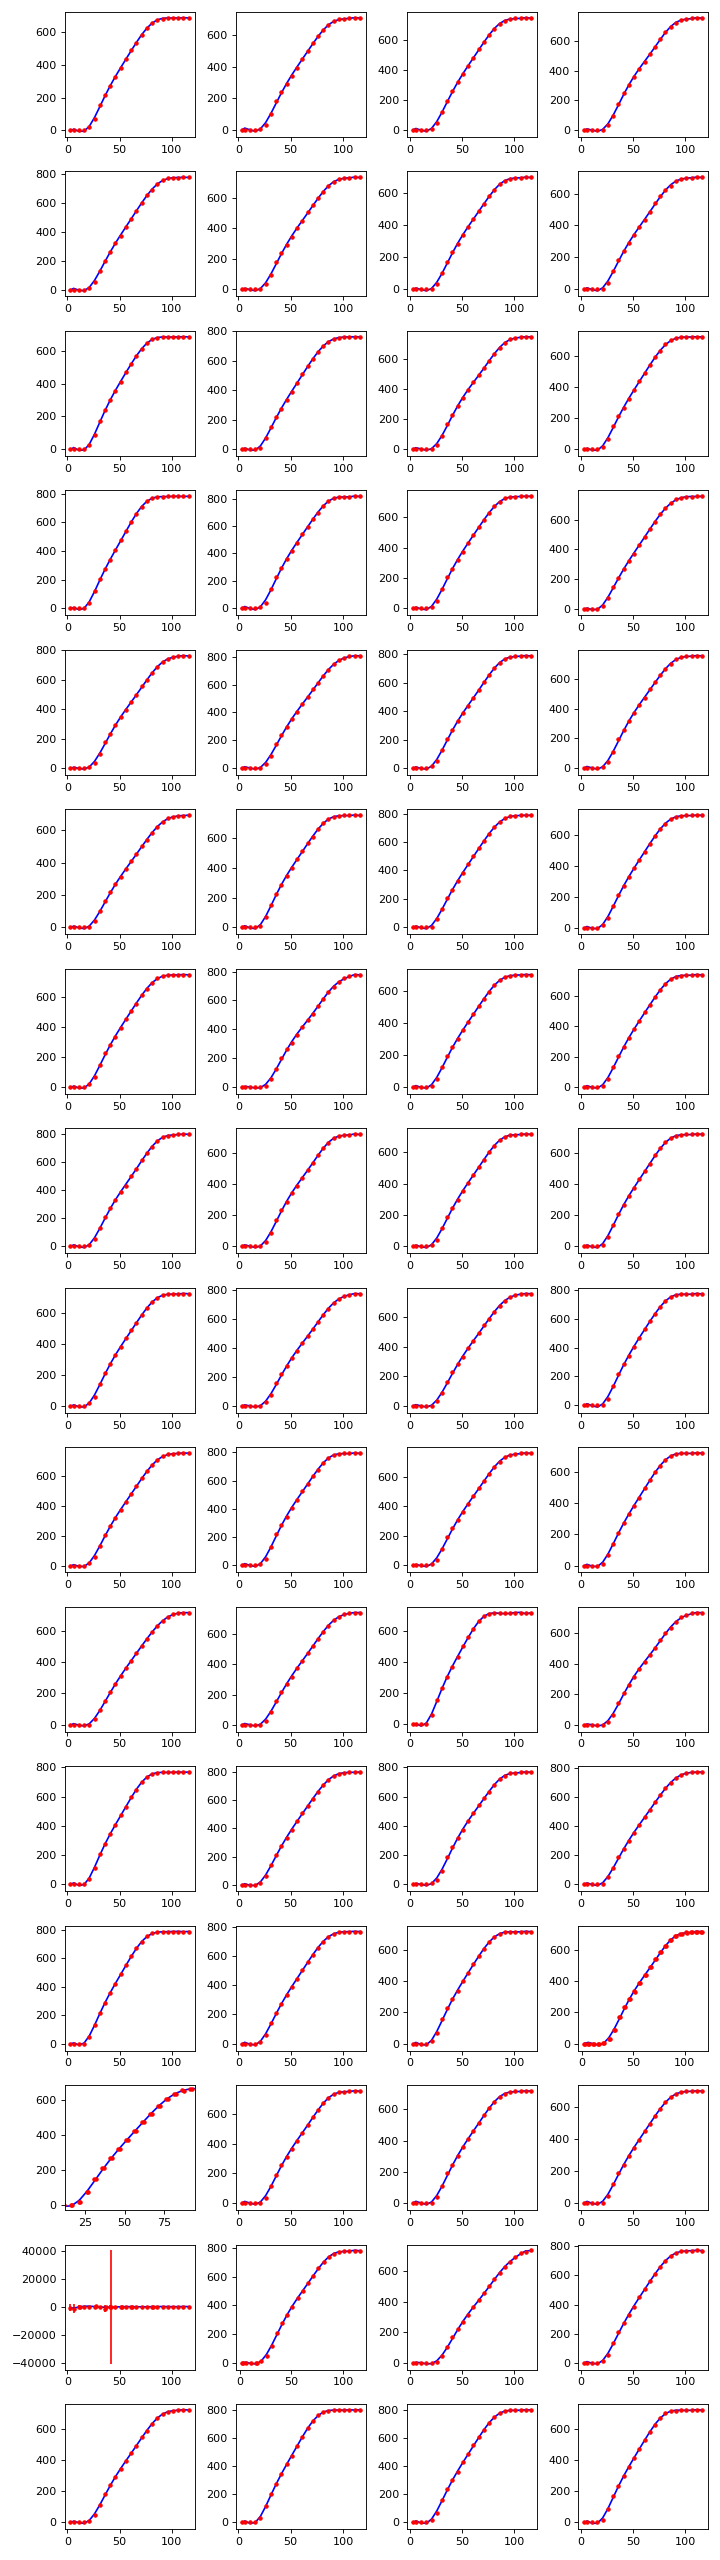

64
0 0
1 0
2 0
3 0
0 1
1 1
2 1
3 1
0 2
1 2
2 2
3 2
0 3
1 3
2 3
3 3
0 4
1 4
2 4
3 4
0 5
1 5
2 5
3 5
0 6
1 6
2 6
3 6
0 7
1 7
2 7
3 7
0 8
1 8
2 8
3 8
0 9
1 9
2 9
3 9
0 10
1 10
2 10
3 10
0 11
1 11
2 11
3 11
0 12
1 12
2 12
3 12
0 13
1 13
2 13
3 13
0 14
1 14
2 14
3 14
0 15
1 15
2 15
3 15


In [154]:
fig, axis = plt.subplots(int(len(channels)/4),4,figsize=(9,int(2*len(channels)/4)))
tac_sel = 0

x=0
y=0
print(len(channels))
for i in channels:
    print(x,y)
    a = TPcal.QDC_fit_p(df_efine,i,tac_sel,plot=True,axis=axis[y,x])
    if x<3:
        x+=1
    else:
        y+=1
        x=0
plt.tight_layout()
    

# THRESHOLDS

In [40]:
path = "/home/vherrero"

['/data']


<IPython.core.display.Javascript object>


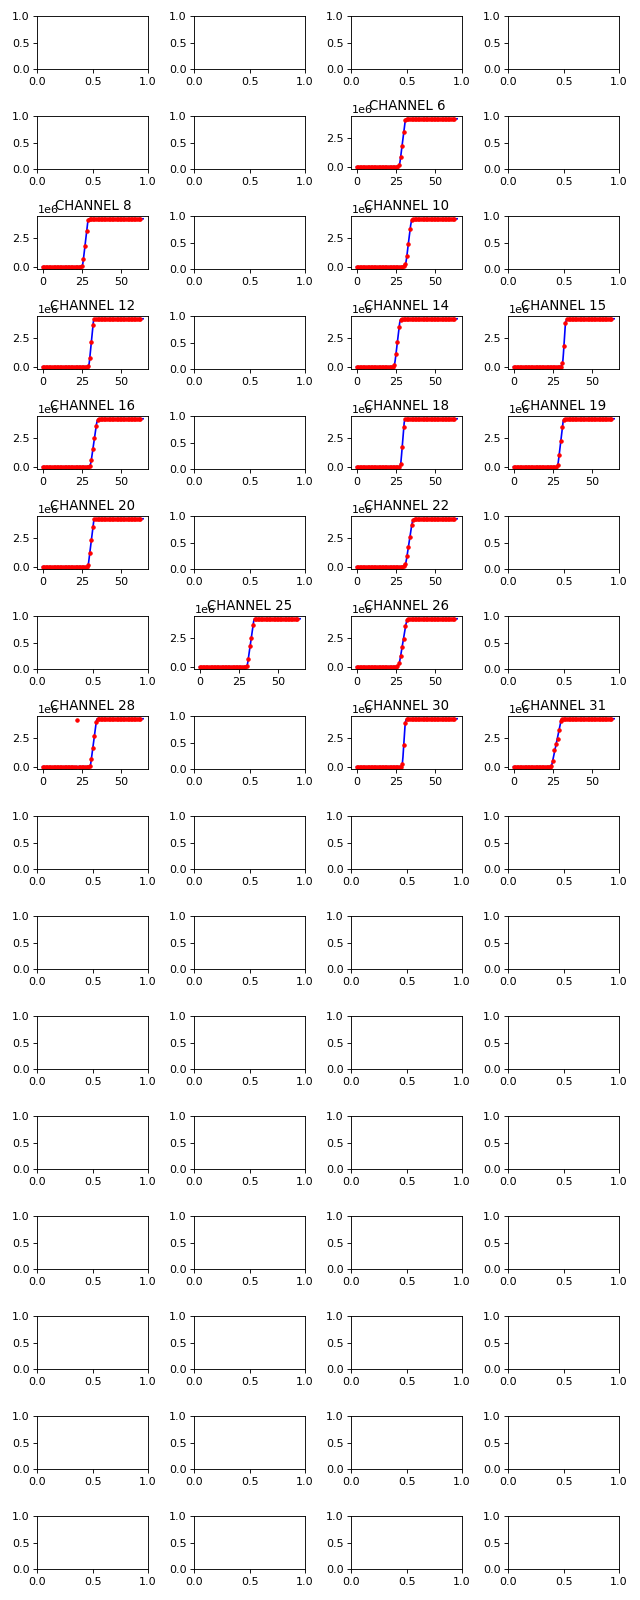

In [41]:
filename = path + "/CALIBRATION_FILES/thr_asic2_t1_run11237.h5"
with pd.HDFStore(filename) as hdf:
    channels = hdf.keys()
    print(channels)
    
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'

res=[]

fig, axis = plt.subplots(16,4,figsize=(8,20))

for i in range(16):
    for j in range(4):
        if data[(data['channel_id']==(j+i*4))].size == 0:
            pass
        else:
            sol,fit=TPcal.Tn_fit(data,(j+i*4),thr,min_count=1,plot=True,axis=axis[i,j])
            #print(sol)
            res.append([(j+i*4),sol,fit.coeff[0],fit.coeff[2]])
            axis[i,j].set_title("CHANNEL " +str(j+i*4))

plt.tight_layout()

df_thr1 = pd.DataFrame(res,columns=['channel_id','thr_t1','slope','mu'])

['/data']


<IPython.core.display.Javascript object>


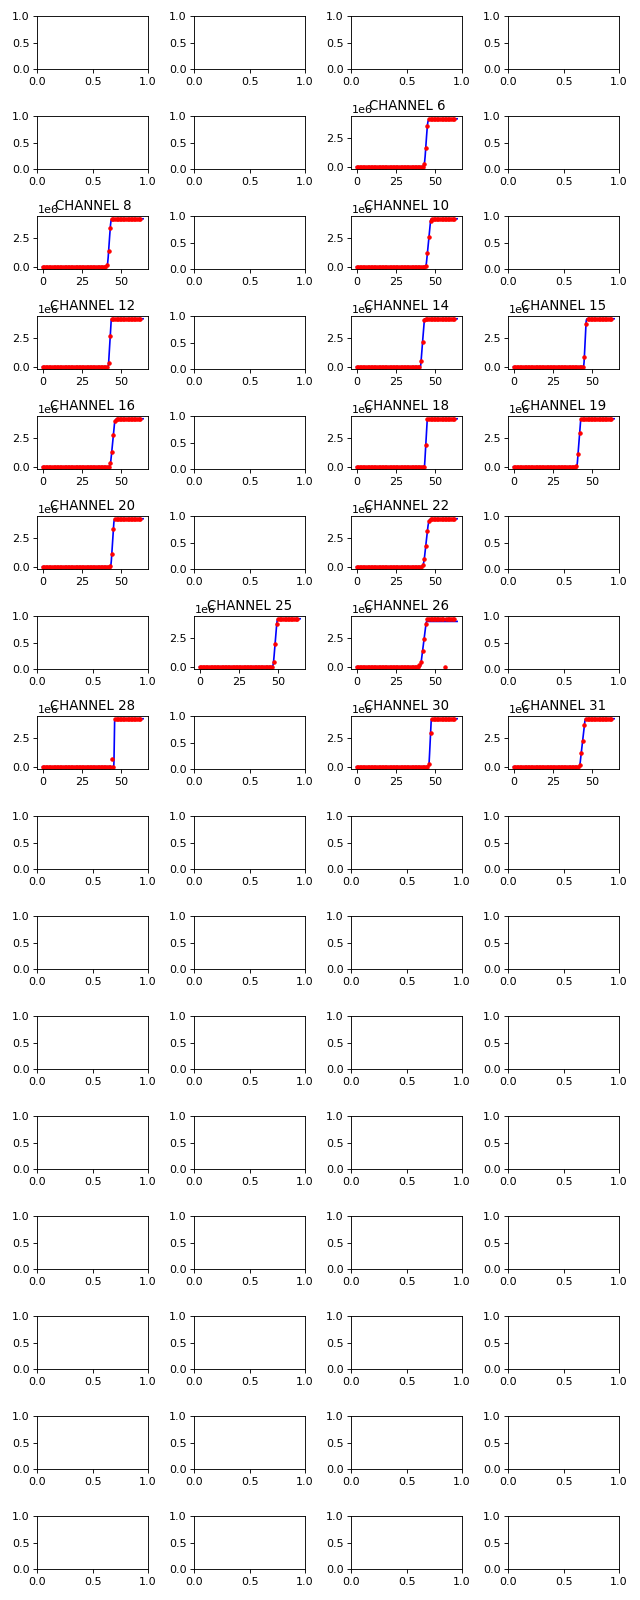

In [46]:
filename = path + "/CALIBRATION_FILES/thr_asic2_t2_run11238.h5"
with pd.HDFStore(filename) as hdf:
    channels = hdf.keys()
    print(channels)
    
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'

res=[]

fig, axis = plt.subplots(16,4,figsize=(8,20))

for i in range(16):
    for j in range(4):
        if data[(data['channel_id']==(j+i*4))].size == 0:
            pass
        else:
            sol,fit=TPcal.Tn_fit(data,(j+i*4),thr,min_count=1,plot=True,axis=axis[i,j])
            res.append([(j+i*4),sol,fit.coeff[0],fit.coeff[2]])
            axis[i,j].set_title("CHANNEL " +str(j+i*4))

plt.tight_layout()

df_thr2 = pd.DataFrame(res,columns=['channel_id','thr_t2','slope','mu'])

df_thr2.loc[df_thr2['channel_id']==28,'thr_t2']=41

In [53]:
df_thr2

channel_id  thr_t2     slope         mu
0            6      38  0.949148  44.200949
1            8      37  0.949328  42.357486
2           10      38  0.701201  45.636604
3           12      38  1.133923  42.749491
4           14      36  0.845357  41.922054
5           15      41  1.392249  45.428547
6           16      38  0.705628  44.506832
7           18      39  1.167935  44.064836
8           19      37  0.878927  41.522654
9           20      38  1.057546  44.451611
10          22      36  0.604840  44.199099
11          25      43  0.829994  48.037175
12          26      34  0.560466  42.495357
13          28      41  5.516742  45.558195
14          30      43  1.440911  46.728270
15          31      37  0.588593  43.764741

In [54]:
storage = pd.HDFStore(path + '/asic2_thresholds_OCT5.h5','w',complib="zlib",complevel=4)
storage.put('thr1',df_thr1,index=False,format='table',data_columns=True)
storage.put('thr2',df_thr2,index=False,format='table',data_columns=True)
#storage.put('efine',df_qfine,index=False,format='table',data_columns=True)
storage.close()

In [27]:
df_thr2.iloc[19]

channel_id    19.000000
thr_t2        36.000000
slope          1.511710
mu            43.675155
Name: 19, dtype: float64